## <center>Plot 2-State HMM convergence for single trajectory</center>

In [55]:
tt.

##### MUST SHARE KERNEL WITH NOTEBOOK `00-load-data.ipynb`

#### Show Results after calibration of HMM-calculation parameters

------------------------

 - see notebook 023 for guidance on which models were chosen
   for looking at here

#### Examination of Rate results from the different tested parameters for transition identification
---------------

##### Calculate the MFPTs between folded and unfolded states
 - from HMM by epoch size (ie total MD data)
 - they were made with different parameters & input models
 
**Saved** in dict: `mftp`

In [82]:
"""
# HMM states
folded, unfolded = [1], [0]

# Ends up being model-specific
folding_process = {
    "kmeans"  : {
        "unfold"  : (folded, unfolded),
        "fold"    : (unfolded, folded),},
    # this one has labels reversed
    "2-state" : {
        "unfold"  : (unfolded, folded),
        "fold"    : (folded, unfolded),}
}
# entries for XY
# label: (X, Y)
mfpt = dict()

# for now this isn't included
feat = feat_Ca
nm   = "ltj"

max_es = 0

for clust,process in folding_process.items():
    
    fold = process["fold"]
    unfold = process["unfold"]
    
    for hmmsetup in all_models[feat][nm]["hmm"][clust]:

        (_tica_lag, tica_lag), (_k, k) = hmmsetup["inpar"]
        hmm_lag = hmmsetup["kwargs"]["lag"]

        xy_fold = list()
        xy_unfold = list()

        label = "tica_lag:{}, n_clust:{}, hmm_lag:{}".format(
            tica_lag, k, hmm_lag)

        mfpt[label] = dict(
            fold   = xy_fold,
            unfold = xy_unfold,
        )

        for es,bes in hmmsetup["byepochsize"]:

            if es > max_es:
                max_es = es

            try:
                xy_unfold.append((
                    es / step_per_ns[label_longtraj] / 1000,
                    bes.mfpt(*unfold)))

            except:
                traceback.print_exc()

            try:
                #r = bes.mfpt(folded, unfolded)
                #print(r if r < 3000 else r/step_per_ns[label_longtraj])
                xy_fold.append((
                    es / step_per_ns[label_longtraj] / 1000,
                    bes.mfpt(*fold)))

            except:
                traceback.print_exc()


# TODO better get method for relevant
# max_es of all datasets!
max_es = max_es / step_per_ns[label_longtraj] / 1000
"""

'\n# HMM states\nfolded, unfolded = [1], [0]\n\n# Ends up being model-specific\nfolding_process = {\n    "kmeans"  : {\n        "unfold"  : (folded, unfolded),\n        "fold"    : (unfolded, folded),},\n    # this one has labels reversed\n    "2-state" : {\n        "unfold"  : (unfolded, folded),\n        "fold"    : (folded, unfolded),}\n}\n# entries for XY\n# label: (X, Y)\nmfpt = dict()\n\n# for now this isn\'t included\nfeat = feat_Ca\nnm   = "ltj"\n\nmax_es = 0\n\nfor clust,process in folding_process.items():\n    \n    fold = process["fold"]\n    unfold = process["unfold"]\n    \n    for hmmsetup in all_models[feat][nm]["hmm"][clust]:\n\n        (_tica_lag, tica_lag), (_k, k) = hmmsetup["inpar"]\n        hmm_lag = hmmsetup["kwargs"]["lag"]\n\n        xy_fold = list()\n        xy_unfold = list()\n\n        label = "tica_lag:{}, n_clust:{}, hmm_lag:{}".format(\n            tica_lag, k, hmm_lag)\n\n        mfpt[label] = dict(\n            fold   = xy_fold,\n            unfold = xy_

In [83]:
# HMM states
folded, unfolded = [1], [0]

# Ends up being model-specific
folding_process = {
    "kmeans"  : {
        "unfold"  : (folded, unfolded),
        "fold"    : (unfolded, folded),},
    # this one has labels reversed
    "2-state" : {
        "unfold"  : (unfolded, folded),
        "fold"    : (folded, unfolded),}
}
# entries for XY
# label: (X, Y)
mfpt = dict()

# for now this isn't included
feat  = feat_Ca
names = ["ltj", "umi_Ca_3"]

max_es = 0

for nm in names:
    
    mfpt[nm] = _mfpt = dict()
    
    for clust,process in folding_process.items():

        fold = process["fold"]
        unfold = process["unfold"]

        for hmmsetup in all_models[
            feat][nm]["hmm"].get(clust, []
        ):

            (_tica_lag, tica_lag), (_k, k) = hmmsetup["inpar"]
            hmm_lag = "{} ns".format(hmmsetup["kwargs"]["lag"] * 0.02)

            xy_fold = list()
            xy_unfold = list()

            label = "tica_lag:{}, n_clust:{}, hmm_lag:{}".format(
                tica_lag, k, hmm_lag)

            _mfpt[label] = dict(
                fold   = xy_fold,
                unfold = xy_unfold,
            )

            for es,bes in hmmsetup["byepochsize"]:

                if es > max_es:
                    max_es = es
                    #print("max_es is now: %d"%max_es)

                try:
                    xy_unfold.append((
                        # The Total MD Time
                        es / step_per_ns[label_longtraj] / 1000,
                        # The estimated rate
                        bes.mfpt(*unfold)))

                except:
                    traceback.print_exc()

                try:
                    #r = bes.mfpt(folded, unfolded)
                    #print(r if r < 3000 else r/step_per_ns[label_longtraj])
                    xy_fold.append((
                        # The Total MD Time
                        es / step_per_ns[label_longtraj] / 1000,
                        # The estimated rate
                        bes.mfpt(*fold)))

                except:
                    traceback.print_exc()

# TODO better get method for relevant
# max_es of all datasets!
max_es = max_es / step_per_ns[label_longtraj] / 1000

Traceback (most recent call last):
  File "<ipython-input-83-6f4c170e676b>", line 62, in <module>
    bes.mfpt(*unfold)))
  File "/home/osz/admd/software/miniconda/envs/admd/lib/python3.7/site-packages/pyemma/msm/models/msm.py", line 528, in mfpt
    return self._mfpt(self.transition_matrix, A, B, mu=self.stationary_distribution)
  File "/home/osz/admd/software/miniconda/envs/admd/lib/python3.7/site-packages/pyemma/msm/models/msm.py", line 513, in _mfpt
    self._assert_in_active(B)
  File "/home/osz/admd/software/miniconda/envs/admd/lib/python3.7/site-packages/pyemma/msm/models/msm.py", line 509, in _assert_in_active
    assert _np.max(A) < self._nstates, 'Chosen set contains states that are not included in the active set.'
AssertionError: Chosen set contains states that are not included in the active set.
Traceback (most recent call last):
  File "<ipython-input-83-6f4c170e676b>", line 74, in <module>
    bes.mfpt(*fold)))
  File "/home/osz/admd/software/miniconda/envs/admd/lib/pytho

------------

##### Create **easily** plotted data structures

In [84]:
folded_XY = {
    nm: {label: np.array(
        _mfpt[label]["fold"]).T
        for label in _mfpt}
    for nm, _mfpt in mfpt.items()}

unfolded_XY = {
    nm: {label: np.array(
        _mfpt[label]["unfold"]).T
        for label in _mfpt}
    for nm, _mfpt in mfpt.items()}

------------------------

##### Set up for the style scheme
 - hot-cold type colormap for how long the lag time is
 - marker and line styles for different datasets

In [119]:
# by steps
#_this_lag = lambda label: int(
    #label.split(':')[-1])
# by time
#_this_lag = lambda label: float(
#    label.split(":")[-1].split()[0])
_this_lag = lambda label: int(
    float(label.split(":")[-1].split()[0]
         ) * step_per_ns["Single Trajectory"])

_this_clust = lambda label: label.split(
    ':')[-2].split(',')[0]

max_lag = max([
    _this_lag(lbl)
    for lbl in list(mfpt[nm])
])  # for normalizing colors

cmap = cm.get_cmap("rainbow")

colors_by_lagtime = {
    # accidentally lost this function
    # used colorsys, from stackoverflow
    #l : adjust_lightness(
    #cmap(l/max_lag))
    l : cmap(float(i)/len(_good_hmm_lags))
    for i,l in enumerate(
    _good_hmm_lags)}

unique_markers = [
    "o", "v", "s", "p", "d",
    "P", "*", "X", "D", "h"]

markers_by_nclusters = {
    str(k) : unique_markers[i]
    for i,k in enumerate(
    _good_clust_pars)}

colors_by_lagtimet a panel of the marker/color scheme

------------------------

#### Use `mfpt` dict to plot folding & unfolding rates

------------------------------

##### First from long trajectory

reporting label: n_clust:300, hmm_lag:0.04 ns and color: (0.0019607843137254832, 0.7092813076058534, 0.9232891061054893, 1.0)
reporting label: n_clust:300, hmm_lag:0.2 ns and color: (0.503921568627451, 0.9999810273487268, 0.7049255469061472, 1.0)
reporting label: n_clust:300, hmm_lag:1.0 ns and color: (1.0, 0.7005430375932911, 0.37841105004231035, 1.0)
reporting label: n_clust:300, hmm_lag:5.0 ns and color: (0.5, 0.0, 1.0, 1.0)
reporting label: n_clust:600, hmm_lag:0.04 ns and color: (0.0019607843137254832, 0.7092813076058534, 0.9232891061054893, 1.0)
reporting label: n_clust:600, hmm_lag:0.2 ns and color: (0.503921568627451, 0.9999810273487268, 0.7049255469061472, 1.0)
reporting label: n_clust:600, hmm_lag:1.0 ns and color: (1.0, 0.7005430375932911, 0.37841105004231035, 1.0)
reporting label: n_clust:600, hmm_lag:5.0 ns and color: (0.5, 0.0, 1.0, 1.0)
reporting label: n_clust:75, hmm_lag:0.04 ns and color: (0.0019607843137254832, 0.7092813076058534, 0.9232891061054893, 1.0)
reporting l

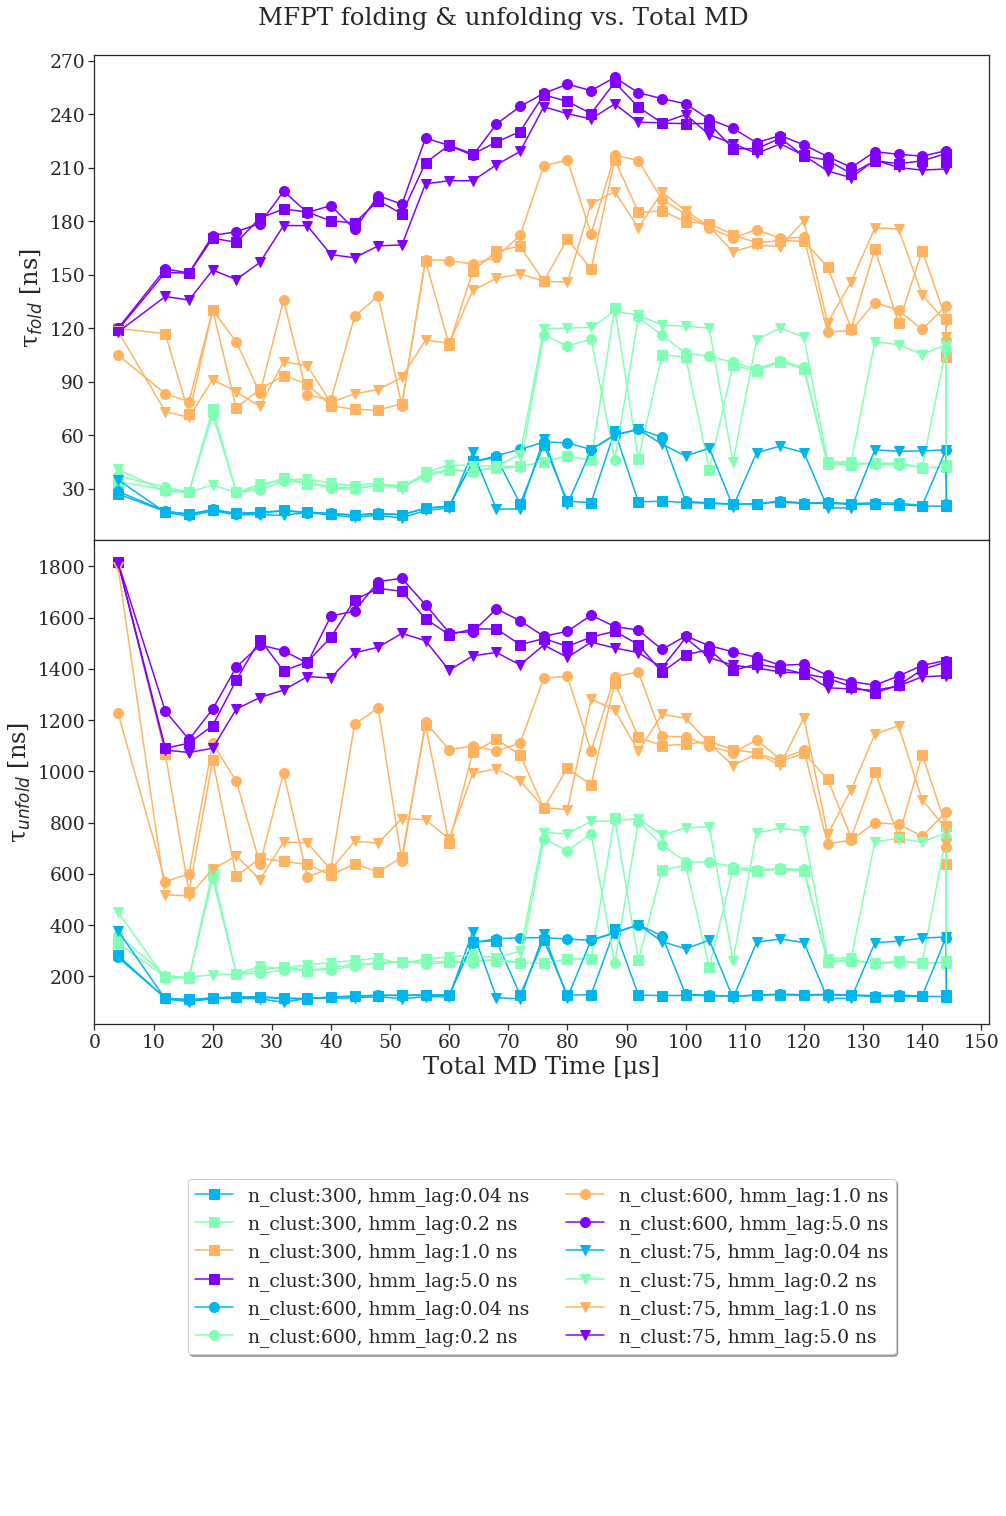

In [120]:
# see bottom of MFPT calculation cell
# for max_es setting
xaxislimits = [0, max_es*1.05]

# Top    : folding
# Bottom : unfolding
_scalefactor=0.9
fig, (axf, axu, axlgd) = plt.subplots(
    3,1,
    figsize=[
        d*_scalefactor
        for d in (16,24)],
    #sharex=True,
)

#cc2 = get_hls_palette(10)
#markers = iter(unique_markers)
ms = 10 #markersize
# darker<1, lighter>1
darker = 0.8

nm = "ltj"

for label in sorted(folded_XY[nm]):
    
    # Indirect way to skip the RMSD-based
    # MSM (ie not HMM) data
    if "None" in label: continue
        
    _label = ", ".join(
        label.split(", ")[1:])

    this_color = colors_by_lagtime.get(
        _this_lag(label))

    this_marker = markers_by_nclusters.get(
        _this_clust(label))

    axf.plot(
        *folded_XY[nm][label],
        linewidth=1.5,
        c=this_color,
        label=_label,
        zorder=10,
        marker=this_marker,
        markersize=ms,
        markerfacecolor=this_color,
        markeredgecolor=this_color,
    )
    
    axu.plot(
        *unfolded_XY[nm][label],
        linewidth=1.5,
        c=this_color,
        label=_label,
        zorder=10,
        marker=this_marker,
        markersize=ms,
        markerfacecolor=this_color,
        markeredgecolor=this_color,
    )

    axlgd.plot(
        0, 0,
        lw=1.5,
        ms=ms,
        c=this_color,
        marker=this_marker,
        markerfacecolor=this_color,
        markeredgecolor=this_color,
        label=_label,
    )

axlgd.axis("off")

axlgd.legend(
    loc="center",
    fancybox=True,
    shadow=True,
    ncol=2,
)

axu.set_xlabel("Total MD Time [μs]", fontsize=24)

axf.set_xlim(xaxislimits)
axu.set_xlim(xaxislimits)

#axf.set_ylim()
#axu.set_ylim([150,1950])

axu.xaxis.set_ticks(np.arange(*xaxislimits, step=10))
#axf.xaxis.set_major_locator(plt.MaxNLocator(12))
#axu.xaxis.set_major_locator(plt.MaxNLocator(12))
axf.set_xticklabels([])

axf.yaxis.set_major_locator(plt.MaxNLocator(10))
axu.yaxis.set_major_locator(plt.MaxNLocator(10))

axf.set_ylabel("τ$_{fold}$ [ns]", fontsize=24)
axu.set_ylabel("τ$_{unfold}$ [ns]", fontsize=24)

fig.tight_layout(rect=[0, 0, 1, 0.965])

plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("MFPT folding & unfolding vs. Total MD")
plt.savefig("analyses/%s__mm_folding-mfpts-%s.png"%(
    "-".join(_good_wnms), nm))

------------------

##### Legend with marker & color scheme

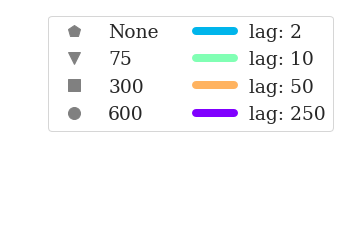

In [87]:
markers = [
    matplotlib.lines.Line2D(
        [], [], color='gray',
        marker=m, linestyle='None',
        markersize=12, label=k)
    for k,m in sorted(
    markers_by_nclusters.items(),
    key=lambda x: int(x[0]) if x[0].isdigit() else 0)]

colors = [
    matplotlib.lines.Line2D(
        [0], [0], color=c,
        linewidth=8,
        markersize=0, label="lag: %d"%k)
    for k,c in sorted(
    colors_by_lagtime.items(),
    key=lambda x: x[0])]

plt.axis('off')
plt.legend(handles=markers+colors, ncol=2)
plt.savefig("analyses/%s__mm_folding-mfpts-legend_scheme.png"%(
    "-".join(_good_wnms)))

------------

##### Now the adaptive sampling workloads
 - from phase 2, exploitation

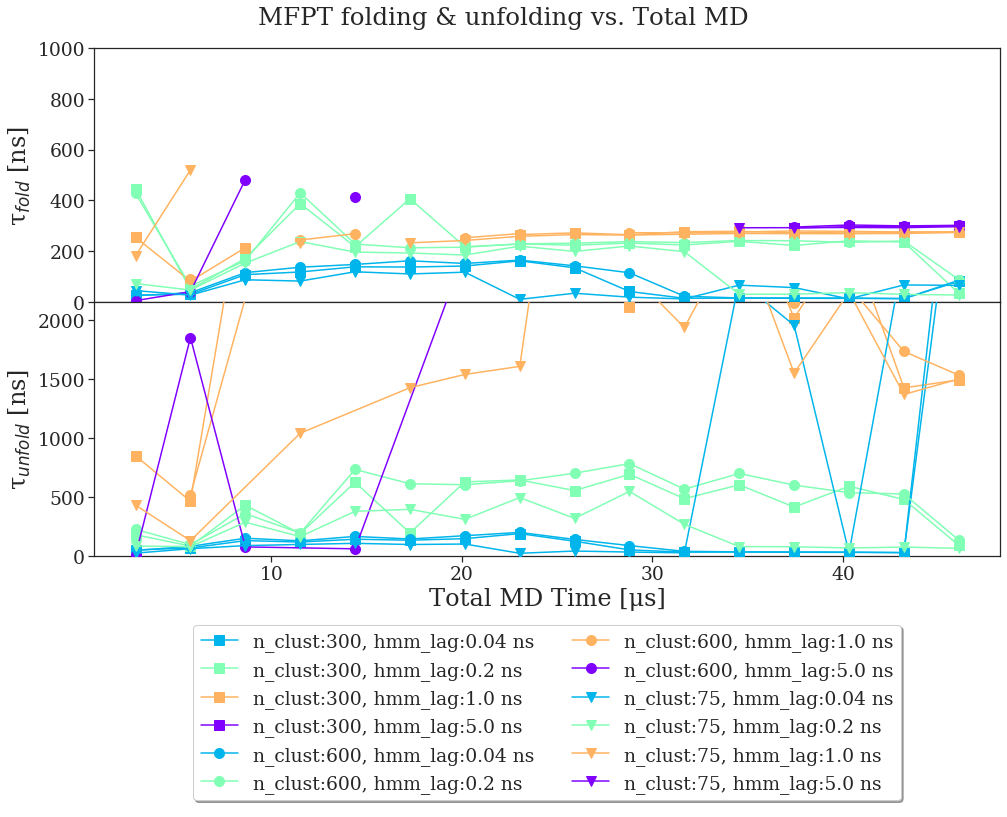

In [121]:
# see bottom of MFPT calculation cell
# for max_es setting
xaxislimits = [0, max_es*1.05]

# Top    : folding
# Bottom : unfolding
_scalefactor=0.9
fig, (axf, axu, axlgd) = plt.subplots(
    3,1,
    figsize=[
        d*_scalefactor
        for d in (16,13)],
    #sharex=True,
)

#cc2 = get_hls_palette(10)
#markers = iter(unique_markers)
ms = 10 #markersize
# darker<1, lighter>1
darker = 0.8

nm = "umi_Ca_3"

for label in sorted(folded_XY[nm]):
    
    _label = ", ".join(
        label.split(", ")[1:])

    this_color = colors_by_lagtime.get(
        _this_lag(label))

    this_marker = markers_by_nclusters.get(
        _this_clust(label))

    axf.plot(
        *folded_XY[nm][label],
        linewidth=1.5,
        c=this_color,
        label=_label,
        zorder=10,
        marker=this_marker,
        markersize=ms,
        markerfacecolor=this_color,
        markeredgecolor=this_color,
    )
    
    axu.plot(
        *unfolded_XY[nm][label],
        linewidth=1.5,
        c=this_color,
        label=_label,
        zorder=10,
        marker=this_marker,
        markersize=ms,
        markerfacecolor=this_color,
        markeredgecolor=this_color,
    )

    axlgd.plot(
        0, 0,
        lw=1.5,
        ms=ms,
        c=this_color,
        marker=this_marker,
        markerfacecolor=this_color,
        markeredgecolor=this_color,
        label=_label,
    )

axlgd.axis("off")

axlgd.legend(
    loc="lower center",
    fancybox=True,
    shadow=True,
    ncol=2,
)

axu.set_xlabel("Total MD Time [μs]", fontsize=24)

#axf.set_xlim(xaxislimits)
#axu.set_xlim(xaxislimits)

axf.set_ylim([0,1000])
axu.set_ylim([0,2150])

#axu.xaxis.set_ticks(np.arange(*xaxislimits, step=10))
#axf.xaxis.set_major_locator(plt.MaxNLocator(12))
#axu.xaxis.set_major_locator(plt.MaxNLocator(12))
axf.set_xticklabels([])

axf.yaxis.set_major_locator(plt.MaxNLocator(5))
axu.yaxis.set_major_locator(plt.MaxNLocator(5))

axf.set_ylabel("τ$_{fold}$ [ns]", fontsize=24)
axu.set_ylabel("τ$_{unfold}$ [ns]", fontsize=24)

fig.tight_layout(rect=[0, 0, 1, 0.965])

plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("MFPT folding & unfolding vs. Total MD")
plt.savefig("analyses/%s__mm_folding-mfpts-%s.png"%(
    "-".join(_good_wnms), nm))

------------

------------

------------

------------

------------

------------

------------

In [89]:
# HMM states
folded, unfolded = [1], [0]

# entries for XY
# label: (X, Y)
XY = dict()

# for now this isn't included
feat = feat_Ca
nm   = "ltj"
for _nm,clust,_n,_tica_lag,_clustpar,_hmm_lag in filter(
    lambda x: (x[0] == nm), _good_ones
):
    clustsetup = correctone(
        all_models[feat][_nm]["cluster_%s"%clust],
        *_clustpar)
    
    hmmsetup = correctone(
        all_models[feat][_nm]["hmm"][clust],
        *_hmm_lag)
    
    print(clustsetup["kwargs"])
    
    
#for clust,setups in all_models[feat_Ca]["ltj"]["hmm"].items():
 #   for setup in setups:
  #      _bes = setup["byepochsize"]
   #     label, xy = ("k=%d,hmm_lag=%d"%(setup["kwargs"][]), list())
    #    for es,bes in _bes:
     #       try:
      #          r = bes.mfpt(folded, unfolded)
       #         print(r if r < 3000 else r/step_per_ns[label_longtraj])
        #    except:
         #       pass

KeyError: 'hmm_lag'

In [ ]:
plt.close()
plt.figure(figsize=(15,5))

basically_same_after = 1200000

colorcycle = iter(seaborn.color_palette("husl", n_colors=10))

# Track the ones we will show for later
lastsum = -1
showthese = list()
for i,key in enumerate(longtraj_2states):
    n_steps_inthisone = int(key.split("min_residence-")[-1].split("_interfaces")[0])
    _sum = np.sum(observed_rates[key]["backwards"][:basically_same_after//incr_length])
    if not _sum:
        continue
    elif abs(_sum - lastsum) < 1e-4:
        continue
    else:
        showthese.append((i,key))
        lastsum = _sum
    seaborn.lineplot(
        #x=observed_rates[label_timesteps]["OpenMM"],
        #y=observed_rates[key]["forwards"],
        x=observed_rates[label_timesteps][label_longtraj],
        y=observed_rates[key]["backwards"],
        # Hidden residence time calculation depends on
        # timestep, 20 picoseconds for OpenMM
        label="%.2f ns" % (
            0.02 * int(splitsteps(key))
        ) if int(splitsteps(key)) < 49
        else "%d ns" % (
            0.02 * int(splitsteps(key))
        ),
        color=next(colorcycle),
        linewidth=3,
        linestyle=":"#"-" if n_steps_inthisone==bestresinsteps else ":",
    )

legend = plt.legend(fontsize='18', ncol=2, title="Minimum Residence Time", loc="upper center", framealpha=0.95)
legend.get_title().set_fontsize('18')
plt.suptitle("Obs. Folding Rate vs. Min Residence Time")
plt.xlabel(label_timesteps)
#plt.ylabel("s$^{-1}$")
plt.ylabel("k$_{fold}$ 10$^6$ s$^{-1}$")
plt.savefig(analysis_directory / "folding-observedrate-longtraj-rescalibration.png", dpi=1200)

#### Convergence of estimated rate with increasing MD time
----------------

<center>From a selected part of the trajectory (to observe convergence timescale)</center>

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(16,9), sharex=True)

n_frames = -1
interfacecolor  = "lightgrey"
colorcycle = seaborn.color_palette("husl", n_colors=8)
escapecoxlor= [min(1, np.sum(c)) for c in zip(colorcycle[0], (0.0, -0.09, -0.09, 0))]
entercolor = [min(1, np.sum(c)) for c in zip(colorcycle[6], (-0.15, -0.15, -0.15, 0))]

ratesdates = [_index_to_time(tt) for tt in transition_data[bestone][0][1][0]]

axes[0].plot(
    ratesdates,
    [(i+1)/rd for i,rd in enumerate(ratesdates)],
    linewidth=3.5,
    #ax=axes[0],
    zorder=10,
    markersize=10,
    marker="o",
)

plt.xlabel(label_timesteps)

# Timeseries Values
seaborn.scatterplot(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0IAAAJzCAYAAAAiD6PIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydeVzN2f/HX1eESrJnKsvgE0ViqBkx2TKWQXZDlin7WMa+jTGWpjLmN/Y1JDFICslWQrYK2ZIi7WhRab2VOr8/+n4+c2/33rqlVLyfj4eH7jnncz7n8znvz/uc91neR8QYYyAIgiAIgiAIgviCqFHZBSAIgiAIgiAIgvjUkCFEEARBEARBEMQXBxlCBEEQBEEQBEF8cZAhRBAEQRAEQRDEFwcZQgRBEARBEARBfHGQIUQQBEEQBEEQxBdHzYrK+PTp01i5cqXwe+7cuZg3b15F3Y6o4rx58wZbtmxBYGAgEhMT0bBhQxgbG2PZsmXQ0dGp7OLJxcLCAtHR0cLv0NDQSiwNIY9JkyYhICBA+O3j4wNdXd1KLBFBEF86QUFB2L59O54/f47MzExoa2vD1NQU69evr+yiERWIh4cHnJ2dERUVBZFIhBYtWmDUqFGYOHFiZReNKAZRRZ0jJBaLkZ6ejoMHD+LgwYNyDSFvb2+EhISgf//+6NChg9x8du/ejUOHDmHr1q347rvvPrpcRTtOIpEIZ8+eBcdxJV6bmJiIfv36IScnRwgbMWIE7O3tpdKFhYXhyJEjCAgIwNu3bwEAjRs3RrNmzWBkZIRvvvkGpqam0NTUFK7R19eXykNbWxtXrlyBqqpqieXy9vbGL7/8IhVmZ2eHkSNHlnjtp0AsFmP48OFISEjAn3/+iY4dO+Lhw4dYsWIFDh48iPT09BLloDJITk5Gfn4+evbsCYAMoapIamoq8vLyMHr0aLx9+7bSDCFldFlFEhoaCmtra/Tv3x/r1q375PdXluzsbKFTcOzYMdSpU6fC77l9+3bs2LFDYbyWlhb8/f2VyqvoAJ+y6Ojo4OrVq1ixYgXc3d1l4uW1IzzXr1/HuXPnEBQUhHfv3qGgoACNGzdG27Zt0a1bN5ibm8u0H/JwdHTEX3/9hZ49e+LAgQOlfgZCOV6+fAlLS0vo6elhw4YNaNasGf79918cOHDgs2tDPDw8sGHDBvz+++8YPnx4ZRenUnF1dcVvv/2G/v37Y8GCBRCJRLCzs0NeXh6OHDnyycrh5OSE9PR0TJkyRaqPSSimwmaE6tSpgzp16kBNTU1hGm9vb7i7u0NHR0dh58HT0xPv37/HlStXysUQ2r59O/Ly8mBra4sLFy6AMYZdu3Zhy5YtJV7r6OgoGEGrVq3C4MGDZRpyT09PLF++HDo6Opg1axYMDQ2hqamJpKQk+Pr6wtHREYcOHcKyZctgY2MjXHfz5k0AEDp0b9++xalTpzBhwoQSy7Vr1y7hb1dXVzRv3hz16tVT6n18Cm7cuIHIyEgMGzYMgwYNAgDo6ekhOjoaTZo0gbu7e4lyUBk0bNiwsotAlICWlhYAQEVFpVLLoYwuq0j8/PyQlJSEs2fPVmlD6MWLFwgODhb+7tSp0ye5r4aGBpo0aSI3rn79+qXOj9fXPF5eXvjzzz/RpUsXbN++XSru4MGDuHTpEgBg9erVWLx4sTBAOGjQIKxevVquQfju3Tv8+uuvuH//PkaPHg1bW1vo6uoiMzMTMTExOHnyJP7++2/8/fffMDIygqura7FlPn36NADg9u3beP36Nb766qtSPzdRMsePH0deXh6sra3RrVs3AMCCBQvw/v37Si5Z+ePl5YWMjAx4eXl98YaQs7MzAGD58uVo0aIFAGDZsmUyuuJTlCMuLg4jRowgQ0hJKswQKi9sbGxw/Pjxcpvd4DtOderUgZaWFlJTU3Hp0iW8fPkSbdu2VXjdu3fvcOLECeGaevXqyTSs79+/x5o1a6CiogInJyephqZ58+bo1KkTWrRogeXLl8vkz+eloqIi3GPfvn0YPXp0sbNCvr6+iIuLE343bNhQYYNfWURGRgKATMNbdBaLIIiyMXDgQPj6+qJXr16VXZRiMTAwEAZDPqXBaGFhoXDGpSwU1bH8wFOtWrVk4iQHA+vVq4d69eoJYXXq1JGrr1NTUzF+/Hi8fv0au3btQu/evaXi9fX10b9/f2EUOiIiotjyBgUFITIyEvXr18f79+9x+vRpzJ07V+nnJZSHb+8kl3zXrl0btra2lVSiimPixIlITk5WasD2cycqKgqAdD+nffv2aN++fWUViVCSKu8sYeTIkTh58iQ6duxY7nlzHIdvv/0WBQUF2L17d7FpDxw4AGNj42KX0N27dw9ZWVlo27atwtG2YcOGCcaYIiwtLaGpqYk3b97IXUYhya5duzBlypRi01Q2/CxazZpV3u4miGqJrq4ujh49ilmzZlV2UYqlZs2a2LJlC7Zs2VIt9UGLFi0wdOjQUl3DGy2lYfXq1YiOjoaVlZWMESTJmDFjYGZmVmJ+bm5u6NWrlzCgePr0aVTQqvgvHr69q+xZ6k+Bubk5Tp06BXNz88ouSqVD/ZzqS6XUWNF11itXrpT67ePjg+joaPz8889CWHFrqD+GOXPm4O7du/Dy8sIvv/yCr7/+WiZNcnIy/v33X+zdu1dm2YMkBQUFAAr3EhUUFKBGDVk7s0aNGjhx4kSxU5YaGhqYPHkyduzYgb1792LkyJGoVauWTLobN24gIiICBw8exNatWxXml5eXh1OnTuHUqVOIiYlBQUEB9PT0YGJigsGDB6Nz584Kr5UkNzcXPj4+uHDhAp4/f463b9+idu3a6NChAyZNmgQLCwup9EXreceOHcJa/REjRsDExKREOZDc7/H8+XPs27cPAQEBSE1NRYMGDdCtWzfMmDFDanT53r17UpsTR4wYgYULF+Lvv//GrVu38O7dOzDGPsqBR9G9ZkDhviwVFRUsW7ZMCJs7dy769++Pv/76C0FBQVBXV8eAAQOwePFiqKur4/Hjx/jrr7/w9OlTqKmpYciQIViyZInCWUBvb2+4uLggODgYYrEYzZs3h7m5OWbOnInGjRtLpS1tfZ05c0am7BYWFti8eTMePHgAxhi6du2KlStXyp09DQ8Px+7duxEUFITExERhH8OAAQMwYMCAUk3TZ2RkwMnJCRcvXkR0dDREIhF0dXXxzTffYOjQoejevXuJeYwdOxaPHj0Sfkuuz1+/fj2OHj0q/Ja3t8jPzw+HDh1CWFgY0tPT8dVXX6Fjx44YNGgQevXqhVq1aimlyypahgMCAhQ6jJg6dSru3LkjFXfz5k04OzsjJiYGWlpaGDJkCBYtWiRX5nJzc7F//36cOXMGr1+/Rv369dGjRw8sWLAAK1euLJWjiqJ7dST3Me7atUtKh9nZ2UFHRwfbtm3Ds2fPULNmTXz33XdYvXo1mjVrpvAeFU23bt2E5U7Kwsu/sjx9+hTe3t4AACsrqxLTjx49GomJiQrjs7Oz4eXlhU2bNqF169Y4dOgQ4uLicOfOHfTo0UPpcvEwxuDl5YWjR48iIiICYrEYurq66NKlCwYNGgRTU1PUqFFDbn1raGgI31RBQQEMDQ0xe/ZsucZcQEAAvLy8cP/+fcTFxaGgoACtWrXC0KFDMXnyZLltIlC4emP//v24evUq3rx5g5o1a6Jly5YwNTXF8OHDYWBgIJW+oKAA7u7ucHV1RVhYGPLz86GnpwcLCwvY2NhAQ0NDqfdSdP/X5MmTpZ797du3MjLeqlUr7NixA0+ePEFaWhqAwqVNpqamAIDMzEwpPaiiooJ27dph5MiRGD16tJSxJe9b9/Pzg5OTE96+fYsWLVpg5syZ+PHHHwEU7iVxcXFBfHw8WrVqhQULFpTKYJfcl8bvgeMxMDBAfn6+EOfl5YWtW7fi/PnzSE5Ohq6uLmxsbDBmzBiF7w+Q7vcVlScTExOpvTfPnz/H/v374e/vj5SUFGhoaKBdu3bo2bMnRowYIaU3Xr16BU9PT/j5+SEmJkZwaGFubo7Zs2ejUaNGSr+Hvn37Sq3KkXwvkjqxtHKWkZGBy5cv49KlS3jx4gUSEhKgoaGBzp07w9raWpARRe+vX79+wt98/ZS1TZSnn0uS3YyMDBw6dAgXLlxAbGwsVFVV0bZtW4waNQqjRo2S6R9nZWXBxcUFnp6eiIuLQ82aNdGiRQuYmZlhyJAhaNeuXbH18FGwCmbbtm2M4zi2bds2ISw7O5slJCSwBQsWMI7jmJOTE0tISBD+ffjwgeXk5LCEhATm5OTEOI5jy5cvL9dyLV++nFlZWTHGGPvpp58Yx3FsyZIlctNu3ryZTZgwgTHGmJWVFeM4jrm5ucmke/XqFeM4jnEcx+zt7VlOTk6py9WnTx+2bds2lpqayrp06cI4jmMnT56Um3bcuHFsy5YtjDEm3DcmJkYm3cKFC1mHDh3Yvn372MuXL1lkZCQ7deoUMzU1ZRzHKV22oKAgxnEcs7a2ZoGBgSw2NpY9fPiQrVy5knEcx3bv3i2Vnq9ne3t74Z3wdZyWlqaUHPBcvHiRGRoaMgsLC+bj48MiIyPZlStXWL9+/ZihoSG7fPmykDY3N1dKdmbMmMEsLS3ZmTNnWExMDPP29madOnWSksni4N+tJCkpKWzRokWsd+/eLCQkhCUkJLDs7GwmFoulnnnhwoXM2tqaPXr0iL18+ZKtW7eOcRzHZs2axZ4/f86WLFnCQkJCWEhICJs7dy7jOI5t2LBBbjns7OwYx3Fs2rRpLDAwkL18+ZK5uLgwY2Nj1rNnTxYREfFR9SWv7FZWViwwMJBFRESwAwcOsA4dOjAzMzOWkZEhdW1wcDAzMjJiY8aMYbdv3xbuNW/ePJnvvyTi4+PZoEGDWMeOHdmBAwdYVFQUe/78Odu7dy/r1KkT4ziOhYSESF3Tp08fGflPSUlhCQkJcusvPT2dJSQksO+//17ud/Pvv/8KeufJkycsJiaGXbt2jQ0fPpxxHMfu3r3LGFNOl/FUlAzzzynvWVJTU6XiVq9ezezt7dmrV6/Y48eP2bRp0xjHcWz9+vUy9ZCXl8d+/vlnxnEcW7RoEXv27BmLjo5mLi4urG/fvuyHH35gHMexS5cuyTyrPDIyMqTelaQOzczMlIpbsWIFmzFjBnvy5Al7+fIl++uvvxjHcWzo0KEsPz+/2PsUZdu2bczGxobZ2dmxoUOHMhMTE9a7d282e/ZsdvXq1VLlpQg3NzfGcZzQpihTJkXtGv+s/fr1K5eynT59mpmZmbG8vDzGGGPjx48X6rQsbN68mXEcxxwcHNjz589ZdHQ0u3DhAuvbt6+U/BWtbysrK2ZpaSnoB19fX9avXz+mr6/PPDw8ZO7TsWNHZmFhwa5cucKio6NZSEgI27t3L+vYsSOzsbGRKwcvXrxgZmZmrFu3bszV1ZVFR0ezp0+fsk2bNjF9fX3GcRxLS0sT0ufn57P58+cLdfHw4UP2/PlztnPnTmZgYMAGDRrE3r17p9R7SUtLYwkJCWzcuHFS3wXfNhSV8ZUrVwr6Mjo6mu3atUtKtyQmJrIhQ4awjh07MkdHRxYVFcVCQ0PZxo0bGcdxbPr06VJ9DHnf+tatW1lUVBQLCAhggwcPFsq1c+dOduTIERYdHc2uXbvGzMzMWIcOHdjjx4+VloOEhAT26NEjxnEc69Onj1RcYmKiENe7d282Z84cdvLkSRYdHc1u3rzJ+vXrxziOYxcvXpR6f/fu3WMcx7EuXbqwuLg4qbrKyMhgMTExzNjYmLm5ubGUlBQh7vz588zQ0JANGTKEXb9+ncXGxrLAwEA2c+ZMxnEcGz58uFT5rK2tWefOnZmLiwsLDw9nr169Yh4eHqx3797M3NycJSQkKP0e3r17J9XOyNP/ZZEzT09P4Tt99OgRi4mJYQEBAWz27Nmsffv2Mt8ML398/T969EgoB593WdvE0spuQkICGzx4MDM0NGR79+5lL168YA8ePGCLFy9mHMex+fPns4KCAiH//Px8Nn78eNa5c2d28uRJ9urVK/by5Uvm5OTEjIyMZOSrvKkUQ4hn+fLlCo0KHr6BkddgbNy4kRkbG7NDhw6VulyShpCfnx/jOI516NBBpjOZkpLCunTpwm7evMkYK94QYowJws5xHDMzM2P29vbs3r17JXYSeHhDiDHG/v77b8ZxHOvbt6/QiPHcvHmTGRsbC8pAkSEUExMjdKSKcvbs2VIZQsHBwWzIkCFMLBbLxP3888/M0NCQvX37ViauOBlgrGQ5iI6OZp07d2adOnWSyT82NpYZGhqyrl27suTkZKk4XnY4jmPXrl2Tuaejo2Oxz8tTVGkUFBSwdevWsd69e7Po6Gi51/DPbGhoyJKSkqSu5TvtkyZNkmrIMjIyWKdOnZixsbGMEc0rxWHDhsl0APh6HDdunFT4x9aXgYGBTDxv2Li7u0uF83VYtCH98OEDGzRoUKkMIb7z7ezsLBPn6OjIOI5jz549kwqXZwjxyFP6JV3Xp08f1qVLF5l3/fbtW6avry8ofJ6qIMPFvQM+btq0aVLh79+/ZwYGBqxz584yMnfw4EHGcRwbP368VKPFGGPOzs5CuYq+i5Io7l3xcSYmJiwrK0sqbsSIEYzjOBYYGFiq+/HyvHTpUnbnzh324sULduXKFSG/1atXyzxfaSlPQ4hvY4rWVVmZOHEi27x5s0xZO3XqxFJTU0uVl1gsZh07dmRDhgyRibt//75c+ePr1MjISEoXMlZouHTo0IEZGxvLfBcDBgyQ2zHfvXs34ziOeXl5SYXn5eWxQYMGMY7jmI+Pj8x1/CDU+/fvhbC9e/cyjuPYzJkzFd6ntAYjX3+Kvgv+fRgbG8t0fgcMGMDu37/PGCvsrPODK4rykKxXHv5bnz17tlT47du3GcdxbMCAAczBwUEq7uTJk4zjOLZq1apSPSvfv5DXUeXjOI5je/fulYq7evUq4ziOTZ48Wea60aNHM47j2Pnz52Xizp49y0xNTaV0VWRkJDMyMmLGxsYsPj5eKn1eXh4bPnw4GzZsmFT4smXL2JEjR2Ty52X4jz/+KP7B5VBcO1MWOfPx8ZGrT/g21cTERG7bXlw7oExZi7u+tLJ78OBBmTz49v3EiRNC2N27dxnHcWzdunUy6Xfv3l3hhlCV3yNUHKdOnUJWVhbc3Nw+Kp+ePXvCyMgI+fn5MnuFnJyc0LZtW6XWYQOAvb09xo8fj5o1ayIxMREHDx7EhAkT0KNHDyxduhQ3btxQem321KlToaamhtjYWJw5c0YqbteuXZg4cWKJ+42Sk5MBAPHx8cLSPZ7vv/8ea9asUaosQOF0t6enJ2rXri0TZ2RkhLy8PNy+fVvp/JTFyckJ2dnZGDJkiMyyGB0dHfTs2RMZGRky74hHT09PZg2zvb29lNc+ZWGMYe3atfD19YWzszP09PSKTW9mZiY1zS4SiYQlUG3btpVajqSuro7WrVsjKytLZvPznj17ABTKRNEp5cGDB0NTUxNBQUEICQkRwj+2vr777juZ9817+SrqBpaXszdv3kiFq6ioYOXKlUqvIX/y5Alu3bqFOnXqSC2b4OH3z8lbdlqeJCcnIzc3F+/evZMKb9asGTZu3IhWrVqVKr+qIsMjRoyQ+q2pqYmWLVsiOztb2OTNwy87GT9+PEQikVTcqFGjKtT19cCBA1G3bl2pMCMjIwCFS2BKQ+fOnfHnn39i06ZN+Pbbb9G2bVv0798fLi4u0NbWhqurK44dO1ZuZf9YeJkrD49P0dHRgtc5nkGDBkFDQwM5OTk4d+5cqfLLzMxEbm4uUlNTkZ2dLRVnZGSENWvWKGyTBg4cKLPkqG3btujevTuysrJw6tQpqbhLly7J9SrIL+W+ceOGVLi3tzfCw8Oho6ODvn37ylw3cuRI1KtXT5Dl3NxcwY24tbW1TPrx48cDAC5evCjot/Jk0KBBMp5JL126hK5du+Lp06e4efMmateujbFjx8pcyy+7O3LkCDIyMuTmP2zYMKnf/D7ryMhIwWFJ0TjJ9qM8KersqrhvedSoUQAgt1/n5uaGoUOHSrWbhw8fhlgsxsCBA9G0aVOp9DVr1sSIESOgrq4uFe7g4CB32SkvW9evX1fmsZSirHLWt29fuW63VVRUYGhoiNTUVKllbp8SZWVXnhMN/nkll+Hxz/369WuZ9EOHDsX8+fPLs/gyVGtDyMbGBjo6OlJrccvKnDlzAADnzp0TDtFMS0uDi4uLEKcMdevWxbp16+Dj44Nly5ahW7duqFmzJlJTU3H27FlMnz4dEydORFJSUol5NWzYUBCavXv3Cmtu7969i+DgYKk9VIpo164dGjVqhJCQEEyYMAGXL19Gbm4ugEK3scqsQZckPDwcv/32GwYOHIju3bujS5cu6NKlCxwdHQEUGlzlDe9+UpHDDN4YCQoKkhvfunXrcikHYwy//fYbTpw4AXt7+xKNIABy90zwa4HlxfHep9LT04WwxMREhIWFAYDcjoGKiorgnOPBgwdScR9TX7wLUEl4V8NFXcHy64KXLVuGf/75R/CgAwC9evUSGr6S4A2zdu3aye1oN2rUCIGBgUqdm/IxmJqaIi8vD2PGjMHRo0eRkpIixI0ePbrU+1SqigzLk1m+w82v8wYKDVp+3bu8MqupqUFbW7tcyiSP0sheSXz//fdC50oSNTU1QYd+rufquLm5oXv37mjZsqUQVrduXWGfSFHjoyQaNmyIdu3aITExEaNHj4aHhwcyMzMBFHY6raysFO6padOmjdxwQ0NDAIX74iRJTU3FP//8g5EjR+Lbb78VdNfMmTMByOouXncocsnesWNH3Lt3T9CxwcHBSE1NhUgkEsogiZaWFurVq4cPHz7gyZMncvP8GIr7pm/dugWgUA8WHRAACvehqKqqIjs7W6HOKNq+SNaLojhJHVBeqKmpyexfladzeH788UfUrVsXt2/fFs5hBIC4uDjcvXtX5lvm35Ui3TplyhSZgY78/Hz8+++/mDRpEnr27CnIFr//LyEhoZRPqZiPkbOHDx9i8eLF6N+/P7p16yaU08vLC0DF9LeUQRnZ5ThO7iAs3waFhoYKRnyXLl1Qu3Zt+Pr6YsaMGbh586bUHjNLS8vyfgQpqrV7i7lz55abC9A+ffrAwMAAz549w+7du2FnZ4fDhw9DT0+vWK89itDW1oaNjQ1sbGyQlpaGa9euwc3NDXfv3sX9+/exevVq7N27t8R8rK2tcfToUURFReHcuXOwtLTEzp07MW7cOKU29NWtWxd79uzBsmXLEBQUhHnz5kFNTQ29evXC6NGj8f333yv9THfv3sX06dNRo0YNzJkzB99++60w+nfkyBEcOXIEeXl5SuenLPwsg4ODAzZv3iwTz99TkVIor/OAVq5cKYyg7tmzR2azojzknVHCj0gWF8crAUB6lETeLAlQeGgtIK3AP7a+5I3s8h5xis4uTp48GfHx8Th27Bj27NmDPXv2oG3bthgyZAjGjh0r0xAqgn/Wyj7DydbWFitWrICfnx/Wr18PW1tbdO3aFZaWlvjxxx9LPRtSVWRYXp3ym84lZU6yHA0aNJCbV+PGjWVmkcqL0sjex8BvnI+Li0NCQgKaNm2K+Ph4uZ44Fy9eLONgpCJo1KgRwsPDP7pTWlBQAA8PDyxZskQmbsyYMTh+/DhCQkLw7NkzGQcCxbFjxw4sXboUjx8/xvLly7FmzRqYmppi1KhRsLCwUOg1S5EM8+GSnd6EhASMHz8ecXFxGD16NJYvX45mzZpBJBLh0aNHWLp0qYzuKq3u4L9JxphwaHZR+FmviuhwFldO/lkUtfEqKiqoX78+EhMT5Y6iA7Lti+SsbtHvi48rz29L0b2A/3SOvPtpaGjghx9+gIeHB06fPi0MRLu7u8PAwEDGHTVfj8rWe0FBAWbOnAk/Pz907doVGzduhJ6eniC3AwYMKNd+TFnl7OzZs1i+fDk0NTUxf/58GBsbCwbr5s2bcfny5QrpbymDMrL77NkzdOnSRSaeXxHFGENSUhI0NDSgra2N7du347fffsP169dx/fp1aGlpoXfv3hg3bhy6du1aMQ/yP6q1IVTezJ49G/PmzcPZs2cxefJkODs7488///zofDU1NTFs2DAMGzYMR44cwcaNG3Ht2jUkJSWV2EFs0qQJxo4diyNHjmD37t1o3rw5Hj58iL///lvp+xsZGeHChQu4ffs2PD09ceXKFVy6dAmXLl1Cv379sG3bNqVcPq5fvx65ublYsmQJpk+fLhVXlkMJS8uyZcuKPSdFkae1ost6ykpwcDBOnz6NyZMn4/bt2/j333/x008/FXtNcfcuS7kOHz5c7LuWPEj3Y+urNOWrVasWVq1ahenTp+PcuXM4f/48nj59iq1bt+LgwYPYtm1bqTxUlVedlYSiZaqNGzeGo6MjwsLCcObMGVy4cAGBgYEIDAzEwYMH4ejoWKYDKStbhj/Ve/1YPlU5JTuaaWlpaNq0KfLy8uSeyyM5S1uRdO7cGQEBASWeDVQSfn5+ePv2LdasWYPff/9dYbpTp04VG1+UVq1awdXVFQ8fPsTZs2dx6dIl+Pn5wc/PD126dMH+/ftLdaA3/w1K1vmuXbsQFxeH77//Xub8HUmDSR6llZ26devCw8Oj2DQVMTBT0d90ebc9ZaUs9xo1apRgCM2ePRtAoRfa4pYCK3ufixcvws/PD40aNYKjo6PMsrmKojRylpubi40bN6KgoABr167F4MGDpdJVZJmV2bqhzLvu1q0bNmzYUGya5s2bC3+bm5vD19cXvr6+8PT0xPXr1+Hh4QEPDw9MnDixVDqqtJAhJIGFhQU4jkNYWBh+/vlnaGtrl8qd5Pv377Fnzx7Y2NgoNHCsrKzwf//3f8jKykJsbKxSI+XTpk3D8ePHERkZiQULFmDMmDEya2FLQiQSwczMDGZmZli3bh3OnDmDP//8Ez4+PnBzc8O4ceOKvT4lJQXh4eEAUCaXqx9D8+bNERkZKbhBrSycnJzQqFEjrF27FgsXLsSmTZvQq1evYl0GlweSykJDQ0Opd1BZ9dWkSRNYW1vD2toa4eHhsLe3x40bN7B8+XL4+fmVeD1vXJTnmvwaNWqgoKAA+YWEzSsAACAASURBVPn5Mmd7SC55kwfHcVi6dCmWLl2K27dvY926dQgPD8fff/9dqsGIqiLDyiK59C85OVluR1CZ5b2VTUpKCh4+fIjevXvLbbwl94DxnXddXV2ZPXCfkoEDB2L//v2IiYlBTExMiUtw7969i9evX6NHjx5SyxXd3NwwatQoYSlZUTw9PbFt2zacO3cOy5cvl7uMpTiMjY1hbGyM1atXw9vbGxs2bEBQUBD279+PRYsWyaRX9E3z4ZIyd//+fQCl012l1R28XhWLxdDW1i7181ck/LMU3aPIk5+fLywRlWwfPhdMTEzQsmVLREVFwd/fX5g9kHeGF69bla13XraMjIw+iRFUFjkLCwsT6rci2u+PaRNLgpfdnJycUrd1NWvWhIWFBSwsLJCRkYHjx4/jn3/+wdGjR9G3b1+FM2ofS6XuEZLXMCUnJyvc/FfRiEQi4UDClJQUzJ49u1SjGenp6Th48CCePn1a7D34UV9lR5m0tbWFzYYZGRkyo/vFER4ejvXr10uFqaqqYsyYMZg2bRoA5TZIljRl/jFrakuSA174Hz9+LPf6lJQUjBgxAidPnixzGZSBHz0ePHgwfvzxR2RlZWH16tUVfjBh06ZNhYN8Fb2DW7duYfjw4Xj27BmAiq0veezbt0/G8UKbNm2wY8cOqKmpISEhQWGjLgmv9F+8eCEcUCdJfHw8pk6dKpyzogx8B7fo3pLExESZDd88K1askBl57tGjhzA6XfSbqS4yrCzNmzcXDHx5+iwrK0vGMUZVJCwsDLNmzZI650MS/ntp3rx5pZ5PJEnHjh0xcOBAAICLi0uxadPT0/HLL7/A1tZWqlOXkpKCq1evYsyYMWjZsqXcf7xTn7S0NFy+fFmpsiUnJ2PFihVS36aKigp++OEHYQmeovaEH5gpSnBwMABInc8kuUyzKIp0F687FO3nCQ4OxtSpU4UN5oaGhtDS0gJjTOE17u7usLS0LPacpoqAd8704sULuToqNDQUubm5qFu3rtzlR58Dkk4TTp06BQsLC7kORPh3pagO3dzcYGNjg6ysLADFy1ZFLIEsi5x9TPtdtC3Kz89HYmKi1DdbljZRWfj6CAsLk9uGA8CGDRukDv++d++ezBmdGhoamDZtGoYPHw6g4hx5AJVsCPFCLfniBwwYgF27dil1/e7du9G3b1+ZQ7g+hkGDBsHS0hKWlpZCY1Rajhw5orBzfP36daSmpoLjOLkbghUxY8YM9OvXD/Pnzy/VCFBSUhKOHj0qOICQhP/YlFni06hRI+jo6ACAzMh+dna2jAef0lCSHEydOhV169bFhQsX5Ha+Dhw4gNDQ0E8687F27Vo0a9YMd+/e/SQep3il4ezsjA8fPkjFffjwATt37kR2drbgka4i60sefn5+Cqf98/Pzoa6urpQXrE6dOqFHjx7Izs6W6zXo2LFjCAwMVLghWh78mnK+08tTnN5wd3cXHBxIwjeiRb/B6ijDJTFp0iQAwIkTJ2T0mZubm8JGrioizxufWCyGk5MTAJSLw53yZMOGDWjTpg1cXFwUerD68OEDVq1ahYyMDCxZskRqOdrZs2ehra1dbCe5UaNGgrwp63k1KysL7u7uMk5ZgP/aE0Xt08WLF2UGQ16+fIl79+5BTU1NyrMd/33Lm0W+dOmS3Pz79++PNm3aIDY2Vu47O3ToEJ49eyboA1VVVWGp1cGDB2XSZ2RkYM+ePdDS0kKTJk3k3rOi6NixI3r27ImcnBycOHFCJt7Z2RlA4Teq7IGv1Q1LS0uoqKjg8uXL8Pb2luvwBCh0hlCnTh1cunRJZpZaLBZj3759qFGjBtTU1AD8J1sPHz6UGXRXJFsfQ1nkrG3btoKTjKLfQEJCgkIHGYBsWxQWFoaePXvi7t27QpqytInKwstuVlYW/v33X5n40NBQnDhxQsqBUnR0NA4dOiR3X2Rp+qllpcIMIbFYjMTERMEKz8rKQmJiorCpG4BwOryPjw+ioqLg4uKC9PR0mJiYKHWPffv2IS4uTq5wKSI9PV0oR15eHhITE5GamirE16hRAw4ODnBwcJBy0ZuamorExERhcxqfD+8xB/jPEr958yZmzpwJX19fxMTEIDY2Fvfv34eDgwMWLFiA+vXrw87OTqpcycnJSExMRH5+vvCuJPPW1dXFrl27MGPGDKnrEhMTpUar+Hx4z3A8c+bMwZUrVxAVFYXw8HAcO3YMBw4cgK6urlz3nPJYuHAhgEID9PDhw4iIiMCDBw8wc+ZMoYHjy56bm6tQBoqOrpUkB3p6enBwcEBeXh6mTJmCy5cvIy4uDk+fPsXGjRvh6OiIdevWCSPY/AgIv6afL0dpl1vxdc4jKSsikUhY/rF582aEhIQIzy3vmXNzc4U4/hvgZSg/Px+ZmZlS8vX+/Xupew8ZMgTW1tYIDg7GzJkzce/ePcGLzowZMxAaGootW7ZIjQaVtr6KK7uidyr5PZ89exabNm1CcHAw4uLiEBgYiF9++QU5OTmYP3++wpPgi+Lg4ICvv/4a9vb2cHJyQnR0NEJDQ7F161bs27cPq1atEkbv+TriDRRe/iXhPS/a2trizp07iI2NhaurKx4/fiy1nKbodZs2bcLRo0fx4sULxMTEwNvbG7///jvq1Kkj46SlMmW4uHcgKWN8HJ9HSTLHe1R68OABlixZgufPnyMmJgZHjx6Fh4dHqYxRyfsVlX9JXSHv2yhOLkuCX/axa9cuODg44PHjx3j9+jVu3ryJKVOm4M2bNxgyZAimTp1aqmfh4cvN1xPfpijSNfxz8c9S9HoeTU1NuLi4oHv37pg9ezZ+//13+Pv7Iy4uDs+fP8fZs2cxduxYeHt749dffxX2KvL5nT59Gubm5lJ1X5TExETBWQ7viVRZHbly5Up4eHjg1atXiIqKwpkzZ/D3339DS0tLWGlQFAsLC8ycORN37tzB69evce3aNcyaNUvYByE5Izdz5kyoq6vj1q1b+OOPPxASEoLQ0FBs3LhRMHL4dy3ptW7btm1o0qQJli1bhtOnTyM2NhbBwcH4448/cP78edjb20stTZo2bRoGDRoEHx8fLF68GI8fPxYMqSlTpiA7O1vpfcJ83Rb9nvg2Q5GMK9p75uDggLZt22Lz5s04cOAAoqKi8OLFC9ja2sLd3R3ff/895s2bJ3N/ed86H8cjWS7JdEX1TnFIyjl/nTJ5FteuStKsWTP06tULYrEYjRo1wnfffSe3HC1btoSdnR1yc3Px888/4+bNm4iLi4O/vz9mzJiB9PR0rF27Vkg/dOhQ6OvrIyUlBbNmzcK9e/cQGRkJFxcX7Nixo8RyFaVo28H3cST7b6WVMzU1NWFv1MaNG3H69GlERUXh9u3bmD59ukw/VPIb52dWeQ/ITk5OUFNTk/KqV9o2sSyy265dO/z111/YsWMHwsPDERkZiVOnTsHGxgbdunWT0ROZmZmCE4uYmBiEhYVhz549OHv2LDp16lShjmpErILW9Zw+fRorV66UCbezs5PyKb9v3z6cPHlS8Ngzfvx4qRfE5zNixAjY29tL5WVra4tTp05hwYIFSjdkK1askLF6TUxM5Pprl2TSpEkICAiQCZ87d66UMoqIiICfnx9u376NmJgYJCUlIT09Herq6mjZsiXMzMwwadIkmb1Bffv2lVm+UTRveShyI+zs7AxTU1N8+PABt27dgpeXF4KDg4XR6K+++goDBgzApEmTSjyLSJKrV69i3759CAkJQUFBAVq2bIlhw4YhMzNTOOuGv39cXJxcGQBkz6EpSQ6AwpGNffv24e7du0hNTUWTJk3Qvn174cPiiY2NRb9+/WTuqaOjg6tXryr9rPLqnJcVeXLEP7e80WV+BE9enI+PD9zd3aWUME/R9+Tr6wsXFxc8efIEYrEYzZs3h6mpKaZPny53L0Fp6ktR+ZydnaGjoyP3nfLf8+vXr3H+/Hlcv34dMTExSE5ORuPGjaGvr48pU6YobMQUkZGRgUOHDuHixYuIiYmBuro6OI6DjY2NlKdDRd9l0fd24sQJHDp0CLGxsWjQoAGGDBmCX3/9FYMHD5b67vjrnjx5Ai8vL/j7++PNmzfIysqCtra2oMDluQ+tLBku7h3Ik1M+j+3bt5coc7m5uXB0dIS7uzvevHkDLS0t9OnTB4sWLcL8+fMREBAgdNhLQtH9itMVPj4+iIuLUyiXynhuDA4OhqenJ/z9/REVFQWxWAxNTU0YGhpi1KhRMmeqlAZF7ZwiXaNIb8hr33iuXbuGM2fOICgoCElJSYK7fFNTU0yYMEFYNquoPD4+PnL3McprO0rSkYwxBAYGwsvLC0FBQXjz5g3y8vLQvHlz9OrVC9bW1jJLDPlntrOzg46ODnbu3Ing4GDk5+fD0NAQc+bMkXtO34sXL7BlyxYEBAQgKysLTZs2hbm5OUxMTIRBHkC2nXz37h327duHq1evCjLbsWNHzJo1C8bGxnKf6cyZM3B1dUVISAgYY/jqq69gbm4Oa2trpT1eKqpbvs1QJCvF1X1mZqagB6Ojo6GiooJ27dph5MiRGDNmjNT+juK+9eL6PfL6HsWViUee/CiTZ3HtalGuXLkieAcuqS/0/Plz7Nu3DwEBAUhNTYW2tja+++47zJkzR2aW8v3799iyZQu8vb2RnJyMevXq4ZtvvsEvv/widdaaMn1Dec8KyMplWeTMzc0NR44cQXh4OFRUVPD1119j7NixCAoKklqBIfmNp6WlCXtzMzIy0Lp1a/z6668y59CVpk0sq+wePnwYFy5cQHR0NOrUqQM9PT1YWlpi7NixUo6BxGIxfH19cfHiRYSGhiI+Ph6qqqrQ0dHBsGHDMG7cOLlu5MuLCjOEyoviDCGCIAiichg5ciSCg4Nx5swZGZe2BMEjaQgVPViTIAiisqlSB6qKxWKZDZX8Oseq5NGFIAjicyctLQ2HDh2SG/fhwwdERkZCVVW13A57JQiCIIhPTZUyhCIiIjBmzBipzeCvXr0CgFId+EYQBEF8HCkpKbC3txe8bEly8eJFZGZmYsiQITRIRRAEQVRbqpQhBBSuK9y0aROioqJw5coVuLu7o2XLlnL9xxMEQRAVy8KFC+Hl5YXo6GhERETA2dkZa9asQevWrbF8+fLKLh5RRSnOOQZBEERVoUrtEcrIyMDOnTvh7e2Nt2/fQl1dHb169cKSJUuqzBkPBEEQXwK5ubnw8vLClStXEBYWhqSkJOTn50NPTw/9+/fHtGnTpFw2E4QkxTnHUMbJBUEQxKegShlCBEEQBEEQBEEQn4IqtzSOIAiCIAiCIAiioiFDiCAIgiAIgiCILw4yhAiCIAiCIAiC+OIgQ4ggCIIgCIIgiC8OMoQIgiAIgiAIgvjiIEOIIAiCIAiCIIgvDjKECIIgCIIgCIL44iBDiCAIgiAIgiCILw4yhAiCIAiCIAiC+OIgQ4ggCIIgCIIgiC8OMoQIgiAIgiAIgvjiIEOIIAiCIAiCIIgvDjKECIIgCIIgCIL44iBDiCAIgiAIgiCILw4yhAiCIAiCIAiC+OIgQ4ggCIIgCIIgiC8OMoQIgiAIgiAIgvjiIEOIIAiCIAiCIIgvDjKECIIgCIIgCIL44qhZ2QX40mGM4dq1a/D09ERQUBASEhKgqqqKNm3aYOjQoZgwYQJq1qyYavL29kZISAhGjBgBXV3dcslzxYoVcHd3LzGdh4cHOnToIPzW19dXmLZdu3bw9PQsl/JJsn37duzYsUP47ePjo9R7MDAwQH5+PgBgxIgRsLe3L/eyEV8uBQUFuHPnDnx9ffHgwQPExcUhNzcXTZs2hampKaytrdGqVasKuTfpBNIJRNXn6dOnGDt2LPLz85WW0bJA+oD0wZcAGUKVzO7du7F161aYmJhgy5YtaNu2LRITE7Fnzx7Y2trC29sbjo6OUFVVLfd7e3t7w93dHSYmJuWqSLW0tNCgQQO5cUlJScjLy8NXX30lE9e6dWu511SUkp83bx7mzZuHSZMmISAgQOnrnj17Bn9/f0yePLlCykV82bx79w7W1tbQ1dXF77//jm+++QYfPnzArVu3sHbtWpw7dw5Hjx6FgYFBud+bdALpBKJqk5eXh1WrVgkd7YqE9AHpgy8BMoQqmZycHGhpaWHXrl2oV68eAKBly5aws7NDREQE/P39cfLkSVhZWVVySZXHysoK8+bNkwlnjGHgwIHo1q0b6tevLxN/8eLFT1E8gqgW2Nvbo3v37sLvIUOGID4+Hg4ODnBycsKmTZsqsXSlg3QCQZQPe/fuRWZmJho3boykpKTKLk6ZIH1AVCVoj1Al06xZM4wcOVIwgiTp06cPAODmzZufulhlplOnTmjTpo3cOD8/P0RGRlYro44gPjX169fHoUOH8M0338jE8SOi6enpn7pYZYZ0AkGUDy9evMDevXuxceNG1K5du7KLUyZIHxBVDZoRqmQmTJigME5DQ6PU+THG4ObmhuPHjyM6OhoFBQVo0aIFvvvuOwwdOhTt27dHbGws+vXrJ1wjOX1rYmKCI0eOlPq+PBMnTlQY5+Ligq5du0qt+60o+OWFvr6+SEhIQIMGDaCnp4f+/fvjxx9/RNOmTcv9nqdPn8bKlSulwuzs7FC7dm0sWrRICDt8+DBCQkJw5MgRJCcno3379li6dCm++eYbhIeHw9bWFkFBQVBXV8eoUaOwYMEC1KghO2bx+PFj7NmzB/fv30dmZia++uor/PDDD5g5c6aM7Hh7e+PixYt48uQJ3rx5A1VVVRgYGODnn38WDG4eGxsbwfjW0dGBq6sr7OzscOPGDYjFYnTu3BmrV69G+/btpa7Lzc3F0aNH4e7ujtjYWNSqVQutWrVCr169MHToULRs2fKj3u+XgqqqKnr06CE3LigoCABgZmamdH6kEwohnUA6oTpTUFCA1atXY+jQofjuu+/KnA/pg0JIH5A+EGBElWXDhg2M4zi2f/9+pa/ZvHkzMzAwYK6uriwtLY2lpaUxT09PZmxszKysrKTSLl++nHEcx+7evVveRZchKiqK6evrM09PT7nxHMex7du3s4EDBzIjIyPWtWtXNm7cOHbixAmWn59fqntFREQwMzMz1r9/fxYQEMBycnJYTEwMW7NmDeM4ji1fvlwqvZWVFeM4jsXExCh9j7t378rN69ixY6xnz54sPDxc5hr+fVtbWzMnJyeWmprKnj17xvr06cOMjY3ZkydP2NKlS1lUVBR79+4dW7FiBeM4jjk5OcnkdeHCBWZgYMCsrKxYREQEE4vF7OrVq8zExIQNGzaMZWRkSKU3NjZmkydPZqGhoUwsFrPo6Gjhfbi6usp9Ro7jmJmZGbOxsWF37txh6enp7Nq1a6xLly7MzMyMZWVlSaVfuHAh69KlC/P29mYZGRksOTmZubi4sPbt28u8J0J5cnJyWFRUFNu1axczNDRka9euLdU3QTqBdALphOrPgQMHmJmZGXv//j1jjLE+ffqUWkYZI33AGOkD0gfSkCFURcnJyWFmZmbs22+/ZWlpaUpf1717dzZixAiZ8P/7v/8rtZJ7/fo1s7KyYg4ODqUrvBxsbW2ZmZkZy83NlRvPcRybN28eCw0NFZTS77//zjiOY3PmzGEfPnxQ+l5jxoxhHMexx48fS4UXFBSwUaNGVZiSO3z4MOvVqxd79eqV3Gv49z1v3jyp8IMHDwoKJTk5WQhPSkpi+vr6zNLSUip9UlISMzY2ZkZGRiwpKUkq7ujRo4zjOLZp0yap8HHjxrG3b99KhRUUFLBhw4YxU1NTue+X4zjGcRy7dOmSVPjatWsZx3HsypUrQlhaWhrT19dnc+fOlcln8eLF1OkpI4GBgUI9dOvWjbm4uLCcnJxS5UE6gXQC6YTqTVRUFDMyMmKXL18WwspqCJE+IH1A+kAa2iNURdmzZw+SkpJga2srd/+QIkQiESIiIhASEiIVPn36dGzevLlUZfDy8kJAQAAOHDiA5OTkUl0rSVZWFk6fPo3x48ejVq1actM4Ojpi69at4DgOqqqq0NXVxbp162BiYgJvb28cO3ZMqXs9efIEjx49QqtWrdCpUyepOJFIhJkzZ0ptQC8vDhw4gAMHDsDZ2VmhZxsec3Nzqd/8dHCrVq2kPOk0atQImpqaiIiIkErv4eGBrKws9O3bF40aNZKKGzp0KADAzc0NjDEh/Pjx42jWrJlUWpFIBH19faSkpCA8PFxuWWvUqCEzLc6v746KipLKizGGR48eIS4uTir9b7/9hqVLl8rNnyiebt264fnz57h69SoWLVqELVu2YPTo0TIyURykE0gnAKQTqiuMMaxevRrm5uawsLD46PxIH5A+AEgfSEKGUBXkxo0b2Lt3L5YtW4a+ffuW6tqpU6ciKysLo0aNgo2NDU6dOoXk5GRoaGjICHlJmJmZoXHjxjA3N1fo6lIZPDw8IBaLMW7cOIVpevXqBZFIJBP+008/AYBS5w4AhWtiAeDrr7+WG29hYYFRo0YplZey7NmzB5s2bUK7du2UOt+lSZMmUr/V1dXlhgOF+8Sys7Olwh49egRA/rkK9erVg7q6OlJSUhAbGyuEx8XF4Y8//sCgQYPQuXNn6OvrQ19fH2fOnAEAvH//Xm5ZGzRoINMwqampAYBUuTQ0NDBmzBjEx8dj4MCBmD9/Ps6fP4+MjAxoaWnJKGNCeUQiEXR0dPDTTz/Bzs4OoaGhmD17ttLuc0knkE4gnVB9OX78OMLCwvD777+XS36kD0gfkD6QhpwlVDEePHiABQsWYPbs2bC2tpaJL7qJkSc0NBQAMHv2bLRv3x4uLi64c+cObt68iVq1asHCwgIrV64s1QbA9u3b49atW2V/mP9x7NgxDBgwQO5HXBItWrQAALx69UoIK3rIGfDfoWVpaWkA/vsQy4q8Q9/mzp0r4/LT19cXjRs3Rps2beDn5wdXV1eMGTOm2LwVeftR1gsQ7zHsn3/+wT///KMw3bt376Cnp4dXr15h7NixqFWrFjZs2ABTU1NhlpF/zoKCArl51KlTRyaMb4wkR5MAYMOGDejevTuOHz+Oy5cv49KlS6hbty6GDRuGpUuXlmpmk5BP//790bBhQ0REROD+/fswMTEhnQDSCaQTPk/evHmDv/76C2vWrEHjxo2Vuob0AekD0gelgwyhKsS9e/cwY8YMzJo1CzNnzpSbRldXV1BoiujTpw/69OmD5ORkXLx4ES4uLvDy8kJISAjOnTuncOq5Irhz5w5evHiB9evXl+n6oh8S8N8hZ/LQ1NQEUDjV/jHY29srdRq0lpYWnJ2dER8fj7Fjx8Le3h5mZmZyD4MrL3hlsXLlSkydOrXE9E5OTkhPT8eqVavQv3//CiuXSCTC8OHDMXz4cLx58wbnz5/H0aNHceLECURGRsLZ2bnC7v0loaOjg+TkZLx+/RoA6QSAdALphM+TO3fuIDMzEytWrMCKFSvkppE0ekJDQ0kfgPQB6YPSQUvjqgj37t3D9OnTMXv2bCkj6M2bNzh58qTS+Xh7eyMzMxMA0LBhQ0yYMAEeHh5o27YtIiIi8PLlSyGtvGnm8sbFxQUGBgbo2rWrwjQbN25UOGoRExMDQPE0dlE6d+4MQHp0SBJ/f3+4uroqlZcydOnSBY0aNYKBgQHmzp2LjIwMrFq1Sq5yLi+MjY0BQGadLc/r16/h5+cnLJ3ip7/lTcmLxeJyKVN2dja8vb2FUaPmzZtj2rRpOHPmDBo0aAB/f3+FU+uENLt27cLcuXMVxicmJgIobGCVgXQC6QTSCdWTkSNHIjQ0VO4/HR0dAICPj48QpgykD0gfkD6QhgyhKkBAQACmT5+OefPmYfr06VJx0dHR2LNnj9J5/fLLL7h3755UmKqqqjB9LDmNyZ/cnJOTA6DQGPvxxx+RkZFRpucoSlxcHHx9fYs9NwAAMjIycPXqVbl7Hv79918AwLBhw5S6Z8eOHWFsbIzIyEg8efJEKu7Dhw9Yt26dcBZLeTN9+nR07doVd+7cUXrjZlmwtLSEuro6Lly4INSdJH/88Qd2794NFRUVAIUKB4BMQ5mbmyusl/5Y3r17h19++UVm06ampiaaNm2KmjVrftJRxupMfn4+AgMD5TYKd+7cwdu3b6GhoYFu3boplR/pBNIJpBMIHtIHpA9IH0hDhlAl4+/vjxkzZqB27dp48uQJFi5cKPVv586dpc7Tzs4O/v7+yMzMRFpaGk6fPg0/Pz/06dNHylsJ7zHF399f8NqSnZ0tHLQVFRUFfX19zJ49u0zPduzYMdSrVw8//vhjselEIhHCwsKwcOFChIWFITc3F3FxcVi7di0CAgJgbm5eqpOmHRwc0KRJEyxatAj37t1Dbm4uoqOjsWzZMqSlpRU72v4xqKioYNOmTVBTU8PmzZulPKaUJw0bNoSDgwNSU1Mxffp0PH36FNnZ2YiJicHatWtx//59rF69WkhvZWUFVVVV7N27FxcuXEBGRgZiYmKwfPlyYXlVebFq1So8fvwYYrEYycnJcHR0RGhoKMaPH//Ra7K/FEQiEVJTUzFjxgwEBAQgPT0d7969w5kzZ7Bo0SKoqKhg/fr1pTpwmXQC6QTSCQQP6QPSB6QP/kPEKnJ+jigReRvuiqKjo4OrV68qld+NGzdw/vx5PHr0CPHx8VBRUYGenh4sLS3x008/QVVVVUibn58Pe3t7QfDbtm2L3377TZhWDQwMhJWVFaZOnSpzGnJJ5OTk4Pvvv8eoUaOwbNmyYtOmp6cLG+devXqF+Ph41K5dG+3atYOlpSXGjBkj99Tk4khISMCePXtw7do1JCQkoEmTJjA1NcXcuXOhq6sLQP6GSmXedd++fWWmnPm1rZIncEvGFQ3n7zNp0iQEBATIpI+Li5N550VP9A4ODsbevXsRGBiIjIwMNGnSBCYmJpg+fbrgvlIy7datW/HkyROkp6dDT08Pw4YNw8uXL+Hp6SlVpuI2gcp7dh8fH2hra8Pbnd3YrgAAIABJREFU21tYZ56QkIA6deqgdevWGDt2LCwtLUtdh18qYrEYvr6+uHDhAl68eIH4+Hjk5eWhadOm6NatG6ZMmQIDAwOl8yOdUAjpBNIJ1R1/f3+58gTI36gvD9IHhZA+IH3AQ4YQoZDNmzdj//79cHV1hZGRUWUXhyCISoZ0AkEQPKQPiM8BGo4h5PL8+XMcOXIEY8eOJQVHEATpBIIgBEgfEJ8LNCNEyGXFihWoVasW1qxZIzVVThDElwnpBIIgeEgfEJ8LZAgRcikoKKD12wRBCJBOIAiCh/QB8blQ7Q5UvX79OtauXYsaNWoUu2Ht5s2b2LlzJyIjI1GjRg10794dixcvhp6eXqnuJxaL8fTpUzRp0kRwNUgQRNUhPz8fiYmJ6Nixo9xTrssb0gkEUXUhfUAQhCQl6YRqYwi9f/8ef/75JwIDA/HmzRvhMDF5XLhwAQsXLsSiRYtgY2ODzMxMLF26FGPHjoWrq6vgEUQZnj59WqKPe4IgKp+jR48qfbbOx0A6gSCqPqQPCIKQRJFOqDaG0OLFi9GyZUucO3eu2BOIMzIysG7dOhgbG2PGjBkACg9ssrOzg7m5OWxtbbF7926l79ukSRMAhS9QW1v74x6CIIhy5+3bt5g4caLwrVY0pBMIoupC+oAgCElK0gnVxhDasGGDcPptcVy8eBEpKSmYNWuWVHjDhg1hYmICX19fxMfHo1mzZkrdl5/q1tbWLtVMEkEQn5ZPtSyFdAJBVH1IHxAEIYkinVBtdropYwQBhQeOAUCHDh1k4jp06ADGmJCGIAiCIAiCIIgvk2pjCClLREQEAKBp06YycXxYZGTkpywSQRAEQRAEQRBVjGqzNE5Z0tPTAQBqamoycXXr1gUApKWlyb02LS1NJu7t27flXEKCIKoLpBMIguAhfUAQnx+fnSH0MRw+fBg7duyo7GIQBFFFIJ1AEAQP6QOC+Pz47AyhevXqAQCysrJk4rKzswEUepGTx5QpUzBixAipMN7bBEEQXx6kEwiC4CF9QBCfH5/dHqHWrVsDABISEmTi+LBWrVrJvVZTUxO6urpS/8gdJvG5cMlkZJXIozpBOoH4nPnY75n0AekD4vPiS9QJn50hZGpqCgAICQmRiQsJCYFIJBLSEMSXgp/5SKQ+CMbZRp3LnEd1VHAEQcjnbKPOSH34rMw6gfQBQXxenFRtj/cPn8HPvGzfdnXVCZ+dITRw4EBoaWnh4sWLUuHJyckICAhAnz59lD5DiCA+B260MUba42cAgIKcHFxp1r5U118yGVltFRxBELJcadYeBTk5AMquEwiC+Dy40cYY5xv8pwPSHj/DjTbGpcqjOuuEz84Q0tDQwNq1a/Hw4UPs27cPBQUFSE9Px6pVq6ChoYFVq1ZVdhEJ4pPh06Iz0pOykZHO/gssYLjSRB/uavo4odr+o2aJCIKoXlxp1h4Z6Qw5YgYUMLCCwv+vNGsPD432OFFTv8wjwgRBVC/u9huJnAwxcnOk+wj5WWKcb1CoDz73PkK1cZbg5eUFW1tb4febN29gZmYGANi+fTu6du0qxA0ePBj16tXDzp07cfDgQdSoUQPdu3fHyZMnoaen98nLThCVwdlGnVGQk4McMSCqIUKNOrXBPogBALVqiQAUdoAKcnLg06Iz+kU/kpvPDwGnP2GpCYKoKDw0Ckd9c3MBFbU6KBDnQLUWQ61aIuTlMQAiAIUjwvd+GIVul9zk5kM6gSCqP1fNRiLt0TPkiBlENUSob2yA1AfBUFUFatcVISurAABK7CMA1VsnVBtDaPDgwRg8eLDS6Xv16oVevXpVYIkIoupxoqa+oNBy8wDUqA0VNaBe+zZIfx4OoNAIUlUFVGsVdoiA/5bHWMQ/r7zCEwRR7pyoqQ8VtTqFP2rUBgBBJ7x/WLhkVlUVAERgmf+NCqc/fVZi54cgiOrHiZr60OpqWNgnkOgjSKJa6396IbPw9+fcR6g2hhBBECWjoQ5kZDK8f/gM9Y0NpOJGp0l3aM7X15e53kOjPSwzPj9FRxBfKqqqQG6WGCpqdWQ6O2Nz//vWb7QxBlKzpeLF6Tk426gzhr0jY4ggPidSHwRDq6uhTPi4D6HC34V7B5lU/OfYRyBDiCCqCac0O0sZMydq6qN2HZGUUmrQQARVVYbkFCaM9taoU1vGCAKAbFYHgLhwj8D/lsSwAoaTqu1ljCigek99E8TnxlWzkUh+Ei6jE+o3roOBbwvDnnxjjAZaImRmMmRkigWdUN/YQOZ7/j78IU6o/q/jw+uEAobsdDHpBIKoBpzSLNzLw+uEU5qdkZ8lljJu7ul3QLOmIqSkMqQ+CIaoRmHbL08nWMQ/x4ma+jJ9BH6WuejASnXVB5+dswSC+FzJzyrskACFHR4AUK/LcO2rwrDbrdojJYWhRt06aNhIBPW6DOrqsjNBwH8KUlUV0KgnQpPuhmjS3RAa9URgBYUKsijV2SsMQXxu5IaHy+gEVVVAJV+Mux2M8eQbY7x7I0ZmJkOzbztCQ71QX2g2rC23w3JKszNQwKChDtRrXBcNuhigXuO60FAv7PzwRpQkpBMIouqg8kGM/CwxTml2xknV9sjPEkNDHbjSRB/BI0bhnn4HpCQXIDOTQa/XfzphbO5zuTqB1y2qtYDaGnXQpLshGjWvC1XVwv4Iv9yep7rqA5oRIohqQsNGImSkM8EIatZUhIYNgNw84NpX7ZGSypCbC+TmidFAS4QGzUToFvbfbJHkXoGiRhAApD58BnX1wlHg5JTCqXM+PT/yc8lkZLUd9SGIzwk1dRHyswuXwvJGkJ6uqHDvX54Yb6MLv2MAwN2nUFcXoV59Eb4JkZ5B4p0mMAkjSLNDG6SFhKMgW4wGDQodq/BLbmvUKdxnVHQ0mCCIykWjXmEfIe9/33PDBoX9hNw84H1QMFJSGDL+t+dH9cFTNGggQo/I//oIHhrt8eF/+wjl6YTUh8+gqgo00CqcUcqVMIaqcx+BDCGCqCY0MDZE/qOXyEsuVFDxCf/P3pvG2HXeaX6/s59777m36lYVWeJiimRJYi3ctFqSLdttdbedluKxJS+dTrqBwSQz6AEmQBCgO9NJ0AgwnQ+ZyWwJ5kMGyAQTZGDLa5RWQxq1umW5JUsWRRWXKpISiyXRFNequqy623nP9ubDe86591YVZcndapPSeYCCyLr7pd7nPP/t+UvCUN3WavecoIj83AHq7Qf3c+erJ3ll9yS2DVqidocYaRDUP/j4/Pgk7abEtuH2z89w+bV5SAS64/wKPm2BAgXeD59bmOWFXYcIY4EIIAgkP7+ghAuQB0Gq9UX1+Vu65NLv/w5rs6c4f7aTc4I0JbalBM/nFmbz13hmaB/tNtiuxlDJwW8JSARfbZ2+ZbO/BQp8XPEbV07zTH2SMFLnfqUhyc5+ECidoOla2uqmcOruSabePM3xA1NYhoRYaQRpyjxRevhPlXvkC7sO0VhWzrO1MZfmivhYaISiNa5AgVsE9z33fSr7JpCJzCs1Kw31kwdBpMJH12i1oNuMWPjcQVX9ScvglZLcEASBItHYdFlpwPLReSoVqI44fGX52C2X4SlQ4JOAR88fy0WIUXYJgh4naLrW5xan7LFbbWi+MYsWCyoVLeeELOvbHwQBPLZ6hlYb2m0wpKBSIZ9JLDihQIGbD481TiMTie46aTCk+KDVVhyRVXSDQP2027DwuYNYpqRS0XoaocJAEASKb2LTVTyyIj42GqGoCBUocAvh0k9Vn74R+Rj2uhsjH03XcD2HQAiCdMAxCANardQqW9dwq86mlrivPvoEiRD58KTjuQPC6FYmugIFPo547oEn6K6qNlc2cIKEyMe0NQzHIej66ndX1W6QdlvmnDD+wMymO4Oeve1QzgdA3kaboeCEAgVuLmSGCUbkY6xX+OkeQdPVGL1vmuUjc4AGl5VGaLclpOd9/IHBIChDIoRKsKTdJf1a4lblgyIQKlDgV4zNempfnTqMmQiG6gbdZsTPL/R6e0fqqFmePmT7gMJQghT4IQgfVFk8c42C0tDmQdDs40/SPLlxGPqDvNcbYfbxJzcl0gIFCrw/Njtnr+ydwqtAqWJw7XLElasqkMl69u11iZEgSPkASSAErTbYIWStMlk77fbPTG8aBL00cZhYiA/9Pt8PBScUKPDLYf1Zm338STrz84wMa0iZcOUKXLmqzrZXIZ3tG0TOCTpcfm1+QCOEoSQIIYwGbfX7oey0P9z7/EW4GTihaI0rUOBXiO/VDnH96BxP2ZN5z/0z9UmWL3ZpNSXdZpTf17aVYYJladiOxsiIzsiIju0owtvy6RkqVR0SiUzUrI875BKbDkZJtcj4zfcXNjKRWGZmnzuIDzMT8Oxth3jvJyc/8P0LFCig0M8JGZ6pT9JYTmg1JZGI8qDHtqE+oi7j2x6eYWREZ9vDM3liZPtn91Op6tim4gPb0dBLLnrJpVRTnHDlzUHnpwGkfJDNFPQLlg87I/RMfbLghAIFfgk8ZU9y/ehcXu3Jrq/tZkKrleT3ywyQKhWNINjICbarUanqWAZYhuIEdI3YdNBLbj4/lL3Oejiei2VIjMjHMiSO5w7cfqtyQlERKlDgV4R+C2uQA+JHJup3tq0xuq3E+G2+coOJoXFdEoaSSlkFQI0VVe0J/0q5wHi36dSFVKXuVZ9WG4bG3HzZ6lP25KYZny33z8Drc/mfM9HzYcnte7VDJL4g2ztQoECBD4an7MncqSk7qxlkAradcsJ9M7Ra6qy225JASOxX5qjXYfnIHI3rKnCx35xTAVBdw7LU8zSWfIJACSb1Ov6mnFCbmqAGXEs5oX+m8MNyQu9zFJxQoMAHxXMPPMHq7Hye2AxSa+zs+hqEEstSCY7RbQ7gg67RWFHBkXdkjkoFLr2iOMG2JOPjGt6ohudBq6UqREsXfRxXo1JRPJO9zvrVG7WpCTi1gGj5G1rnb2VOKAKhAgV+RRg5MEGwsEC5oiHWurRQzk/ZgHOrnfb002XbwzNwRNlfBgFQ6T1PNvSY/c62NAIxWNGJu77KDNsJrbbkh+V9fK3TW7KWiR3YOCD5YVHY6hYo8Mth7P5pgoUFXDMA1FkFGL5nhtXZ+Z4L1BvzbLu9xPKlbj7rEwRgexbtdphXhIJAtcnYjk4QJPnvAUikqiCTEIQbK8D9nLDeWOXDYrNlrAUKFHh/fOlnP+Dp0UNUKmBEIl+MDIoTrh/tJT1u/8IEMphnZXnwLNueRXBlHSd42oauD5lISBRftCCfJ+pHxgnrg6BfBjcTJxSBUIECvyJ88eXBPtojd01y5YoiuszxqdX2CUKJnWZ2QGV2PS8luFaYPz4jupWVJO8Vro/oVCoS29V4+NwpFn/nSZaPzA0KIpRzDPQcof46uFUHJgsU+FWjnxNO3HuY5rLPlauqWjwYDCVUyl3qdQCVyR0fB9M1gXDwSXWNy5cTlRF2NOrDvVbamR9+n+MHpmg1NwZC7Ta4nsOXL2+cKfywKDihQIFfDl9Z7p2/4wemWFmWA5xw/eicut6/OMf4uJohzqosteHNp19arSTfKVQbcxm3VMv8Fy6q6/+RuyY3aAToccJfNwiCm4sTihmhAgVuElTSAceRusrOxJ1eRiYIwB2rUakoohsaUTmMcD1ZadpA5icUqkS+7UGVfdnzH77P0IjJ2NbBo+8LKE1vnqG5fnRu4O/F/pACBT56HHhjFq+iFiLatjqH2axOEKizbzom9briBMM2EKtK0GQzRGEo8wHpIIBAqLZa24aZH6qq78gDBzfwAShO0HZtrO4+e9shVmd7xioFHxQo8LeDkQfUKozxrSrQWX9tBihVTUYyTnBN2iuDiZGsepz9+Ktq76BX7bWojd5euyEnbJYY+ZE3mS9WhVuPE4pAqECBmwDHZya5cEHSaEi2fHp/TmTjWzU+tVNjz39yD+4dd+CO1ahur1GamckJbtvtJUbqKohyPAfbVdvlvapGbLi025J3X5zjzEN3c/qeaVZXItauJwOvX79bBUH9BDb3tSd5fsu+Td/vrUZ0BQrcajhy1yQ/vyBptyV7vrh/gA8+tVNjy+fuwbv7YM4JuuPitxOcqkt9WCVU6iM6judQqep4Fdj20AxBpNFoSF7ZPcnZz91L680TG/gANueEV6cOE3c3tswUfFCgwEeLs5+7l/MvHKPRkOgld4NG2LHLZPhBxQnV7YoTwpYyW9r+mRnFB8Mao9tcbEfLdwuO3qeMFBorCccPTHH2c/fSvLh2Q0547oEnBs77izunBha0ZriVOKFojStQ4CPC06OH6DYFpaqTl7ff+saTiHMLhKFycLNtqJRlbmXbasO1107myw7dio4z7BKeX8TatQfDNohaHZpHjyk7bV3D9ZTgGb13mtaZBVzPYdSB5opPa81PLXYly5e6auAygCAaHFDsz/B+x9yX22+uL4/3369AgQIfDk+PHqK76vOtqDefd+Lew4QhBKHa0eFVwDKV2UlmeW0dnaNeVy1wdtXGdE3C84uAqgT5S2v4rVhxQlfgVTUcz8XbN5FzQiUQNE/OEwhVHapUoLPczrnnyJeezG20ewPZqjr9w7LiBMvSCNZ13mWccCMTlgIFCtwY3zH3URpyN9UI/ZxAIvM1GNBVxkgVcD0DZ8hBs5wNnNBqJQSRRnRmIU+KePsmEG/Mq/nAtmT5yBytNnhAqykJRDuvFv0iTqgPa6lFfw/N0wv5/W4VFIFQgQIfAV7YdYgk3cGRCMELuw5x2713IBYWcvcmAGQ6y1OHINCwbcn2z+5HLCwQ+D60EzQ9wKyaxGfPAhCLGE3TsR2J7jg4ExOIhQWW35jH8Zz8qTMXuMCXOLUSxD5BpFHeP0379Tmeve0QX758rOdUVdWoHVRZ4LXZObIVIts/M8MjP+718z5T/8W7BAoUKDCIfk54pj7JY43THD14eJAPABKJYRuM1GPCUAUfWz49Q3d+Xi08JCAJEsxq7/KtaRpOrUQQ+eiO4gDREnCm167iVh30AAK/i20pa/1WW7lM6SWH1VNn+cnnn+DKmwu5m6XtaDzWOMOztx2CWLXQ2I7G1zq9gOcnn3+CteNFgqRAgQ+L7Fr6vhohMzEYcwhCAUiqYyVsCwIhoBUTBx3csUE5r2lqzQYauUbIOMHxHIKGYMv9M1x7fQ4PNUcMKgDSSy66AVd+NjfACV5VLWf+8uVjPFOfzIOgUs0daJl79rZDv3AH2c2EojWuQIGPAMk6Eki6ft5DK1oCv9W73bANnJrDjl0m9bpGd24OP63koGvEQUIsYmIRY+3ag2YroWPb6nVWj80ThOQCqB9b7p+hOlZStpeaRnl6mrVT6n34LcF3zH1YprLrrY64PPLjH/DIj3/AY6sqY/3Y6pmBIAjgscZpxh+Y2fBaBQoU2Byzjz+5gRNe3DmF3xJKnKyD6Zp4Yw47dyqb2+7cXO4EGUY9TrB27ck5QQqRc4LfEgQhG567NjVBdaxEdayEO9HjhAzLb8znQZBX1XisoQKeL18+huXomGbvdxke+fEPGH9gpuCEAgU+BF6aODzw90SIG2oEywbTKzOyzWF8q4YZ+0ojiGwJqoZYbm3gBMdzQUq680ojbMYJmUbYcv8MeskFTcOdmEC0VAvsxZfnVBCUaoQs4HmscRrT1DBtfcPc0JcvH7ul+KAIhAoU+AiQByXpclPLUnM7QB606G4vcDG9MoZjMHp7jaERM21NA7eso1sauhahaxHh+UUMx8Cwdcr1MrYpqdad97Wsrk1N4C8sgJR05udpLnUJAqiOOHgVJXh2PLIf24ajBw/z1jfUbFCnI3mmPslPPr+x13ezTfQFChTYHIf/9PuDiYpELS0eOjSN7jgDoieD6ZVxx2qM3q5MUryKamfr54Tg7OmcE0yvhG2p3v+xe6fz516P2tQEtakJOvPzICX+wgLNpS6VOyewDJUUGd1Wojri5nxw9OBh2s2Ejq+yvetx33PfLzihQIEPgQ3Oa4kkEQJnYiLXCO7E4HXd9MpUtw9qhIwT7Kq1gRMMS8fzdLWMff8EQ4c2N0TKNELS9UFK1k4tEPiS0Xum8SpqkXu/RgB4Ze8UnY6k05G3vEYoWuMKFPgI8Oj5Yzw9egh8Pw+A/JbIZ26Gp1Mhkp5AZ+IOWDiLDAV21cL2LAzXBE1Ds+z8eaNWB81yoFoGlEPMna/2CPXEvYNZJiAnOK+qqR7gUO0rsk2fSkXDdjWuz87jVpVoWnp9Lp9X0nRovTzHj7xJqiMOlqX9jVhnFijwScMAJ9iqort6bJ4ggOF0p0bn5KALlGEbyFBQHithOIoPgJwTolYHiBQnAIbjYYqYO76rREg2b7Aenfl5bFNVmBpLXTUn9NO5NNjSCITAF2CPOHTn51lrZJlnoK0qydkCxr/u3rECBT6peKxxmu+Y+3KzAdvq44TpNIGZwpm4A7FwFsM20Gv2+2oEiEikieEYyEDn4NGT+e031AhpRTkIoJlyAkfUQuZKZVAjHLlrknZTDmiE75j78KoqEfPX3Tv2t42iIlSgwEeErywfU8OMQy5hKGk3k/wHgERiW9nuD9KsbpnKoYM4W2qY1TLuvimcvRP5T+XgAWTgY9gGr7w3zb+79Lt896HfB5SrjCWDgRacjODG7p/JW2tsCxxXA10NOjaWE7yZjZkiTe8ZKmQ9y82l7oaSfoECBT4YMk5waiXabXX22s2Ea6/P5aIna4NxJu7IOcEZU3xgeqUBTqgcPIDplZGBz5vlx/m3bz3JkdWDXPmvf5cLf+9bJAunkMFgtSl7HafqEgRgOSpjXKqpRc6NhuKq4U0WHuquk4u22z49TRDAez85WXBCgQK/JNTCYw3L0WmsJDknrJ3qBSeGbQAMcsKWHies1wiGY6IT8lrjbv7dpd/l24f+LgAX/t63sGQwwAmZRnA9B6eqOMB2VUDjDqWcsJxsMEXIkHW22DaM3jNN4EueH7+15oiLilCBAh8Am1lBNk8v8PW19182WKlohF2flYb6u6ZryETmznC2o3IR0YVFZBhgeiVAGSJA74BmWV1Dj7FrDv/wlf+BH11+TN14Hr6641n++bRB1FKEFLRFL8tjQevMQm6UEJ1aQLR8VR0KlBlCVsZ+6xtP4r8+RxCSCx61oE2ytpTOLaGCoaIyVOCTjPWc8EH4ABQn5BlXFCcEocQyfDxP7QaSoRjghIwPnL29VhlxbkHd7hj8o/k/4YcXf0vdcB7+zuVn+OeTf4Rh69gkBG0BupNXh6ujLmEI6BrDh6cJX58DKWh3NYQvB1ztjs1MAenC5kDNDYxv1Wgen6PVVHwjWn7BCQU+0fhlNULmztpYSQiCnkbInOGyZOmNNMJ6Tsha5//RkX8yoBG+s+NZ/tc7TmPYOogI29IGNEIiBM0WoGtsuX8aXp/DbwpaTZU4fSyt8rz1jSdZO9arXOczhRVyBzo7VMHQrVIZKipCBQp8SDRPL7A6q4aKv1fb2C+f4cxDd+NVNTUfZCuCG0qzrP221DJ1jjO9ElGrizi3gLlzD9ALgJy9E8gwwLlrip+1H+wRXIofXfwyP2vcrUgOaDcTmktdXM/BtuH1lQN8+/rv8cobZWpTEziem7fsXXxZkdqRLz3JxZfVlurs/XkVqFR1FbRZ5Fmi5opfuMcVKJCieVq5Kj1l3/hMvPt738g5IVt4qulanlFdn3HNBE7U6gJg7tyDOLcw0OpmeiVea326FwSl+H+vPsbLFw9QmplBSlWBbi51lWW/oyEDMcAJW+6fwfFcLEO9h+xzvDRxmKtXE7W5PsVInQFesx0N3XForvibzg8VKPBJRKYR3o8Tzjx0N9VRN9/9B6rCopIjbFhf4e6bImp18yAIGOADmW5Yv5FGePXaYcxqGctWy5WbKyqxYdtwPLyf7zV/j9nOvfgLC2y5fyZv4RV+7/xf/Ok8V67IPLlr22o/UX1Ez+9vOyq4e6Y+eUtwQlERKlDgQyATPJmQCdJgaH3W593f+waAsqkMBV5F0mpLrh+dUy1nerrPRyRYnnqMWG4CoCUG8YKyyjYcI8/ymF4JsbjA7NVvbPre3rhwO/fve5VgJcp3g1iWzz/t/C/82epX8vv95otP88db/zDfS3LlquTbxr5s/EC9btkl8QVGyeHhc+qzHblrklYLwq5Pq6lEXLE7pMAnHRkneBUIQslT9iRDh6f50s96bosZH2SoVHWCIKHVliS+wLR7nBCJCBsbcW6BWKTzPyIe4IT+/85evWPT93VkeZr7jv57DNugdSVmpQFeJcEra/yPV/45T1/rBU+/+eLT/PHYH6gMtC1ZaWzkhOF7Zrh+dI7qwRnue+EHnHnobmxbGa800mqx1hab8mGBAp8krM7Oq5UUFWi15abXyX5OyPZ8BWFC0PExyi5Eyq6+1dZwvQgHepyQGPlj12sEZ88Es2duwAnX9nFf9QhhAO12Gswkkj9Z+aeDGqH1NH/s/yGVElRKGleuSjXLJPMxxTyJoyWCL1xUn+34gSmsZRU0Xbkqlda5BTihqAgVKPAB0F8FyqxlvaqmZm1QixIzHD8wlf9ZBqrsnC1ItW21LJFsE7Ou0V4OWFtcAkm+V8japSpCeWVoaY32hRUADtTf2vQ9TrmDuzxsG2bF/QMEB/Af219htnsfXgVun6nxregMWx8ctLqMOz4ykRt2AWTkqeka3wxOF0FQgU8sVmfnc07wKqjdHo6GW3VYnZ3PnZRO3HsY/+2z+eNsmwFOsEzlLEnfdvbV9zoq65skyMDPLXGhVxlqX1ihfWHlhnywz97IBwBvdO4fCIJAccLJ+H7qdfiNa2f4VnQG3Rhcunz9qKoct98eNF9oXFcVZKPs8s3g9E0teAoU+KiQaYT+IKg6VsKrbtQI/Zxg2xqWBbYpqQ8rTjAiZbKUVV3jIGb5zJLiBCmRodigEWIR076wwtrrb3L4zrVN3+NkqhEyb4WsErSpRvDvw7Zhy20mX+soTug6T2HHAAAgAElEQVRPjMhE5jphPbIKcqYRbnZOKCpCBQp8AHx97RivPvoEzZOKSLJFZBkSIXh+fJJKRaNad/DfPot75x24QPfkHLIs8Soa4yj77EpFPS4MJAuLyjRh0gtxag6x8PMN0aAqRa0ltRckaF3h03uO8tXb/owfXe6JmcfrT/Mbj4Z052KqoyXqaTvNq6NfhJWNn+dMMM0j7gn2PP8zAL74sspev7J7kiBI23R0DRLJK3unIJE0GplLjFYEQAU+8fhmcDpfkup47obb147P8+LOKbwKSBtIOUGenFOBUFkSBqoFxrZ64qTRUEJivN1gxx1qD0hw9hT2Hb0ES/u9BmsN1R6zf/jP+frUK3zv1MP57f9p/f/j17YdoXrPIbpzc2y7vQR0sV2N51Y33+9xWkzz99/8vwc+36tTh0m6frrIFdA1jEhwZN8UrabMg6D+maICBT6JGNQI2gZOyJamVioaZiKQNjiem3PCyIiOlMkAJ7gVnThMuHBBXXsnaDC0LeWEhdO5W2QsYtoXG7TbYFshh7Xv8bVP3csPf/6l/PUfrz/NF/ecwnAqaM0O9XqEZcHV0UdhdePnOSOmeaB2hDtf7TnOfSs6wyt7pwh8OdDK++L2SbyqRmMlyVvmbiVOKAKhAgU+INySRhM2EpwvkKba/gwaoiXw7p3Gf/ssUghMr4ThGFRSK1zDNtTwox9x+a1m/jyxiDEcg1jEyFDkJBf5Ud4vXKkoe8x/dud/xxPef2C+O8OB0QUe2nqc8DxqsWKry7bbSzRXfHZd+wvg7274LLvikxx4Y+Ng89ZdFTrLbYJIJ9Id5UCXKLEThOo+mwVBT48eIgi56TM/BQr8TcKyNG64QD3pcUK2BDnLAhu2jln1FCcEPoZjYrom7SstgivqoGXzAYZjEos4T46IhbPEQdybH9A0/uXkH/BVuZeTa5NMV07x2dvPADV1c8oJI6Oqb3+fNWjRneH2eOPvdz68D//ts3QaHVpttdskEYJAKCH0fkFQ0TZb4JOGB1/4Qe6YVpuayJeXZ0iEIDE1sMg5oZta5jujqke+nxPcsSrXjl3Mz3p2DQby7hFQmiAMepwR+RH/YvIf82Tl/+FkcyrXCGBg7dpD/PZZqqMWtuOz9/pfsqlGSE5uuods168dpPXmCVptSaQ7+ecKRG+2eDNOuJk1QhEIFSjwATD7+JNce31OOa35XVhHcHkZOzUUCBbPEQQS0ZbYok2paiIdA7tq4ww52HcqsjTdOWyrgWWDu2WIoOmjOS7Wrj258Bn69D3w2lHiIKayvY7hGLiTe/iMdpzP2m8Rixix3M0DLhnoaJZOdcTl0cob/Jb/9EDp+3PG0+wNjvDK7kl2fO4At//77wKw+BsPqMFsXQ0/E6pWuFZTVazGtw62ymTIsuLoG0mzQIGPK16aOKyWE4cQ+F3KXq/TPN8Lkg0P2+rsNFfUwkLbSijRQa/ZGLaRc0JpP5jOG4xc6jK0owxSEgcx9p2qGhSeX1Q7xzgLqNTr0KfvIbqwyCN73+ah1jE020EstwCwdmWzRCVodXE854accEf0OkfumuS+t1Twcun3f4fu3BxxkPSEWAAi5YTRbSU+VfE3fC9HvvQkV362ebBVoMDHGc+PT9JqpgHK63MDSVOZJkaypce2reUaQQU1LbUU1XUwag7lA/sB2L57L8afvYLfThjeXUcGPmga9sRkrhEqhw7CseNYtkq0umMqCZJxgn3HJK03W8pxLl22Cuq9fH7LEX6rOcgHX7CURli+pFr9D544BSiNEIuYoK8aFATQXE4IQhi/Tade39gqd7NrhCIQKlDgA2Dt1IJqGYs0NB3Emmo9k4n6ASV4qiMuid8l8buINgSRBhIsEaHbej7QmFx6F33b7TijHtsOG3SutAjXWmi6jkZMfPZsvjsAwB2rIYWPM3EH4eIZwsUzOKNV/KU1wmaApunIQJCgY1bLNC+qHuFS1eRfTv4RX7/8FLNr0+xK5tgbHFEVngA6J05w7vOHML0yUbNDq5WKHl0tfw18OeBc41UGv5eM+NWMwEf5L1CgwM0F0fLTJaMaILGDBNuEVrvnxGQ7qkVGSwL8VkwgAF3DdlK3SCkxXHOAE2oTY9hDTYJVQSQidLeEfzarJPX2iUhxEs1RQkuGAbqugp7I95EyQdN0OidPKjtdx6WznGDJLu5YjX8m/4C/s/QUx9em+VQ0x25xJK86v/3g/lwoabbDyuV2nhwR2fLVQHGgWdmYHGnMzqU7yzSee+CJAdOIAgU+rnhp4vDA9TLwJabuQyJzjZA7LVoaid9FBhCEGiTKOEk3Q+yqjemaOR8kl95ly907aF9oEAufKIjRHRf/7Fm1D2jhLM7EHVQOHcSYP4k7vZ9wUVVkMk7onFTtbWGzja45SClx75xi5dVjlKom//v9/4QX396oEagAieTc53vzTVErVMGeroEUiFaSc0fgy3wWsR/+qo/wlUa4GTmhCIQKFPgA+NzCrLKBbIs821uva9TrigC8qkb1wDTi9CkMS2WGbSsBDWxTCRjTMdD6pg3Dd85h7d6Leeldhu+cpHtyDnHdR7MN2hcbqehRAshfUoGNeWERkgRn2CUWMU4tLU0HCbqtY9oGkfDzYcVxIqrba3yh+hb3XjzCSgPaUlWwPA/sqq2qSKESXY2GIvIdj8zA/Dz2qE6lop4riDSuXE0Gvpd2KoqMskt1ciLfpXCzEV2BAn/TqO6fpv2amhnMKsKe15v/2/bwDMHiORK/i2HpWDbYIYDEMpVAMVwrX6isb7s95wSXdykf2E/zyDFiEZJg4S+t4dQc5R61cBbRDKAZoOtnMGwdq1pWFV0piUXqLJdyQmdpjStXJZalMc4aww/ew6+9Ocs9pSO0WuocZ7tA7JqN6ZXxl9boLLdpNCS2C1UntdKvKsEzfM8M1147ueF7abdVcJitCrgZhU+BAn/TyDSC1lUawbbBcaBa1agH6cLR+xQnaLHAcCxohdhpdcWyUUmRNDECSiOA4orKznpqiNAALaJzrYPpmJip62z72HEiPyI+dhzbs3KNgJRpYiMGqWNYOpGIOP/CMdptSaUdsa0KX7jzLR5cOkKjkV7XU06z7N6yd39pjZWVhEZDUh1zMRFUqjqWpT7DjTghmy2uTqqVADcbJxSBUIFPPNYfyufHJ9O9GKoqkvW5f/nyMb5j7gOU41OlogIcwzEImgHi9CmkTHBqLoZjAh1oJ2pTvGsq0ZMSHMDLlw9yYu4u7t5W42FO4Ix6RN0Q0VSbFrOgKWp1iAM1GB0125S3lDHTypJcamI6BlEicWqOyv6cu54va6y0wQsEplfGG3MAAajntS0wHSN9rxAG5Nnea6+dzPcCUNFoNSVXribKDrMPIkBlhlAuWhludrvMAgVuhPXB/JEvPUljdo5Yc1hd8ikNuXxl+RgPvvADfvL5J/I9XJ4HQyMmMlHJAv/UHJqmhIdTs1HnrksYqKWpPcGjznbw9mleWb5vgBMqO4ZZW7hGuKZa3WIRIxbODnACUuIOOWAZyFCdZ8OJIZE4Qy6xH9Juq7NtW5J2W6NyfhFntEpNrqWvrzLVSvSYah+JVAPa2YJEy/AZ3eYiA0FgKo7IeKYfIgDDdWieXiDx1QBVMS9U4FbGeo3w0sRhRMvPE4GbaQRQiQXX26gRbM/Kk5hhEKpzl84Or8fLlw8yJx/ikPMaD287QXm8QueKOniRiDBaHVg4S+RHJKEkkiG2Z23QCCQSs2Ri1xyiq5Fqe28DSPylNSrb61S211Ett8rJzvPA9qycE4Jm0Pc4tfC1Oqo4odWUvPeTk4NzTBlSq+1+jXAzcUIRCBUoQI/onr3tEHEAhqa8/a2un29Ifn7LPryKqgRt3VXBvfMOwvOLyEDgjtWImh1AJwoSIiEYevBejNljWNWsn6y3BO0f/MUf8t2zv57//Rt3/Dn/9j//NuZyC81xif2VvD3F9MpotkO42sJwLdA0IhEjrl4nFhFiTdXiYxFhOAbVnTXGG6qCNLZVteNZu/bQfvUoAHZq+R2Eks5SF8NWj7fSjHBgwZZP76czr0irOuKystzFdjQeawwSl1dRi9mIfEoV5TIXhDfer1SgwK2C5x54gnJJub8BjN4zQXx0HiKf2cefxF9YYO1il5G64oTbHlHtI8FZdUbKBybpzs3h3X2QzskTmCUlfmwpKc/sJ1g4TdTqYtRsrF17+Qf/1zc2cMK/+cz/jDNcAl1HXPfx7j5IeH6R0vQM8ZvHkUmijFdETLTaVIHSqk8cqGAs9iPK4x51ERMEobLD3V1GhoJEmvgtxUnukEvS9QkD6FxVIisOYrUmoCKxXU0tUl72cztggFJto1ue4gTVHphxQqsN3zH33VJOUgUK9GNAI6QOKa7nYAnBM0P7eGz1TO4SadtqpnbkwUO5RnBqDok0kYHAqnmItRbe3Ydh9hiaplGaniFYGLy+/sOX/6iPE77FNw+8yr+667/B2VJDrAnMkkVpeobw/CJWrUK41k4rzT1OCFYFURCTRJJIxBh+RG3XEOMrS1TaUK9DeYvqaxfLTcIgXZJcciD2aa+EOZ+ASgIHgaQ6Vkpb48RAO9zXOhvPuG0qjWCY6rkzTrhZgqEiECpQIMW3rcmsuIEdCioVcKuqKnLkrsl8AalTc9DSXv3Myz9MBxBjERM0VWDRenM2zcj6oGvEUhI2O7y6/JkBwQPw3bO/zn/x8g95YMzGAMrjHrHfS60YtoE+7GJ6JTTLwF9qEgcxcZD0qkV+lDvN7JpJiUvTiEVEZ+6kcpWJ1AfUHQcSQRgBmipru1Mz3KYv0Fz26czPozsOgRAsX+riVTW+cPHUhu+sXNYol7XspSCBuqtx5bJaDFegwK2MSz9VQZBMJMbcgqqaWDqd+XlsUzI+3uOEDPYdygglPL+Ibmq03jxOJCKCVkh5rIThmARnT6kDkzo//dXinZtywn+2/fs8ODaLM1pVj0stc8O0oiNDAZZNLIKcC5JQ9qpFmqoiDU1swamtgaZhVstK8KypgEd3XQgBXSMIJY5uq8FmTad6YIrxYL6X5dVVddh2NLZ/doaZH35/w3e2GSdki5tvFuFToMAvg36NIBOJh8A2Vcvpkbsm8cowMqThegZWTSVAM40AihOSRKN9URmdrL76BuWtFWI/6nFCileX7t7ACU+deJDfrh/moe3zuUbIOMGwDfQhRyVOtZhYKH0QBTFJkBAHCTJJiG0DJGy/fzv+NcUJaBpitU0kopQHlK+B7rogBXFmjqDpbHt4Cl6ZAylAKie7QChOeGx187M9XO8ZyWiaMoqw7YSVhrwpEqZFIFTgE4+s5P0Xn3mCtWNK+LieCgICP4GKhp32/pe3lNEspyc0UshAqFkbKTExiUSE6aqgJGp1ifwIpMR0DE5cvWvT93F85S4eGDuJuWM30ZlTmNWK6vFFDUdHF5RDjLF9N6ZYIF5uYnplpJTEvnq9ysEDAJitNGixbNzJ3bSPn8CyA9TWVo2g62NXwDJJ54oi/FNzeFMzcGaBZkPgTqh+3muvnSQI1BK49ZbbnU4aRFUdHj1fVH8K3Prob4F5ejR1O0JjeGaC5aPzkCTYtrqw1+oGlR313N66PzEiA4FZttTZF2BYOoZjUr3vEN2Tc2niQs0Ovnmmuul7OXF9Hw9tn885wZ2cQSyoucF+TsCy0ZIYRIQzWkVvtlMjBgvnLuU4Z7ZOgWVj7thNLBaI/AgriAnaPkmUOl6akPhdTEdxmDh9Csdz0EMleMrT01yfnafdTgje3NwZruCEAh839HPCj7zJ9E8ao/dMs3xkDpAEgVqG6o2pFvX1e0bD84skwscsW8ShSlpkM0HuWBV/Sa3SUJxgMntp96bv5cT1fTxyfyfXCObOPYjUMCG6sIizd4LovXfUO0xirKpK2vrXVjEcA2dLDXP3BGJxAbNk5ZygnVsg9lcIU9OXQAiSWIKlNAKoVrxg8RzVUZcw5QR3YoJrr52k3ZYc2TfFfWc2JkwzThh/YIb7ntuYPPlVowiEChRI8cWXf5AvRAuE6NlgpsEDgF2N0kPTOzrh+UWklGpeyDYQawLbtlUbG1DaP0PwtsqUuKNV7k56y1L7cbB+BsIA/8wpYhGhJUZqlbs5TK+MDAOcqo0xVsIsWcQX31Ftc6vKYtP0DEzAGa2ClIhVAW1FdJZNPldkYyOu+4jTp0BTde61Uws0U5co25aAvyEYaq5JdEPjsUYheAp8/PCV5WO59evy0XlVDbFBlTk04iBW8zoizveCQJoYsXVVKZISUE5Q2QyAM+phtLppH3+Zu8ff2vT1D299G4D28RNolpMLHqAXBAHOHiVsoKzacFKbfjQN8dYpIhETiwgQxGJBDV/vqMOFFSDEDtLgxVNW3gC6rxM0A1V10tTv8hUCAQSB5JXdkzz8zmAWuLkmKQ+7RRBU4GOJr7ZO57uCLr82j/BB+RUoneBWwnSNxeCCMRkIzFQjODWbOEgw0oSKtXsvMuxpBBkG3L19cEVHhgPDZwY0ggkDOiELgqDnJkmSUN1ZxSxZaJaBWFwganWJRZRrBMMxKI97GNe7sBJiO0CiOMGuKU0gryfEfhcZaaA5+E1B8/W5fLYYkk2Doeaa5Lfjm7ctVv/FdylQ4JOD5aPzmKYKekpDLqUhV5kB6GoZYeNygFgV+Z6fPPPrGLnQcYZc9XfHwNq9l+TSu5heidL0DFGrw6fLP+Xre//jwOs+eftzPDR+HOeuqXQfkImux0QXFokuLBIunlEzQ2FAfPGd1OTAwLB1KjvreDtHekYMYaAGplMjh+i9dzB37AbAGXYpVU1sR893DYhVwbV3OvjtBM1xEC1lEtFc6jJ630xq96n6nvuDoGdvO4TjqBaB79UOUaDAxxF+UwxwgpbyAbpGowGr73XQbGeQE6RUS1K9Us4HmSlJculd9VzTM1gTk0StDg9UX9+UEx7ecQpnz0TOB4Zj5JwgwyCvKMUX31HnPr1PZbyCO1bD9ErqxzFSPjB7s4c7diu+qjlYNpRHK5iuWt7audahcVnZ8mcBXnOpS+BLSjW3tx/JGTRPeaY+iaZBd7Voiy3w8cSztw1e67Z8egaj5OamQUtXEzrXOvm56ecEZ9jFHaum12c954h+jaCN7yIW0Q054ZE9ZzbVCNGFxVwjZPoj+3GG3QGNYDqGqhjbBjIMBjSC6ZpUt9ewTDnACavvdVi7nqC7JTTbwW8J2s0E3XGwndRsxdJwvF5C6NVHn+CH5X1ompoHullRVIQKFEjxlD2ZW9/2t3W8sOsQuqWh2xB0fdYaMfHRYzg11Y8rtZ7AsFMb7MyxJbn0LtauvQCE58+lmdmY/+3uP+ZbW7/LfGeaw1vP8tDWY8SJQby4oMRM1SISMZoWq9KNbmDoMZpXwtqtnk++fRpcM39+zivrXePSuzhhoFpy0l7h9vETRELtH3BGHaJWB4DWkmClofr3bRvqw11sG9rN1BnmyBxeRQ1I9md+X5o4jBH71Ic1GtclQcfn29Yk9bunB77Tm8kis0CBD4sbccLz45OUp6fpzM/Taku4uEapOZfbzOqaSorky0xTZNvjrV17FR+kbbOapvEvpv77AU54eIeq5ERvncKp2UTdELRICawwQNo6hh5j7b5TPfk755BhgOmVBjjBcAwM3c6zz2gxYi2g/bM30TQNzXZwagDquZffXePKFXX+vUpMve4T9DlKjti+Mo0Z0Qcyvy/unMI2JSN1WGkoc4The2Y2fKcFJxS4VfG92iHMROSc8NWWuiZmnSTl/TN0Ts7RaIAXrFFlMd/9ZbluvvTcHasSiThPaMIgJ2Qt8es54ZH7u4jF9HGaarvV9FQjhAGGDqQJWEg1AirpAmABnFeW3JWt5VQjaMRCdaKIVR8t7SRRc48RsYi5djniylVVCR5pdKiP6LSbieKEUPFBpaQxus3Nk6Wzjz9J8/hcbsDUaku+beyjfu/NxwlFRahAgRS669BqSq43knQuQMGyNETLz2dmILW69Mo4E3dgemVMr6TmBN45l2dhMzIKz58jTMkH0kWKwIOjs/z96R/xyP1dzNvvUlmaVMhkLTSRiIla3fw5DcfIM8rZ7wDklfMQBn23lTdYcfbvMAJSlzsI00HIIIDGdUm7rZalOa6WZ7nWt7+IVro00tX4WucM34rObAiCChT4OKDVlHRaCZalzsLs408Cqk1Md/ra4aQc4AQgFzTZWdW33Q4wwAf5Y11zgBOM7bt7fOCVcIeVQ1vUUsuczb5FrMmld9VOsjQIklfO55wAYE1MqgqRa6JZdv74DNn7zTgB1N6PVhsaDUkYSrR1nLC+/SUU6jsa3VbiW9GZwiGuwMcSwpd523zGBUG672ft1EJ+PiybvD0ub2ftC3KcPRMDz7teI2Q64bO738o5Qd1RnemsAyXyox4npFyRcYJ95+SARujnhBtphP4W38xwIVsSq+kaKw1orCS5RuhfqdHfMXLtdTVDaFkad/7mfqURNgmCbgYUgVCBAim+vnYMo+yq7GdT8vz4JM+PT7J8qUurKfNFYbW66qPP2lRAtZlg2cqecvtuQC1D07fdnv+AmsmpbK1gVy2cmo2hx4jFBeKL76h5n7QXN06M3ApXXO/mRJdlepNL7xKnQZK8ch7dMbBHq2o/STroHIlYiR5LLUg00vaYOOg5yvR7/g/fM0MQqGwu9BZDbrYrpN1WDnQPn+uJofVZnV91lqdAgb8uvhmczgOC5lKXlyYO53MyraYk6fpqEemYs4ET+vkg4wRggA/c0SqVrRWcmp1zgukYOScYadVH33Y7Yi0gWBMEa0LNAKL4YD0nhOdVZUhP2/FMx0ReOZ9zQi+xUsb0yrh33IFYVtbbiWblogfUouRWG9pdjeqIQ6UCseZszgldjdh0uOd4TwwVnFDg44Svrx1j+J4Zwki5J157fY6XJg6rWdqmpLnUhUTmltTK7VFVfLJrcb9GAG6oEZyaTWVrGUOPc06I3n0rbakziBMDsRYojbDqq+oOg5wAKvgKF05v4ARtfJcyWUnfl7tv6gYaoef6oLtOHgzFmuKD6ohDu6s6Q/qR7S77wsXT3PVdZZCw2fm/GTihCIQKfKLwlD05MM/ylD3Z5wIDO+/vy9Ikksz6JRMHmV++6ZVx9g5mdLIe235kmZnk0rt5JsZwDJyxWt7DTxjkgU6W3Yla3QF7XZkkuaAxHVO1xgQivz2DDAOiVoeo1UWz7AHCBbWc1V9ao9uMaLWSAdFz/eigC1SQZr7CSMuXTILap1Cant6wUwh6pHYzkFuBAr8IT48eGuhd/17tEN8x9w3MAdRGehnSRIiNnGCRBxX9nJDxgTIx6CHngwxSLT7NOEGGQc4VoDghePu0SjGjuAApQco8yzvACX2PNdJscD8nZM+TofXmcbrNiNWViOVL3d7bSiRxaoEv08/cakpWl3xi092UEzYzSCg4ocCthPUaIeOEVx/tLVq2bXX+A793RtZrhAzO3onBhCmDnDCgETJIiTNWS5Obao6nH5leyO22Uz4gDAYqP8n5t3ONkHGBenyH7vwc8bqgLLstanZyjdAzjYK44+dc0F1Tn3ttyUf4coATMj7YbKdQPx/cLJxQzAgV+ETBMmW+7DPxBTKRWAa8uH2S2phL81I3X4hWqeq4nkNlTfXI18ZcEt/Hb8UYS2vAwoDwEeeUG5NYXOj1/oZB3naipS0rwVoH0zPyxxmOgZZmiggDJVQsQ22ktnWQksq4h+70HmM7VeyMHC0Dfesuop8vEqdZ31jEkMSQDlHLUP1OrAmVqWlBu62Wn9ZHdD61c1DchTGsLKtS+NBh1fLWL3zeDzcLuRUo8ItgJIoDnrIn0V2HuKMqPEbs88peZTttxInqgU93inkVnUpF9csP3T1Dd26O9sWGWkp4bpATYhHnGWFQosd0epddbXwX0cJp1Y7S10anWUqgiLd6NvgAlR11wrU2pmtS3lEf+Cy27mCn+4z0HXcQ/VyJr6jVwV8VqjU2UdlllWwRiFWB34rz+Z+ME8Zv06nXBzmh3VQmKkbZpTqpPmPBCQU+bqhUoNX08wSJTCReBZrH5zh68DBrSz6WIbHS2dnamIuz5lOpkC8bbrclhi3ya3/GCeKcCoCM1OBEhgHoRn4/UJwQLpxGEzHmp/ZgikUi0VSaYvuE4gTLBhFTObAf5923iLohzpCDPdqz4bedKoSB4gTLvqFGMFDmCdE7b6mkSzNQHR8pH7TaKtkzvjVdxJ7FZLpGYyUhjDSG7+m1xX+3eoja1GCSeD1uNj4oAqECH1s8ZU9SG3H48mWVpXxx5xS2NZi5qZR6AU8iBJWqTjXt+zcTgWVBZZvKpDSXu/ljXT/K3Vagl+lZL3xMr4z5KbVbJPr5Yt6eAp2c/LL5IlAtcQao4EXTcWo2zlgNwgAte94oBNMCw0T6IXGzQ7CsqjlZ7ibyI/AjDD1t1/Ejom6olqoGai4oCNM/iwSvrBZDaprOykpCuyHzIGh1dj7/PJrjUJuaoHl6gadHD/GV5cIit8Ctg6fsSXY9Ms2DL6gLsW3KNLsrSXyRBjpp0KPc79HH1PlPhKBad5CBoDpSQrR8unNzBIESCmovUI8TsjMNKgNs6LESPXcoc4Po54u5gUomdIA86MlsrzVLLVmWgUCiUxn3MLxSjw9AcYJTgihE+hHd+ZMq8EkTLJqmqeFsAqSu9p2tX3TSzwmk4i+dwWaloZYmGmU1p5RxQhLLvO+/nycKFLgV8NwDT3D96Fw+zzb3tSdzTgijXhBUqWjYrkYiBLar4Q6pc2BbYFlgVjUczx3QCHEQEzXbGH121uuhHB3NAY2QcQJWRHRqLr9fLNI2+sQAEWPoMf5pZcx0Q04w0lnj6x3EkuKE/lMftbrIM/P5rFF/h0kQ9H4ybLnNJA4SWq2ERkN1lAzfM03z9AKJr+ahMlq5lTRC0RpX4GONuOvz6tRhXtk7lbucZGoMftMAACAASURBVMN9MlEbob1SmvkMQXecAVMEb98E9h7Vbzt8W4V6HWrDOuWtldyakr6A6EbIg6C0PSVODPzl5kBvMJDvHzAsLW+X0RwDzTXVf/uITsY6YlXQvtqmfbVDnBhoqOyOM6RmFvJB67Gq6j0esajXFbF7FSX6tnx6f5r9Uc4uQUA+O7Q6O49MJJUKbHtomm80e6SWCMELuwrb7AK3DmQiaR6fY+5rT/Li9sm8EmKUXWQisa3e2dAdJ18YCGrJMkD1gMp+Op7L0IipztOIRWVrBXfUyzmh36Y6Q3/mN4OW9ukr8WOjb7s9Nz7IDFJkIFRSZLiEOeopHojCAU7Qt+wiWhV0rrToXO3QvqqMD8zUZt+p2amrXcoHwy5O1aYyaqugx1JLVb0K6KV0Nijt888MVWJfEHd8LFNxwvrdIM/UJznypSf/Bv/FChT46PHizimOHjzMxb86qf5/j3qdELYNngfVurOpRoAeJ2x58ABj44aaERotDazS+EXoVXBTjSDiAU7IoFwgY2SS4Aw5lHeOKE4wkg2cIGOdaFUg1gSdqx3EWpBrBMNR+4wy0xWlGVzKYyVqwzqe16cT0krX6kpEqy1ptXoB0ursPHFHVcRqIw6/HQ62zD9Tv3ltszMUgVCBjzWCEPx0sDgIe61eiS/ygxyEStRnDlD+wsKAaxwol7RE+Iokdg0p0hj1lF11Knw+KLL+Xs2yCd85R3LpXWTa35/tJHKGS9iT0z3BU3FVhieFbHWJW13iIFE/IiJsdnr7S1LBA+AvNYlaXSV8hlxsz8qzXJWqogC95BIZLpHu5A5Rkl5GbPyBGR758WCvv/Al/qrPM0P7+I65b8MuoeceeOIDt84UKPC3hSCA1TfnVAVkXatXlgAIhMRvKU7wFzYuNgwCiVjrIpOE6s4aQxNblEBJrWuNGwifzLa+X/SEzc6A+AnePp1zAmGAFD7ukIMzVsNM7bczwZNxgvRD4sUzqu0lUFvrYz8ianYwHHNgp1DU6uZb7J1hJdTcSk/4VMdKuBMTOSegKac4TdcgUdlyr6rlM4L9bS6BkDRm5/hhed+me0MKTihwMyIUCX7aAh8EyhQgQ1bxFc3ebqxMI/TrBNHy6Zw4gWHr1CfqVHbWc42Qn+VfoBMioQwPsjnhjBMyPjD0WOmENAjKEqUZ8gCo7StOaHWVmcJaQBwmRH6ElBJ7tIo7Ws05wV9qEvlRavlv4gwpIwTbVpyw5f4Zyvtnco0A9DgB8r1iWffNl372A6qTE/hNQSDkDTUCfPD22o8SRSBU4GOLbwansR0tz2Z6VQ2ZSFZn5/Nsz5WrkkZDUpqeVktD+39MiTh9itaZBQIhiYMYw7Vw7ppSZerlVtrzr1pNfhHJmWmAYletXDRlxObUHJXxrdl4dx/C2ruP+MIi0XILGeskyy2SVcGPj+3hX730OK+IL2N4pdxBxnCUlaZVreQD0bGIWVtYonO1Tftqm7Xzq6wsNvn5QshKQwU/w+n34E5M4E5MkAiBZanvSaNnoXvfc98f+CxfXzuW39ZqD4rJ9bgZiK5AASBvgQkCqI6V8CpqAHh1dj53Tfz5BZXxdD0n5wIzESS+jyUDgsVzaulwGjSZXglj+27lsiTi3oDyOj7IXaN+vpi3wrij1fzcZ5xgOgaGnuDUHOyqhTvs4k7NoG/dhRSx4gQ/IlkVJKuCv3x9F//6Z19TnJByjOGYGK6JWS3ndtkAYrnF2vlVOtc6OSdce7fLxQsJrZZyjsz6+/Ost0be72KUXcJIo73ONe5LP/sBQ4enczet9WJyPQpOKHAz4Es/+wFDY6rNDV0lAWxbcULz9EJ+jfv5BUlkuAOckC0Zt6Q650Gfx4lz15Sa8VtuAb2q7I2QcYLpmLij1Z6rbMoJmUbIKrvezhFK0/sBNnBCphFeWpzB2rsvX7xu2Grpu6ZpJCLOg672e9fpXG3nnNB8r8l7b3e5ckV9J/27wAYqYSkn6K6Td5Ss/26z27JOnJtVIxQzQgU+Fug/SM3TC3x9TWUmHmuc5i93TBFpDo4HI/jK+Wh2HqPsEnd8Wm249tocXrW3FVlKKFWUDbVo+b2s0PUunFA22kiJ0eyk5e+IOEhUMOSUBt5bRnLJ1fPYaTYlnx9wTAxHR3MtzFEP2eqQvHeWJOlZbiYiRoYx/9UL/5in3v519bifwrf2HeL/+MKfEDtxugStpDLOqfDxl5qINUEcJmiaTiAStQPguhIqXrtLpTmPW1XvKRFCzVD5pLNUkuF7ZmieXuC5B57YMOD4zeB0nuG5EcH1//vcbAOSBT7euCEnrJ7hL3dMEQRQ9nQgodVWnKDpKgnQbkts26c6mooky8GSAYatEwuV5cwgltaIWikn0EVPEx2RiAfmCNcjMz9xdJfYj0BL1A22gTnkgGlhpjM/ydXzJClnaJZNkiiHyM044d889D/h1GziQD1fxgmxiBHXfYJWiKYpUaZ6/SUrDSXqwtdOUh3r8VfOCZaGbEuSQDB0WM0ErEd2vr9XO8Tw/p6ZQnHuC9wsyDihnw++fPkYL00cRvgCw1WtoS0g6PgYZZfEF7TaEnupS31EH9AItqVh2DrNE/OKEyS4IqadaQSgc+Ikla0VtSssSIiTwfekje9SLm+knBAGOEODnGAMuWiumWsEiAnPncmTHBkn/JfP/rc9PgC+eerP+T9/6yyapuGvCtUlYhk5J4jlFmJ1kBMaDbU7TC1UlgSzPY0A5CsDwlC10oNKkESbfN9fXzt2S2iEoiJU4GOHxBe5/e1LE4fptBKaKz5hKNly/wxeVcMyJUakNiJnmZ3Re6fx9k3g7ZvA8VziIMGqVrAdDduGoXsPELRCOlfbJImRu69EfghpIKKGHwfbYrIgCMDYsw/NU21vRvpf0MC00BwDfbSK5projoGe2mbqjsGr8vEBggP4zplH+en1+3HHajg1O981kgdZMsvYlNAcBystX2dzAJWKhleWmInIM1yO5+BVtdwCdHV2/n0doqqTEwME13+fzB7zZrLJLPDJRD8nPD8+mXNCYth5ZcgyJZYpc9dI29FyPvD2TaA5DnGQUNo/k58R3S3RWeoSrAmSRJmSZOfPqpbz9tT+DfJAjw927lF8MDWjKrzpn2W6E0SrKAFEygMZJ5if2sPLV+/dlBNe7z6E6Zo4o17qFBmgb7t9oGLtTCpHvEo6G5TxoGVpmLG/gRNsV80PZRX16uTEDbO46wXPjTihQIFfJX7kTfLqo08w+/iTqq2tI2mu+NTv2Z+fbyPyc06wLJUozfggmwuKgwTHc3POQNNoXljLNYJKQHTzhebr22azIGiDRujjBGPPPqQfoe/YnWsEI+WDjBN+GvzmBj546u1f568u3632hQ05WLv3quAn44RUI2iannNCxn85D5oSM/bzynh11KU66qqZwrR6BtyQE76+dmyDRrjZOKEIhAp8LBELwV9um1SLztoQ6w6Pnj/G4T/9fh4M1Ud0KhWNel2jOurSOrOQ/9h79irhEyaUKgZDIyarb5yg0YC1Rkz7YgM0DU3TiIMEzbJx9kzkQdB60ZMNMMYXFpEiJrl2Hs1ISK6dJxYxstVVff/ppmfNSNCcNDMcBrxxfPM2k+Od+/I2m86Jk4hVX/X7NjuD78HvYthqiHN8XH3mkboSQnYaFFpZfVhKKlWdkVEVMPa7QX2QEvavusxdoMBmyDgh8OUAJ3xuYTYPhurD6mxs3aoyv5txQvfkXM4J1y+3aTSgtSTwl9by5Ei2nb2fE4CBdrl+PogvLCqOMBLiC4uDnJCZpfRxQvLeWWavbp5hPd65T5kyhIGqCq/6dE/ODQRjweI5pFTtd+PjUK9rjI9rjI/3cUIssEwVRLre/8/em8bIdZ/nnr+zn6o6Vc1eyBYliiLZlNgkRTYlW5K1WomiKImFQSRakjFGYjuZGWAwHwIEsQ3MIJggdzBG4CAXdxxMcJdMkIuJYzlW4ngkx7qyHEvyIi+iSJHdZFNskqIoShTZbHatZ//Ph/ecU1XdTVKrI8r1AAWyq2vvOs951+dxqFR1vEomOJF1hN7qzs+AEwb4IKJxYKYwSG61ZILko08+xr2nDzG6tp8TRtdKd7iXE5zJrWiOg2HpDI2Y2JbG2dMJCwtw/viCFEU0DXQdff21IkqQcYK1oWt6mneC+jjh2GxxzCcnj5H4MekrL3c5IVOJ0xwDw9F5cdZb8T32xgjhy4cIzvvSGX75UMFNSqUEhw6iWxquZzC+Rt6zXKQg0hsjpL6o5+XJUj5KCJfnsT4YjRvgQ4vqzu38ypLdFoBdj/dfd/ih3TRnewzOggBm57BtjdTvYI/VxKiw0W3+GrYhhoZK9UlbglR/k3wspqEKA9UkW36MGi2cIRd91EPlstlBghYkgAgpKD9G8ywRScBnavXLK77HbfGz8pxeGTPbUTCrZdCEgA3XJGx0sKoVokYL0zGpuhYqCChdv53FF/Zn6lAKUFiWjzvk0lro9Chq9SdhvS3s+376j5cl8Q3wy4lfeX25CTDAXXN7+37es3MXSVebhDQI8AAVBMVeXuzHfXL8vbt6OZZzQkLs13GGXAxKIngSxNluj4dWcVHzzWzkJREecEUmH7SCE5TfZEe13wA5xw7rp5hXbyQ+OC2JT4+MNpqGYRuyC1itENRbWNUKI1qH0vXb6RyYFhPFJkSRjOVUqjphGBAFaSE4sxSDEbgBLkfojrOiCTD0c8LSGAH6OUEpHWe0SuvUQmG2atm5EbokG+nrr4gIwrE5KYgcPwqIMEKx12clBSeIJ1CaCaLooGkoX5IgFSSoTK5aH/UgtpgaXZnbtsXPyni+Vyb268IJup7FIm1M1yRsRpSu3057/35Apl/sA9NFjBBG9HBCh1XDOq1GWohLLN3/udz4YNARGuBDidrObcsW/AH23r9c2vW6f3hM/DN6LkEzIPU7uGM1WTL0yliZWpJtIUuLmTRmrgYTNzuF5GWcjaTkl3C+QRLE+PMNWar2V5ioNa2M4OK+ijDAHVe+xEObv9t3809ueoqbh1/Ez7wG3NGqSGY7BkkqgZdVrWA6Ju2FNgsLcOaNmNTvoFTKmef3y85QtiPQ6mjcfeoQHzu4l8Rwlylq9WJpa3uAAT7oyFXOlmIlTrjxpb39nBAoGvtnUCrNJKjLmK6J7egyamt3x98KSf1M+SludpZzwqJfcEI+Xqtyt/gcli3BT5CQ+MkSTlDcfsU+Ht7xfN9ddm94kluGfloEPiKbbxeJmGY7ogxl60U36/wbLQxbp3NgmnPnZGdo4bxwQmK43Hb0IHefPEiroxWywhfjhH/rMZcBBngruFASdKEYwZmYWMYJwaGDEgtkRqaGbRSj54YlMUIvJ0C2H5wVJnJO8BcDgkWfNEgKTgjO1vtegxRHtL4YIfFjVMtHcwxuG3uRhzb9t7775DFCrlbpjtVEPbaW7RZpGma1gmEbdA5MZ/tBsPiCqN8tvihy4r2ccO+ZWW46fJDqzu2FCEIuPtWLyylGGHSEBrjssbQjMbRrWyH1vBL23r97WVeocU7mXFfftJ32gWlQQmS6FhPMt1k8F+N5Mi6jpWGhvW/o0tGJexIb86oNxK8d7y4yakJ4pldCS6VThKZlEpcxmmWvrDhn2aIIc14Cqf/86a/x2VdeYM9LLjtXH+POG+skp2ywpOIUBzGmVyoWIOMgwarKLDGNGLJK7sKCSOA6VZdmUxYfaYkcdg5t/QSr1ndfSk5kF+r+fNCJboBfLiz9nj4cXjwJWsoJe+/fXXBCdSQTTEgVdtWmtG07Z57dQxhBdbSETYBu6RiuVXSDcj7oVWzLf1ZRSBKmmNWMH9KEJAhI/Bit5Reu8RdCuugTLAZomsZ/evC/8JmPPMOel1xu2NrhtvWHSU4ZkAU+uXBK3OzQOt3ELFlFZRhEOTLs+Jx5I8ararg1lzD0sS0RVKmf68oDl7Zto1cGZsAJA1xO6P2eVicnLvr9XClGmH9pjqDp43guZiLcoFSKXXOx1m/ktaf3yE5drSSj6G5/dzj2s7FZyyhiBPOqDSRH50hCiSniIBY/QMsA4qwTDFjdqYy8Iyw/yDk9XfSJg5j/+Gtf5rPhixIjjBzmzps6JKds4iAEMl+xHgn9oC6dYdM1CcKsw1RyabZ8mq248A/qxTdqU3yyvo/FBn2KcpczHww6QgNc1ninY1m9VZ+nxidpNhTNhuL8Humu1FbpODWHuBNxfC7i1ZOKV19NCOpStTVcsZ1PUlGHSvJKTrNdqEQ5m7KqaRaM9Jqixb6oQdEbKGV+QfkiJEC8GBQ7B+nrr3Cr9m3+l6l/5NaRnxXO80kmhZnL9waLvixwN0KSsD+garUUp99UvHpS0Zj3GRnO9gPWyOLjo+YW/qHar/XfS2AfZDIbYAB495yw9/7dxd5As6FIOyKqUhmxcGoO55/fw9wxOYbmX+8UXSLoSmSjacWxuRRaT3JS/F7TstGXnk5xVhzRKi7mWBXDK2XqbymapqGvv7aPE25WjxejeLkRY84JrdNNEXo50y6qwwB+I2BhIeOEEylm0uWEkWHZB/qasWXZZzrghAEuJ7wTTuiNEZ6d2CX7xg1F46zEAMPDUB4rQap47ek9EiOcVDTm5fema0Jmlpx3gBI/knP00ew47VGUXFY00TREu17LlGO7xVJ91CtksePFQAojtoO+9hputb8rMcLqvSSnjmfJV8ZLuXrkYkD7zRZhIySYb/QZPYchBSecfiOVPaksRsjtBr5m9XuEXe58MOgIDXBZo3eRX6XqIrcU9Joj5gGPSuR++az/8DAYWSUnbEbd31Xk96ZrFopskBGYFnavi0Kpuhw/jApjlGaAY3RNEpXCdK0iCVJhgOFm7vBXbiA9dRzMBJURmJZ26xVdwmoTBwFaJtetr72G5PjRwqy1+EzCoCuakKpC+z9/r6WqSdl2sBckOFo4rwgyXxVYuZL+XhHd5TZHPMDlgfy7q6D4vl8Iux5/jOe37ip+zjkhn33P1RO9MfHwSPy40DvIbwPCCfkugL72GrTjR4EQFQVy/OvCJyqUREc52Y5h/mA5d/RwAq6R7QiCftUG0teOE8830ddtJjkhRszQwwlWTHy2AY54B+WcsBRiumwASR8f2JaM/IxeU8Oeb2I7CkiZP9fPs+8XJ/SO1g0wwHuFXmPftxIjQDdOeH7rLsJQzFLRNcJQFaNvTk26NEE96PJFtjNYGza6XmKO7BDnqnEq9FGaiVmrEjc7qFCMTFUUgm6gIimOKFvv8kGzAypF6/Hm0rwSKts7zmOEXk4wPfDnGxAlRYwA9HGCpumZB2KPMWy9I6N/Wcxj2RInpJqF7DArGk31C4sR3svHuxAGHaEBLmtUKnJ5ODzEI/Es42ukcnEhfOzgXmxLFh3P750RtZi2KMOMr9G44gqd6o1T6I5Lki8LV3KFNQ3b0YtAwtCTQvmlsuN6nCEXu+YUv8uNEp2aLbPCmUmiM+Ri5IovRoo55KAPuRjXLndiB7DWd9Vl4iAmDmKsiUmZ/8+cq6PjR0WUoWZj2AaGJQZq+T7D0FVlhrNKb/5eR0Z0EVbowdV3Xs+nktnic32/kBPcwGl+gPcalQrURhweCQ8xcc/1F+UD6OeEvBNk2xRcsv6eKenIYhE0JHHxKjAyDF4u1KQUKpXOUJQFGpUd12fHe9csubKm3McJTs3Jdvtkl6CXE4yrhtGv3IB+5QbU2VeL16tOn1iZE9Zvwh2rFoWPnBMMW8d0TAzbkOcbq+GO1Ri+wu7rCA8PawyN9NdGLUfnU8ksa2/d9r5zQo4BHwzwXiL/3tZGHB6JZ1l7TeminLDr8ceoTk4UnJB3gioVOU6uXqcx8jHhhCRMQZNpijxGyMfJDMcshFVATFadsZoc90PO8hih5mA4Zmau7mC6VpcPajbWuIc+6qFfuQGQ4kiOXj6w1m8qOKG0bTtO1j3KeakwWHUMdEvLxvzL1DaOMbZGL3gv5wTT6eeE6liJTyWz1EacXwgfwPvPCYOO0ACXNa66fXvfLO+Vt2+nMzPD4Yd2c90/LBdLAFmE/vmWrYXqSY7xcRFBaL64X/Z/HAcIsqqwkJ1SaV83qL3/AEmQ4HJcAg7XFAL0Suhr1hPNHcKoltHyUbfMafqZw9eyf2ELN6yb464dRwDEkd60ui8oCgG5n7V+E9HcIcgqvdGJo5iOSdxsE758KFOkylzpXRNnyEGz3b5Kj121gRDbotgX8s/WyZpUjK512ZEJTIxeIWIJT6+fuqCqTo5LVW2+NTpFGFEY2OW3fdTcAoDStIuO3gwwwNtBLyd89MnH2Ld960X5AIQTfrRBpLXDEEJfMTwuiUHzRVFS8m7YQTwto7OVihw/tiW7hCBdobjRJqjLDqDL8WIp2XBMrE3yfe/lBBWIStQPTu1k/8IWdo0f5q5tLxcy+ss4oQf58d87Xms6ZuEYHzc7qCiT83dNHF1Ds5xiNM50TbwxDcsOiGINx3OJ/Q5xIJxgmRqj41KBvvOZf+T5rbuKvalL4VKc8HV7clklOR9L7r1/LwacMMA7wVW3yx5LzglX3DhxyRhh+z89xv6P7KLuq6I7EgUp42s0StV+Tgj2yHkt5wRS1RcjxM0OwWKA2TwohcmanRVThROiuUOi5phJYqsgIWm0+cHrU+yf3sINVx/lzs0Hu5xw6njfa1VRiIbECOr0CaITR9HXXiMTKKdPFJwQNzuolw8Vr81ZVcpMWyk4wVnlghZgO4pIs7FUSBxkXXA9oVLRmJoWNb3feGMfz2/dxVPjk9x7euUdzByXEk547uMP8vqPZy7ICUq9v5wwSIQGuKzRmwQ9v3WXSF8DrRdmaK+w8Jjjo7MHeWp8kmyABpC8I4oTwkBhBy0qozbl1WUMS07+0nFxcFa5aJZN603x6Mjn/MurS9hZu5woJH71mOzoNDuFVG5wvsP//Pz/zmPH7yue91MH/pX/54G/ECntRIIqle0PaJaBOn0CFYUYtkEShqSvv1KQHnRVaJIgLHYC0DSs9RvxjxwhyJTq4iBG03SqU2Kc1pyV5U80jTACOwnY/5FdOJsm5HPUHPxGwLdGp/jv5i+cDF1MQvvp9VPyWPpyH6TxNRp6yeWuub2DKvAA7xmWc4Lwwbmtu/jYwb0XvN9txw/xxNAWNF0jjCQh6jRiwlxG+8X9WJ5JZdTGrUiykXOCu7oGgH+2QfvNFgBOzUZl6pKaVyJ984SoQi3hhN/7ly/w2CtdPnhky3f5m0f+AxAv4wTNsgsnehWFGI5JEoR9yVCxe5RxAiCeZ5aDtX4jnRkJLnJO0N0S1Y2bhA/aGihFGGeJXiycEPVIiX/Tm6Q2tY1f/eGFg5CLccITwyt3vvMqvbdjO/ML/SNMgyRogHeKi8UIF+OEHS/sZe/9u1n43oHiujACWhIjANhHDmFXbewqhRKsU7Oxh1zcLdsIDh8U3566jKjX1lUxbLsYvU/fPEESJjLeaklhJDhb53/61/+tnxO2fY+/+eS/B1NEljAt1GvHZQcplfgjPXkElMLQNZJsRE4bl2JssTOYIn5Fuk4SyF5RzgmxH6NpGmmk0BwHL+eEnhiBVPHzLVtxPGcZJ/x288LJ0MX44Of37aa1RJo8R84Jd5869L4WSweJ0AAfCjw7kc35a92A+8zPpnliWIQQer0v8qrDvacPFV0J6I705l2iilI4o1Wc0aoYlNo6zpBTJD65a3QSpSR+BLgYWyTJSGYPysyvZaNlLmRJEPOjMzf0JUEAX9v/K/zeTU9z+9r96KvXZ7c9hpZKoEIUYtccNK8E883i8fz5BsF5ISktNXA2XUd07LCYOYZtOjPTaLZD82yA7ejobgl7o7TQm7NzNBYCwlA+F91xCBs+EBC81N0HIFV0GpeuAq9ESs9O7MJf9Al8MMrL77P2mhJbfvxicf/BztAA7yWWcUIowiiJ5rB41i84QXedolv5icXZPk7I9wJAusFm5gkWNzuglIyiOoaovoWpFEaykdrgvM/wtcMYW7aSvnY8k9QO+jjh2Ve29wU8AI/O/hq/f/L73LFhBhIdffV6kpPHCjW56MRRDL0r0ACgr8uO69cWJCDTdbQ06XKCZaOabSmM1ANZXaiV0F0Luwh4ApoNVXSLCzQDdKfLqypVnPnJyh5GvVjpWH5qfDILIpePJvXyQY4BJwzwXiIMAc0h8QMM1yk4odWibzok54Rdjz/GYVsKpvnvw6D7/7gTUR73CiU20rToAsevHBaJ7DApOAHAXOWiX3Mt6WvHCx/BuNnGpIyKQp57dcdyTpj5VX7/5Pe4fe1+MK0uJ2SI5g6JF9lYVQomqSFJ0Imj+ItBURzVLBvDsYnrPYIpR44UMYLm2DiT3RghaAY0m4AuMUIaB7JQ0wwIIwpeUKniUXMLj8SzF/zsL3Qcn37+QCHDvRQrxQgXe6x3ikEiNMCHAudO+6hUURtzuefEPp4YlhNuqebi0R0PazZUMZaRBzzja2QHyHZ0bJVSKcu4S2XdCHGzQ/t0E7+V4lZ0wnqAs6qEaYMzJIvMsR9jD7mYjkUye1CeyLKxrlqP9qqQlb5mPe4aODC9dcXXv/fUJu7YMEN6Rro84k2UkK/xJUGCQbci3NizTyrPmoa3a4o4I0XNtjEAFZnEfswbL9dptRSVSsra24TgwmNHCRo+rYai2cpfQUdG5gDb1dAdh9rEBPbcHJXFtzYOs9LfRJIgt28sLsfSoGcQ8AzwXmL+dREOWXvrdlovz1E/62c/T5Ds6Sb7zYbP1+1JhnZt4/ye6WI/aGREjr3h4az6W7VxxmoEZ+u0z3aIwq6SXGVqJ9qp4zg9qm/OkEPiJ9DDCaYnyUvu9L7/+a78bC9yPiCOSM+cKMbocogJa49SHXD+Ry8Q1APMkoU7uZX45DGR8c84IW4o4kabkyfl/QzHPqMfEf8P29YIEFXJMOp2Y7wKUNXRdXAnJnAnoDIzQ+i/taXzpWhd1xKgTAAAIABJREFUwKQZlvMBDDhhgPcW8693sB2NTywc6osRXA+srFMUBoqw7fON2hSpH6BShVeB8XENz8u6syrbH143guEYtE6eo3UuwrIhCUrYQw7ulkm0U8elwqqU7Om5pngAZZygX7UZM5Bzd84JMwd2rvja97U+yh3ODKrl93FCdzw2FVGFnoJJfe6M2GjUPJxNm4s4wayVodkh8X0apzqcflNhWSmjaxU2EiOoUJKdhfNitp6bvRec4DgFJ1h7Ll0YuRDyJGgl0YVfVIwwSIQG+FAg1h1GpiaKcY1PLBzi6/YkWjOgUgHHk6TFtn2aDdWXBF213sSsllFhgFIK0zWp7NwBQOunL+K30ixhSIEQo2RjeuCMditBzqhHEoZiWJgRGnTJLX1TEpyPbKzBT5e//ht2tnnu2Db2vr6JG7c2uc17GoImcaMNmla0zgkSOjPThIt+oWjX2vcShmOgMnI1vRKmV6JxUpKgcwtIVftH08UiZ7MJ5xbkuY2yS+oHgMJOYNU2CY78uTnSjsjpLsWzE7v6nLcv9Dcxyv27QbkHwQADvN9ITJeRHRN87GnhhG/UpkjaPvN7ZsRHy8v9gTo0W6pIgq5eJ7tBOSfkCUdl5w6Co3MEiwEL2bFj2dl8yP4DODUbd6xaeIeY1TJJGGJNdEfBetWJ0jdPcMNVtRVf+w072+hXbuCZH5YLTrg1fZyo4YsHkVcqOtOaZdDYs0/Uq5oRYTMiCV6STnazg+l13X8Wz8U0i+p3Ci/MFMp4C+fSIijRXYfUD2i2FOiK1dvECqA9MwOpWsYJP79vN6bFBUeRc8S6w6obux4u37v9Qc7tnxtwwgC/ECSmyycWsu7vwiG+UZti8awvRukZJwRNiRHCthRORoYlTqheWRM1R+gKIGyaoPXSfsJmRLMFQgcd0EA7LDtBOScYjiGjZ6mxYowAF+eEXdec5AeNe3hxf0lihPLThcR+3OxAXhhJE7Tx9bR+9AJBPZSJlbBO3OznBNMr0T7dpNmSWMC2FeADc5IEBYqFeVUYq4NIZ4cWOJoUSgHaB6bxvOVCKm8lRoDlhdJ/ixhhkAgN8KHA0gPnyZsfRHcdSIW4alu7TujOwTmCekeMzzo+r52IuWp9W8bgJqRqEhydw9k0gemaWHaIHUmhpXccJQky1bjjspwYvnyI2K/jIlWXYinZK6M7Bsa6jdzlHOSR67/PowfuLh7nU7e8wF8/cytf+8lH5IrvwCPX7+Sv7/k/C/IESLOZfqAwUtM0XdRrAml/K6UIsg5OFIJlaXgVhe1qoGsSBPniEQBdQ7TGoTm0NIBU0Z6ZKVretg1DH9nR99k+MTzZNZl8G3+T71wxlSVcAwzw/qP3+/fkzQ9SnZwoJF8dzy04oQac+YnsAay+5fpsQTdmzagBdnkZJ/hn69i2BCCGbRTmylpmbJwnHiJgkuAfnC4krpdywt23tnhkegkf7HyGO687ymf/86eXccJ/uuPfAVHfjuBSTrCqFTTbIJhvABR8EGaKd7YlF8vRZRE8glYj5dxCv0v84t4ZbEfDMqQo4maBj1fV2Ln/YPF6v3PFlFiUWBdX51v6N3n+ngep75tZcX9wgAHeD7xVTlhNlxMqVZ1zCwqos2rDcMEHOUyvjLEYYNtJIZ5iuBbOdVtJMmED0ythbdhUxAhmczknuFvlXHzX5rcWI3zqptv461//dxhZQcSamESdPiGPFxwtvMk0TUd3XCAmmG/0xQh+SzpbXpbE2K4mI/O+YuF8NwmqTsrnIp+VeKv1ckJ1tH+s9TtXTGGot3au7/2b/FvFCINEaIAPFfIKY3VyQtraZv88uj83h5n4lIc1wtDn9HlJCDwvZsRpw5wouKkogKNzmF4ZJ0iAQEZjhlwqO64X48IohEySsnNgmjhIMGwdf74hnaLc7NSPZWH6zAmII/7m4f+L37/5u+yt38iu2h5UnHDff/1S3/t49MDd/N4NT3L7+H6SZqdPHUqzbAw3xLBDdEdcrf2XjxA3O4RBiu1kdWddw3blX7cqwUbjbKcYhzPKLo1DcwXJqVRhWZp4IQSyF6C7Ltf8138oXtfX7cl3JJn57MQukmCQBA3wi8c3alN93/Gl+yntmZlC8enMT2RevdUC21pg/J6bCDJOMByD4OgcpmtSGxbRA6cm43LOxomCE/JEKG52ZEfA1nFzE9WMD1zA1h3SMye6fHBqEzdsbXL78Pd59mc7ukFPhkcP3M3/8Ct7uZn/TwKeoDuGp2kig5uGKe61mwGWcUIUApomx6+usWrXNs7vnaHV6O8E9SH7vGyr663SmwQ9efOD+M0Aa8TpKza9FTQOzFz6RgMM8D4g54TFvTOX5ISF+TQTTNFwvTrORF7kkBgBRIGxUkkwLNkjNr1SYW6c+4tFx48SLGbnQE3DmlhPZ2Zaxt5tnejorBRaDXN5jKDgvr/5P/pe49d+9lE+N7mN28f3A51CVTZXluW18yKR7Vi4127u4wOgiBNsRzjBHXJxJyYKDuztBOVQqVgL2LZIi/tzc6BrfUnQN2pTmGnwtuOEf8sYYZAIDfChQW+FMZddrI25+I2A1547QHWsRG3rBO2ZGZpNxepbtrPwvQPYNsXsrzOxmWDuCO7k9u48rVdGpZkHUM0uqjx5YpJ3haCDSmWhWqRt+zX7iSO0iovmmtyxYYY7mEEbu5r/8I0L7Am8sp4bomdE8UXT0LTuNmfiR1i1Ctb6bltdcxzClo/m2ti2hk2AbabYJoQdMYSzHB07zBY3Y5/y9UueW9f46OxBLoSV5njfCsqbJ2j89J3PEQ8wwDtBXmFsHJojafvYNrhVh8bZDsHPpll903bK27bRzvZeqmMlwrBDpaLhegbB3JGCE8x1G4lPHutWcjuRSOXryQU5Qal2Dx90ZauVkrl7zTHQXJO7bmtzx6nHAdDGrmbP969a8f38/AWLqfUd4rBVdIpB9hSBZb5gYSQKcNWprXDoIJBm3kfS+bVtiOx8pEdJV3gJ3CGXG19aecTl3czs644DrUFxZIBfLL7pTYLuFEmQV+lyAgfnqG2dQHcc/KxrUqnq0JDjxnTNojCiWd2iQWVqJ2rvPkzbEC9BPSFJM+n6Kzd0O0PZsW86RiZtnU2YZHtEmmsWMYJwwv8LwFd+dP+K72XvGxN81PihJFi9McL8dPazhrN5c999ckVIp+ZgE4CuhBPSgPbMTFYMzXYAYx+jtHz6Y+iG7Wz/p5XHYN/pWNtdc3svqCj5fmOQCA1wWWP21hsIQzFFzT0ukmy2d3yNBnFQGCQGTZ+FF2doN6UC2vreAcbHpRrijIozYjB3BMMxiE8eQ4Uhmm2j6wmVcTElMx2DOAjFrTkLetLXX8lMVO1i5AW6lSDDlmBHH/WK1625JqrZIX3lZXZUVh4pmTT30z7TLlrcOUyvjGa7EEpLPDpxDBUGBIWsZ4BZluXMoRGdOIixLXGUt02wTXms245LUpMrsWi6xt0nL5wEvRt89MnHeO7jD9L68aAKPMD7i9lbb6BxzqfZgqSTolKKJGh4lUbU8bN5fgU/k+S82ZAxkHF8xsc1RtY6aLZ47qhDMsaScwKaHNN2VXaCiELhBLpjs11OEJNE3TEwou7p1q45EvRk+0Tq3MmCE5LZgxfkhC3GS7TPdPqU3YQPDJJGA3vztYBwQtRoEQYS+DT2z2CZilLVpISM09mheKTYw90u0W1H5fjPOcEouReVHH83uOfEPr41OgXRpW87wADvFK/87kMsvph3ehUqVaShiCCMDMtIZ2vRzyYlOiQ9MYLsDIJX7ueE3Kg8R3RstjBPNotdHUOKmBnyGAHAHq0CYFIGK5ZdRNcokiDockI632RnZeUi4jZjH+032yLJvyRGyOWxQfjAcAziJoX0twoCDFunZINlxkShwrY1QhM8TyMMQe85/nNOuPfMhZXh3i3y3e5fNAaJ0ACXLX60aSu2qYoD1vFcQr+DygKeK67QOXcuLeZfLQNsSxHb4CEGaLVVmSR22CWNvHIrOzc+zpCL6ZVEDjtD7McQJJiOB5EsREdzWbcku53hmCSpDpp0YJQfQ5yd9U0LFSQoP+aOq/bz8Jbv8fXZXy0e/5Gt/8qd10zTOm0KySmF4VqFQpSKAlSYEJ04JqNxe/bR297XNEmA3LEa0EbTUpothe46uEsKPL8oZaY7nxkoQA3w/uJHGyaxbQn+V+3aRvSzaexIYVtd1ac33kjxKhIMWIYEO6QQWuB5sPqaEmhaEUholkHcbBc+G0bmDZQLpZiOQezHJGHY5QndKDjB8EpojoERGWiWXfALrMwJAHdumF2RE+5Yd4Bg0RBOAAy3a7ZqemXCI4ewN0+KyApIcJQqKZykfh8nRHECmnRmXJe+rs8vihMu5k82wADvFs9v3UXayVRPda2IESBTgst8aqJIYgLbBsdSaBWN3GPQtmBkU40kiEkVWZwQEzfbxV6u6RiFiiyWTdxok4QhcZBgnjouIgtOWYqnWXygOYaovEUxZs9xvIwT/IjbVu9dkQ/u2jBD67SRCafI6zWr3Zk0FQZFjNDJzKBtRyMMxCso9juYjok7VkObb9JspuhZgPBvxQnvdOrk3WCQCA1wWeKb3iSWoWSEJZttTWdmGB4WYluzvoJ77WbsI4cYHu6OXxiWzhg95qhDTjG3m4QBCQ5xtlSchGkhkwngjnokKWJcmiUnKgwwhlyiuUP4iwGmH1NeU0ZzTOiR0lV+DKbIYatmB83TxTHeEr+Pv/6dR/ncnn9hf3Qzu656lTs2HQG2E/vdQCH2Y9DijIjLQJskCGi+uB9N03E8B8eTzte5c9kSZFjHdnQZkYlA75WtGmCADwm+d/uDLL44LUUPXae8bRv+3ByVElRKogh1xZ1TAKw/coignqk/WXJA5JxQXl3GLFkEiwGxH6N8H3CJG2FhSFxwgmVjOjZBvUMSpiRBDKqNUbUwHKcwKVRK4a6pAIqoISNtSZBI0hQkqKa8Fs3TRVo3SNDXbeS//PqX+dz2fk6IX60B9eJ9x36Mpne703FTqr9JmIpRahabhaFiYUECPU1rynWBjM0NOGGADyO+NTpF0vHxKjLelnNCHiN4FRj52BTRiWO4lWbh9ZNzAmTmqDVHCiO+nO812yFVJnGjXezpJb5eFCU0KyEJ02xHOCZqtMVvTE8J6oGM1NoGpu5kHmRxJofvFIUQ1QzENzBJAPH/WTlG2IIbTBdKlUDGUxp43RihMz1NEqZojkO2LkzjnE8YgG3HeGGTMEilqNxtbP/SYJAIDXDZ4Z/KWwhDsKoaUQKrJiZoH5Bqh1cBt6KjERG8fBCUonqlh+Gafc7P5XUjACRN0cbPk6HY76DbOokfdwMepTC9EsaVG2QB0rKBIC/AYHglkqBR3BZk9I3sMTXLBsvoM0tVQULS4xQPcPtVB/j41S3iV4/hH+zuE4BUe+NmG38xoD53pvgscmnvMISRUV8qXoGi1cp9PjQ8XXFuXhFFClo+q2/aTntmhsMP7ea6f7i43O0AA3zQ8fP7dnPmJ9M4roZecmi1AspA2pFxuEpFPIByPjAdk1WbVgHiBm84Bs6QQ3nXFMnJYwRn6xi2jmnroGnEgY9Ks66uSvsCJePKDcTH5sTdPQuKDNfE8EqwxH9Lcy3hhNzzI0gw1m0kyXxEVCauknd9tfH13I5wgn9wGj+bWhWVuq7iVP1EnaC+KO8nSmm1MhNEOqy9plTIAbdailZhAyAS+lGU4miiqvmjTVuL0bgBBric8fT6KTqLPo6rgQ6x5hTS73mMYLhmwQlOzcbOOjo5J1TGPTm3NztS5ADCxYDY74CmFZzQB8uWcTjLFk7wpbNTdHxU139Lc01Uj+BJEiQYVpcT8qRIOEGykzxGAPAPdsflejnBn29QP7HYNX6PUlotOd5tu8Po2i4nRJEiDDVsRxWjg3QkRvDn5tizc9cF9wM/TBgkQgNcVvjRhsnM0Esj0RyadR9+coBKRWNsjd6t4GQwHQPDNWVZOSMdZ6yGsS4TGTh5DAeyykySdV20PsIyXRO03AG6g7tlK3BcFKJ6EhUXGYfT3GzERdOKZClpduDkMXneKMzc5btJUI741WP4Z+vEQVIsQ4tkt4zmNF6tUz+fdl2uw9wEEaJIMTzcodmkUIZzai479+/lqfHJ7DrZi6hUNPxDM7zyuw/1qcINMMDlhNlbb6D5SoeRYdBLDo1zMvtfOSCeQLVVOuXV5T7Z+94xljiQsRR7UiSjjXUbcTiG6crImyRC2Zx/xgmmY4Cuo1kGwbG5ghOM12QExspGU9yxmuwT2AaaV0K1fEzXIkm7JqjJyWOFMWKaJUFLOcE/OI1/3kfTczNHhRkkmI5B63SLxdc7IoOdcUKr1W+U7Hnd62wLPnpYRk+eGNqS3U+WxE3gpR1b+1ThBhjgcsNLO7ZixIqRUTEGb5wLaDY6jK/RpDuUmSD3coLs9si5fCkncPIYhifn9nwMttjHyTnBNUWcwDIKtVhn0wTG8cPF81ibtpAclO6N4ZoyEZKZvefS1zneEicsBkWMoJQSZcoopH26ycLpaMUYQUzTpfibX+dVRQly7/27Of29A+QxQnXEJQ0CZm+9YUWz4w8TBonQAB8IPDuxi8ZZOaE/0O5fxuud87VtQNdpNVKS0JeDvQLDw1BeXaa8plwEOYkfywKia6FVXMys+wMJ6esibanpCrNmYzg6oEnXqCcBSfyYOIhJwpTgsAQI8WvHIQrFxDQnwqs3oo72v27DEQNU6AY+6ZkTaF6JeL5JkupY9CNutrP9hCQzUi2RBCGxHxMu+vgtSYLK10vFJmr1BEEVstcurykMKQzNqtdv49wz04V5IsiCePPZ/Vzztv5SAwzwi8FT45M0GwpN1/jtZv/ceC8neFWNMNJoNXxU2k0Iaqt0quuqOEPOJTkh5wPIOGHI6XLCkoXnxI8J6kG2MyhBTnz8MCBJkopCcERC2/TK6Hr3/nlHCkBfs74wWiZ7rDiI+zgh3yfSdF32DbwSGhSc0D7TluM/1ihfL3LYYdg9/pf+q/WILBgll7DlZ8GRoNlQ/Py6ySJZGmCADwr23r+bMz+bptlQGCW3b79s7/27i46PbQsnNBuK1qJP4FNIPg+tLVFeXcIZcospkV4+AJZxgqZn5/iMExI/U3G17OLYDhb9gifi7P5xlgTl4gnpmydEgbZn1xgUhmP2JUF5cUQeS2wzejnBPzhdJFt5jKAB/tkGiR/TnveLGAEgzLx/wt6nzRCGkGhSON71+GMc9yYJfEXoK/xGgG0q5l/vLL/jhwyDRGiADwTumttbJENL4U5MUD84R+NsR5SfRjTsYa04gVdGLMprKpi2jlNz0IfkwM7/1bySSFevEqUm1bO7ozmG/Kw5KD/OKjExWA5pkBDUW0I6mZu760mgY46KSIJhGxAFPPNCjReOPcDUyCy/OjWXkaovYZJlkPYEUyobiYvnG3DiKNb6TYC0tAHsayfRMn+ifBwvnG8Q1EPxM9A1/Lk50iBgdG2JSl2IrzbmEkaw6sYJWs8dwLbgqdVbuPKO62m8JPsTtqux+iYhyDM/myb0u52vAQb4IOHe04d4anxyxe+oOzFRfH8rVQ2vrPDWaIxnvx/Z4OEMOcUuYC8naJnPz0U5IUhQWSKkZaImWDbhfIPYjwnqoXjy7LhelqEz/yAVBpJARQE/eO0G9pxcz41XHOHj7mG0iovhxzImu2Y98avHCoVJkKAnDpKCE6ITR6UzbNmZE3x2uyDB3HAdrZf2F3sNuuPgz81JF+yaEvWzkiSuvmU7jUNzrL5+gvC5A9i24vmtuwAwEr/ghNrWjGMXPvxBzwCXJ3Y9/hh7798NP5smDJfLrseaU3x/R6908TyfkWwfyLJh1aZV0g2u2ZhDctz3xQgAcYh+hXR0ezkBpWQcztHRHElAlB+TpiKkEtTDLDGJcEe9ItkxHUMk9h2d545t4YVXN7JrdJa7r5OiqT5ahfnmipyQZD5kpgVRxglxEBec4I5JVTOPEVJl0j5Tz7UYihihNuJgm76MCLsaQ1PbxD/QAOhgJD7TD+zmzM9msAyFVaGwGvlliRHes0TomWee4Qc/+AFKKW6++WbuvffePp8DgG9/+9t87WtfA8QA7m//9m/fq6cf4AOAp9dPkQYB956+eDXxW6Nyu0oFSFUhx3jX3F6+f+Ukz2/dVUg2Tj+wm/N7prujHRFUKorhYbA9i9q6Ks6qUtaiVuirHPRVS0wBVQKGjuaKjDVDNksN1JSfoNxY/vVj0kWfqBEUlZckiCFNMVaJWpS1fhPpySOgFL//nS/y6OyvFY/1yLHv8jef/r8lGTKT7qxvs4MRSUU5CYNMQaoDJ44SNztCpJZNdPxoJnXZITl1XIwZ/bgIekjF2dl2NCwLzKq8l2bdp9VSNM5NY7ua+AHY0JmZoVLVsUJYlbnG91bWBhjg/cJT45M4nlt0Ji+Eb3qTuJ6DoQIqla6M8+i4S/2snKhz34ofbdpamIBKlTPFK2u4Fb3oCpuuJUqLjr4CJ6TCF32c4Cx7TcpPUEFMet4HZRAvSncmDpJi39CfncF0TUrbtqNOn0DpKYkf8z8+/b/y9SP3Fo/1yKxwgrFlK+lrx4mOzqJZdh8nxH6cyfMu4YSgk8n1luTnKJQkKEjQNB1Ii+5YddRFhQFrrynRmO9w5ifTRJFwQtnTKdUcbEvMEMUzicIINWj6hBEDThjgfcVT45OXjBEgE0SywDYVo2tL3PjSXnY9/hg/vGYSa8lCf3tmhqCRFtMRlUWfkWHZBaquq1IZz6oIKsUcEj7Q3N7wVzhBqzhobvbgSzihGyPkF4WKwr4YwXDMoihird8knBAGy2KEh19+ir/Z/e9FLtsroZod4ldlVzDnhDjbLxLz1pA4E1/RbAcTipG7PEZIgp6RPVgWIzie2+WErC5bLms4JY1O5ilGVUd3nKIwEvqKKFlZyv/DhPckEfriF7/It771LUBmFf/u7/6OzZs38+Uvf5nJya4m+HXXXccDDzzA3//937N///734qkviN/5nd9hdnYWy1o6fAR/8Ad/wMMPP/y+Pv8vG/Lk5q3ASANszyEBOi2/GMV4aftkYey1Z+cuvC0TdKan8TzEINRWWJYmY3CjLrWJ1Rh6mnVnApGoHa90Cc6wIIkyozIDzTHRLAMViRKL3MZEBSn53KxAofkmppOgDWnEfkwcGEXAA1KhAZ0fvrq1j+AAHp39NX7v5ae5Y7145hTLlpZNUg9QSonKVArOxutITh0vkiCgkN81vRLBfJMkU4Gp3jiF9uJ+cYbWNao7JKmZf2GmEEgQh3i44pZtuCXpHIVBgO443H30w7/0OMAHB9/0hPsT7dIVRcuCVdsneP3H05AqXtqxlfJwGVMFeJ4k84cf2k39pRlsU2EPywk+ilQhg1+9ukb1xinSk0cwhxxQKfqQg77KXRL0KFF1zA1NLbPLCUbm4RGkYMRgJOhAet7HCGRnyB2iqBC7Y9WieyPQ+cGJbX1JEPRwQjBTFEbiIIYoU50KE0mCgkSU6OZF2c3ccB3x8cMyXhOFqCgpdpY028G7YRIyTnBqJeyNm2jOzomPUrO7B1CqOdz72r7uCBGgO1wyQR1ggPcK37s9Mzx/i7AsMBzZA7bO+rzyuw/ROTBNtSbyzz/fspWPzh7k59dNYptALnldERn8yohFbf2Q7AN5JVFXRGGMV9BXZcl+HiPkXNAXI0DOCXmMoFVcSYjaWbywKF48Ts2+QIwAPzx1w7IY4etH7uX35r7DnVuOZG82mxCx7C4nZJMopMIJcbNTWHzIE0jrJ26Gxe3L11+P/vIRQJYEq1MSIzRn55h/vVPsC0WJhus53Pv6Pp7fuquIEVZtm2DX4798AkrvOhH653/+Z/75n/+ZdevWcdttt+F5HseOHeMHP/gBDz/8MF/+8pe57777ANi8eTObN2/mueeee98TIYCvfOUr3HLLLe/78wwAnUaA4Tok/qWToeqIS+OcT5RVb5pNOHzzNkpVEysL+sPAx5+ZLhSfwkYoyZAlSVD16hqGnlV2o6AIePQhB83J1VhSMHV0z5EtwWxBRgOkdBShojgLikpgxGgViq6QEYgXSF6pAVCnT3QlM4OEvWdWNv/ae3Ijt4/vL5Th4noAQaeY59VUAkEiKnQgUrxXbcA/NINRszEck9bpeibLmxQE6Ix6GI02SZjS2D9DGFLsCIShzAGvvmUbH3taNP/33r+b83tnLpkEPTsh4zLauk1EMZRdiscYYIC3i0czUzzDdVg8d2lOsG2Y3yPf5yYwHCgqKqJUMQqzP39mGtuUKi+AbaWEkZiBlleXqaypZF3aFFSaBTzCB11OAM3R0SyTwmAM0MLMtyOMJAhKYzRH+EIfvw6OHQY0WAywNm3B7OGEPODR115DdPwoe071O7nn6OWEJBtxMb0SsZ95mBUJUlLwQXB0DkMXmWwj9yvyI5HCteX0XXBCENCcnSNoBoV4Sl4hf+AN2afIx4suxQk/v2837SNz2Bs20fbBMqHkanz0yV++IGmA9wZnfjZTxAjfu/1BfvWHFz+/2Da0mgFhKN/lxRf2iyGwnR37Qcq+bZPYVpcTvJZ0hYbHLcqryzi5cFLog2tiXjMknGDnBY8YTF2SoEppxRhBiiMxUEK1O6L+SAnNj9GCFMdyirE2WCFGeGNixfe3b34LdwQyDZM0O5IMNTv9nBBm+0Y9nODPHkSFOnrNLjrJua8YgHvtZgxHRJeKGCFQ/cJKMfx2xgkfO7iX76/biq7Bxy6SBPXGCO0OlEsfHk541w4C3/jGN7j77rv59re/zZ/+6Z/yhS98gb/6q7/i2Wef5Td/8zf5wz/8Q775zW++F691gA8y0kw2GvjOFVMXvWlehexd3kuiFO+GnTg1B7tq4XqGjLqMlaisqVC9qsrwuMXQWkmCnCEXs2ZjDtnoQw7GFZ4kQ56DVnHRRzx0z0b/pP9IAAAgAElEQVQf8WBkFYyNQa0mF7eUJUaWyFImMaRhlhDRrfZkXSPz6o3FBYAoRF8rEgO7tnQ9PXqxc/hlwvmGdHPG12NmS5P5PpC1YVNR0TGv2kASJDLuEiYE9ZDWmy0RaKgLIVrr5bnzKlGu+R9Gsh9w98mDVCqiitN7gtn1+GPojsMTwxd2a/7OFVMETf+Cvx9ggLcLx+ZtcUI+KpMv84ch6K5bcII35uB6BpVRm/K4R239EENrSwyPW1Sv9KhdXcMc9TBrliw1j1cwrqig11x0zxZO8Gz5/3BNOCHng15ecEtorovWMx6Wnn512evt5YRc/CDK9vo+smPlPZteTrAmJgs+0Gyn4JOcE5IgITg6J/sHiz7BYkD7zTbhYpAlQStwQqRozPvEukN52zaqYyW8Sl++BwgnRJG64N/kuY8/yOmfruxkP8AA7xipIvWlYFrfN8Pz9zx40ZvrzvJxVbNaxhmtYlctvDGHUtUodoTLayoFJ9TWVamtH8IccjBrFvqQ05MEGWiW3sMJjnBCb4xgW91/kwiSWAoo5VLPq+kfGVsaI+S4WIyQBolwQqpjZqp0OSdYGzZheiVRp+2NEYKYsC58ILtJcV+xFIQTojwBisRwftWN26lUdWwLKqX+Lr2o6/k89/GV/yYf9hjhXSdCs7OzfP7zn8fulaMChoeH+bM/+zP+5E/+hD/+4z/m8ccff7dPNcAHGF4FkrYcKEkQ8OzELlls7MGxe28u/v+JhUPobj/RdWamZbl5tErlqmHK456ou9g65dUlhjcPM7x5BHfcQx+y0RwdY7yMuWEIveagezbYphiJeWUYGYKRVWiVEpqBVIHTWMgtC3qWBj6qlR/sXZKLXz1WXHTHEAf3lw9hXLmBj5n/jU9ueqrvfTwy9RNuGdtLHCT4i4G4y9uyNBnNHUJfew3p66/gjHqoMMCfPZjNGCeE9ZCgHhDWA4J6QJp1hAD8l48QNztijhprRRKU71PdfeoQa68psRRB0ycMFF+3lydD36hN4Tff2kjj3vt3F1WhAQa4GCoVKa4mbR+VKpKOv+y7c+zem5dxgkq7J+i40V7GCU7NwanZODWb6tVV4YRrhzFXuWhGkgU8NYwrKkXA0+WDVcIJXrmfE0B4Ib/0BD4yNpPvC3WrrjkfpG+ekFHWnsDn7XBCelJGY9LXX8FwDJn7702GFgOCekjQEBPnJBI+yJOgPk4IJeBxJ2S85WMH9zK6trSME56d2EXoKxbP+nyj1p8MPXnzg7z+47c+vjTggwHeKrwKqCwZAmgcmFkxRjj5+48AcM+JfdSy0a5eRI0WzmgVZ7RKeU2FyrgIo1TWlAtOqFyzKht168YIxpqcE4xlnKANDwkf5JzgZsdMXjB1L743tzRGMJzusNXF+MDPRJDiRhuViS/lCnK9nBAfP0zcbPfECGFWNA0KoQZr/Ub8l4/QfHE/7YU2muuKYXIWI+x6/DHuPnmQtdcs54Qcr/94hidv7k+G3k6MAJcnJ7zr0bh2u826desu+PuHHnqIoaEhPv/5z6PrOr/1W7/1bp9ygA8gqmMlQE7ItgmmCvDn5th7/27KJfBnprFs8QG67fghvm5PojJzM89DOkGbJ2ns2Ydx3qeybkRMTLWu4aHmmGiuXFCpLEEPOeiVLAm3rSLIKWBb4LgQ+KAZaKmJymZw+wKfLPHRKi4qaKJ5JbQgIX3tCLmsremYfeZqOf7qzi/xubv2sHe2ytTYEe7acBAwITIKnwGjWi7MW9PXX5Eqj1fGdE2SIEBFQXcmGAjDlDiIs5goBiRgygOe2s5t1F+agTRg/0d2seMFSYZ6zc+e+/iD1F+aKdriRrk/8ewlPN1xLrovMP3Abs785MCKEpwDDLAUueJbsyHff9sWTsiFUPZ/ZBdm6hOFFEaej5pbAIouhuEYaLZD+0wd249xx2riwWHrUljI9/4yTtAcXfhgyJFgJwti8MpovbuiSzkBUJRAN4uLZsRdnkB4QfNjlB+RvnmikLU2Kfe9b+PKDSSnjvNXd36Jz27/F/ad3cyN29rcXn5aZvmVku6wV0Z3jIITAOksRZlsbj0kbgayO6TpaFpKGKZ0GjHoGsmL+/Fu2EESpcs4IX55hmP//W42fvWxZWaI37liSkboWtJ9+2S9K0G8NAC61P7Q81tXVvkcYICVcNWd1xciPZYBlqXTnpFkaNfjj/HSjq24rsbrL+/jbHbdmZ9MZ6bIGq6XyVCHKfVjZ2X0bbSKoScYto5dczIeMABV/N8Yr8h4PKrgA5kGyTghl591XBmxCPxuwRSEE+p1SGRktq9/oFSf9D1RWHBCnI3Fg8QIv3PtExyoX8fU2BE+fksLdbp7vJuOISbM0Kcwm3NCEiRFLFHECI2oJ0aA5MX9MnrvOIQtH10D13NIg6DYpwIuzAkNhVF2ue+n3YmStxMjAHx/nQjZXG5414nQyMgIJ0+eZGJi5TlIgF//9V9HKcUXv/hFDMO44O3eazzxxBP8xV/8BadOnULTNLZt28ZnPvMZbr311l/Ya/gwIycw6MpfB/VO0X4NOz7tmRnagFfRiEJZ6M8DnpFhGF+jMXSlEEBjzz4WFsC2U+Ac5TUV7NWlQv62SIIAzbHRh6StnRMbttU35wuAnVVyVCLlHkDTY5SeBTm6KeSXCMF1O0JZUuQ3urK2lDAdG1KdpN4kOTaHs1G+9zefepKbr5PgTUUphlfCiMTt2bx6I/Grx4QU0y6J6tm4XOKa2c5AjO6WSMm7OL3jgy0sG7ku1rpL444OKuTIXR9h87Mv9P19Tv2wO95ilN0Vg57ED7CrDvec2MeFcPih3Zz5yTTNFkTxh19BZoB3jl5OyJMhUtXHCc9v3YWZBlgVnTBKWZhPC04YX6MxPg7lsRKxH9M8VafZAi8MgTrlsRKgMvlboycJMoFUOsUVt4cPytIlXokTcuSBT+9lBeTFEeWHPaaKbUyvTFwPxNsn44Tk1HFuGdnLzdWfYqYGKjKxR6sYWXCUc0IuogIikmI4pjy2UiilJAlynC4nZJ1g20xRe/ahaXoxIlvfNy1v29EJDi03RX3UnizGFQEeDrvKXb0Bj0oVn1jo90Rbij07JQlqtuS+vcHTAAP0IueEXvlry9KKkc32zAw/2rQV21RYpnw/j33vALPmFmwbrl6nMXyFjTPkEpzvsHguzs6LbVCK8lgJ07F6YoTsPO8YRVeIXB47L4p4/QWMPk5QiRRHeuy/cEtSHAmbxVVFcSSIRdWt6Jpk3l+WTRwkRYxwGy9x2xUvoaIQdbqKisI+Tsj3jOIglqmREy+j9DST304wXIug3srem0NnSYxgRykV1SKKRUyCKJDPOIsTDt24jck9/d3eXk54NzEC9Kt5Xm5416NxO3fu5Ctf+QpJklz0dvfddx9f+tKX+MIXvsC+fRf/QN8rvPnmm/z5n/85zz33HF/96lexbZvPfe5z/N3f/d2Kt6/X65w8ebLv8sYbb/xCXuvlit7Wdm3rBNWxEq7n4HgO1VFXgvWM4FzPKPZYRoZh3TqNoavKOGM1KlcNY3uW+FpY4NRsDFvHdAwRQVjlog+5WcV3SRLkldEqZbThISkll2vdizsul6XBTw5fKpoqjFHtDsqPZAym2b8nlCN3eDYzYk1OHSd+5bCQ25IRGRBvEP/gNP7ZOv58oxiBi4OE9msLXdd6kLZ4EGBv3CQV3qntoIsEtu3oWNWKBDrZZ1qqmkzumWFyz8yyJAigNOTiuBqOqy3j/eI5XeeSan/X/UN3GVJ3nWWV4w8zBpzw9pFzwt77d7P6pu3LOMFMfGxToVQq8+oZJ1y9TuPKqw2q62QHsDLu4VZ0vIrkCk7VznxA3GWcoLnSDdIqpS4nDA9l/+/hhNo1wgcgslQAjovmuN1xGN1E+T7pQrNQiFItv4cTMid5kAXnIC4qv0A/H2TIq73QwwnzjUJ6N252sl0gX0wSq9ItVirvEGejb47T3b3SstO3Ej4QIZlKwQlL8Uh4qOADx9X6doR6ExlN1y6507UUvyycMOCDt4deLsix+qbtuFWZThj9yLbuOc2Sc6BtZ42bjBNWbxCTdNmzNYvfGVa3M2wOuUVXWHPMTDTJyAojshOsDQ/J/0eG+mOEXk4oj0tnyHH7CyJ+B+X7wgctXzghV290u91m0ythTUwWxQ1YIUbIkHNC7EfEzTbNF/cJJzQ7RMfFQyznhJxfck7IYwTddXFrEtvYFlmMkMUMWdw18rGpC3LC6pu2FXxgpivHAXmMcKmdrhyarl12fKAppd6VW9Ljjz/OH/3RH7F582Y++clP8tnPfvait3/iiSf4whe+QJqmHDy4vGr1XuHMmTOMjIz0daDCMOQ3fuM3OHPmDN/97ncZHx/vu89XvvIV/vIv/3LFx3v66acvOgL4y4il870gJl62JTGGmUp3xfYsGWlxLYLzHVrnItyKTmXdCCoKcUc9DD0RWenMn0PMEE2MdcNS1TEVmqtnClC9c76VTAEq6wqZNphdc7QCcYjI1IlkiopiaXc3W6goJa0HKD8hXQzESM20xFSx2RHTtCDuk8nN93ZUGGC60vmJm+2iAxQdnSVY9MX8TNOKhCdPoOJmhyTzCTBcC82yCeYbBPWAKNbEMyk/QTg63g07AIhOHCOqtzBdk03PXLqgkHs7Acv8XJ68+UEah+YwU/F0upS3wze9SWLdoTopFa4PShX45MmT3HPPPe/LMTrghLeHi3GCqYKi4ptzAkCwGOC3UiqjdhHw5I7sOScYrgRB5pCbyWFn1d58PM7RsySoArbZ7QSVh4QTAMxV4L/ZfWFLOaHRgFhBvU7aDIQLgqRQkSw4IVtwxrILTsgV41QUFqNvxfhcNgYXnK0X4695R8nsSZCCs7JUbbhW4RnUem2BJExotbNO0BJOiE4cQ4UBsR9TvXGKtX/11Uv+jZ4a7+4KrsQJi3tnqFRE3fNiozDP3/MgrzwzzaobtxfXfRA4YcAHHxysxAcgnGCmAV5FQ6kUw9LlnO9aJH5E+2yHKIShq8oYmYiA4RgYtl7ECIbbLYrknSDNMXoEEYyecfmMD7yKxAc5JyyNEaDgBNVsCjc026hWBxUmpOdD6QD5CSqbjlBBQjzfJMmmPXJOKGKEFTjB3bqd9M0ThPMN/MVAYoQeTnA2TtDaf6AvRgBIglj4splI50XPOmupojxawb12cxEjAFz3k0uLnjx/z4M0DnSTpNU3bS+6+ktjhN7frYTvXDFF/VzAUOZX+EHgA7g0J7zr0bjf/M3f5Mc//jFhGNJoNC55+0984hMAhbHq+4XVq1cvu862bT7+8Y/z1a9+leeee45PfvKTfb//zGc+wwMPPNB33RtvvMGnP/3p9/W1/v/svXmQnPd53/n5vXdPd89gZnDxECgSJHGROCXxBikrsp1I9kqEKIukpZUiS3HWla1y7Gw5kXZTlfKZVLy7rtjeXSdylShSJxWvZa2dKHRESqJIkcR9khiCB3iAwGCO7p5+79/+8fze9+2eGYCAAYKS3N+qKQAzfWP629/n+T3P9/uTipNPHcBvBGUgXzgxQd4NyXMleYVDkuLsjwRl+Jd47qfYgQM6wWk4WCrF9hzswMZaNSIpz6nx9ndylGOVRZBYYTs9s/+OHHv3FEGPPvkOdu4eYduWkO23nqrETxSWltmlr2yZHRIZK00XHFUWQbgeRFnpDAVSBHWOTwFIeGPPcUvanoOXj5VFUBbnKNfDvfpa0uPHJCwRITRlTqmyKCKdCYlbPaScaxlpNoInfE52hHQcESwdZtW3f3hO/0fjG8XKd/bQxALXl/MlqQ+13zwE76cNA044P8znhLmDB8UtKlfgaGzPZmh5vRQ2AN6wz1BYcILGdlW5B+TMH4kNZO+uKIKsYbMPZAogKYJqfUXQo48vZ+e+ZWzbOMn2O5b3F0NRiO7MAUr4IE4lW0RF8j3bBcdawAlOYwi1YlXZGOnuP0A0HUoBt6Iu7lFmzCVtz+EwJOYHszHKE6HmXHk16fFj6CQmCxOUF+CuuprkpWNSAJkQZbdZh04HcvO0xmWmKHzuKDqOsH2bkZu2suKPHjin/6Nl75bC5UI54eZHvsnN53zpnw4M+OD8sPmvHuY7K9aWv3PhxAR5FJVpFlrneE2P+vI6TqMmI2Zm3yczlvFAyQmObxMsr2MtbRqN0M8J1ogpggoO6B2P7SmCSo2w8RTb7wgrTohDKXySBCwX4jnzTBQ6zIQPbIUOo77GiHvNGtTLx0pOkBPeiCxM8UZ8gvFm3+sSHpICJZyJSsc35Zn9wHaXdN/+hRohTE0jJZOR+E5uTtKsUoMUnHCujVKAoKYIzP/PyacOcPKpqng6X43w869fmmmvi40LLoRs2+Z3fud3zus6H/jAB8qC6FKjKJBOnTq14GfDw8MMDw9f6of0E4tOB9qtLlH7AM2xgLwb0jAJxjqKTLK7U3Z3bd8RX3+tAV06q6iadDtE3DhS/NTl6Fz2AOyeDk91+lMcefd2fT/+z36GB79R7avd/+EjPPBH/00ILk56RI8xSLBddKctBIecnOhOiDako/JqdK0guLkTHeYmpaCxfZtgKeUekTLBaGmUEc9GZrExwrkSnCuvJpo4ik4ivNXSlW3v2lsuPBa12eioZulyCztwsPygdIZSvo/t+edcBBXduNlDE7ROdSmiUgY4dww44fzQbmnisAuHJnB0BLkuOcHSCZYRNP6wh9YaJ3AXcIIKHNm/0Vq6vfUAsqQKQS1PgXoFj7Oo4Pn4r93Jg9+8vnx899/9HA/8n/9Vur/tWXSnK8WP5QBK/sz6d4R0u4vOLHS728cJhbtTNNmmc6JN3E5kXMe3cV4+1rNbCGkk7lDRTIiyjFEKwgnh4QNlERQePUramiONUjod4QOv02F4VMSeU3PLNZ8sydFxTm3DhnMqgnq78yefOvD3JjX+YmLAB+ePdkvDU5VG8DxojslJqMrj6rTHytCehT9slofOxglODk5hlmLMEfoapU7PPpDZGz4TJ3zkRR74342rcVEExalk+PRlCVX6AMcln2wLH7geeU+uWFEEzb3RIUtyY7RkEywdllD1KJOCz2iMaDZCKeEEf7U0LsPDB1CuX3JCeGquTyM06nmfRijGa5Xvo+Oc657Yf07/N/M5od3SZYTB3ydccCH044hDhw6xb98+PvrRjy74WVEAjY2NXeqH9VOFbwxvIgs1fiBvmtapLqOjiqFR6UzkGeVRdiF0bN8q52mVb5WdXh32uDP5VjXyEtgoz+l3gFogeLyyCHr0yXf0FUEAD/7nNXzml/awfcusEFwhdiwNliY/PW2OumUWX7e78nhcD5VnqBWrSsGTtrt87/hGdr12Ddfr3byr8TRZlBGemsVpDqHyDPvydwKQHZsAJSc8yvPp7NlbPUfj9z93YD/FZGp5QGVg+5JSXYge5fvEsca/8p3lZb7mre1beJ6PorMTh7p0iRpggLcK3xjeRBaD5yuidohTVzSawgk6jtB5juN7OL2ub8V8vZYCp0h8LzhB+ZaMxTZ6GiN9nOAsHI8NRgB49PHlfYIH4MFvXsdn7t3H9ne9iOz/qcowJdUQdsuxOFCleUpxEtTLCUWh871XNrL7jdWstfdx0+hOI0rmysvbl79TgpOVMgYLgl5OqK2Wk6A8CtFa960axrG8Pv6ID0qRmQaL8n0S5XHlf/oqIC6Rr/3w4Bk5obfT224t7iQ5wAAXE+IOK7/DrVNd2QdsWNiuRR6FlQPkIpxQ6YDFNIJTagSghxOcRcZjG+W4/KKc8I2r+MwvXcb2jYVBSL9G0ElIPhuaEyFjbNIJy/d3L5KJwzw++S6efv5K1tp72VZ7GpBA5LQ9R5Ybl7irric7NkFmpqgKTVBwgvJ8glVXE08cRseL798XDeYsjtBxVmmE1evKy/zl+CbCVnTOnJCkakGsyd8H/NQWQv/+3/97PvShD/XlGyVJwmOPPYbjONx2221v4yP8ycY3hjeRzUlnZ+VN63n9yYPoXLJD0nYXt+HgD3t4w74ceZvFxWK8Beib8WfER4dpv+NLLZAsj3MpgkwhtHPf+KKPd+eB5Wzf+gLKddEoETyAbrXIZ0LAQo2/E33iRYquj7V8FRaSD1Acd//Tx/9XHn7h58rb/cXxv+KPlv1vIkqiDPed15RLjs4V78S5Ajp796Fcm86pCKUssQQH4onD+CMBWZiYrnFcunU2t24iPnqYXJuA1zgCJT9sH5ngiXWbmXw9pD4vKHE+Osa9JQqlCDpb0TTAABeC0g6/qbB9n/ZsSBxqPEdRiyMsV+EPD+EPewytqPcImWrRWASONEu0GYkphBBQpsH3FUGeu8iOoOGDg5cv+lh37l9mCiHJDNFxV65bFkEh2D5qyRUwc0SWoo2rU/7yMfSJl8Q0JXqeX/1vv8E3X/758rZ/Yfxb/Mmyf0M0G1O74TqyF54ne/UFAII161AmJLXIAHGbdWzfJjx6FItEOCFKgQg3zkpOcEcaZHFEbf0G8qNHUZFkCkVtsSR3Vq1mdu/Bs3JCp8fNSYqgfpeoAQa4mFiME1wX4ijHa6Yo0yQdWj7UE4/RywnFuJvXpxFKa+xejRDUIE/OUASdAyfsHWP7RsQkIWlXRglhl3wmFA6wPdM0FRt9XL90fwQxUvrMt+7u1wjL/j/+cO1vkcU5WW6XGiE6NgFAfeONdPbuA1KiSTkJdpt1bGQfGK3FGrzpYUdZyQlD43WUSsninNr6DbR37ZUpHOWVGqHT0dhmt+dM6OWEJFWMbF7/Y7PXcynxU1kIAUxPT/P5z3+e3/qt32JsbIzTp0/zu7/7u7z88sv883/+z7niiive7of4E4uiCGrUYfLpA0ShnDzHscz8Op7N0LIa/oiPU+R6mHEWgRx5W4b8ABguOr6ByfXRUISY9Yie8s+yCKqBuxTyGbZuWdz2duua41INFAjn5AjcLELj2OgTL8pInBE9vUgmDvPYSzf2ERzAX05+kI+deJhbtSwU26+JuErbXbLnJ8QhRmuSVqe0wQUJihRhKP92mnXcZkb4xgxZmtPetU9eJR3h+I4Zk0lptyFJNI6j8Jw39zhJLbl9e4gFgufNTpMWQ+EE8/eRKAc4M/5yfFOZCeY5mrgbykhXEcPhWfhNrxQ8Vq/D0zzRU1phD1ddyYoTMDeqF87/93KCuxSArZtnFn28W9e9JgvRJeQkSHfmjMjJwEmFE8KkFD29SF56nscm1vQVQQDfmvwF7n35m9y6fDfOC89j+zbRZFv2BQ0npN2ELJbGSJbISXQehfjD4ooH4I8YQ5ZZuVw0Kba90RM7cXyHbiulbUbnkqSLM33gTTmh4ANYyAlf89ZiBf55F0YD6+wBFsPXvLW4jjYW2VoaI7F8foFC5zlDy4aqRmlhhe/3FkK5jLsZV7RFOcGyzHtfAaZZ6laN0z6NwFk4YcMbJl6jJwMnnEMnxh47ysHu1RcKa/mq8l9pe44fHGss1Agn/xH3XvZ13q2fNt953jjHSTZQ9vwEtu8QTXfL+Iy03UXHFnkxTYOYJeS5TRZncGq23DXWOid6YicghrXtTu/rLC/B2dDLCR+NF2qE8+WEn1SN8FNZCP3sz/4seZ7zN3/zN+zYsYNut0uWZdxwww386Z/+KT/zMz/zdj/En2g0TGr86KiMeYyaMY6lK2wTbOaZIsg4upTjblY15+/bImIAKYygtKq23R7B41Vd30LwlF2emlw2F3K789Zj3P/RVTz4tarIvf9/OMT2Tc/PM0lI0Ekm5ghKlTaYxfF71u6SR9LlKcZfdp+8btHXYn97A9v8JwH6HKCcK6+ms2cvaZgydMMNaGN2UMz1a61Kq1yV22KvPZcTp6r/9ehIZkKnI+Ntnq94/8nD/M3KN097LtzdFoPO9XkVQz9pdpgDXDrYueRV1OuKsVF5i43G8tYdu8wv92aqIsiumiOBbX7dtZnv96h+/6HihKIRUoUnl5zQdzpcq/jgNrj/nmM8+PWry1u7/8NH2L5lAqKknxOKxoj5ooyDkPG5PMrIzd4Prkfa7rLz1WsWfT32T69hm/8ktt8iWCpL0srsBoSnpAU7dMMNpQFKluTksVjqU3CC6xOdnJKOrep5PTRgmiKdjiZOYHhpwHtf2vOmnHA2PqjXod0K+cbwpnMWPgNOGOBMqNd0GYTaqMNouf9qwtMbrjipGR4QneCIRgicc+OE2hClRoCekyBTBAXNvkYpGE746CvzNMJB4YTWXJ9GIE6Mi2wmhZAjrnBFs7Q4CSo0wjMvVYVRL/a1N7A1+BHRTGgcZmtgNEfBCUopMUUB3Os2CDfEiVyn5qJcn7Q9RzQbzeME2Zvq1QgAl90i5gevP7nQMrsXZ+ME19HEc+fOCT/JfPBTWQg1Gg0+8pGPLHCFG+DiYGhI0WzC8BKxvCxgBy7kebn8aC3xJe19SVCFm/WNuhkCK/I7wp6Ucs+VbI/iiHp+EWR7xuAAlOn26OQUD/w/u/nM/fvYuXuEretfk7nfmHkEl/bY4mYo09nR4QvoGRESxThclttkUcx1enEb2bX2Hmanc4aJsP1WaQlcFEF5omnv2ofXdKXDq1ziREOUk8XF850rj6hTe+F8bqfTLbu/H56TwuXnX9/D3972dyeeRlPRbulzIrmfZIIb4K3H0JCCXLLB6uMeI34VWVBwgj/iVU5vJvdH+TZWvSfxfT4nFHxgOWXSex8nzB+HW4QTHvi/f8hnfvkIO/dfwdZ1L7B9i/BBf2MkBWR/R5ohCjUmFqv5ZNUoSE34aeH+dl2+OCdcq/YzO51j+yJ8MAYq0UxEFmcoZdE9cADbl65w1Mkgh2QyLg+jk3iu3Bu0av2cELYiOh0JLqyNBGXQ4YVwwor3bIAfHaDTic7plGfACQOcDUNDCt+XwkdCkCvYviO7w0URVI7OW5ULJFCGCsLiGsEUQSUnFCYJvUWQaZQWfADwwP/1KJ+5f6yfE1FXVNIAACAASURBVNqJ2QtCnOLiBJ3k1V6f46LGriQ3Y66ZCUFNo7Q0SVrr7lv0tVhr72F2KsNzMxw/xGnUytywLMrIEzMho2Vqpbv/gGgEsyDsegm9GiFOleSJ9SBOozJrbNlNG7j5EXn/XohGGF4aMHsqJAnP3nD9acBPZSE0wFuLuTlNsymjXfUrRsvv61ic4oaWD2GvqPeMxNlYDa9H7JjU9yLQ0CrCCZtoM8KmXAdc0xkqruP4leBxPJSzyFJfcortt8L2rc+KM1SMOfKmWoDsgQ4TtCE3kPR4onafQULnRJt3BU/yoasf4y+ObS8v+8HRv2R1/BRTHQ3k+MNywjR3oo2yLPw16+nuP1A6ZWmt6U52S///zhvVMbzrKpbdtIHI2IuCaLSh9esJVoO7+yBJ1HNsD/zMD84uVs4mZj4wde5jcT9px9wDXFpEmUfWDVm5UjihOAXRSQx5jh2I5a29oo4KnP6cj8L63nR9+zihlw/8puGDDOgZkw0aJR8Ai3LC9ltPsP09L0PahTljkV3cR8EHva6RYVpygqoH4GToyTYkKVluE062iaa7vGfkGX5h6bf51qnKAfUXln6bKztPMdWBej3BH0nJZkKimQgrqOGvuYbu/gPoPMf2XNIwJY40carExS2p+KnetAjMaEweRZIWbymWbF7PEuDkk/t5/8n+JsbZOOFs7+N3/ZczZ4Oc720NMMDcnEYpZfKBgnJaouAEf8THNRpBGqaFC2TQ1xRRbo9Enc8JriM7PToDb7GmiF3xgW6BaqKTU2CNVJwQzsgHrbKBtP++5IrluKwOX5BvOS62n5JFMWChXI/OK1NssR7nF8f/ir+c/GB5M784/les4ymmpjSuqwjqEX67SzTdJYtzLD9AWzl52MU2RV8WJ8SxIk4UnVb/Z/7lt9+ANSH7RQUnWLWAJZvXw+6DeF7exwEXohGKBsu54ieZEwaF0ADnhe/deXePw5kuff51HOEM++IUt2IIa4lfdXqK8NOiACpG4jy3yvIxxYpyG/IznYFrAfNOgRwP5dRA56WDC9m8/KoiGK04ASoKoXyeLW6YGoc4+bl1xTvRr7yA3aiRtbuk7ahMfs9T+L0lv8rd123jcLaJjaPPsXr2UaamNKenJEC2PtnFdiOyJMcKfPH01zm272F7toiepDjC1n0ucZ6n4ckDNJqSCu03AlqTXclhQXYvxkatC/zfG2CAi484kXH9JDZOkb4NSYz2LBzfxRnxpTGyxMcaDip3JxMRLyNupgDyXEqfd2VXfFD8TKseweNXnGD74JhdgjQEWuh0Xicz7eEaS4tNdtFhzpKSD4QTLKwr3glQcULUKjN/4naCUhb/9h3/gntGv8LE2D/g+tm/5fr0SV4+Xo0BeTMhcVuej7ZzsueOmv1A4YQszsxYS16e+pava5wzmoc0xwO0Bs+TU9y5AwdBa+p1xZFbtrDmh7su6v/nAANcKOIEPFPU++PmPWw4wR+uYS2pOEEc36wyG7BsknpuVej0fI4v1AiqvymCrjih1AixFEO9SLvyhlMO5W5Q34lTpRF0lENmlRqhaJiSxKRtY4Wd5PzBqv+FX7riL9g3uZrNK19gY/YoJ07A6Slo1DVhJ8c2VvtKWWgrR0eRZKaZtYHO6YR2S/eNupX4/n5GxyzRCGOiEeIoktBqR9MYGjjD/l0wKIQGOGc8e88OZncfKPRLmQNkWzn4Ds7SJsrOTdc3kLGXxQSP54JXGCEEkvEDVcGiM8Cqlh39RtXxLcjNMSdR6ZT8O+tREGBOgwx5JqYAihNod8jbMflMSD5tLDHzDOXb5K+8IM/nyqvJDksBUgU/Zjg1l9uae7ndO0I02aYNuL5Fo57jBYoklpMhK6jhXX0N7SMTkj7dEtOEuJ2UQkdZqrSuzeZC85IoxretJz72vLmQHIHnUYTnK+JI893L13LXqwP3twF+PPD4Neuw05xaXcbiQJLV8+NHZTx2vAFpLJzQWwQ1hqqO75k4QVUjdn2NkaDZXwCBFEEFJzAFaYhy/KoYSrsLGyNhtwxRzduR8EEku4P25deWfGAtW0V2/Jgkw0ctGe1xLUmBDxxua+7lvdfGvP69PaAUjbomdmWfr3M6wfUkSR7E9VGHGVncxWu4lU22pVCW2FnnYYTOZcciGA5orFlNfOx5onYoPBBTJspPvtblsdWb2T6x+JjeAANcanz38rV4ruwH+cM+abtLMN5Eq0w0gm9LVmBphV8VQdWOTw8f4J6BEwqjBNecAC3SFOnlhCwGctkXSouCR5WNFx2FJR/oTpd8NiKfjspCSDXcPk6wo2NkUQunUcMxY24oxc3Np7h5yVPk2mH6dRkx63S65dRvUQT5a8XmurXvIEQ56GoSRO5EOMEK/NKgynUVwxvXi/veseeFD4rtAV+aqN+9fC2NGzec9ynv32dclELoc5/7HDMzsoz23ve+lx07diy4zKlTp/jVX/1Vfv3Xf31gXf0TiGPvfw/hq7O840rpONTHPVCKtDWHPezjLG1Kt+R1I+LNsuPiRZBbFjaA/L0kJhuw+o+4S3JzwTYEp9vm4i5koZwQkYtgKjo9sKAI0kluiqAIlFXmeugow75Slqqz47IE6TRqKDejDmUwYhalRDMdTp/OSzHiOYqgIfagdMDzQ/x4gqgdSWfMAUj6skF0rsnjqHTbqjctbn3+kLzW9+2gfWRC5oAT5M88Khciv+qswfNgxcrqOgMMcKkxccdGGjVNw3BCsR8XHz2E4zvYa+SDXr8+QeEUWQYdzhc8vXwA8zgBQPUIHldG5dBn5gRY2ByBsjFSiZ7ENEYidJRLYwRVckDBCSBL0cIJXl8eUDQT0tq5xxQoMDpmEUeaVPmEnRAvVaRHDB9E0iVvAHaYgaVkL8EsgxdFUKMOzaU1tu6VAufYfTuIj0wQdyKsQJojcSxPYWq6y1edNTTqcNlV1XUGGOBS49CWtYyNwtioImjY2DUZ/9RxJOGfV7wTfeplE5ZKX2OknxPchZzA/Dwdwwl+s18jQMUB8zhBQU9zxDRLgxXQfr0yUuqEVREUZaITXKdPI4DsCRWoXzGKHbTLf0czIXOTHeJYzG9HRxWer2h3gY7G8zXRnoMUa4pyIJVXhrVWZZrU69Lb2wTdt21z3wmy5fvEUUSSaCYe2c+Es4axUbjqrhu4/uuDouhsuOBC6NChQzz8sLzIa9euZXx88SwX13V5/vnn+cxnPsPv/u7v8qEPfehC73qAS4Rj9+0gPDVLrelg+7YEI3qWhKD5Fo4xQ9CvT1QhaH5liqAaDTPHWxBcDYLlkE7z6OMr2blvKds2nmL7La9D2uXRH13DzgMr2bZ1hjvvmC4LIj2PGBW9o2I2ZFFPx8h0eiwH3WohZ8wKHaeAJQTneBR7AQDx4YOkYUIWyq5PFpvjcteDyCxHGucXz8sAjedAfQiSWLq1IOsOOpbbLVYZbE9OlbwE4ljhuSIMi85ZEuX8zcpN/Pzre3jxsYNl96hYipwfuNr7swEGuNQ4cssW8jCmefkweRRK3oVr4XgWjm/jXrFEBE8aG6MUp6cZ4snIi+fKTKnjCR/AQk549zFA8+iPrhJO2DLDndtnyqJoUU5IQ/pEU9qFNJI3UGo6v+2OSYz30NFcNRJnChxr+SryN17q5wTLIptt99nrS+aPQN6zutzXjsOKE3QcmZ+rUgQCshCdy586lzWoRl06v5OvVkLrxe8ewAvkhDhYvZpwYqIUPb3wV5/ZBWqAAd5KHN66Hsd3WHLzRuYO7MfxbGxXiVYI5HRYGqUaVffEQbY8CarNK4JqJSc8+liwQCOciRN0z74g9GiEtOfDM+2J0gBov15phNiErlO4yZpiK+xiXXEtsZkUiaa70giOMpRSZ+WEPAxLG3E0oKrxd9U2j0XLTdiejRdneI4mcTSxUegFJ3x7dC0fmDrMY6s3k3fDBZyQ96YCGAyKoDfHBRdC3/3ud3Ech3/9r/8199xzzxkvNzIywqOPPsof/MEf8LnPfY5169axZs2aC737Ad5iPLFO3nCNpgJSvKaL7bn4hUX2klo5/oItTnH28gaq2ZDfLs89YxH08V+7iwe/WdlS3/+RCdCaBx++tvrex17hgS8dQishtExLcWIrC7BAp2KmmUow6vyuUR/B2VL46FDYQi19Byp6Ad3ukuc2kVlqliNuyfcBSCdb8j0iLD/AXXU1jdY+2f/xZHSuCDsrYLu2KXbAcsUhJw1TxL0BQOElskDZaEC7rWhPh3zNW0u9pqFpsWTzejb/1cPl/wNxVHaPlaW4+dCg8zvApcfj16yrCvzZDn7TM5b5Hv5IUOYEkcaoum84YYkc9vaOw7nzur6LccIOsZheyAkH0cou+QAqTlBOsMhpUCFuuhUfxCk6r06EQWFddR35Ky9IETTZIpyJyMJU8jswnBBlZFFqOAEsP6B53TrULsMJroUdOLitmKKra7s2eSqND601tid24lgRrpfheQrXlfyPel2EUqcDX3XW4AeKeh0CI3j6OKHVRZnusV0L2PCfB6JngEuL3R/cwdzBg3iOxnNzrAP7ccoYDY9gRdNohARsCxXY2CsaYo1dnBRD/+nwWTTCA3/yKB//p9vflBNsZUndgYUyO0C6OGVO4/JEWHfmqgLI9iBP0WFHGiOOh7XyHWRHDpE8f4QsSglnIuKZSC4euNIgnZT9o15OGBp38dpdtM7xmh5ZmOImefl8VRbjuarkBK/pmVP1CNEx1alQvS481TsR0qhDMBKUOmD3B3cwvftgX8P0/SePXIT/4Z9+XHAh9PTTT/ORj3zkrEVQgWazyW//9m8zOTnJAw88wG//9m9f6N0P8BbiwId3lPsphZWj7dn9wYiNmpz+2JIFUNpf5gl4Q7L06AeV6HG8suvbS3AAD35jYTfzwa9cwac++yqZztm9c5gt22a4/Y4pwEWpIWza/VdIuxXJlc4vQnA66e36Lr5UaAeOWNx6AVmU9Xn3NxoWjS1rAVkA1XGE0xgyoYktwrYZdQGSOGNovE5w3bXERw/jNIaIpk+f8bVuNIqU56rDGxp3GIBg9WriQxPQCamNBPzi5CARfoBLjyfWbZa/FKcaWi8UPCA7APXAWOKawqTWE35a7AFCxQlPr13ICT1ip/zeWTjBUfMMRdIQqcB6ocBywVboTtuMw1GO1eh2t+zwOsbiGqUI1m4gmjhK2p7j9Gty4rvyjk3lrXpNub4/3iRtz0lGiOGEJM7wfIvGlhtJXjpWNlCimYgkLoJR5TWNTQbT6LhFnOTo4tSoB7s/uINg9Wpapw8AYpn7Zg5RAwxwsXHgwzv6PqdcD3GOXTZUZQmaIkgmRTwxTendH54/ItszLbKYRnj31skFvPDgV65g600t0lSXfJDTxCJcyAm9UyPFn5YLcVfyBQs7fYNyd9gYplS3o3CvXkM0cZRoJjIW2TB2s+GEl45hKbfUCOGpWbIklhH5RTjBUibHMM4WnQDxPPOVmD6SL89r9wd3lM0Ry/eNRvAHGuE8cMGF0HPPPcdv/MZvnNd1Pv3pT/Ov/tW/utC7HuAtxL5tm4naken8aoK6xdCyocWLILMMrQJ78ZlfnYFTr7q/jsfOgyvP+bH8i9+8jl07l5T//ti9r/CFL+7FV3Ny9J2FMsfbJ3pM99cUQzoM0XFaiR4gf/E50mkJMLQbnqQ4z0Yw7AsZzUacfi1iakrcWxr1jBXRnnIcyAlkVLAolsQWu7hxgA5wFNv3ueKb3wfg6evXlmGISabQHU2SyI7Q6LhY6HoeeD7EUcQT6zYT9Iy7BE3/vG0tBxjgYuDpNevkA8MxI51jrkmHHyoFj/JtyBITjmibxojVb5k/vzECwgm7g7PdfR9+8zeuZfeuyrr/Y/e+whcfMPtyZvRFp10RPWm73yQBIDSip8gNqtfQk23yV16Qzu0V1+IlR9Fa4w97RLMx4eEDRDMRp05knHjDFC2P7GH5qjqWStFaEywdNg8hJWxnPZyg8JIcdu3DH2/grrqay/70IY7csoV2p9vnECUnyYplN60nDqXQaTQV5BFzBw+y+4P9O7grb1pf5oYMMMClQqERCk6o12FoPCiLIHdFo9IITo7yHawlHsoTd7QFBglk8pVOg7/sjBrhvz9+5aLf/41fX1v+/ZfufZ0//+IuLOWCNqNqxdRI2u4fletBqRFsFxW46FQaI1mUSc77sI82TaAsyogmjtJ5dYoTJ2BqWngx/t4exq8alr2o0mxJLt/pYELTgZw+Trjqv+4EYO+N62i3dRmYbB4ZWBbjlwW4p2QkznMpHeN6OWGgEc4fF+zHOz09zTve8Y7zus7111/P66+/fqF3PcClgNa4HiJ4VtRl9GW82VcEWePN0gazCkfs2QMoSQ7wlwGwdUt6xrucj94iCOArX76Cx79nAtJ6RU8a9btDxTHMzkAco6O0XIQuFynBpLh7Ypcdpdi+XS59FyiWkkFsMFuvzsrOABCemiWaiVCm62T5vnRlLAWWYm6yA8uq90dqB2XnNwplxA1L8gLiUL5f7BUAtE51OfnUAU4+dYDhdasHBDfA24Jj9+3Ab1Q7afVxj6HldeorGjIeu7SJddlVfUWQfAUUcxx9jZFC9PjLymJo6+aZc348vUUQCCc89thI9Y3UKIieE2LdLsZkYzkdNp1fHaXojuGRdhfl+TIGY97jTuAs4ASoeOH40Q7RrJwQpe05wlOzxK245ICCE+JUESea1quzhCa4uTt+DVYt6LtNLEWSwavf3w9Q7gsCxKHm5JP7S054/4nDgyJogLcdnivBqUPL6wwZTig1Qi8neE4Vqt6ooxpNoxMCGZt3asIJ2Qxbb5xc9L7ee9fUmz6er355Jd//3qgZl6UalU3Dal+wHIsTnVA0RnSYoee6snPUKTKLRCMUnBCM+DiBg07kRDdJqjiMdhsmX5wlmo2kIXJqVk6DjFV+n0ZQijjKS4t9gPyq9eVkSRyLw6xVC+i0ciZfM6N9ec/kSCsq+QDOP/9ngItQCHmeh+u6b37Bedex7fnjCgP8OOHGZ3ZTW79eRjbMG9xpDFUXSCU8xBpvCsnVCmtcr9oD0NmiBAdw563HuP+eY333ef99r3Hffa/1fW/jlulFH9+uXc2eRchEyC2LYa4N7TkhuPZc6Qqlo0wIrhA9jmu6wZIYH81GRLMxuXbEFcpgZMxhdFSxYrnCH64xNa15+bjm1Bs5cyfnSNopeaLx164T+0pT9wUNn1T5tDvw2uMHeGLdZtm3iiLGL6sxOm4xNgr1uozEdbqKqWktX6dzUsun05JskU4HmjdU+0IDDHCpcfVDD3PjM7tJLZ84RgRBz9K/bnfRp4+D1lUR5DkSMFS8Kfygao4UnFDAdrnztje4/6Mv9d3vffe9zr33vdr3vY1bFhdIu3cNS/e3FD1xzy5AWvKB7oTo2PBBYkljxHHNnpAgyy06J+eIZmOyXD6rnMYQTuAwNmYxukQ4IXN8pqY1x49rpl6PS05QyqJ54/q+yZ+l29ZXnPDEQZ5Yt1kWnAtOWKIYG5WObqcjNdvUtObEG8IJwgW65IT3nxjY6A/w9qHQCKnlEyeYHVj6jAPmN0aAnuYoohF6GyNQaYTtpxfVCP/s1xdywmLYvVMaI4VO0FlkmqXzdoPac+gkl8aIcaXUYSYjsshJjlqxSkbkT84Rt5KSEwBqTYcVy4UP6k2LTkc0wokTELdi4lZM0k6xghrN8QAnj0qNYPk+7a5i8rUuj1+zrty3Gh7zK41Q0ySxaISCE4oplU4rl68OZMof2Oj/HXHBo3GXX345zz77LBs3bjzn6zz77LNcdtllF3rXA7zFiHpmf8GkQvu2dE3LNGgH8hgyxwSfKgiMwPHPMOpiu0DOl/7j03z2V47zzN5xtm7rcMv2KVIdc/8/brJrZ5MbNp9Ca/jwz/3sgpvYuqXdL3pQ5ZdOkvJUSCe5CBzbBdsCW4FjoWdktyiLUtIoY+5EhzTO8OO8TMF2GkNkUYuxMYvTp3M6s92y6xPHkFqS8VGgt2PemgzLuf9lN93A3MGD4u7S8AlnxU3KG7OYOp0T9ZjYKEtxekoTx13iBJJUsfTdg9GXAX484Ln9mYN2o4bMger+xohvSTNkfr+rGJM1ewBkM+AuhXwK5dT40p/v4bOffpFn9i9ny9YOt95xkm7W4d5PDbN71xI2bj59Rk7YtrXTL3qy2HR/U3Ri5v7j1Aid2IzAWFIYGRGXRRlZFBHORMy9IbNqJSdEWcUJ45rTk5pwRt7nscmGHn/Xhr7H1MsJp545SBxqkgyWvXt9GZZMrglnxZAmjmBqKuzjBIA24MVSDClL8dF4UAQN8PZjw39+mMevWUdhsFqEKWM7lTlCPRBOcHJplgY1cBSq0AfFbpDjVc3SeRph595xtmzrcMeds4R5lz/98ydKTrAszed/890LHtvWrW3jIjnX3yw1Rinl5IjtlbuCOtHoKJV9QUehi5PbgzIWGxnXWFyvjNSwfRsvzmk0ctptXQ6jJImmM2cxvm19+Zg8gCOiq6J2RLulSRKNP1zD82Du4MEFGqHd0rSnw3lhywB5eV/2kM/Pvz44Cfq74oILoVtvvZUHHniAf/fv/t05X+dLX/oSt99++4Xe9QBvIY7csgVHR+JMUrckCd23ZRfIt+TPuhCZnAYt8qsUhbILUKCH4ArP/zvubHH7P0hIdUqqI7ppm3fdOs27b60S5Xd87GUe/ko1Xvaxe1/hrjtnUeaoql/0mPT4oigyaWO9p0HiBuOSRUJy0UzE3GSXTgeGw5S668mpkCG62IyyLbvpBuLv7cfzJCRtPjzP2GdffQ03PvQw3x5ZQ5yAu1scdZwsZPKUNsvQmnrTYvyyGq5rVI+luOv4Ib7mraXdkbG5kc3rB0vQA/xY4MgtW3AysYItXCNJYrBsVOCihkwDpGiMWBrqw1I9WY7wgdeclw8E5DMmKFlMV+54X8Tt/+A4qU7pZh3SPOKm217n5tsqY5QdHzvGw1+pMj3uve9V7rzjtDkFMqIH+sdk41iKoMIgwXYXFT1plBHPRHROJ8QJjJrx2cIAIYtz4khLiHIGDYzTm99vwBIfe77khDU/3MVjqzczNS3PvX7wIOSaYDjgtRfN9+oSqnzZVQGzp4QT7nr1MN8Y3kQ8F5ZjMiOb1zPAAD8O2HvjOho1GZ/3h32cwO3RCHbZLFW+BVleNUktBx2FKKcmQam97pE6A+xSI2y/s8Ud7wvRyiLMuyR5vIATdj29sk8j/NK9x9m+fUa8h7IYnYb06gKB0QihBKsXjZHyYZixuCxKScOUuTc6zE7neG7CiFI4jSFUbqN0RmxyvYKRAK/TlR3KptXXCIF+TrjxyCG+s2KtmdbtStaQB7OnIzotXWqEZTdtwNt1oCyECk5om8dnDwU01w5s8y8EF1wI3X///fzDf/gPWbVqFb/2a7+GZZ152i7Pc/7Df/gP/PVf/zV//dd/faF3PcBbhBc/cQ952KVWFzMAr+lhB44hONssRff86mSpiB4bwBQ+1pl+tfKecFQP7QZ9RVCmM9I8AWQO2LVG+dMvPMPH//EhDu5ZwbZtHe7a3kZpZYqfxIifqKfT078IKUVQVI7AiOhpi7iZlS5P4dwUdnI4fppgWbVvEEda9n0OHhTBE1SCp226O56nUFlM2MlY85CMsHV1QBaHJFFOY0jRbpcrCjQAN9R4TsjYKAyN17n2sWcA+GgsRHcu5PY1by2uoxleGgxmgwd4y3B463osR1FrOliehTcS4PjCCdaIXzZFyBLUsAlQXqw5Mh9G9PTmAmllkeqkLIIW44Q/+cIP+OSnX2Df7jG2bevw3u1z5v57RE9aNEVgvugBpAgqHkYnBNcjm22RhmllfoKMt2ShcILSGVpHZXhqva5wbSlg/IZf8kFxUpyHXexr5ZRo+8RuvuatReeaONSMjcKJ17q0O2aiOAMv1+RhyIoVsG6XnPp8ZHYP/+U9d9M6PPGmnPCN4U1kc3K6tOI9g3T5Ad46HNqylqBmoyyF13TxR3xplhYN06FaNQ4Hsi9YIE8Bt9/ABKRZ6gSo4rO65ATVVwTlukaaT1FwQqERDuxezpatbd531xy2clBJKDygVF+zVKZGzOmQbSyrTWNkQbPU9ciiObIkL6VFNCP7P66J2CifVhSJ22OoCUwR1KsRAKLZLhsPyHv7/ScO81WnP0amGIn3EoAcdh3A82DZSofrnpC9wY/M7uEbw+JOd86cUIcPzAzstBfDBRdC73jHO/jN3/xNfv/3f59vf/vbfPCDH2TTpk1cdtll+L5PFEW89tpr7Nmzh29961u89NJLfO5zn+PKKxd3/hjg7cWx+3Yw+bRxKlJ56XhSQDWquX7dCVG+ObkJTCCao4TkciiLovIKGcoe6imChkh1TKpjkjzuETygaKCNNbamzR13JLz3zi6BXcNRDiRmubmY+zUBqjpJyr/LCExHcoMcDzV2Jfq1F0vRI6MuNeorMqCN6yUM3XgjM8/sI0umCJYO09iykfSJnXixFEMYP/8USMx+49a9uzlyyxZACp3vrFjLTNcvE6GbS2uQhaVJgupJjS7sNq/8T1/te6kK8fNmsAKfeC6kdTp608sOMMDfBXtvXCfNAMRC3vKqZpcUQBprxVXo6VfkPdcNUZYvjZFcVV9D1SkvaRGU7IrogZ4iKF2kCOrnBIA7tk/xM3d1cJTXI3oSETxZUpkklPHtFXQkI3Jq7Ery5w4LJ2Uy+uZEGUPL64wmYpVbcIKyWjS2bASO0ohnqw3buhKDhUXCDJMYTvzgAKffdzcvfe8gOtc06nKi3J6txl2UVUQUKBoNi7U7D/bdzs/9SE6F34wTCoHUboXYe46e9bIDDPB3wbH7dtDad5A4As/NqDWdaj/IQNUD1JIrhBOyBOXX5T1Zr4k+CIarPeIFq+pm1LanMRLmc2URlOYxme6fHdW0uf2OLnfd2ca1PBQBSuem9/pOjwAAIABJREFUMRL18EHPWJxpkuiuORFKc9EI0Yt9zVKiFH/EN0YJXRzfodtKoZ3R9AOCa68lbe0F0j5OCNas7muM6OPPE1x3La0n9vGdZWt4/8kjZRHUqItJUrvVrxFcV06JlqysGqUFzlUjfGR2TzllMsDiuOBCCOCTn/wkWZbxh3/4h/zxH//xopfRWuM4Dp///Oe5//77L8bdDnCR8fSadUBl7xgnGj0bYbs9RJUm4NtCcpMvoOfmUMOBKX5URXBFaCI9i5BOjV6Ck5Og2BBcjKIBTC0ogmxlY1s2jmVLOJrOUb2nQcXfi2NvI3p0aIqlKIMskyKo3UWHEoZYmCL44w2cRo2ZiZPM7dvX042ZJbgWgqXDeGGIFQSkrTm6rZSwE2LVqjCzNT/cxd4NYt/ZbmmyWIqgFcuNzSUBWCHKAp3rMhOguWnDgiKowM/96JvnLHzO3YNvgAHOHX2ckGviKMdy0tI9aT50J0QtMWMuQZUWr2zMYrQJQoa+0yBtV0VQqmOyPDtrY8Q2nWRHeTjK6RE9pgOcJf0nxJYD8ZxxjzQOko4lnBBl6DAqOcFp1OQrcJh9aYaZZ/aZ06EUdu2lsWUjeSidWSsICE/NksQRYUccoQpOePET99B6Yp/8/VHTXKrDipVW9ZpalJwAIobmF0G9OB9O8FYPxmUGuLjYuXEzrlv4j4hY9+Icy30T86ssrRohntvfLPWKk6Ks4gjH62uMFEVQpjMynRutIFzgWNJIUTi4lmcaI9YZToOSnh3iYmw+RYcJOrMrjRBlZbPUXXUNvPQ8S65bi/30Hube6JSnxe6pWeAojS0bsfbvxzKnXq1XZ5ndc4A4Vdz6/KHyZTi0dX05pVsUQWOjMH5ZTXaCk27Zsyn8JPxmsKAIKnAufADVlMkAi+OiFEIg2UB33XUXX/jCF/j+97/PiRMnyp+tWLGCO++8k1/5lV9h1apVF+suB7iI+M6Ktbi2dCoDH/IwlFqm4RpL6ep0x1pxFXryBUCb/CBDZEGtIjitDKHVwbHFjUXrPoLTOuW7313Crp0NsBPyLGDDppe5+Xb53XkzgtOZKYKK4mfeV69ltg6LI++ELMrJohRyESRZlNE5PkUWZbjNOl6ng+dCc+smwqNHSVsydmMF4DSH8OI2Xqp516HKoWXvhrWcngIsRaOuoS4nQZ4L/urVhHsOlh3fAre+8OYLz0Un+Gz4yOxgJG6Ai4/vLFtDvWmxdNt6ZvceBC3awPZt2Q8CCUocaVSd38AyNvoGeYpya1VjxLXMPoB0gpXtCTf0nA7/9+8Os3vnlWfkBFvZOJaPa0nBpXSOKnaDMiN8TE5In+ixXVBRKXxwVDkGIyYJFSdEk206J6Tw8odrxEkXz7dwmkOER4+SJ7IdbgXSKElenSVoBGzdWxVBrzy2jziGJVs3kDwphdPlt99ANDGBv3o1nDrQxwmub/GuI5VoOhMGnDDA24FHVm0i74YVJ+w5UK7/Of5Ci/mCE+htpPaeBjmqv1lq12Ryw/YWNEa+/9hSntk5hGN7xGmXjZsnufn2E6VGcJSPbdko7HmNkZ7ToN5GqeEEnRRjshk6jEv3yHQ6RHk+aZTCS8+LRjBFEEqVlvbFaFx71155esmcTJG09hKfTvuKoCO3bOHE68IbV9xxAyef3I/rWwyPCZc2164mfPIAng+J6TMFIwE3PnN2J7hz4QMYcMLZcNEKIYDVq1fzO7/zOwDMzc3RarUYHh6mVqu9yTUHuNT429vu5vQ+ObbNwwjXkZGNcFZmSd06eE0JGS1Fj4GefmWhRa4tXR7lNyuCK0iuIDi/IadBhuA+8fH1fPXL80ckb2THx47xJ1/4AU98fyX7di1l67Y277ur00dw1Q4A80SPscZMMqMvVNXtCdOyCEqjDJULCYanWkSzEVmSk6ddGg2rdI4rl6MTDa1Zgrr87F07qw7N4a3rOT0FJ96QBccVyw1R5hFx4sPEhJwKuRKgqizF+08uXgT9l/fcfc7ENsAAFxO9HcNiptyNYXavmH24njRG/JFAwoQL4ZMlkOn+7CDXqfYA8nTRxohwhSuNEXIynfGpT2zia1+en0snnPDLn3qOA7uXs2lrNRJXjslmsYzJ9vJCX2MkrQJUldkXirK+IqjghLTdJZoJidsJSlk4gUWjIQnw4XNHSdtd4YNc40az2K7FyLYbueqLXy8f8ckn9pUWt8mT+2W30IOZPeIeycQEnifjte2Oxq4F3HV8oVAZ8MEAbycKTig1QlOK9vDwQWMBbeMPe3jDPrZvcgShhxMsrNGGFD69fJADfrNqjJgvZXvgN8DxyPTZOIE+TtiybYa77mxhK1saI1FbGiPFaRBUXACUeYK5qkLWTRGkMwvl+YSTrXJqpOCELMmxghqNhoyiB9ddS/jc0Uoj5Jr0iZ3YrsW7nq0+41/8xD1MvtZlatrkDe08YAxWIGxHJSfIiy3NkeHNG7j50YXv/QEnXHxc1EKoF0NDQwwNDb35BQe45Hhs9WZmXuuWzra2IyMbxYe151v44w0slUqYoG9j+5YsQdarhUflOZXocczeS0F2pSWm3Iu4QgVoxyHTOd99dGSRIkjw8Feu5tQbNR792ypZ+r77XudLX9xfEpzOIpMaH5dZAL1zv9gOOhSyUoGLnq6C0cI3OsQzEXYtxh+WkyrbtyVcVSmcpvzexkcPk0cp7XbO1JTM6zKV02h0ePET95TCp3bDBrzT+2iYvUnPV6A1lu+TtyP8teuJJiZITnfPaH17LsfbAwzwVuE7K9Zip9UMea1uFvgdjeeImYelUrxh3zhI9oge20VOh3sbIyA84FbZQa5pjDgNcYgzu4Ioh0ynfO+xsUUFDwgnzHeJ+9IDh1FJWI3JYpkRmHhR0aM7plACeexpUhokdE50yKKM4fdcj37xWZngdS2UZaHjCH+8QfLSMXLja316UmxvXVcBOWOdfX2P1/MVnqfFFMW38DyN3wywEhE+uBKoGMea2kjAL04uXgQNMMDbhW+PrME2JxN2caBrI0I9F05QJNi+aAS0NplBIitVPUC5eTUqn6emOap7gpUtGZkvciUdD5wArSDNIx59bOU5c8J9970mGqFohCiryhIr9wUNL1iOuEfGKapegxmTL4Qtwam5xdyJNijF8Lu3kBw5iOM7Mj6rE5xxGc0rNILyfU68LJMjsteTo2/Zwpof7gLgqi9+nZPXr61yxQKF52j8hk88FdFcu7qMK4kTWPru9dxxhiJogIuPCy6E/uW//Jf83u/93iW73gDnh+KNM7P7IPWaZnRU4ViqFO3FMl4l4qXzmbx0DLRGmy/lO31GCaUIKkZe8lSUUyF6ADnytktygxyUAzpl987hsz7u3iII4KGHVvJPPnWM7be2K4LL5hFc735Q1yxT2i4qSFGBjY4k5XnujQ5xO8F2I2y3KSdeSslojFJgNm6c8SbRsVNMTWkZezPPeWoa2v9tH/l9O7j6oYe56otfJ79vBzx+gGA4IE7EPSZAXopoYkIelqX4ULsqgnZu3Mzka11OT8n4zAADvNXo/SCd3nmAsVEYHbNwbfo4odEwH9i+nIAG111LfNT87moNOkf5HtZ4o+/2y8aIMU4pF6KL3SCnUe0GgeEFwZtxQi++/NDl/OqnXmT7rbOm82uZ1HgzgN/uGpOEYg/AOEHZHmrIQoWZ7BAmMeF0yNxJcYXiqV0MLRtiaIV5MayicJLb8Ud8Zl6Zqzq7hhM6HWi/c2057rpx3yH2bdtMazIkGPYJ2xHxVETQ8Et6LOx2e90eH79mHVOTOZ3uwCZ7gEuDghNahyew05DRJaIJ6nWFl1QL+57Xzwm2b5NHiZwO+zZ2YJexGsqXhoiq+2Y8zimLIOWa5ojr9ozJ2lWzlJxij3DPzsaZHvYCPPTQZfyTT73A9ltPVM3SvtOgHpOEUIoWHWaosSuxwoz8dBs9HZKGCXNvzDE3aeyp9+6jvtw09RV9GgHfJu0m5ee4oOCEOVpr1pXjru969jBPr6mMZ+JUEU9FfRohSTSX3bKhzA189p4dvPqDA0xNazJnYJP9VuHMXtfniL/4i7+4pNcb4MIQx5Jo3Fxao15XjI0rlq+qM3ZzNRaTvHRMbF9Np6ewyVWFg1xmFph7FyQ9t0f0FOYIMv+vnIWjkZu3zp73Y9+5symmB+F0T0K0SY3vLYLM3C/GjarMNwFzwuVgu5bsPtVcgqXD+CO+dLvHm+Ic1RjCtjJs1+r7IPADVXZ0rn6osqbNjr+A50m3t3WqS6ejmT0VypG3wfwk+LC90OltcOQ9wKVE4SA7vDSoOGFUXIqGxuvEkcy0x0cPo/Mc27OM6HGwljYB2RkETGZHUjVGimaJH1QnxIYXCtHTi/PlhJ07G6Xg0eEMRK3KQRKqEyGzLwgKNXI5YLrVgUMWpjg12YPsNYVxGjWGVtRlPNhwgj/exB/2ZUTQpRKH5isY7n8+ro7xfMXsqbBMgJ89FTK8UQqcoOkvsLyPw4Gz0wBvL5JE8q2W3bSBetOi0YCxMYuVd2zC8y3iKCe47lryKMTxbLQ2Tme+g33d2oU3WJimoKtmKVDtBnk9zdIKlmqyZevp83rsvZxA2OrTCb3NUp2kkjFou+QnXq5uQAl3ODVXNIJr4QTiihcsbZoTcb/UCAUnzOcCz5OGUvFeBzj+6V/Cc0wRFEOno+m08j5Dy2U33dAXnt4+MlG6zQ7w1uGCT4S01nziE5+4GI9lgLcQVuATJyFeIsnHngt5Bp6rsH2b00/sMW5pOW4jxPEd/BF509t+JRAKo4Ti+Ls6DTIdEz/oWYhG/tR59UC0dFLee2eLj937Cl/58hULHuv73jfJI4+ML/j+lg2viuDJErMAmZUd3yo0UQju0T3Xsevl1Wy5/HluXyWOTZmZBR5eNUzaTUrSCydb8jw9i2gmxDZZWLZnMXrtKLY/i/dyUqZFu77VtwT50gduIWl1DLnlJitIs/RyWZ4+8OEdxIcnFjyfwj1Gma7zoAga4FKisGiNYxhZvZr84EG8pqJWt9FxRLeVGnekDvUxF3/YJxiRXQDVY56ip18B5NS4NEzxesbiSotcY5oCC0QPwJ13JmfkhMWw9cZTxj4/NkVQXHZ9dVLxgk5SHju8hp0TV7Pl8ue54zrzuMOUNEpxGjVGr7XECU+pkhf8YR/ynDSOsH0fHUc4vs2Sa5ZwDdNMTYmYATFGKYwSAJ6/cxNxlNNuyWWKrKAPz0kz5EyckBh+LjDghAEuJZQlToZxQrnb6jnyWdjauYeOycFzd+7Ba7h4I8IJ3rCPChz06eM9t6Ypx+VzBZ5XNUvdIRmbNzqht1mqkNNji5A7tp9ZJyyGrRtPV0VQMTJbOsSpSiegeOzwDew8eiVbLn+e7e9uw+kj6DBBKYU/7DG6eoncaJGNmcgofTQTlbmrOk4ZWj7ESt/Gc9ucnqIsXJbdtIHrvy7N0hP/88eZ27+fOCn4QHi30VS832iJJ9ZtXvB8Ci5Q5cn0gBPeClyUHaEf/ehH530dpdSbX2iAi4qC5EBOIzwH4ijHNq5oJbTGXyJCpXOiTX35EJbJFy2MEuhtUpQ+jz2ix6n1p0UDYKGwcJSFJueLDxziM595jV27mtiWRmuLLVva3HnHaT7+y+t48CsV+d1/zzG233oKomLmN5NNY2WjkyKpXqGTjE/8yf/El39wc3ndj237Pl/4wB8AMubn+A7+5UtIJ9tEM1UegT8izzmaiXBqrsw9AyOrl+H4U8xNdpmaktn/Ai/+7FaimQilLIwfKMpSKAu8q+UYO0mgdTrkkVWbyg7wI6s2EZrgNGUNyG2AS4MFdquWwvJ9ZoyroecpKQ58x4yFye+64zsEy4ZJw4hwOmRkxC+t9MUtzpwOFzuCQa2yzPaGqoXoAmmIdIRzcMQN0iZelBO2bunwZ3+2kgcfuqy8+v0ffYk7bn6l3z4/TmVvMDZ8ZvaEPvFHn+Wh791SXvfe23fx5/f8W/MvLTtAIwGMIAvRcQ5JjD3sy/dnQtI4KvclneYQo0rhnWjTOZ3Q7sCQU53uTmzfSBZlfa+fshR2rTodntw7QdReyAlF4LI95A84YYC3FWE7Kj/a057w4QKFaUo4HZJ2E+rm81LG4mJU05fCpzdjEHpOhDD7QT15g1lIHycov48THFuR57B18yx/9h+vWMgJNxWckPQUQaaaKEPeFR//Pz7Nl39wW3nde2/fxRf+0b8BTakRvGF5v8azEWmUobWW5+w7RDMhaZwTLG1CEuM0h2S65KUZTr0hOqDRFLH1yt230zl+GmX1D2ApS5FZFSe0Toe0Th/giffdzc2PfJMn3nc3rdNh2Vi1hwY64a3CRSmEvvjFL57X5bXWfPKTn7wYdz3Am6D3jfPE++6mtf8gwerVhBMTxFEEaOhkDI3XCepSUNRXSK5O55UpopmIeDZiqe9gLfEhy1FNH2u40bMAOVR1egrRU8JCZxG9Ze9jP1jOzl1Ntm6d4b3bp3nv9unyZwrZ//nSf3qKz37iWXbuGWPLjSekCCpsMHuXoeeR3KMHru8rggC+8sztfPrd3+HWkR9hRykqcFG+LeMwvo1SciqmGjV8wAlclOuRRilpu4vT8PCG5d+NOMH1ROz4IwFzJ+fodKA5XmN0tEscizMcKGb3HuS/X7GONNW0WxrVifjLcePCE0VEIWc0TxhggLcKvZzwyCr5fRxav55wYoJ2K6TRVFiBS60OQS3HH/apXzlK2u7SOdEWkQ8suXEZ1ojf7xYH1anQUKNnX9BA2ZThOWmREQSP/WAlz+xqsG3rbB8nCB+E3PmeF/ns/zjOzp1Ntm6e4Y6bXl6wJ4hyFvLB/uv7iiCAL39/C/94y1puf8cBfCPwrPEGuhPihA5KZcYMApylTezAKTOGwskW3qqr8JPnSLu+eS1yXEfz4s9uJe0mTJ2Qx7BkZZ046pTOcHkU8ciqTbiuonVK8kLmc4IUQcHA6naAS4b54vo7K9bO0wjSQPUbAcNeDFoztLxOsLRJONkWUwHADmyGlgQox6+MUwoUNvr+vJNgewSyGTS5aATbAyxUGr85J9x0nM/+8jA794wZTnhFGiy9hinKBpWDpaEjAcnf3b26rwiCghM2c9vo0/hKDJZUPUB3QmzDd7bZk3bM2pKvFFkOaZThuOAPe3KSlIQkMUSHD/Da3TfTOT7L7HQO5IyMOcRxShxrkpSSE/IoEo1gKTpPHuT/Hd+EjqS5kqSKJVvXD4qgtxAXpRB6z3vec97XKeZKB7h0uPmRb/KdFTLDO78Y+v/Ze/foOO/7vPPz3l/MDAYALwBFUhQlShYlSCIJSvJFIijZUdITZ5tYtuXYtOo2tZJ13YuT3e5uz9mz/3T3tNmzjdvE3naTduOGphMrsp34JNu6volS5MqWBV4kXiSSIkXxToIggBnMe//tH7/fe5sZUJREiVLP+5yDQ2IIEgOQ8/D53p7Hmm9jD9rUV41g6DHhXJvIi4jDhEjZy1qOmeeEZM5Q6p9QySRBQZGczO+Q3ZDPfu4Odnwzd4vb9uun+PrX9ua/J/YygbTlAyfZ8oHTktx86egiQ9GiMsHpgDcHQcCuozf0/dp3n13H/TcdQFsiP3dySq73mZ4BaGiNAfRVawHQTh4jmm4RzXXkmkwY4A67ymY3ljkqTYe4ExIqDebPdbBsaDSkmYJQzjqgyZW6SEN3HQgh9nwM18Go9Xr7P26vl+nzgxofnakKpArvHFJOaLV9Ar9DvQ61ZQM4Qy6GHuN1QvkaCBNiZT0NoLmGbIwUbfSty0QmxCEC0EwHMPjs5+5kxzdzZ6heTpATn8kPnmPLPWqfv1gEpRkhxSJIiZ5dr/TPrdt94kYm75UCrsgJhif/jLQxoq9aS3LyGAYdYl+KwOT4IXkf4EXSYIUguzHyL0nRFAQQzrep16HVkpMhkchiyPchjDXCiIwT5PNenBMsU9Bc5vbcFFWo8HahrBGAuQ5uXccZcnCXDSICn7gTSJMR0tVz5R7pdNvoF1bpU5MEdxT886pxqiOiTtYw/exvbFycE2K1xRGFTN4/w5YPnFFGKeScAGo6HIKzDNE6Jh8LwsU1wokbuf/6fZhrbskeiw8dlKcBQjZNAfRVazE5RnRhHhH40jwmDDAbNeymR+THGH4sNYIvNVQQyNXYyI9o1JW5SlsgElkMgWyKRmpCFM9LjQDwSFB+zT/R3EC84KlV25eu6O+ywuXxls0SfvjDH76jv6/Cm8OP7nuYv2iUDxnddevQHYcg0uTu73yAf2EOkoT6aF26Jy0doLa8hqmyhDTXlCYJ7oAaedtoaZdHxIt+fhF12LmzWSqCAHb82Uqe2jkoRZQ/nx8/p9OfOOwVPJoBVuGGyOtke7+bbj7Z9/NvXH209L6+ci3GLesxhwcwh92sCEphLm3gDLk4Qy7ubeO4t41TH5Pfk/pYA1d1ii11GDm4YVytx0n3rYYKVM3J7CCD69cxuH4dwxtvZ3D9ur5d30eCg2i6Rmu+ahRUeHvx3aUb8ObLhh0ZJwTIruasT+RFCCGojdYUJ7jURgfUnaCQ21+pK5Qt1+KAsuhJYQyVPt/OZ1aXBA/04YQ4lpwQ+aopMgdxnNndgqEmTUjRoyyuCUI23Xyq79e+6abjXfcMkhP0pYOSD5Y2Mk7QV62VneClDXkYvXQQ8/obcZc1qY0WOGF5E8MxlLOWhu4OEKo7gEZd/rj8HukO6TacEiekb/04YWjj7YSRxvzFXnOVChWuJvpphNrtt2fLF3GYSD4IZfGf8cFSF2fIyThBc4yCUxxdJgl9ECv7e66AE6IQ4bcQcZgHpsaB4oQ4nwalaJ2RzRF1H7Tpxlf7PoWNq4+iX3dDiReMW9YvygnmskGpEQqc0Fi9RHLCaJ366pHMdMG2wRl0M41QH9T7csIn5va8rkb4xNwejJqrXCsrXA285YnQd77zneznDz74IOPjV2YDvGrVlR2/VXhreHL1bbTVLYoM+YSF/fvLH5TkojtSXV5z2KWOwFQp8pLgEil60p3fdO83icAe6BU9CjufWsLUi8t55fhQz6+BdHqZ/OAZFYiobHbjMM8JipTdbiZ8EmifgTDKRY/qJW1dv59P3/dMef/3nqfZcuMLCC/uFT/K/leceQVMC23Z9RnZWc5riLZHcvIwWDZmo0a9ELAWeyGGbWAHsgC8eFF2fixHx7TBb3mQCMbuvQMo32dcbsz9SHCwFG5ZocLVwu5f+Tjnf/pidovSqMuOZA8nFCEkDxhK5MSe7HbKrq/s/srE+IGcD2pdtrfuKET5CuzOZ0aZ2jPMK8cH+37KHk7QRyC8oOxwC1wQBfIIL0UmeuSd0NY7D/XywQd/wpabXpROclGZEzTXRHMbiFanLyeY0SGE55OcPIzu2LjLmpiDkjO9C/OYjollh6CDfeNNTP9kH0EgqNU0ogTOP7cP09R46KQUOFfCCenjFSdUeDvQTyN4R45kk4oUQSD/yzf8mKgTUlveJFZTEsM1ZLNUyMaIVorVsGSztGijX4QxxM6nXKZeXM7mjdNM7e3fn885QRVN+pDkhKiT84E5In+uJeViyMvviLeOv9xXI0yOH0ZcjGShtRgnXHgNbZks0rINklcPIbyA5NxxWQyR31R550PVHElo3LqO6ef3E/jy5qfW0IkisSgnXE4jfGJuT8UHVxFvuRD6yle+wj333APA+Pj4FRdCFd4ZLL/ndvjpPmxb5gE0BmXYZ/cWW5oaLzM0Gmh1F6vuYjjz6MOOvAVwTPSGkxNcogFWlx0mJdHz6D/4MDv+vH8gWoqJjYHs7BTJDfIRNyiCOytFj+/lHWDdlOtx7gDoJhodtn/pP/DYg08ydXaCiZtPcf/Y04i2ydPH72TX0RvYtPoIW9YdKB9pMpARnfBjKe6iMLMMF15ahIE/3cK/5IGmYTXrxMEc08/vZ2ZGWWOGouDyotF+Zh+nlm7gb0/vueI93+pGoMLbgY1/9S2m7tqIdcEjDIUKURYyBDgpTyHdup7tvZvDAxi3rEc7dBDRCTDG6ujDkhO6D6J7soO68OgX7mfHE5fPw9h057n+nJAWP+YIeGfz3xAoXkgPohUfEIR8/Z9+jcd+8WmmDq9l4o42W+54FXHe5alDN5b5AHLLfachU+ZbUkAlJ4/Jwk+9CT/OOCFqdYj9mGDWB12TcQNawqtP7stc5YKw6Pwk+IvG+ixTrOKECtcSD5w4wE/Wrs80gm2DGXvYXdutqUZwmg710Tqaa2EtHcRw59EcA33IkVqh6ZanwqlecAbLa3EKj/7W5pJG+IUHTvd9nhknpHwQX5AT5mIR5J0FawmEihtS90h3gNQuVwO2f+nfS43w6roCJxg8dfDmRTkB5NeUFkPJyWNoRiI1ghAIXxZDUWuByI/xZ33iIMZqNrBaMwRHX2FGNUtljSZKnPBdpRHgyjih4oOrh6tyI7R9+/ar8cdUuEp43F6P7sox6/h3pH3j3vH12E5qCy29/03XxGzUEKGPYRtS9Ay5WXCq5poYK+roQy76sC1vg7rscUuix6yXCG7nM0tftwja9smjbHn/ITJbulTwGEMQnS8kQxcITjNygktRqOw0OmxZ/xJbbnsJdBuShM9940slE4VPT+7ia5/5PbThVSRnX1UFjyyGiGJwjNwiHBBeiAgDopZ0kImCmCRIMAfl523NC2U1LAWP7uZuMPLruuy3oUKFtxWP2+szU46JvbvZO74e0AqcoHK1GtIGXwSe5IQhh9qoDBcVF0+gDzkwZBdET0MNabsaI923AAo7n1n6ukWQdIg83yt4/PP5B6VFUHEapJvgLIdQCaksyR4mb3+JLev2y2PsOfjcHz1W7ggrPgAyTtCvu4Hk9KtyMhTFYCQ5J5gWwmtJ0eNFBHM+/nyA1axjDpp0Ts0RhkK5Qkqx080JTzQ3VGKmwjVDkRM+dOwge8fXY1mg6TIwVQR+DyfIHB0bIw1OdU2MsQaYQvZRAAAgAElEQVSao2dFkGYZOR+4TakRrD5SM7rEzp+s6NEIP3jyOn7hgfP84Mnl2WM9nAA5J6QN05QTFs6WpkGiWAzpUsNoQcjkhiO5RrgU8Lk/+q1FOUH4UdYAIQpJXj2knoOBvrRBMt0CTUN4AZEX4c8FmQOl1ZRZhdOvzmWT+MU0wutNgiq8PXjLhVBlg/3uQ31A0Gp7PNHcwOp71jG/V+bo1OsJo2vquLfcTGvXC7RaPtacKoIGbWjaGI0BaVZgJICZJUVDkhMcikxSgktFTwo1DZraM9z3+X3xsaOsu3GBiQ1zTN53EegqgqIgL4JSWEskwRWRip7mSpg7VRI+umHJ5HhDZ+e+u3qc5P70qU38/XtuZfKeFvrYDSXhAx30lWsRF0/IKZEfAxrWTbfi79oDQhD7MUkoMIHhD0wQPjVFmEYUIAhCD03Xsq5vhQrXEpYp+KZ5K8MT4+iv7s+mP2OjCUs+sAHv0GFaF9pwwceywbB0eRuohL/kAPVjHEpesNXr39T6N0a4CpwA5SIoCuQqDEbeGFEH0YRnEC1VBDVXAqcyQaStuAXOHAYSdh68vdc1qsAHKcTFE2VOWHNLxgnJrAeWg9kw4JJcz42DGF2ZqQyubBKEc8icJpUNFHkYA27W9a1Q4VpCJCIrhr6//FZAhoCuWEGmETrzEdacj+mY6JaG3XSkq2qjkPtTd9FMoVbIXNkYKfJBUSN0NUamDqzt+9x++RfP8b/+08NM7WmWOaFbI6RItUKxMVJslrrLwUXqhJQTXBcoaoTFOUGDHo2AaaG5Jsl0C+FFUidYNqYr7yrRNJJQZAZLQ0tMWq1ITYlzjaA7TsUJ1xhv2SzhzaIKYb16KOWCACNL5SFevOBx7Ml9XJyBiyr879KZNhef3cPFi3InuN0GrxXnOQGhJBTNNfO1sHZHip50zJ0Go2Wip49JgrOciQ2Xeh8HPvlrZ/jSPzimyE2hex3OHM7fD8O8CEpFD+SixzufP7d0F9gy0QYbaLpg97G1fZ9H6iiVnM2PJ/XrbkBrDEjBo8hNeBGxHxO9dlTmighBrO6CovkFvMOHGV47wurVGiMjGvW6xvCIXhVBFa4Jvnfvw72cMCxXXmae38fFaZFxwsUZuPjsHham27Ta5JzQToj9KHf3jMLMzVFCPZ5E8ufpHUD6ZrvgjpWf2JvhhO4iCAAj54TUNKV1Jv997vKcE5JIvrXPSD6wDHYf7T+lXsxhrh8nxH5C4seIMJB5Y+m3qdUhUrlso7eMMDYqOWF4SOP6LXdUgqfCNUE3HwAsGZHF0J8Zt2ZcMHNJSG2w6wVaLaURFjQ67ZigFcrQYcj5IOpadYhDUj7o2b8vQjVGFuODtPjp4QQoa4SsMUJeBBWNlJx8qoR3PucDeEMaoQj9uhvkmrBr5hpBOcomfm69T5czsrN0kDW3OIyNKY0wpLH6vvGKE94FuGaF0HPPPXetPvV/kygS3YdeOcBHZ1/iU9FLDDa1zMXMUmswmuvSGJTCyLbkLYDppPaQAs3R5Zsp0+JlWKJKibYttMHBnExS0dNtkhDPsvUDr7Dtk6+VHt72yMmc2MIL+RvkjlLmMHjncoIDSW7WUnY+t4Yv/7u1PPX8GrSGClNzFdmldwpJBMOr5Zs7wKZbF3eOSosg4cckp19V3R6y2wDMwsrd2Br8WQ/DNTEsHd3SGBgfJ5pfwJ+ex2k6NOoyWXphoXJ9q3BtUeSEB04d5GMLL/Hr8UsZHzTqMv08CKXroW3Lx+p1yQmGY8p7F8cAkRQ4wVC3QUbe+XXc3vWXaKZskpBywieOlD7sspyQFkHdjRHIBM/O59bw5a9/gKdeuEs+7hU6xe4AWbr98GpYcQub1ndNlhU23fAKIBsjou31coIXyUNp08JoDCDCQOWNxRjKHcqwdTTbIZpfIA5i3IZsJi0sCO7+3rde76+sQoW3Dd3F0EPnpUZYdf94iRNsR6PVSlh6t+QE2xRYplD3QbbUCYoP9CEHzRRA0tUstV6/WWrar88H0MsJkGsEIGuMgNQIT9p8+U/u5ann+zQ20tulJLwyjdDFCSkfJKdfzTSCfsMtpQlZrJrK5oAlN/FuuTnTCCD5FSpOeDfhLa/GCSH4yEc+cjWeS4U3ifmDkkj67Zx/dOYgL2zeiD/vIdc0gHmPeh3qwxamY0obzNGavA9ydHn4OOxk+/CabaJZek5ylgko0hMx2QpMJnoU6VnL2P5//4jHPjvG1L7rCyPuAop2uqno6UdwwKNf2sqOv7w5e3/br7zMn/xv23Ph4y7Pd4MXzkJtDIZXs/Wuw3zmgZ/xjSfzvKtPf+Bv2HLTiySzvhxxL1lNcupY/lyUW5SGPJTGb9HZ9yL+rI/muNTGGviXOnT27aMzH2E7OiIRWVe9+4SpQoV3CikfwCKcMPsSe8fXE4TQ2bePIID5Pfuo19Ux9JCLYevUxxoYji5zgoZsjBX17M/QbKMgepTgqa+AcLq/e2Th/e3/9m947O+d61p7KaDICdH5XPSkhimQFUG9nDAuOSFFc6X80etknLB10uMzDz7HN358T/Zhn77vWbbccgAxrSHai3BCAZpjQAtaJ2eIgwTNdnCGHCI/JphvEwZgBy2EkMfR6f1ghQrXApfTCFt2ypuUlBNArnh7B/bRHNZxmk4WPu4MDyhjBFveBA2r17VANkbSZqllyibp5TgBpEb4t3/DY48e6q8RupukIDkh1Qil9fmll9cI6aR4dJ1ckWudlDdDqUbY+izf2Fm4I1ackJyKEZGu7gIL/7ErjZDCaAzgX5hj4dwC6DrO0kGiTsjCiy/itWJsRzZJ2m2fdluUTO0qXFtcFbOEkyf7Z7dcDtVt0dWDbeWhXP95xQb+1pky0QnPk9aXjqZmgALD0qmvXoLpGITzC3Lv10kFTwN9pI42shpx4agsghq1nOCKI+90GlTs/JoDYMn1NaxlTG6Nmdx6DJJZdj49ytSeETZvCpi8N+/w7HxmKVPPj7F5k8fkxP4e0bPz2RUlggPY8Vfv47FHJtiyfip/sLkSmkiiS4shYPv/8DU+f//3pUvMja+y5bZDCN+FS53SeF/4eedKnDwmf2x18C918OcCuRIXytWXoKUCVSMNdIFr5v+m0yPUChXeaXxibk8pD6SbE078/U+lkRqSE9Rel92wWLLlHuJTxwjnpHJP3aCMFXX0lTdD6wzC68hbIdsE20SzVEEUTr9uYyTF5H0XmfygzPZalBN+bDD1wh1sHj/NZPnET/76k/aVcwKnSsXQ9v95O4/94tM8v2+MiZtOMLmlg7gwSHKxlX0/klPHMneoFOkrPJpu0T7bIg4SyQnBgiqCAtptQNNwmg7BnOwaO271/12Fa4cld65jbo+0yC86FqY4PLk5s8/WHUc6MAK1sQb1O+/Af/mAMlRRjZFhF+O6IaURjqlGqZnphMwwJeMEtXxk2pITikVRl0YgSe31R9h8p8HkFi/70J0/Npjafw+b17/C5P1eyUTpchph8u7TcpU+3R7p5oTh1Wz/Z9/g8x9+kqlD15c4IT41A1GANnoToosTShph1suc4jTbwp+eJ/ZjvHYiix5doKnwWQBj4DK5ShXeUVyVQuhHP/pRvkt+BRBC8NBDD12NT10B+NvTe/jhmg2yGBI+T63biCl8GnUIfMHMjLwJaNQFIyOazAJwDITv47US4k6IaeuYTQt9eACtNgBxBLOvKcGjRt31Wl4EpeYIKaFlRZBdEjwks9lPH/3CA+z45srs/W2fGGX7H77QY5+57eG1bP/qf83/jPYZpnb139+f2r+cybuvkyRXXIlJn2d6WzS8mq3vP8HkRLoKB9ryNehtj2TWIzl+qHQPZDQGIAyIvUgSnCqC/LkATdOI/CgrgoIQEALLjKu05wrvCvxa62CJE55cfZsM+V3iMn26w9lzcjq8ZERygmWD6Zr4R4/IUGUhcIZsrNEB9GH1H3brDMRBzgmNumyMDKosIMsCrK7GSFxujMCb5ISjvZxwIJ/wFtGXE1I+SIUPMHnHYbbc/CIYJiCfg772fYiD+xB+gGgHCP8YQtljG40BkpPHiKZb+Jc6xEGCP+eTBEnOB6FqjCRC5ogBzWUuD5za/cb+AitUuIr48DPf5tmPPMz8i7IY+v7YegaXuNRrYImAM2cSzp4T2DaMDHs0GtIwBaD9wotZZl5t+YDKD1PScfa1fFskbZY2BrsMlHTJAalWSH+8Uk745Gts/3+e59HPj7Pj27eoRzdKTvhXf5HdCk7t6jNxIuWD02iN6/K7YujLCVsnjjN5p1yHExdk0aIvHSSZnkecO4po+yTTB4hVw9RQd9RpERTMBcRhQjw/38MJQSAAyQlrP3xH5uhb4drjqrjGrVy58vU/sAtvpHCq8Mbgtzz8RBB4eRfSLjZgbEDT5C6rrpN2QNOARBLly5+uvjRq+STIceWUJbzYS2xdRdDOpx2m9tzK3ZsTBJTIDWDHE+u4Z3O7xz5zx7dv5LHPHmZyU77LP3HbGfph4nYpdLJ7IYUS4aljaUB2sGYKYWl1F82PZNiqF4FloyWxOoSO8Wc9oiABXScOQjRNw37fbSSHDsuUe5AOXJqG7roEMx0qVHi3IfQTZnxozef/PoucYNjKGMX3MVyLuBNIp6ghB602gGYm8hBaFUBS8DQu3xhxlkM8m3NCMqs6vW+SEx55jsn354+9EU4QrdM9TnIMr0a7dCK311XQXCubDAs/Rl91M8lrR4lbHWhB+2wLTZdrLpoWoNkOumbhuBBc9DJHPs12EIGP1yoHU1ao8G7A/IUO80inOCjzgW0hNYIX4ixrEnfyrQl9eEDqhFjph5QP6oWg9cU0wiKcsOvFCTZvnO/PCX9+PfdMzBSKIPX4t2/ksUdWMTlxDMJpJm7rXwilfABvghOaK+H8cfnxXnqHJDUCQOwHRF4oV+Z1HXSN2I8zTiDy5Bg5kVltTsMl8Dul9eUK1x5XZSL0ZvDDH/7wWn3q/+bw3aUbelKgQUOoML/mMpeG7mMZchVG0+SLNXZiassdaJjU1zQxVgzKpHjbLE+C+hVBxGTdXsgJTuHRx25nx5/fmL0/sXGWfvjxU0N9H596YQmTm9Q7tsXWe46z7aMvsOOv78w+Ztsv72Xyzr1Q/NKLLjEAQ6uAkznRFdylxPnj8ijaizPrS310DclrR4n8SGYGqf1/TcSATxwkeIcO495yMxw6jIMsPJ2Gi9+SK4jfqd1aTYUqXFMUV+MkNESiDE+AekNDE4L6oI4z6JCEgTz6dxOchomxzMG+YUh2fkuNEbNsk02X6CkKniKSWR79rQ9eGSc8vazv41P7Rpm8vyMts+srrowT1PModYOHVsHsyaw5UoQ4fxzhR6VbgOi1o2hja4iOv4J3YV7mrKx9H/7eF6RTlCY75yknpJOgxq3rmP75Ptrzou86UoUK7xR+dN/D2WpcjpwTbEeFrSeC5jIXhC83H7wIO/CpLR/AGXIwbxjKNYJl5KtwxXW4WuoW2UcjFHE1OWHhLFsfCN6cRsieT9TDCalGQNPk90s1S0GaJ3n79xF5EZrjYq5aS/tnu4j8CF2z+moE+8abCE7vY2amUwpQrXBtcc0KoVWrVl2rT/3fBJ5cuZ4wFLQ7Gr5XmK7pGoYK6oo9+R+yN+upBHnpACOEkDkfQoAQsggaq6O58rGSMULxzbLyIsi0JcGlpJIWQarDUyQ3gKnd/QueB+8/w1/+pxt6Hp+49Ug5Ibq+gu2/+10e++Qupl6+mYmbXmJy8/G+f2ZpGpQiiSAOEWGMCCIZogaZ6BFeSOwnBNOS2CI/RtM0rBtvxX/lCN6FOdrTAegahB4cOoxh6UStDoEvSp12qMISK7zzSLNALs6UHzdqarVNl5b6tg2aUCnypkB4HiJtpiYJhmswsGYomxBrtlHo9pp5Y6SbE4h7+QDeOCfc9xp/+f/1bhlMjJ8rZ4mlnPCZo0ztsplYf7qXE/zz4Czv5QSvA4HkAwwTceEEYqGD8GKVJO8TXfKkA1xrgUjxgmY7UvDsfQH/kofXTkCPcRou4bFX5DpRapryk33ZoKzE0RUqvEP4/vJb+5p1pJyQBH5eDJlQr2skngdWurWjqTXZvDGiObkpQk9+mFVTfMDiGsGw3jgnbLlwRZyw/Ss/e32N4J/vmQJn8Do9GgHDQni+tMj2IuI5WVVF0/uy6U/KCcF8QBiApotMIwC5Rji9L/9U89Wk+N2Cq+Ia95WvfAWABx98kPHx8bf8pCq8PtodAI3BJQ6WekEFvlB7qFLwAIyNajQa6ig6EbgN6f5i2gZ208YZcrKUeM0x0BtONuouTYNKFtlxTnBFclPY9eLqvs9588ZZni8Q3S88eJ5//JsHee75JaWx97aPvcTk+0/CQlcuQH0Fk3e/xuQGeWTdl8zSVHl3OQSnZOd3bhYRJlLwpARXGHkDxF6MP+dnBVBKbsUiSO76quYXMjPkzJmEmUsC25JuXD//pY8z8/SLr/O3V6HC1UcQaSyduJ1gKu/8Br4g9Hx018mKoLHR3DrfsuVanGHrOIM2TtPGHa1LThhy0JtOeeWlZJHbhxOghxM0a9kVc8K2R07254RfPcDkpiPIINWlpT9j8t7TTN5+RhU8V8AJZw9nRZDkA13ygX8cDB0xKwMSIz8ing+ye4B+RZA0nZC7/7YlbYfPnpWOUI1BjYeOyVstZrze51WhwtuMINJYevftUOCE1rwg8aRmEImgUUfeDhc5wdKlVbZtqFvBWs4JDVvu0TWbYGq5RmgMkvNAvHgRxBvkhE8c4R//1is899xALydMHJPvFDhh8u7XmLyvI41dLmff6hYzhjpdnNCrEYQX4s96ck1ecYK59n0AzP5sV1YEtdpA26MxqFEbqXHueJuZGckJS68bYPLIbv56pHtiX+Fa4i0XQvfccw8//elPARgfH68KoXcIse6Q+D627zO4RHZ3/JZHa14QFIqgFSt0TOVxr2uRzLpwDElyrpETXNNRo+6uImhwsGx92W/1xVoGySyaKSdRExvOAr0v9N/7Fy/zz393NT94Uu7p/uDHy3n0C/ez/as/4rHPnWBq7wgTd81I17iUv4qip31GutnoZk5w6cqbbeXENndKCh7IOjwYFsJPYHgtUBh5GxbCa8tAWVUASb9/H3/6BSJlngDI8XgiQIA/1yEIZUhtEMBAU/4d3P29bzF338NcfKHaAa7wziLWHS7tO4Jtg9PIOaHdBr9QBI2ukTbYIvClLa6lYzdtTMfIGyNDDvqQXViRVQ5xqWFKsQjq3v+HXPCYDoj5RTlhyUh/obL9q0/mnLD+FSbvfhVCo/8XPndCckLrNCVP2pQT5hQXBMolKggQYVIWPF0QfiS7v6Eg8mOVDVLghDABXcsaT4EvsC2NID2ODuChs3IV7iPH9/BEc0P/516hwtuIMITpqf2ZRgAg6dBSa/NLRiQn1JbmnKCrpojhyCLIacpGqT5kyyIo1QjFIii9FTQHcqOUYhGkNAK8SU7wzy/CCfRqBCgHLKec0FyZ22gXNcLcLARRbxEEBY2gwmQ1jTgxiPyA2I/w90o+0DQtM0bIv89Cboyo4shxNSaPSNOUj84crDjhXYS3XAht37799T+owlVHcbd09698HIC5A0cIAo+PLRyUznGxh9kYwL3lZsLjR0m8AMOxZGZQ01E2mA7GWE0KnkYdOfJW6y+NmiyC0oT4SO3c9CE4zVoGYh6sJWx9MGHbr59hx5+tyJ7jtkeOIyArglLseGIdj31mP5MfPMzkh4ohaQrhtCS6QhGEs1x2eYusUyyCIP+1IAQ0WQQ1VyLSw0dFcEQRmmviDDksnG1DGBN5EbrjZgnxtTvuQD90GLvVITAFlg3usib6dTcQPPUCti0g9nj2to184MBuPvzMt9/w32eFCm8V/Tjh/HP7cBsOv9baw5Orb8O2hdxdB4LDB7MiqD5aw3BMKXaGHIxltbIxgtU1CXLHyoGpxSLoCjnhFx68wPd/XN793/H4Kh7bNsbkva8x+aELTH7ogsoQGgPOlnLF+nICwMAodM6Vi6CBUTkdTvmgIHi6OUGru2iOhzPkZlPiWL2lsAbraK0OIyOCMICBQZNbnn2Rlz64iSDoEIaC7y+/lYfOy1vBak22wrVA8S4t5QT/uX0MDTj8rTN7eHLlemxHzzjBP3QA05bTIGfIwSw2RhbbFmko18iUE1IHWSitzANZs/QNccIT63js0UO9nJDWS0WNAHmIX5ETQHJBc2UvJ6CViiDhR/kkyLAQfoTWqGH6CZEfE835+LNeSSMMjI9TE1IjCJGUOCEYX69oS/Dk6tt44MQBoOKEdxP0a/0EKrx1bPyrb7Hxr6QV40dnJPFNHtnNyBJd7vsCie9hOga10QHc0TrGijrGWE3eBtUHCs4vNdn1bdTyrm80kxdBIMmti+AQ86Xn9PU/PsDO70/x5f/zEDu/P8XX//1z/M4/e1/f5z91YG35AXNE/pgeXXYLniKCUBLa3Cn5NjCaF0FzcznBKcGTmyNEkvAUNFd2tCJPdoL96RazFyNmL0ZcfHYP4Xwb3dJwGwb1lSPc+P2fccOf/DkfOnZQdtmXaxhRtf5S4d2BlA+chptlCD1w4kCWah4eP4pIEgzHoD5awxrL+cAYq0k+WLasfxGUcgLkoqerCAJelxN++aH++XNTe5fI13lRUBURTl+eE2bVn9steLwOoq0mxIUiqJsTRNtDc00M11R8EMofgyTjhIXpNkIkGLaB2zC45Vm5Dnvrf93FdTcMMLZCZ2RE47lbqhWYCu8OpJwwsnE854RTBxFC2kSHx4+CENhNh9poXXGCelum+KDZRBscVJqhJoug1CSlqBG6GyOUi6AUJU74Tzv55V/Mc8SKmNqrfk83J2QW3QphJD93ehcYhNnaG1BulKZr8+2OtNAvToK8mORiC7FQvv01HVPeVoNsjihOOPP0nkU54a59B7n+eoPR5Rr1AcHPb72t79dY4drhmpklVLj6SMeuAFN3bcSME9ylzazLYzcdnCEXfdhFc3TV5XHlvq87IAWPZYKll1df3FH5Y5GEukfdkBHczqeHmdrVYPPEPF/6R9KqeuePly16CDmx4VL5z49mZHfJKxxGp+twxQ6P15FCaLYgqIJUBM2RtDyZiaTrMHdKCh4/Qqj9aEzZBxBehHeuTeTHmIM1OCcvS2dm5NpbbisaYVkaD/y0kGeC3MNuzQvCsDqIrvDuQSp8Uvz81tuo16TgyRsjNcwhF81Np0GubIS4cp22bxEEZU4o5oL04YQiH0zeP8vk/fJjfuef9l8NMYzC66hb+NTG8uPobk5IBY9ulqfFQaEI8mO0sZvgwom8COrmBNMimW3JCbGmYQ7WZUZIKDh7VpSjCCw5JSq2eG79r7v4ydr1tNsVH1R4d6HICVN3ybzBgbpJcPggIklwmg710Tr6sCtXY1WgMk31f3cSQQI4g/m2SDoZhkUbI5fTCCVO+GejfZ+3YTmywPELWYFFjVBcm+82RtGVzC3trcn3k5YvV+JHbwBfckIyPQ+aJo1TTAuiGNHqEF3q0D63IF0jXRN/1uPixYSZmdfnhFZbEPgoTqh44d2GqhB6j+KJ5gbiBXmQN3bvOHd/Lye4Z2/bSNLxGBmBxOtgOga2IjjNMUEkaK6FPuRmggdvAYwaCA3s2uJFUJoVtEgR9Nm/d1t5Je7Xz/D1Pz7An3+nv0vg+9bNMvn+VwAbokB+vu71uCKKK3DdgmdYHV+eOUTS8hB+gvDbaLUB5QgVyse8SBGcnAh551osnOtIQiTGGXY5f2yBVlvu+lNy3BH86L6HS+tvrbYkuG5nngoV3kk80dyAmfgMLnH4yPHy2sVPbroN2xQYtoFOiDUoV1+cIVc6wzkGmmPK9Rd3QBYVpiY7pY4rmyN9OUGtiy3CCYvxwc6nh3l+d94ZLiKONSmkTMUJkHeb26cgTPL1F8g5ITgFuujLCWL6gAxM9mO4IJszaWGUZYgpThBtj4Wzbfy5AHQdTTWdW/PqNd7FB93Y/Ssfz/ggCPp+iRUqvO343r0PM7t7P5YpLbG7OcGb82jUkZNhy8rW5g1XuUW6KkcsDUxOIkA1RkQM6P2LoJQnlDucrJx4XY1wWU4I/by4WmxSnDZGihqh2ByBXCNcOoGYn1d5YZpsjCx0SC55GSfIr0VmLIVnW7TPLUiXOMfCbNRYOL+Q/7//OpwQ6Q7tdodWG8JI6/n1CtcW1WrcexDfu/dhBtevQ9PlJOLsz/aVft2MJcFJ5xeH2liDxuolXQTnSnMEUyOzwkxzADL/f1uSTpYQbxfIrc8kaKdTIjiAHX+2gt//6ip2v9g/B+ChD18sJ0xfCVKCS1FfId8/cwjOHEKEkZwEAdqKdQg/UgSXF0HasusRfkznlQtZEWTdtJ7Yj1k4v0CjocsmuJ1PhDRdw6i5zO7ax1PrNgJSYOqOA7rGwJDb/UwrVHjb8b17H844IQhg7kLviqZtCup1MNRkuL56RBVBZvaWNUaSqGyTLeJ8/aXICak9ruIEzXTKk6BF+OCpvxni8W8tkuUBTEzEi/4a2mKGCQXRU1/RwwmggaFeyM2VJBdbkhO8GBFpaCtuQlt2Pcl0i9mXp7MiyLrxVrkCEyYya6Ve5gSj5qLpGn89JK3Lp+7aiHfkCOgamq7xqajKE6vwzuN79z4MgO46i3OCLR3inKaNPeRQH6tjOqZqlgp5QzzUUFOgUK3JpjrB7eWDVCOIuGSWopkDV6QRvvz7/V3koMAJi2UAFeEVpka6Kd9STkg1wvy8eo5adgdUKoJMK+OE8OQl5l6bV0WQi7n6RmWoJMNo+3ECwPfH5Frs1F1SK+gDkiseCao8sXcbqonQewxFp5HUErc1X+5ANEeUHW5TkVujhggDtKYadQ+7kuxsCxDQqKE1BrtET5c9dhe5AbmwSFoATO3tzQMC+Cf/Y//bIIBP/urh/r9QXEpw7agAACAASURBVIsrPa5IrjgNunQizwPpKMLXDbTaAMmxl3smQdqy64lfOoA/6zH/2hxoGu5td+AfOYx3YU7mALg2Yyt8+b3VNdrzCa22tB01TEg6XmnX1x3s7cJXqPBOoJhSrrtO5hpZRMoJteU13CEH0zERgS+nwyovCIQSPOpOMG2MqCyMHitcEYPp5qYIUOKEqd3911x+53+6med3Nfv+2i88cJrJDx6VvRhjCCL1ejdHIMozxWifyadC6d6/bgIhXFITnyInpJkgQHLsZZJZDzRdFkHLrgcg2PMC7XNtgjkfdB13/W209+zFn/MJA3AaDiMjMjQ5DAWBBa22h6bLDu9P1q7HbebNkCpAtcK1QI8bWcHdMMXpL3yG5rA0RaiN1nGXNRFhgOHoykRJaYQ4hIGB/FbQcfNpkNlYxB7byjWCSMB0c42wCCdcTiP8wgOnmbzvonSI88+DOQxR/60RzVJTobQxkk6CUk5ItB6N0DMJUhoBJCfMvTaXFUHO6htzTog0ll7nYE/nnNCCnH8TeQ8UhMhmKRUnvFtRFULvMTRq0JnLhU6qO1LHstNf+Ix0NNNjnKaN2aihO4Zc8UgnQo6uQlPN3iLItsr+/wDWMnY+7bDrheUYhiCONTZvbjF5/8Xc2ACY2NR6Q1/Ltk+dYvJD54H+t0OEodz7LY620+PH9P36CklyhgmDK+Werx8BkTqClkUQppWNuZOTx4iV5aXhmKDrhEdfkpMkTZP2tx2fQIUguoMOMpo6IQgFA02XMPSYuaisc4MOH52tOr8Vrg26TTpMV04o1n74Dsa/8y1Of+Ezcg2u6cicoNvGSU4eBrX/r7lGbp/fHaIs1OpIn4ygnc+sKnDCmOSEB3LBNbG5/2Rn0SLowQv8l2/9OH+gGMpahLoHEGFU5oXaGARS8NBYAeEJ2QAJdVKLqdQUAdNGW7IaceoYIDkBwBywpDucrhOdOIoQAk3TCSJBMOMTBOAOubikgYiSE9whl3bbo92Wdrno1fpLhWuDT8zt4Tu1W7P3DfUSSV0MT3/hM4THj+IMuzhNB9M1Ma+/keTk4ex2WK7K6lluWGabn4atm3bfImjnM6M88d21ADzyyByTHzpZ1giLcMJiyDlBaYTuO6EuiDDK9UH36nxjBcycyJ3hFCekRRCmjb5mNYnihPilA6BpGK4pozO0mOjEUSIvot2WTae505J7U06ADi3k9gg6zFyUa4HBdKUR3s2oCqH3GP7WmT28/MmPM7dnH60W2YF+0vE49IE7cJYOIkIfHPlXG863cXQnO3qUWQCOcoVTo+40IZ7CHQBkBPfoY7f3JEADbPv0Ob7+tZez97dOzrHt0+fY8af9uz4pfu1XzvLbXzzOlvcfAr2rCOre/9UM0IUkuJTUdLMsegBtZDXJqcNq3z/Oxt35JEhDX7mW5NQxREutwq1bT52DRF4kLXI9QeRHtFrQbifZzc+SsEO9rmEv1WnPJ+g2zF/UsrR4rRI9Fa4hPrbwEj9/33qZYaM6k5al0dm3j+Mf/SAAZqMGxER+TPjKSxiOLrNBhqU1bpYX1KiVRY9Zz0VP4QD6SjihHx9MbJpnatdgz+/7h795nD/4VwcRIZITdCBUDlLdd4PFIqgodFTXl+HV+c8VhBdnDlAi0hFehDh1DH3lWuJDB4kueWi2w8Dtt8C+F2VeiB+DELRaieIEeQ9gX+owMiwDKBnUsUOBN+/TKpjkadXSeYVriCInpKYd9brGgU3rqa+UhUnKCYBsjAiRFUEyQ2ygzAfpmzmQ64RCEfTob32wxAlf/SPY9qlRvv4nx7LH3pRGKKJfc0Q1S0VaY3XzQtos7ULKCfkkKCo1RmIvQrMdGqtsvAtyc8Sf9UFIE6X2TCe7A2y0O4yMaNQHdSABHZnfpnpUlUZ4d6Oi63cZfrhmQ7ZbuhjEiVeo12HFCp2RJTr1usbICOi2jgh9zEYN0zEgSTAdIy+Chh2MZQ1pjdscKggeq3ADoEhOZQTtfHZVX8EDsONPR3nq6XJ39+tfe5l/86+O8Kv/3QX+0T/ob4/72188zuT9M31/jajT//EUhXW49EfheYgZ9b5hZSt8gJoEyVF3cuoYyfS8JDjLLv+xsz6zpzrMpE9L7fhn0DXchsPgsgESXzpMDU+MMzwxztDG2y//nCtUeJN49iMP8/2x9fxwzeXD9xoNnZERWLJUo17XaDTkOpwIZWiqCAOEEBi2DiIphKa6sjHSHIJGXU6HsxuAVPDE5a7v084Vc8LXv/YyO3+wly9+4RRf/O9P8bnP9l9p+eTHFlmFBZUZ0sULulkwSQhzq/0wUquyagJUsL/VagNlbgBVBCmjlLE1AJjKNrt9tsXM2TCf8HRxgtt0WX7P7ViWfEzTtYwTqjuACm8XUk54PdTrMDICK9YMSE5Qd8NFTjBsHSGELIKGHfRhF2OsoSI06miDza4iqHArWJoELevLCTu+ufrqa4QUnsoV04z+znBdWkHMnEB0PMRCB22oGKKsXr9qHU60PaIL82i2gza2JuMF/5LHwrk2F84p8wfFByknBAGZRiARiERg1NxKI7wHUE2E3kV43F6PSC5vrZg6wgHYjqBeEzSHdJwhB8O1MBtyhcXQBIajy0C0YVeaI7iFv+4kglqj1xyhy/Flas/iu7sAU7ssJu9vgdYA4LN/932lbs/aGzyOvZrvzW975DiT9x0HBnnqp7fw/PM6mzcFTN6b5gcYuVPUYkinQWEkBY9hqslPDIaOPiYJLTn7GuJiC9BITspJUOwnGcGFx18h8mPmXpujfTGUEyBdQx9woJOvGwUBWAG4qG9XIhCJvM0YXL+OX/pZFaBa4erjR/c9zPmfSiOUgUW2R0EadqB4ozEoxY9h6dRG6xkfoBsYlobpGFhjdXUDYKhbQTt3hBIxCB3ZI0t5YaDkCrfrhcsfLE/tspjckr//h/9hxRVzws5nRpnaM8LmO88z+aHin2rkYaq6CaFXPoq+dEJaZKu7IECuxBoW2tBKtCHJB8QhRHLdT3aCI9B09NU3Sz5odYi8iPnX5pi7lBAEULtjnOjAEWhLTtB0Td4IhcCRI9g2tOclJwAVH1R425C6xV4Ou3/l4yy8mBsoLVkSMDIC9qCNM+RmnCA0HcMxcJoOxop64VawgCTKrbKLRRAUOCFh1wtjiz6fN60RBGjWMp58Umdq70o232Ewee9rqimyiGkKlIuhMEJ4XqYR0G0wZJNEH7tecgIdhBflGkFNgjKN0OrgzwXMn2pljdLaHeO0nyuYVKlGSRCmvWVpQpUoW/6KE97dqAqhdwket2WHR9M1RCL44ZoN2fH90c98nNZLR5if8andLjsLC/v3g5B2uPVVIxh6nIseQNcEbpoHsKSBZiVotom0dlRvIgarVia41MFNuUBtnri8J7RhKgITLXY+NdIz8j72qsvv/18vECcuE5tkZgAhfPbvr2fH42uyj9v2iVG2/8GP8t+Y3gct5hJVgPCVAlGiJ3t8oYNWdxHTLbqHn+GRg8SJwcI5mRWSbd05DhTqME3XaLUFkEAi7cpTVEVQhbcLTzQ3kHh+1m3szObiJ+UDv+UT6Q6122/HO3JENkgSkQsex5CTYUDoBs6gLYugpQ00U6AvaSCtbSUfZGuyWed3oK9d/sTdyWWf+8TmBIS8F7wiTnj/UQA++/k72PHN/PW77eFDbP83/6X8hweh3PX3j8lbgKjQODIsSDQYXIm4kN4K5tDHric+Ktf2REuuxMR+jGbZiLMySV6zbBaOz0pOWKQf43tp0dORqzCF5lXFBxXeLhQ5QSSCvx5ZnwWop5wQhmpAese41AiJQIiE2vIaztJBCIOcEzRDNlDHGlIjuIbUCZYyTkndZFNzhLQxAj35QBOX0QlXpBF+7whx2GFiIsg0AnRzwu05J0SBdKILF5kkF1fne+6HF0GkPqkmOVecPU7U6hD7MX6Bf7vv/3TXoTXvKR7wScrLJhUnvAdQrca9C5BOgup1Oc5u1MGIfF7YvJFX/84nCY6+ggh83IaDd+QIC/v3Z3a4zpCD4RjyTY/lm2PIBGSQu/8ZRCZ0srW4IrmlSGalExSwdesc2z7Vu1+b4h//9o189jc2gznM7/wv430/Jo41vvSPTkjBE15k5zNrSkUQwI4n1vHUz24u/0bNAEcVZl5HvtX6d56EH6ENrUTMnkLMnlKdHtCWrEZrDKhul4nhGNI8AgjnF2RQ4nzA0huasjHe8bLVN4ChjberYqicFfSxhZcqgqvwtiDt+lpmmROeXLmelz64ieDoK9i2BkKQ+H5WBNk2uA1DHj870iUu5QTTMeTRLwLiUPJCEijTlKJBQroSV7gDUNBMB0TC1vtOsO3Ti2d9/eG/H5XOTlfKCSA54ZsrSx+z49u38NRUYaXE7+qEp+swBU7QLBPmT+XvK04AZBFkWOjX35xZhqd8oDsGhAHtEzMErRDdcRlRN97F7jpIe9wgUPlh8wlBJLvBlVV2hbcLj9vriRe8Eh/YpnQlK2qE9P+utAhq1JETH+USmXGC0gyaW14VlRE4ovc2KGuMlKfDABg2W7dML8oJRY0wtbf//99xrPGlf3g00whwGU549joglsHKvpdrhMtAqJwgyDkhOfuafMyw+moEEQYgBO2zLYJWyODEBhp1IBHy+1uAUXMzPmjPJ4TKVKlakX1voJoIXQN8d+mGUofXtiWxWRknyR1/M/HwX9qPBlimIGh7JIH8+Hod7IYFSYLwPYwhB8NOpyexIjm1ZmYmYKouT7EIKh4+pqInJTgxn1nSff0/vshvfv4kU7ubvHJsmD/46nWlr2fHN5Zz7z0tpqYafb/eiY0F0tQGmdrdeywNMLV3hMkJ9Y7vyeTo1hlEKoD03n+uRWvcVPAAGcFln9Y1ARfMGH35GozWfmKvTRwmaOqyuTli4LViLs6IbP3t0pQUQakLjO44PHRid9/nX6HCm8U3zVtL73dzgm3LHf/E62Svc9uCIBBZEZTmBBmWjmFpGCpIOfYi5ARYWWU7hlwRM1UfrMgJRS6AUkZQZoVrjvD1P57iN39jhMe/tYKv/ruybf6ObyznNz9/DiG4PCcowfO6nHCXygdKGyOtM4t+H4XnIYIoN0xRnJCcekV+qiUyq0RrDABqYqyCVoXIJztRq4PTdBjBp92GoOVlnJCuJoWRRhBJofnRihMqXEU8vfVhTj1TLsAbdahnSx/SrMM2RVkj+GSr8406uPWcD0wVqWG4puQEx5CvaZFAHEBsSJ3Q0xixy4YpxRxBkW9jpJzwr79yM9/5y6Wl555ygq73X/03tDboDYgvgia54Pnn+/fpp15czuTdr6hvQ2FjJM0Ra/QPb0/1QFEnYFiyWQokp18FMwJTNoYNBojOtuTUWNPp7NtHY5mDZfvMFDRC7OVaLow1bB2W3zPOxr/6FhXeG6gKoXcY3x9bjxEJlqhuo2Vpuegp6Y+ctFLUPDm6NdS0x3DkaNt0DMxhFSDqyIJH5gXJY2jNMYFEucDU1SSIvAhKCc6wejOCFHlMPigQeocnn+7fffnRj/sLns2b5qXNNurXxTwTG+f7fuzE+lfk/m8qelLBo5syMZ7C7m96DwDQXImWZok0VyLOH5f5AH6EuHgCzTEQbY/0KDI+IbvQhmtiNyySUBD7MUkoGNwwTvD8fprL3DyETtd44MSBvs+5QoW3ir8eujUL5QMV0qfO94qcYDcsnEJob22ZYEitehiOqSbBcvKTckLqAAUUOMHJOCHr/ELOC1AqhkpFkGHJtTdzmMkHBY9/u//q6tQuCyHsvr+2eeMlyQn6kqwY2nTHCaD3AHxifVHwJHljpGipX4AIItBttBUrZZaI4gNpoqIhLp7IvhdEJqKwKaMpq1zD0rGGGkoAhTiDNmh+VmyCDEecPFIVPxWuPn7+Sx9nbve+jBNSM45GI//3l6KHE7z8/8gyJxgqQNnKOUEIdT/syAmpY8i1uEYtX5NNb4ch0wjQhxNAcUKbx7/d3/BIckJ/97Q4Vo9bihO0QSY29DdLmLjjPGCAv5DphMWapWljBN1WnEfOCenHKE4gCiGK5A2hKb8m0zVxhhz8uYCB8XFau15AdwewHQ+36VKf87IV2gdOVdOf9yqqQugdxFPrNmLqUF+qY5siEzr2oI3TlAVI2r01HBOnaRcKIYHpNDCHHHngq1BMhoe0ECJzhZLZIDbZuNtS6zHZWhyS4ERMdoBoKKcow5UrLizw2b+zlh3fKCdCF/HhB2f4y+/2HlH/3r/cm7+jSG7y/YfY9smyy8y2hw8x+YHTEBmgJcjbha5cgBSpC4zq/GZFEJQIjjiUxZ1jQmwgLvmk26CaZWO6Ps7wAMGcTzDfQXPSEDhB4nmMjYHpmNzy7IuLft0VKrwV/HjVbdQHFR/Y8mXpNgz52lf/caecYDcdnCGn8LsFpmMWOEFTWWGmWnkRKiHeVCnxyiAhbSvbpmyMQKE5Up4G9Rc8NpITbl+UEyY2J4j4IrC259d+73f3ye5vAVvvO8e2R06y4/G8m5txwkJY7vymjZGiW1zxu+JHOScUuEEfu4Hk1GH0lTcjLp1EtFFZY1FWcZquiTPsEswtEAcJzvrbCF86AkJQr0kjitqdd3LDn/x536+7QoW3gp//0seZ37uPkS6NYFjSEMkZcom8iNiLlNGBXWqWgptpiRS5RujHCQ56w83D1YvTIMjzw0w70wiaOVDQCG+AEza1+Of/R//Q9dLWiEJfTvjYS3IalB71+l6eGdTdLFUQXpw3RqDECd0aAdNC+C2EH5P4MWia/J77MZ19ckJn33gTTO8j8TzqNVi+otII73VUhdA7hP+8YgOx70MicBzJMwODJuZgDV2LMAel5bWuSdGTCpwiDOX2JLwoK4aKTnCaa0inFdeUoan1gQKpicVX4oTs+miGIwlOpUOn5PbkUyOXLYK2bZtmw12XCVPVe6dF2/9oP4/93TNMTRlMbPKZ3HxQ5psFBYOERBV8aS5AbSy3zTYstAEN9ASaOclpy9eUiiF97AbEpdyiU7Q6meiJvAj/UockFGiOg33jTZz+yT5mZqQodQYHuO3Zqutb4erj6a0PM/38fixD/ltr1DQaDR1naQPDzm/+Bu4YJ371ZUDgNJ3s9Q/phMctcUKZD2TTQ3OK3d5C4ZOmxQ8OqswgVQSZdv8iqFAkXY4Ttm2bZvL+U+zcOfyGvifb/3A3j33ueM4JG3blDpLWUgj6rMT1yQfRHDPnhOZKOH8czTVKPFCCZaOProFpKXSi7Pvr0HrpCNOnPdptQb2uVV3fCm8bnt76MBee24dtgTOgYTsatZGa5ALbQNdl47K+ahgR+HLqq6Y5KSfoyiUWWFwjQM4JqUZwB+T/t7bZextEnGuEUhHkviFOEAJ+8MOlPb/20IfPlbdGABFeAH1IcsK2F5h6cRUTtx1j8p7jebO0MSrDlbubpSkn1FfA/GH5NReLH8UJKYoaQbQ6CC8Ey8G8/ka4sEdmDKqNEc1xmH5+PzMzMktoZERjw/6qCHqvoyqE3kZ8796HAZjdLQ/rRCLy9RdbrrbpWgRCEM0vIHwdZ8iWbm8FQpMQWUeXZvHAMR81S7cXyFrLxSKo6AhVNEkoFkFZ11eKH6FuZ/oFIAL86q+e57e/dIKtW2b48r++vu/HTO0eYnJS2dyGFxFRbkQwee/LTN6LFDtRR/6oGVL0WEhnqKSwu3LphCS39OcpUsFzGchE+TgTPclrR9U3TUOzbQgTpp/fnxkiDA243Pl8XgQ9tW5j/ryrlZgKbwIpH8wfPELi+YhE4JP/969bGiLwEZqB0E2ErRO/+hKmY2KN1qTldWFCjAB9WK25vS4ndL/+RaEI6rLGTYugYtfXtBEkoMnPvxgnfPGLJ/iD3z8MYvGPKXECueiBbk4gX5MF+dq/eKx3QlzgBG3AlS6SBU7obo4UkYqeFJEXEfsxQt0dzk97zFySouejs+UiqOKECm8VvRpBxjXYdkJjQEPXIhI/RMcAx0QkCSLw5Nr8WL20DZI2PfSsgVq8x9Hyj7HMfEvENuWbqaFZA2WOSIsgw+5TBNk9nPDzXSN9v8YvfvEEX/mDM3z59/pnAPzyL53Lm6Xp3WABkx86y+QWD/zz+R2QnTvPZWtxabM0OJGFqGquC0aUO8sWOeHYy3L74+yrshhaOJx9r/TR3Mwp9kI0TUNzbIJA0JqXGkHTNT50LOeEig/eu6gKobcZ6bF9cd93ZARqSwcw1BpbusfrDDlYozWMFQ0pcAp215K8rAKBqYqq6PFa3PFXH5f9PseVRU/xIDolOMORO7ElwaMTqQX6DRsv9f3a/smXzjE5OYtAZ2LTInc/6cg7vIiIOkjHgSGZGp/mAaRFEOoOAGSnB5TgKYy7VQcozQbQlsnjZ3HhRKkYEgsqG+Dsq2o3uHAI/dpRvAtzaKlNZuCDln/vVt43zpadZUe4+YuSbMfu7e+CVaHClWD+4BHiBS/vVdiyqzgyZsld/u69fiV4ZM6HWfi3XOSEzFGBHs/nEidYsiGSPl4MU05vAdIV2W7Bo8lsodfjhI9/Qr3e9ebinDARZIKn2BjpzwnIxghA+0wWlMrAKASFCY8KVk45QVw4UboREm1P3gx6cYET1FMdXUP02lE5CdKkyUQShCSKE2xLukR2I+WE1MK4QoU3g9nd+xHK4Q3ky3hsVKO+xJKGSFDiBHe0jnnDkFyDvRwn9NMI0J8T+mqEgUUaIzbCtEHTEUCsOGHTxgv0W4X95CfOI0SLic2vY6ZU5IRUI4DkAm+WbHU/bYy0z+ROkt06QUGEEQyuRBtUGiF9XN0NCt/vdaNU8A7sy6bDQgilE+T31Ha0ntd9ygfuYHmTp8K7H1Uh9DYiLYLGRrXs0HFwZSPb6zULhZCcAKmk9yEnJ7Q+e7uaVSCy3EamTHDFYsl2kUKnTh6cKlPWNcNSRVAueIrkFomQ+7d6/PpnzvFn38i7MJ/+zGnu33KamAYGHlsfTFixIuDMmXxUvvaGNpOTwesUQUFeBIWhFD2K4EQYlY+ih1cXVuPMLC8k+4rPHAHDIpmezwNW8eTur0Lc6hD7EZEfo9kO7jIDf3qeeN4HIVj+/jv6ur3MzwlW3T/O3d+rnGAqvHmkRdDYqDRJaQ7rDK4eLJkcGMrGtcgJ2WqbXShkGrXsz804ocgH6cdl6McJRv8V2S7BkxZACS6JmH99ThAt/vd/sann69/2qdwyOyuCMk4ocEH6o5bkTZEwKtwCFFAogno4oasIkutCHprTkNMg8sZI5MvVI9M18X1fCh/go7O9RdATzQ1EbcGvx5VldoU3j7QIWjIC9bp0hhy6zi3dA3ZzQt4UKXBC920Pb5AT7HT7RO8pgiAprMwbCKUTihoBWJQT7puUr6PJyTOsWHFTr0a4/yKEsljrLYK6OCGdEBcbpTr0FEEFTijyAXOnJBe0PZJZT2kEORWCfJ3QO7BPagRdxxysEwcJsRbjz3nYrsYDp3rNk+bnBLVhN8t/rPDeQVUIvQ1Ix90AS0ak28vImEVz9SC1sYYcZYskd2pRh8y5uUGB0Ip+/kA22bBtXhelHBBljWk2pODJujxGX8GTkhtAIub5f//j8/zG50fYPTXExolZJifTTkkLNJOHfvGWEsEBHHu1zlNP6kzeBzufWaHSoY+rxHhDGjFE5yilxqddnpTghq/L93tVejxD18NMgdyaK0mOvSyFjeaTzPqAJg8fvVC9RQgVnuidaxPM+qAHuOvH8af3YjYGsMMFouNHer6Nf9FYj1l3e6ZEFSpcKb5378PMHzwiJ0DDueAZvL4p3ZwKqe5aoTGiOWZfsSN3+9PX21vhhD5FkGqMFAVPzgfyx8txAsAv/tJd/OAHvaswv/kbUnCgDbLzmaGcE7YMQaTcoMwRKXrSdEiQRVARHZVZ4imb/K4iKBU7wgulNbYyk0g5IT41Q3LJB00jai0Q+THBnHxfsxyspok/3aIxqDF110Ym9uarLv95hQy2HNlcTYcrvHmkOqFRl0XQslHZFKmPNTAcXb72XWNxjQAFPqgVGiNvhA8GKOUIFs0RVBGUNUZKRVBS0gj/P3tvHh3nfd73fn7vOoMZ7ABBkSBFiZJIiRIXSBYligTlrY2XJpZXyfSiJJZ9e3tP2tS5dXNPmpObuk17Thv7prnxSXzrOpZkW7K8NI0dJ7Jskpa1EyApURQlcxF3EDswg3n39/7xe9933ncWEJSUxKLnew4OiJnBixlI88H3eX7PAvVM2DLksmN4jjC08EWRd/3T6xp7hCdWMrz1OLv3dDJyoJubtzgM3zoBaooJnlPtH04xIazlQuwRUkzAPp09GU4zIeJhMDmfeATfDmT/8JyD7/hoxTa0Yhu+PY8QNXFkpB8u34SiCn51shUEvRnVCoTeYD3SsSnzta4LCgXkZufY8JgKSmc+gVxyAlRMjbFNzE50xK1FJXEAmglhTVYUko3IGWn5qNwlUpTVqe4AUKMgSMMLPUIC/NBnz97ljO7T2Dw0yx07JgHYescY23ZUULDkEmXRjoLFnj2dDU0PwMj+Lv7iq9dmt0N/6BT3/8kP5ZfxuOz0nhD3fD3goAq4SPH2+PDEy/KzHUQwC6SZ86ON2J6bAM6encO3fTzHRzFzlA8clCdDq6/CG30ep2zz1PWbya1dC8D4s4fqn0dLLV2CaplgGFDo0WlbVsDsNOVgE1OJxlpHI66LZn3wo+tRTX9cw28CYXMeQD0TYqMTMyHe+p5Mg1JrgqCq4VkKExShs2e3xo9+1NPw6Yzs72T49vN87DeuTU2NrGGCNdYwCApdD3L9kEMmR6xoTG9xOQIIp6tBkDwV9qMhEnL6Uy0TEIIgULFmLJw5R+4UM8y4AAetmMeZLGOVrYQJM/tfxLeb/K5bammJipkQBvL/JcMAs8OIFqQryYjrJBmSU5szoRgnRcLUwJNLYUK82iLLhOqwlCgxordF/mBxyqEw5QAAIABJREFUJmzbUUmYALJPcO+e9uZMeE7lL778lsyS9V0fXMb9/+3HqWQpdUFQolw/OGer/cSqDsXlMH06SYzEiVLpEVzJBN2IeACgyjI53cSfm8ezfexZCyWXx56cl8FQexuGU8JxA564+nrabpDLnltMePOrFQi9wVK9ar2pasjToLbeHGanEQFOSUZbK51GdrJbrdlpK1bBFkaGJ/paJIYm6qkRSlR+1vBZVR8ff0+6ByAKgmK43fuJG3n4G9XhBx++5yxf/uoLgLx+QC6CnFSzpmgARQnrt0N/axX33bNcToABCTgR1C9LzNWP426qZtBPJJKSuPgPQWBb6O2yMNs9eTx55PxEhfkpGQC9c6xV/9/S61OaCYYejWDub8PsMDKnP3KU7SIBULGtyoCEBznivjqh5as8AELfrn0q6WfVmAlqNTHiv0YmjI52NP2pQ5tn2fN4dnQ+NGBCrGaJESvLujB9QgyInC6HoyCXp8o9YjXSDUpHxyUPFEEYhqjCA1RCx0aNxuk7DrgVi/mpQ5jFXGt5akuvWzETVEOeBnUP6LT1R5NjY3/QFSVGimbUZKxl+/yK8cS3LuTgo6xHgEtjgtBqenjSQVDUO+yFHn7oE5DjNz5xTQMmPIsfzKEqWQaMjNYsQEpJ0fOZIAjgwUfWct9HX6zywLEaJ0uX4hE6ViDsk1EpbAiIxkljILB9rBkLoSgyUZLyCCAXVkNAeT6gHCVJW0x486sVCL3BWr+u+gZT9eioe1kbWgpuGcNTbGuS7Y2OplUjMT4izt5qUX0/gBq9SX0LodY2IzZedlid/68mWZ4wMlM/2d2egRvAw99Ywc23zOH7riyB2Zk9Em/WFP2Ot01WF6XVaOTQqghyqQEJkRLTE5fExVOicvm6EhnRvxrRL3sBgsn56mvWVETfKsKJU6AGeDMV5k7O4tk+Zleetr48vu2D4uPbHqphEoYBpXmYmpZ9o+8rtYKgll6/0kwwilGJbDQFrpoUMZNlhtlsbxtJn2CuPUpgSMMjS1bI8gBVjrX1LYRWW8PRjAeQng4Xl8h6oUuIz+7dXYsyYegWl+07qntAhobqm5YB3vHWCwwPO3zhC00ywwe66gOhtBxXZn5B8qBnJZx/pZo8icpgRP9q4CQKEJoyC4wZlQaDPCF2Q+yJORbGF0AICssKGEUd3wlA+KimKtcdQDJJstEQlZZaei2KmSAXpxu0r2pPBqNU+wJTKzDiHYC1J8KaTF7Iyo8leIRLYUJUGpdOjPihjxs4PL63mU9YlzBheEc1+TC0pdzwR7zjrReae4Tn+6Jx2U42WZpWeix2PDDBd7MJVaRPUJClcQEWkqGp1+65hCGUTk+xML6AlpeBKWGI73gIwyR0bcJQTpAslcFxwhYTLhO1AqE3ULN/8CkGNseNgtVdQHJzczXTkz4Fkv0/8QlQJ8kwg9qJbiANDiDHW0u47dnTxchoOzcPzTM8nJrk5FnEy0PrpSbT4UICfrK7g30jBW7aMsmB0b6G3/G5z1a3vt99zxm+8rWDSQZ4585Zdn30fGaHwDvfdoG/+/4h9vyk8XMYWn8s6gUYa/wUHVdOhgI5HSoei4nM/oYVC5T6GmiR0+TvrWeQ4OwJlBVr5ObosWjPkRDR6ZGErz1TkX0Bth/3awKtIKilN0bTn3lnxATJg8wghDgx0iwpUiykenjCJFCp9vGkeICalLQ0Z4JT+/RSUlPDUgL27OlkZKR4yUwAGN45z66PjvHg16vLTt/5tgv83f96Gigy1GTi3NCN4xd5jmSZUKNMU3RKopADzU8aoUUxT3ySlXxvdKLsW25yaixqssYtw9PSG6Hp39hZx4TMYJScilI0apIiWvXrmqmvhOGiTGjKA1j8/RafLEWJkZ/saWf/SMclMeGr98tKi7fuHG/MhO8fYs9PG+8bG7rhXOPnVRPkNGJCMjylgeS4cQGalmGCSC2qJ5SLZ33bx56zAQuEwHeqbQZCES0mXCZqBUJvkEr/4TP4r76MZqroy9qy29zjhsdMdqdm0otmyAyFmm8QABmJyYnn9ocEfPzjN/D1VPCx66Nj3H+/nGaSZIaaKB6H+7GPr+MbX78iuf3Ot09e9LV+8xsr+c37Jtk5fAEt2iHwwNde5NOfmmRkn8LQxqlkEszO7bDrQ8czpTC77jrC8PbGIyubKmqCDF1fAk4x6kbjIgShlw28grMnAFBzGm3LCtizNsIwWZiYw5l3KEeJKkMHFIGRg57uVr1vS69f87/1rmTnhxItPow/Z5jQ8FQ4u9cnOQFKzE5QHXUPS2RC8+bpeGR+SMDHPn79a2LCffedY8fwDCoWD3ztEJ/+1BlG9uUZ2jzH8LZoV4g7tTgTLEDvAbdJgiStmdNyBK7rVRMjtUzQjKRETlmxhuDsiaQpWsvpmB0mWl7HnrOxZyyscpC0IRi6zMcU2hWMXIsJLb1+Tf36MBCSW1ZI+gFlD1CqD6j2VDhJlBaySRFVzww3yXgE5N/4RXkQBjXDU7KK9wh6occnP7HhdTBB/q3PMCH2CBTZedsxdn1kIFNCv+uulxi+7VzzZKnZD26TQEnVIRDJ7qB4h1jCBFUHTUH0DBJG/iCMRucXBor4to/WUaB8Zhrf8hImJB7BhGIhRMm3xmRfLmoFQq9BD2nrMAxYNSjoXx2PujSqOz8GZCCk9KRK1TIBUE0JXNzY2Cjjm9rrA+CFAYQee/d0ZQAH8ODXB/iNT53izp1zyeObySfHnt1aBm4Aux/r5a1vn+AnjzXO+MT6N79zJU8/I5sYRVSDPLztFMNbIxehFMGfAtHO/X/+JPfde15ujN8wFpW/NF6+tqiaAE4e4UeA83xEz2Dm26QREuT6OkDMs3ChjB+dADkOoIj0Dkra+2rGjbbU0iJ62FifjMAdHBSpEfly54c60JY9DY4VB0DxbbVMiMrghNlBdtmxkZiUZLdP6LF7z7KmTHjrzlLqexpJed1M+J3fuZZ9z44mXw8POzIA8mtK5WImfOwII/s7GbrhDMO3jbFkJsyeSRYrNkqMAJFRFNLsnHs1wwTRt4rQPgHYFAYK2HOOXKTqSsMTM8FsN8GzybWbdEXDU1pqaSl6SFsHyDH5KwaVpCcw2RUYl8DFp8HQuEokvr2mVL7WI0A1cJHrLwL27u5oyoMdwzNJEnMxeZHXeMOYsO2CnBrru0liBOD+L+3mvo/3MzLaWfUIWnMehKWaIChmgk8mMRLa0aAVy0+CoJgJmevZ1RNjsyuHPbsAyPkLjguOJ1ByJoFt47jSI+RaTLhs1AqELlG1QVC6tlcdaEPtK0BPZz3M4gbHOMsb/xuSQEhouSaGpzrWGuRo630jjZsPR0Z72DE8Q23fjSY0fKqnRGFYYnR0NY30T35lgv/zd49zYLQdRcked8caHenkiZ/2Mjwc9Qakj9iV+sVpw3dMyZGYngOeD970oqBLVGN6QsfLAE50rkB0QjB2KrkNqidBoe0Tlir4to9v28mCNL2jgGL6QFkOkRImVslGMU1uO9xqfGxpaWoUBHWsakfrNCUPBgoyIZKMwa9hQh0Lqkyo9gDp1f4dspla+VkGGqMjDea6AqOj7RETskozIQxLQImR0asbXiPLBIfPfXZj/c8Z6WTv3k527piWN3gz1SAoxYQw2hEyvNNneNvLEROQTKhVqckESUWL2gtlYiRcqIB9EtEps8qhdQp8V5bFRgrOnkD0rSI4c4KwVEHoBgQKINnVPrQJMfo8jh0gcmYyuK7thrUNd4u11FIjxUHQqsHUSOxlbUkApA60Ibo7IiakkiCwNCbE/T8NgqA0Ey7mEdKeAkAVCgHV3WSSCTS9zqUzoQ1wGiZGwGZ4u8Pw1mg/j2dc3CPE0+Jmo5I4RQM/ek3NPMJC/UAp0beK8MwJ0A1E4AN2UhqrFfMYdhnDhNy6tUzsexHFNMmtbTHhclIrELoExUHQ2qsEPWuk4TFWd0jDs6ILMdAnJ7nkC5ArRhldojG3VWUqz9NH02oVfNlToKzhCcixcahxadmmLReSxymiOs3NCy2gVPPYZteY4I4dk9yxQ379jQeWs3+0vo73X3/2GvY982zqhRWBBmYmrfj1NqpNXoLpQVEkzNQGps93AaUuCEoAFyjEkPPmFhCGSVtvgYXpBQK7FQS1dOmKg6Arr1LpXttF27I2tCs7ZAC0vBvR3QndHZIHcV0/LI0JcQlcdFu6LNaPTmHTTLhxc+NylY1bpuuYoGBFXKkyISDHpi3jQH0wVMuE//T59UxP15fVjIy2Z00PNEyMoKTG7Zv9wEX6g2pNz0WkDKzKJEdiJsRBkG/7cjhFStYrP0eL+occx8aaD2m7cUPL8LS0ZMVjsVcNClZeIxOluWUFtNUdaIMdsLxPBj+dXdleH8gw4aIeIdXnG099hez+v0v1CDTwCAE5Ng/NNbnO0pgwOtormeClkjGNmACg91WXqUJ9csSeoKEct1o637Va7g6qUcKEKDmSYYLtE9g+YmA1TMppcJ7loZgabb0FvFKFuYMvArQ8wmWoViB0iSoW5A6QjlXt6JHpUVYvQwz0Qns3FHqh0E2YWU7qoIkqIGqPpGVpWYS+yOhAdXNzvM09/rcfzLFt+xwfvmeAh79Rrav98D2n2HrHGG4AumIk3yO/T0JPwSKIssDDO+e4+54zfPMbK5PHfeSe89FUuI5kGMKuj59tGAiNjLSzd28Xw8MOiekBCEqNQVcLOatJH0B6VwgkgAsdD7HsaoiXJi5UCGfPNrxE3BeAbhBE/9ZXX41XOoQzZ+PZHoqQwZRZzCGcEEqLjRtuqaXG6u4WtPW3JUGQvrZHGp5lvVDskUwwC02ZoAmNdAeKSMbdCohYsRgT3EC+/7YPyxG2jZgQRO/nKkeyQVHMhJ073aZMUJDP96d7exoaHgAtTlDEpkfrlmamlgfBbDYYSmthDPRecM43vt9xk2WKoR0g+garTJh6VZa/dFZ/B2GpAppelxgRA6vRAWviAL7lEXgewjQRpkn7+qtx9r1I0GDBckstLSbDqI7IT4Kgq3tlovSKFWAWJRM0PWHC0jwCxEyI+4D8EGiQKJUe4SQfvqevZsR11SOoSgc08AjwxjJBFamALE6WNvMIsZolR1yPMF64XveDotL5iAXC1DIeITktLluEnvRbaSZkFIb4jk+oRKsJTBNTtDzC5apWIHSJ0nWBZqponWY1CBpcDp3yoxJazNln8AKHilfNrmiKga4YaNGkM10xk9uAKgRDudA0Kwm42PCAPE7/8ldf4N7fPMOB0XY2bZnnjh3T0X2V6LEk8/wTEySyO3++ev9xfuO+U8l2+O07qhmYGIph0HzwwshokeFtx6o3xMZnqbpYY3S8RDU+DZo4LY0PVM1PXBKn6oQzpWTIRGj7KMtWE5ySk2vCsZMQhkl5XCzjqqsxgODAi5nb/6p3E+batfzTZ1qTYVpaXGaHgTogTY9YdQX090HvlYS5dua9GSr2GSpeCS+o/mFPMyHmAcgkRpUHsr9tcSbAxZjgB3NyN3x6v0dsgi6RCQdGm+/uyIzCFZHRqQmGhN6XlMddTE1NT/oxjZgQmZ94f1A6MRIzIRyL+oma7CDTNaBm78rDxno+7LQmSrbUWP6CJddx6YpcjjrQJoOgVcthYBA6rsDVVObdKSqVedzASZiQef+/JiakPQJAni9/9TD3/ub5hh6hlgmxR1BEexIExXpdTAggc0Ic8yAoNf2eRaVoDfcHhZaVlM7X8WChQnD2WDRARQdPDkwJbT+TLA3HTqKZKo3CneK6tQQHXuT4Rz/AVV+Xp8Q/3fl+zj35YosJb3K1AqFLULEQLUjtb0uVw/VC53LCrhVMOxeYcyaZdWYpORYlt5oJOfzMtRw7NMiNm8fYuv0sBS1fZ4QghqE0E6LhjP9sI//WO06w9Q75by/VFqQpncSwU5WOuiWoaQ0PewwPx2U1WVOkYDG0ZYpG5TIAQ1tKyO3PjUfiXlSNsr/p/UE9a2DmdPQb8aB9BeHE6Wqtr6on02BCywdNr9b8ug7BhZN4pYVqxkcIzC65Q0hEGTTr8CE8JYfrwcGbrmfj84fZPXg9ldmA1lyYlhZTsQAdXVXTIwZ6ZRDUeQWumWfKOsW8M8W0PY/jew2ZsHlogtu3n0RX9NfNBC+YZesds3VM0KLTFz+QZS6vlQkX5cHQQvWLsFQNhhaTP1t/W/k8xEFQrj+7LwRkGazvI0wty4ToRCq0fIKpKCmiCZTlsjcI18E7dTzDBC2vo5pyT4kIXTzbw37pcLKy7MjtW1j35CiP9q9L76ZsqaU6FQtyQarZYciKkdUd8iSodxl0XMGcqDBfmWTOmabkSo/gRH0tWY9wBkPRyGuFJjwAEG+4RwAgCoZq9ZqZsCUV8MRMuNSEaSPVMEHkcoAFajQ0IsWEeFhCaPmElg2ajrJyTVIWB+BFCVXP9tFyGqquJB7Bsz2c48dwPZh//kWO3L4Fb/nVzO0/RE0hY0tvQl3WgdDzzz/PF7/4RV58UWb6b7zxRj772c+yfn198/9SNDAg6OhS5DLEThN6OpNyuGnnAlPWOcYWppmyS5Qch31PrOXYoVUcfnwDR56+IbnOzl97jt//029jKBpFI5cBHpCBnoj+E2lKJ14wS5xVqX7dRr0W2LNH54X9q9k8JOt4E9DVQK6ZEUqbpJ13etzz0XG+8fVsFmbXrsloL0FbNRhaivEx+8GrX5wY2tH2aEWTuwFqd4X4HsyfTeAmOlckfQBxEIQnYRZDzpuUEPbjLfO6gVZUMVODFbxxD3vewvHkjqHDm9dDIEscWmqpmY7/i3/OwIAsi9MjJojuDij0EBZ7ubBwlDlnmvMLM0xZZZ772VUceX6QVde/yhPf2cG+H2xNrhUzoajnMFStLlEiEIkBEnXYru2tqWXCAl4wy1OPr+HAqGRC7VLktBoxYck82B6Zk5gHFwuGastlM08kan6ODU/MhK5BmRxRPZkFvnBMvv9rmICmJ5OgQDLBP3KY0HVANzJMKAz2YE/KEzLVVrHnbJwoLWyXLA5ueG1/M1r65dLAgJCTrvvb5GjsQl72CHZeQUX1mVo4x6wzy/nyDCXX5smfrmnoEXb86rP8X3/yMEW9hKFqFPVcXaIkZsLFPQI0YkLVI8xzx46z2dPiGr0uJtR6hEuRJwclIWoCvpgJjlvdMahrCHKyZHbiNKHtIXqurPcImkD0yXLBmAleycazfYRuIHQD88o1tNkv4MdT52ZDrLlKxASBYdtUDh26tNfS0i+sLttAaN++fdx777186EMf4ktf+hJBEPD5z3+ej3zkI9x///1s3Fg/4WQxHXrXu+lFlsCInIbaV5CQK/RKwJVkEHR+YZYzJYev/Nt7Ofi3tzW81p7/eQuPvn8vN287QdG1ItBZGdh5ioOumAjhowq1JuhZWCQIgs/8+jYe+Wa1nnfzlmn+0389ntn+ngabqDEqYVhK7o/v+9r9R7nvvgs88kgPAp8Pf6hUNT1waYCzx5HTD3x5zJ/O/iphdUEaJPuDUHVE3xrC6aj+NzY8cRZYUwgtL5kKBbI3wLNcfCdA6CrqijX4UYMkVIMjzdQwPB8IMXQ5Ue7O/fuW/npa+qXUwrFXyYNciNgVBUGdXUliZM6Z5uT8BFPWAv/lX32C0R9ubXqtDBN0U/IgSpJUDZCJrhgI4aOJ+KyyyoTs12m18Zlf39yQCent74sxQYkmSDXjwYc+OM7OnX402yH1HC6WGFliiRz5ZdVBCbVMOPvz+sSIXS0bSjMBwLe9xPQAqCvWYD3/QnSfj2d56O0FjGjJmKEL1o8cXtrzbOmXVofe9W56hUA3QsxoXD49nVDsIcy1M7VwlPHKJOcXZjhXsvjzf3NvUyb89K/ewo/et5ehbccoGoZMkDRInLqBEzFBlX13QPz+ax4ELc0jAHU+INZSPEKWCYsoLtFt1Deo5QEVXBdsSw5TapQstZoMUIpVszsowwPLw7M8hGEmHsE+fjRZrhwvVjY78jhuJVnIfsvLrXK4y0WXZSDk+z6/93u/R39/P7/7u7+LHo2u/v3f/312797Nv/t3/47vfe97dZvDF1O8X8KzfYSpyh0gnV1Q6GbOPsO0PZ8EQT/76dqmQVCsR/9qE903HKHTdOnN6zi+x9OPD3Ls0CBbhia4ffsYnuImGSBpfmKgNQ6AAH72054M4AD2j3bzK2/r5iP3nOd/fG00AzAVC7Ayo7VroRfrzuFx7hwer97fwPTs2dvByL5ubr7ZZnjrVKYZs870aAY4kflKj76EzNhsVB2K2X0IyZAEVc+YnuR+25flb0LIgCfw4ewJvFIFe9bCnnPwHblLCEVgFnMYuo1WzHPN3lYQ1NLFleycQTbmUmyDXBFXU5krT0YnQQvs3X3VokFQrB//r80s3/gynYZH0bA59tMVnDp8pTzBGY7fOyGK0AmFjxDq62ZCvP39tTBhx/A8dw6PN70/Vh0TaqV2gjde/Tr0601PrGg6VCMmZBIjkDE9Sv9q/NPHZaATsYHAl/0ALx/GnrXwbZ/ADXHsAFMJaO/NE9o260eyvYMttdRITjRu3YiHJcZ7wwq9zHszzDnTTFklpio2P9179UWZ8L2vvI0pO2DrHcdoNxyKhsGzP1vFycNXcuPmMYaHJzI9RF7U2XIxJizFIwANmEDChIt5hOQxQWriXCpZmmXC8fq+QTvFA5CJUmieLE3zYDo1Mr/JWg0gYYIXLWP3bD8pNJQ+wcZ3A4RQJBM6oFhUWh7hMtRlGQg988wzHDt2jE984hNJEARgGAZve9vbeOihh9i/fz9btmxZ8jVDy8YwRLIzKDY9ldBi3pliyioxWXG5sODz0oGVF73evm+/nfnZAh/8v/87lh/yF//7P+fFJ69P7n/3B1/gi1/+OwAUoaGLTrxwGk3Ec/XTGeBqXf7B0eY/+6FvLOdT961k5/CFDNyEKKJGGV+f5oMR4sdmtUAM3I/dex0PfqMKqF13r+CBv/hZFnKx6cktA+sCGDlw5uXmsrQ6VwJnSNa8A+H0acKKhWjLZ+AmTFUGQ55LOHEKPBdh6jCfbYL2omyvPWsn26JLJYCQHizMYq4FuJaWrIQJnUa1DKbQy7w7xawzy5RVZrzi88KBVRe/GPDMI29jbraNe/79V/j+v/8kz3y/apR+5QMH+a9/8UM8xcVQ20Ax0IT6upmQ3v6eZgJQZ36aabEgqI4JH+7jgf/v2aaPJzcATmrZYS6fYUAtJ4KzP5fLVPHAdzNsCKdOJywIzh2F9Gj+6DTIK1WwZyyceYdyWQa2jgNGuULvFXnyN25Y9LW31FKs0LIBgW6AFgdBnV1gFpivHJdBkLXAyXmPn79wcSYcfXwLRx/fwpPvfIpf/4//g2//wScyTHj3B5/ni19+FBH1qChCQ1NqT0XqmXAxj/Cb93Vz53D1BLiWCa+HB9CECf+9wemK1gWeXNqOmZMcCDz5UbmQDYYixR4BpXFdu8hpckqc5xOMn0RmQquyjx8F18GeqSQewXECHAeKboX23lYQdDlqsVXjb1o9/fTTAFx//fV198W3PfXUU5d0zbY26F+do/fmAbTBDoSuJzP93cDFCTwsP2TWDlFW/XxJ13z5R7ex/6lr+OKnfysTBAH84JEbefLx5biBE32kGwsl0GSzY/XfmmKwZWjxSSwHRs26ICj9WW3SM7R3Tztf+OIge/emIJeqKd6ztzsDN4AHv7mcvT9LbZ7W+xo3Rps5uVAu8OTnygX5AdII+S7h9GmC6RJ0rYGOaDSu78pMPDIYUnqLiJyGMFWEqaLmVMJoSpwfZYHtORkETU3D2FjI9Iz8mJoMcZzG06NaaqmROjph5Y2dFG+5Qi5NNSQT3MDG8T0c32fWDsitOb7ka7706G08+sCdGcMD8MNvb4x44BGELkHo4QXpPp/XzoTR0fY6JsQfcIlMSD2Xhkx4eDV7f9aH0PtSpTyRcstkA7WRg/Z2hK5ljU/nSsmDnGwGD87+XNb9d6xA9K9GFKRBUwauTBggclrCBKW3CGEgJ0fGS5YD2Q9ULsukyPR0yNiFkOnpkMlzFQKvNR2hpaWprQ36lims3HoFxsZ+mSyNlqK7gYMTeMw7AbNOiLH62MUvGOmlR2/jb+6vZ8IPHrmJvXv7cQM7M43SC2OvsJAMSYn/vRQeHByViZWYCWkexLc1Y8JP9vTzx1/oqjIh8QgLoHU1Z8LjNWOJzP7qCVJuQC6aNXTJhHj5bOwRApkECSdOEFasLBNyasYjCFNFFPPSK6gBIqehmVqdR3BKLqVylQcxE+anGr/ult7cuiwDoePHpfFYtqw+YxDfduLEibr75ubmOH36dObj/Hk5zaytS6f7mm6UrtQb1pez/3VFx1A0bC/E8kNsb+mG+vEv/zNOPHtDw/ue39+PG3iEmQ3QsckxgApa1DipKQ6aovLWO+e5+57mSwdvGVqQEAs9uZsgmEs+GhkfFYt7P34Vb3/bBj772WvYeed6Pvbxq+SdqWPvh7+dLVOJNbK/fv9QndoGABBmlGnqWNHkgUI2Sc6dTeDWcFN0URol3/LwU83SMejSclIJIfPqtRd/ri39UmkxJhQHCnRe243IqdU/znaJvNaOoVYP2x3/0sz0/r+6o+HtP/judTiBixe4yUJVqXom5LQ8miL7B9565zz3fLTxvi14g5mQ0utiAoCZk0yIAp/E+NQqYkK8sT4Ye7XuIaKYJyxbyWQoAG3wKjkgoVmJtCKSMbkttQSL80DToXttF/qyVEma5yDCgLxWxEiVeNqXyIR9/7MxE374P9fhBh5u4BDU+ITX4xE0ockgqIYH0PjEZylM2PNjwRf+ZE3Dn1nHhNrSOJAJ01qPECdHahUzgcYeIVZoudizVbZpg1dhzzbfFaSYrTmyl6Muy9K4+XnZl5LP179B4tvm5uq3Jf/lX/4lf/qnf9rwmgszLuULC2idsjROKS8grBJ8jb6WAAAgAElEQVQ6Cu1GD0V9mk6zRKep4J5sPEaykSoTPU3vu+bG00B9UCWhpiajM1WhIlBQhYxrH3zgCP/bpy/w2c9ew76R6oS4XR89Lzc8h0SLylJxsGZI4wOEQkmMz549nTz49YHMz3/wwV4+/ZuvMjwM0MbHPraaB7/ZOHgZusWv9gm5E/X9ACBHaAsV8Oq+X75AeVokcioEDiKfk8ffEE2Cqb6O0PKk4ZmRNb4oClp7G/bkvKz5dXw6b74J9j2PYQgMQ/5++7du4LpvtUxPS1ktxoTKVAXrQhml00TtW4BSBex58oVBClqenlwbneY8ziXwAMCpNP5jGxAg37xhlBwxUKNpSo2YkF7K+MD9L/GZ+8aWzgStC1iQTFA6CMPS0pngOXzs3vXNmbC5ZrBKbHqsJoEOSOOTHquv6oh8DpQAYUbjchdCuUAxng4FyeS4IH7/2wHCMAGX8oGD2HM2Qih0LS/A+TIgmaCbCtuOtQYktJTVYjyYmICF8QXalrURzNgoPQtQKUN5mnyunaKRo91Q6DQElROXyoTGpV5B6OMEHnqqJE4T2f1DQJUTEROW5BEgu9BU66oGQ0pHUk4PsHfv8kWYsLhHgAZMiH+etwgTQCZHLBnoiL41UX+QhTAV6RF8X06O1LI5/9DyCGYt6RGEkEywfcoHDuI7Pm033YR44RDEzC1Ae1+eoYP7F38+Lb0pdVkGQq9Vn/zkJ7nrrrsyt50/f55du3bhevJEYfaVaTosD8Py0AptkDvJst41VIolSq6F5c9z05ZzHP3a0n5m4Dc+lNt0xxE23HocJ8iTJ0QVCqpQURUVTVHRhJEEPyJarCZSO0p23n6O5544x96fdjOyv4uhjRMMb58kuyksbg1Mn5IECC3KuigdjI720Ugjo0WGhx32/Fg0Bdyuj5xmeOvSy4IaKuoJEN2DwOmmDxM9coFaePYE3oyFZ/ugKPiBfI2e5WGVfEplEC8cothnIn8ZgrYbN7Dhu4sHQQ8b61FyJh+cO/D6Xk9LbyotxgTfDbBnHeznztM5a5PbJk8edLOdlcVrcQOXkmtzw8bTPH0JP9MZb3ySsu1dB3B8H0PxyWs6qlDQ4klyqJngR4QBhAEiZWQyTBgpMrR5pjkT/POgRhzQZIIkLnNpzoQeyYS9heZMuPs8w3dMULuvbEmmp4HiIKjhfT2DBGdPEJYtfCsanmKYycQ4zyozPQ0Q0G/YdHTLSZaOt7QgqLVc9ZdPi/EAZB/q3Kl5zDmbtlkbw9AR+QId5rUsb1sZlcyOsXHLGZ6/hJ9rX2jMhB3vzl5lcY8gwLWSrTeX5hFIMSEAjQwTRkYKDZ/fyGgPYVheNAiKmRA2yYMCcqhSPI3iIhL55j1MMROCyVKUGA3wQ8lMr7SAPWczPQ3uvufJFVW6u8EwBJ6a47bDiwdBLY/w5tVlGQi1t8s/spVK/ZFofFtHR/3M/I6Ojoa3A9z048cYHBzk9HvfwsShCdouLNCF/AUKYGXPtdEjX4U7j/HczYc4ve/ijbb+dH353poNJ/jD+/8cKGIoamq/kEleLURmRyDCQAY/fmR2PIfa5V7Dt5YZvvU0CCUb78ifXv2nNw9aLrpNIYbd0GYFqG/sHNoigTRycKDuPoD/4zPH+G9ffBVcos31EV0b9Qg1UzwwYW4OSuczTZCh5SMKOYTtgaoSTp2OMr8lPNuTgIuCIG3lGvyj44xdCGUjtBHQXQzJFVU2LnEXgK6FOAsWj3RsaoHul0iLMeGa7z/GFYODvPqOzYzvO0+f5ZFHvgPzgzewsngNTuDx7neeZP+vPL2kyXHNdMc/e4abth4HiuhK9RRIV3Q0YaAJTQY/sdFJmFBvHCQTWJwJYUA1KLKkAdJkNrg5E+S46SUxoZHiASogp0SlJ8allycaemSIBKGdLjESiLY8UCG0XMmEsoU3Y+E71SBIW7kG/9hRrJLP9LRMfRcLHoVeg0LB55bRpZ0EhUHYCoZ+ybQYD257WnqEid/5JPP7D7BwoUIfyGAIGFghS+Ad34O3Hudnb3mxaVn8UrTjV59j420ngCKaokcf0Z6hWia8ER4hYULWI8DiTNjXJEh633vP8dv/8lySLK2bHBcrXrwqVDkxLp37yC+rcmL2FBkmKAaoHiKnSY9g+wkT/LgnyAlAV9FWrqF8ZpTpadkX5DiCFYUQVVcoFmH9yMVPggoFKM1bLSa8CXVZ9ghddZWsTb1woT7DGN+2Zs2a13Ttwb9+Fs8JmD46w8T3j+E+eYTw4AH0kwdZY17N5v4N3Lysn//84J9x9Vte28Kt7b/6HIaiYqgquqJFNf/FJAgSYYjiWgi7BHaJ0JontEuE9nzzD2u2+YdnE/q2NE+eG21td8Bz2HnHBXbdne0v2HX3WYa3nQKq5qdWH/pgg6Puxeb8L6Z0DXDHCvkR7Q2RxkcqLFXwLQ8hRLIjRFu5BgDflZNfSlFTtDPvoHc0BnQjdfTlMAwIrOb1wy39curKH+3HnnM48+RZSn9zFP/Zw4TPP0XH5AVu6L6Fm5ddx3/58vf47Ff+K8vXnbjk699590/4V3/8AIYqmVCt+TfIKW3oCETEA2GXCMuTEQ9eBxN8l9CezTLBnqsy4aPZ8tZdd59leFiWwF4SE2I12kOmNMjTpQcmxOP2U0xQBlYh2vKIQk5OhwLZA6QbeKVqYswrLcipkeVsovn60aUbmL4VkgmPdGxa8ve0dPmr77/8JeqV61gYX+DM3xzDfvQlwpHn4fATDHht3NS3mVuXX8n/89CXue621zaa/e0f/Qm/88WvS58QJUvjPWM5JV/PhDfII4T2rOSBPZ94hIsxoRkPfvtfnmN4e5QYFe0NH0OuPlEMgJX6WZ0rkx7NsGJVeRD1EYm2fDJAJSxVCC0Pz5Z7g9CNxCMAiUdw3RDfDVBz2pLH5w/cuoFi+9JXsrT0i6PL8kRo69atfOlLX+Lw4frMXnzbbbctvudnMa3de5CXt25g5vgs/g+O0f3yFMbGcdQbJxm4dgM9A9tZWXyFL3/nAb76pS3c/x8/fEnXv2HTOYp6jqKeI68VE8DpKODaMrvjuTJ4saJmX0+WeV1UWhQ4eJEp0AwJNC1P6M1GX9sI1STOCD/w1YN8+jdPMbK/g6EtLsM75qKeghl23jHDrru7M0ffuz5yugo4gHA+yfbs+dkAI/s7uXmLxfBQk1IYq0GjZI1E/2rC8ZPVH1GqgBCo7W14EzJz7ZUq+MeOAqDqCt3dAYYR0ntFDgKLc6/McWrtZoaPXjzb8/aTrVOglprrumde5OVbb+DM0+fom7UpXjuFsfE8+voLrLl6Ez3LrmD5r/2cd7zt/+V/fOkWHv7PH1nytbe/Z3+0ZDVHQcujKwZ5rZ28WkQkPHAIPbtqTi6VCV7q9DxmgmoQeg5oBkIomVOiB76yj0//eneVCdvPJi1+DZlw9/ksE1La8/SqeiaYORBudeR1ukdoCQrLluwN0A3UopIwwbf9hAmFAvREk8fbe/OUJyvsXrGe4k0buOVvL94v2GJCS800+N8fAuDwlvWc+uFx+k7NUbhpCv3683TcuJ6OFUP05M5w//e+xQ8f6+LRv9rI4w+9dcnXH37PQckEI0deK6ApBnmtSE5pe+OZoOXBj3qqVYMwOg0SQklVkqSZ0M/QllLChIt6BL0H3KkkGMp4hG2pE6K4BUDX5I4xkD1CteVyc2frBi4FY68STM4T2gHqVevQXnoRe9bCK7kJD0DywHWhUJC/o+nzDrtXrOfOsxdPkCyFGS39YuqyDIRuvfVWrr76ah577DE+97nPoWnyZTqOw49//GPWr1/P5s2bX9fPuO7pQ7w0dAPzZ2XDYDfAwXHMW8+gb7qGNauvZ2D5lVz1uVcZP3KQH35745Ku+9b3jbBjxwV6ckU6jG7yWjvteo8MguwyWPOEMdjizzEIGtXPGjVNlvG2N8cFwuj+EDQna4BQZECk5cGzGN7mMrwtDly65cb4sASiyAN/eYxPf2qCkdEiQxvPMTzsSLClFLoTfPwzt/Pgt6qTZHbdtYL7//gH0QN80DU5rCENuVo1MENh2UqWqgpTRTM1yhfK+BUXEaiYa69Bm5ynu1vufSmuW8vkc4col0Ompis8bKxPrtU60m7pteq6Z17k8Jb1TB+VpxttszbKwXHM28/Tsf5qOlbcxEDbLGv/7RmmXznAo9+5+EnCzl97jjt2nKUnV6TbbKfd6EmCIN3zZbY3bXZ8BxZSGdiLMiFchAmmZIJQ65MkaSZo3UA0SeoSmADw8X/xDh58uLrXJMOESELXCGuTI1GDNIFTZYLvEs6ejQYmeMk0OGFGfYIVF9+1EbqJ0E1Uw6a728cwBcZVVzP5hGTC+R+9wLEWE1p6A3T96Esc3rKe+VPzckzzq3Noh8fQ33KSgfU3sKx/O6vfd4pf/SdP8K/tTn7yvaGLXnPnrz3H9uHz9OSKdBqd5LUiHUavDIKseekRQLLAKsnPCQdEdlQqNPAIeuQrojK6mA+aIQOppkkSGN52IcuEaKBCHQ+2T9Xt8AEaeIQj3P9n++RzEGo2OZKUyJIsXhf5qDQu7RN8Nzo9FqDpBOMnUU0VwhC/4iQeQbd/Ts726XZ9em/ZwPzzL1IqyfUa31TXoajRvqZWH9Blp8syEFJVlc9//vN88pOf5I/+6I/43Oc+RxiGfP7zn2d+fp4/+7M/QzQbmXoJqj0yffUdm/FGxujfcJrCO46TX38VawYG+cFDY/zN7j08+azCmhuO88jXNmcCo5t3vMK2t7/Chk1j7Bi+QF4byMLNtcGelcfRabA5LmG5pg8qbXwMHcoVufMofVvmcRUwNDC8CHiRAUoHRATVoCgMgNROo+j/oOEdcwzfHo+tjUxR6rh7z886M4ADePC767jvIwcY3l4BxpLnJHRNgrzGxAlDA1WB9hWEE6cRpkZYrg6IUK5YGz2lk5i2rAFGSGgWNm2EAwcBG+f4sWRxYmefzGb5FYtSGR7S1vER7wgttfRalC6tmv+td3H+JyfRnjjDsm0nMW8/Rs/6q+npvZK/fvg8f/uTcZ56VuXqDad46C83ZQKja286zW/9wQ/ZPjyGofQ1T4rYpWoA5LhQqhC6qfdNbSDUkAleDTc8ZEDkSpPUKEmSZkKaB3AJTFiWCYIgxYShE1VWpY1Par+YUD3ASpjAxGm5TDWUk/XQdJT+1QTjJzH7OvAtD3vOAcVHv2od8HNgDt/xKR05mvjDu/0jfL97PQQhpXJrKEJLr09pJozfs425kTE6nj1P5/ZTaBtXMbBmNQO9G/jrb53hBz86zXMjBa664STf+tpmHvtuden7upvO8Nt/+Hds3X6WgtafTYqgyOqQ8mQ2SVpaAMdrzgTDgMhDJEyo8wjxbWX52XCqSRKIAqLcIh5BHrsO75iT1STeNChF8KcyPNi9W2nsET5+kuEtY/KGRgnTWF2DcP7ncrVGe3QiNHEayElORlL6VxNwEtP28Wwf33bxTh/HXHsNXukghYKP/dJhHEeWyBmm4K6Fl/h+5zppu1q9wpedLstACODmm2/m61//Ol/84hfZuXMnABs2bOCb3/xmw0Wrb4Su/NF+nrtuPeWpcwzaHu2zNkrnccSq5bzr6l7etbEHOq7g4+85x492TzM60s4Nm8a4fbt8k+tKDk25pgo2z4WFyWoAVCmnMiAeYXlBgi6jOMCrjt0OjRTgyg0eVyZaVqZHQZELbcUqULU8hH72SFzvgaAkoaZ1VxsalcZbpUcOdDe+/chahrfujZ6KhBy1gAPoGkTMnJbwmz+L6BuUwVAhBzMVCEOC8ZMo/atR+lfT1r8a9h/AnrVxj72EMEzM3na8ios1V8FxYOC2G5Pj7EN3fYDxpw8xPSMboDs3yybWf/rMdxo+75Zaupja/+RvmPrEhxh/6nnsueMM2j762RnUFcfQVy3nveu6eO9QD3RewT3vPslju8c5ONqTMEFXCmiKPJlImBAFQEm2N2ZCbHZKCw1OgS6RCeUFyQPHixIkbmR+UhnhNBO8ijRAizHBzZqe0J1g5MC6hr+3kUPLZHJkITI/gZcth7Eqsn8ozYT4FZgaIqfDrJ0MilD6VwPQBqgTcyxcWMA9fgTVNCis7Gbu+AT2vEyovGdWJkHeM/0SIxs3M3muwtR0yCMdm2hfLxMtLSa09FrV/40nOLdhPdNjUyyfc+ibtVFfPou65ij5Vcv5wKZuPrCtl7C4mrvffYy9eycZHengps2TERNyaMr6qBcoSpKWZ+X70i5JJrhulQmLegSId5Bh6JIOhiHf/5nHpjyCE/MgTpIYDcvrRbTKA9WociDNhAZq6hGe72F4C9G+wbEs3+KFy/GzzeUILQvmzybBkDC1anIkktK/GqMf4EXsmQr2vI177AhmbzuqqbIwvoBjg24qvHNctlO8Z/YIT1x9PdOTAaWyxd/e+v7kei0mvLl12QZCABs3buQrX/nKP+jPvOXlavbH/sIHcQ6Oo3SOow4UEDkVta+AvuoK3nVdH++6IYJIGQkMPPnhzyRNiHVGJ30UnNzuE9oeoRVNSElJmCokpyYhoe3L7cqF1NI3QglCQwc3gl0MQEOPMsJ5eSwdmR9BVOai91w0CAIY2tQYgEPrjspr6NAUcoEHZbm0TnQPEk5Xx2gLU0Ppysv9QbZDcO6o3B1i+3KZqhAgBNrgVTLr05XDdxcwDHBeeZH97/0Am//622z47rc5dNcHKP/4hYZxWEstvRZd+bVvcWXq68rvvwfn4DjqwFmUThOly0RZ3k1+oJf3bljGezeQYkLEA5BMsKLTn7TRSTMhCYJEUybIRcRhxIQwU1KaZcKC5IGhy9vjBElcNhOfEgk1YgKSCelgCKpMqOkDgEWYsCFVEltYDpzPJkdy+YYlf0lyJKeidJoEszbB2Z9DNDjFL8ndYlpeTyZKAhjtBq7jYBjw1PWbkzG5Qwf389T1mymVK/XDtFpq6TVq46Hs6eLC534F5+A4+nXnETkVkdNQVi+jY3A5791Q5L2botI1K+URWAD7dNUnlGtOfhJ/EH2oBqFlEcxaDTyCVucRAJSimSqbk0FEWGyreoQ4QRIHRMlEOapJU8gyodYjhPMJE5ry4Kb6klqKyxGl84TkZVJkbk56hJrkSMwEpbddlsvafuIRlP7VeJYrV20AInqtWrENddbGMHwgzDBh27HD7B68nlK5Oq2yFQS9+XVZB0L/2DJ/+xGc33oX0/vGMrd3X3MCY2M/SqeJ0KP/BJHpSP6d/kPfYH5+6EbAceTCsGDGzpgekdOpXcYaWtIYAagDDkpnTpaSIPdxCF2DYlsUELnRCVGc/bEh10UVdCA0M1v3f5EZhEObZhg5UN0gveuuIwxvPSPH6eqpxbK1kFO0RY2PsuY64GWCmYockWm72BMlPEcuT4z3LGmDV+G9dIhcXwdFZ45SOWThxWwwNP/291P+qSx5bAGupTda+T/8PuP3bMP+eXVKmmqqdN3Yh76uRwYkupZlQfy5thcw9Z6Qf/iFNDECghmL0PIbMKE69TDNAxk8pJkQRsFRntBxodgWmZ+IK8U4q5w1P0mCJFYTJux9+lpGDii8463j/Ogn/cntCROIeOBOJvfJXqFKXXIESDLAom8QJk6jRBMqA2wgkMsTZ+RAFW3NdfjHjibJEb29QN4JAI9S2coYn9sO7+d7xWq/UIsJLb3RavvPP+Tc+7fip5jQtuwEhZv60VbLUd0JE2Ie1OoiTAjthSYeAZoxQSZq0jt5QpSIBZmkaVxWH58aQ32CJFaaB3FyJKWhTZOMHOhNvt511xGGbx8HK/WgwvLsez/wqnycPN5wOm2cMA1mKtHrdHAOH8KetRGKgoh+rzETtJxGoSC55lSyTLjz9GEe0uRpdosHl4dagdDfs9r/5G8yqwMPb1nP+VdK9B+aQDU1VFNFM1XUXDVD6Vs+hdUdMlDKqXJTOtKsVCWNSAwumcURMBs3IIZ1wEseFzU2IkQEPYHIKQjTl5yKgJuFnUtyShQdhYeekUyMkdmfBpkb4GOfupEHH6pOcRnaOMEf/8GTDL/lOGBEWe4pWRpn6GDJwDHpFQo8CIRc8jx7SjY+zsiJccLUCGdOoPQUo9fo4o9FtT5hCK5D6Pp4p48Tug6qqeHP2eTbNVB8SvMh1tGjSTB022Pf4bXPE2yppYur/xtPJP8+988/ypnHRhg/MkvPGvn/fS0TfMtHzankV3WgdJkATZmQ5YG8TTIhjB5fZUJoufI6QiAifiQciQIhBYGI+xGLhWrZHFTNT8wEzybUzIsyoZYH77hznHe//ThDG8YYfstJ0AYkA3RdLlJMl8wmRjCUxsd3EYo8AWPmJKgaBA7CNFC6coicTjBrwQyoOQ3PcfDOnCB0nYQJoeOimiqGE1BUQkrzWePzvlKrP6ilv19d8Z3qyuWXb72B86+U6Dg0SVt/m2zsB8xOQw5csD18y8fsNNGXtaF0mQkPIM2Ei3sE+fgGTIi+j6SXWiD/AAuE6yEK+ZRHMBCOVnNCFDOnPTodiq9Sw4PoNKixR/gZw295Fbzo9bhTERMuSCbEJbNBOvAJwXEkE9IeoWKh9BQROZVgxpIJktkQzVTx3RDVVPFtH/e4LI1VTZVcXwdClCiVQxzbzjCh1Ud8eakVCP0D6/rRl3i0fx1Hj1WHHBgGFKOVNqXIw3d3TbFqrU7HYDWMio2RZmrS0NtyHn7tOEw/PvXJafKxOTWCXDRAIAzkf3ghSEyPpUYAFQjTl+anNiBKyuVSPQN1PURyMVqsPY93ZwAHMHKwT2ZttHxUZhMfv/uAGo3JdCE3IE+Ggvh0K4zqlNPZrxAMjdBxUHqKBFMllE4TM4K57wTJtbXeItbEfAI9s5hDGCHzk1YmGGqppX8oXfGlr3MF8N22dRw+Mp/cXizIEa6uGyZMWDU4zvJri5gd1SlPak5OSQSaMqGWBxCiRubHjwIh1Yzeu5FZilkQzNmy76aWCVDNBqeZIMSiTGjEgx/t7uf3fnsfw7eeRyZGpmuYgHyv6xqCHJg5QtuS006iUkARL1W0KoiCKQOjnJrsGQstD832oMPAd3ww5UlWzATPttGKeYQb4DhWnfFpqaV/KF33zIvsXrGeo8d8QDIh9gi6LiiXQ+K34tVXC/rWV6spaj0CgD0XH6c0Z4KaUxF2IBOJ0d9O1VRBlKNASTIhmLVl+Z4dyCqSQhuwUFMy55EMViDFA7I1KosxQXoEs4FHqJFQa5gQnQw5jjzlSXkEVAXIJ2GZZnmyLE5EH0rMBfAtl9Cxk9890GLCZaxWIPSPoHeOL55N+F5xPeVyyPSYi2/P4LvSzLevbMfsNLHnKixckO5IM6VhiWV25TCvux7/7Al8x8G3bVRblc3DgDBMQsfFu1DGtH15WhSG0vjMQjBjI3KaLIuJau1FIS+Pw4mCt3Ilygi50CaqoIobJpGz/4Xex8j+xovSRg72MHzriSaAi8yPNQaaiBqxNULDS8xO8pfAcRCEyBKdAKVLjv4NLQ+TEN8OsAMrMnsqZqfJwliZMAgQwkEPQwxDVl2PP3uIp97+fm577Dv87a3vZ3b/i+TaTX51sjUdpqW/X921sDgTvtu2jrGxkEKhxMK4Ipf96QodqzvxnRB7xsKek+/xODCKVRjsRl2xBv/sCex5B8IQNa6Lj5eNztpolofWFe0Zm4mYEMqTZZFTo/ISU7LBcSPzI99vmVPjdL9AUiIjmTCyf3XD1zdysIfhbWNyd0ktE7Q8MCcDHy0aiZ1mQsICWbaD41bHQ9gOSpdBaJlolpdwkCBAixYqq6aKZqjYcxUCN8CQWSKmJyo8OrCe9htv4LbHvsMjHZsILLs1Qa6lv3ddbG/Nj+94P7OjhxgbA1WveoS23jxGp4mN29QjqDmNwsabqh7BcdAclTD2CNEpkGfL5EHMBGFFIUSKCUqnIz/HJXPFQtTPFzEBsn3GXkV+VnVCd+LiHmHbWMP7qgmSFBMCLWKCXg2IohPk+FQbLYCcGp2ieZhRctizfQhDtPY2vFIF1dTwLAtFF+ihPAlzXJifqPDY6k3JDrF49UaLCW9utQKhX0C9r/QSjw6sp1SC6Wm/mhEuz9N/pcf4qxXGxmRupbtbUCxUS4MLkxXarefJ9bXLhmDXwXcCwjBEb28D2wc0QsdmYaxczRLPRuCLMiKqKYMgdXkBpdOPQBcdWxESOm6UDRIRbKq9AvICEnRDmxtPghka8qvLXZspvq4jM1rCzIFtJU3c1aDIkdB1XISuRmknCWvF9qMTIA9EAMW8nB5lqpFxlH9AJs9WcFwoP/1iYnh0LaRQaPLcWmrpH1B3LRzh0f51jI2B60omFAs+g+40qq5w9nRAuSyD+oFlEgYxEzzboxNQV6zBPn4UXAfP9tFyGkI3wPYJ3SAxBFqUHJFMcKPsctTEPWtKLgxE1sqQZidkQfYRQc2UudRQBVVny42ngfV1r29oyAe9D0gtUIyDIs+Btg4w4lP0FBNAmp+4bC6VKBGOi9BdQtdDHZBvZGGqaLZPaPnReH1Bri82YqE0RCWXUlmexAmlygR/wapbudJSS/8YetvPvsNTb38/8wcPJe99x4WBZRUGVnmUp1xOnZYeoVAQDAzItT1xbODboxRWdidDQ/w5hzAMq0wAQtepZwJZJiidNkpXjtDyUFwvqhoBCAmTElo3ywRU+d5WDUIu4hEgmxhJJ0q0fJUJjiuXMNuW/JnxCVHMg6iiRBi6ZIJRtb6K7cvToVkbeUrcjlbMo5rzOLM2nuPjTjo4lqzYERWbv+rdhDVvEwZh1Ra19KZVKxD6BdU7x15i/3s/wPizhxAK2FbIqdMhjiNHP5fK8sjWcSAsCBDg2GFSQl8+PS1riW0fsysny2YmS5mf4VfksbFn+7InwdRQcxq5TpOkljjqIwpmbNQBP9PIHbIQgS4eud0hTUu0fR5VZ3jrK+z6yMrM0feuDx1n+PbjRKOneqwAACAASURBVKPipDwLVDU6VVJBi6bLeA6gJac/hJrcJ4SQ8CvkJdQcFxz5WSlG0DO1ZEqeYvsEMzbYHmq7gWooqKaKM+dglCRM5R6RELAwc4JCQRDY1UbSllr6x9Q7x4+wd+1mnIqF68HUdIjjhBQKQVJCVyRigylwPCAIZe37bJnZo8/i275MfuS0qGw0u9TQv7AQldaB2WGi5jT8XEjOyBHOWqhJv4EnTVBnLmKCBqWFVMmcBkW1GshE2nnHBXZ96Hh2aWLMg4Bso3PoV3kAkgmejQx/oul30XtfGBpEGWhpcsLkfllKW0EdaEumyYW2j5ix8GZtVBFSWFZAMxS5ZwhgWkaRthUX88RMeL3/FVtq6Y3RbY/JRv1HB9bj+gLHiT1CNRHiOGAYIeWynJ4q3yIhnuVhTcxjz1qLMiHtEaDKBNGpyCzBnCOHMVgeoeWj2D5KMUcyiRYQRAlTBNIbpJIjSufSPQI0YUJqtH+oVZmg5Rt4BPl6BCFKhwFhGD1/H5HTCGYsfNtCFUIywVSx5xycefk7iT2CcKIgqF20kiOXgVqB0C+wavtVHtLWcep0SN+KHMWCzE72b93Ahu9+m+dv3gyhRa6oMvjXz3L8nbcyPSYNfsFdwOwwM9fyLA/f8aMMc0ihIOjulkfrAMWV3fLYfKyMZnkIU5XmpyuH0mEiHDUql1tI9Q/NRcFQheR0SNW5/0u7+fS91zKy32Bo8wzDd0wA1eez5/E+RvZ3MbRxjOFtqYwwAagOmJEBMgvVRXEAtEWnQZpsoiyQjBNWinKnSlCyk4ETcUAUWp4sF4xUsD26yy6GIU2P40Cu02R+qhUEtfSLpeGj1fr0Rzo2UYrGYA/cdiPOUy9QaFfYduKw5EHJlnMM8jpXfPdpXrntRuZmpNEpFJwME2IelMswPR2fNrt0D+jJ43K97fi2DbNOYh5C25fBkOnJpIjjEcZ54dIcFDtSpXKA73L/nz/Jp39jgpED7QxtGmvKg5u3zLBj6ymqo6aCaM0AMmAykTxoI8UEgYh7h1LjxUXUWxiWK9VeB1OV6wWEkA3iYXUkbne3i+PIHi3HARSBapqUSy0mtPSLpXeOVcuyHtLWMXYhpKcbOvpyWLMW7X15bjm8P2GCoYHeUWTwr5/k4Ib10SmRQ67oo+WqVR0xE6anoVyWTBhY5lLo0fEtj8JgNyLQogSJZEEwa6N02ajLigjcKDki5BRaR4/2KqeH0U+8Bo9wgSwTovd+QybkacoEx0UtSCYEs4488e40UWbtZIgUYQBhiN+bo8exSKaTO2GLCZeRWoHQ/8/enUe5Ud2JHv+WqlSSWurVdreNjQ228YKNsYGYLTiYZYAwYWJCcIYlZEJWQsK8R3JeyMxkmYRAksk7TBJg5k2YLEAyJCSQhUACBgyxAbN4xzYYbNON7e62e9NapSrV++OqJPXmbkPv+n3O0Wm11it166ff795b944jq51dPGDM59D+DLEoBCJhFj2kiqWTXlaBbt4LKlE6/vENpFZ9iM7Nr2I6EPQMwifMJfP6bjoOJrFtFdza8kv327aHaWroQQury8LNOPlpczqOpVaoKSQ/GQe9PoqWSOWny2n50aGK7sPfAIFqyHWy4uy3WHE2+T0Fil0o13x8Gfc/MKPw+9VX7uO+/yquoFNIfEIxPCcfcNx84HNsVRz5G7/a2UJR5OX3PAmYKbxkGi/kFoo5L6MCdijf2etaLrW1WUxTw3Y0grYK1V7OK+w2L8RYc0XX5kIxZD+7jVilhhtQn5eTXt7Enqs+RGLXG8xeq2LCCc9v4/mFS8mlM5jBYkxIbNxKIpHDtlURlChssOphBrO4lovVZWF1ZAjVhKEzR6g6XEh+vIyrEgj86XJBvFg0Xxhl6Jb45Ke1rHhvOyvOfiu/bH5+nxGOLh4AKia4tkqA/GKopMOkcGxAPgHSzCBaIpWPBW5hxa1cR4ZgWC8uImGpxMfOqpiQzK8cVRwhEmLsWe3s4lfmAtraPcxkhlilVji4388RTnq52JmyZPtO1s9eCHiYWQ9zsZq22vb8Zuwsanp+h5cfWYJgOwRNFRNcy8GsDudnk7gYloMe0kuW3w6rbYPUPF7VQZJQU2gL0+L1anA71eyR97az4uz4u8oRoJ+YoAcLxVFfMUEPqk5TSlbq9SyX/Lq1OJZL1HJpIEsiCcFQfiGbrozkCBOAFELjjB/oEkmPrKvmqvoH85cGOKBQJPX0/MKltLen83PgNa601TFJtg2eHiKXSdO2N0E4GqCiPqqOsck4hKpD6JnixoaqGErmiyEPgtli4uPP4811Fp9YN/MJjwt6mLXP1HQLcAD3/2oWn/xMKytWdNBzHyRA7RafL4S0fJArBL4oKvBlEmj+RpPRCkimVAC2s+QSFl6omJiVjpNl9yYAj+aDHlWTobam+2p8Qow1V3RtLizskUwCyWJMOP4XvT///a149PSMhSTjORJJ0CvCXNG1mcenzFdT7/UQybY0diKL1WURqg4XOkcMy8Eo3XsE1HhQIqmKIf9ApZ7HA3r5FfJy/nRdl7XrpvUdDz65nxUr/eqsR0xw8o/fX0wI2YWOEs2fJhOrUMVQPiHyR41zHaqjpXRb2c4DGRIJj0TcY9K0CNFI6YYmQow9V9o7ebDqZOxUhmRSLb7kLwHfM0cAtUloTzOAx6fMJ5FUMyRWO7tYM/NkcCyyjoamqc9G8HCGiskRdFMtRKSHdEIly3ZDrEcx5OVXn/SP92st5go9Y4IeZO0ztQPkCHCkmKABOHb3TtSeMSGoVsb1Z5FooUB++qwaDTKAfLcOrhXHzuZob89hZyVHmCikEBqH/EDnAGThz8svP6qNvc7YsYnfTzoZLVBcAenC5p1sPXUptu0RL2zwnMOI2+hWADdkqKVxPY+Q5RLMVKiRoYZoYe8hL9/bqnp88tPjPLdkXxHyxwAEwTB5eUsdfXlxY4wzVxzG8fJLX5YwDBOMCIam+mo0fzpLvkDSHBsvFAMrUQx2sQhEK/CSqcIIUalwfsEI13J4e7fq4cl0Zqit1Zg8ZYBdYoUYZf5n/8Gqk9UFvfceHtC5TTv4lbkAvSLEFV2qY+XC1l1sXrSQeFsG2wKSUEsWIxIETcPqsnHNAI6lVl8C8jEBNXUWVOKDf1Cz2/3AZ3/HeV0tivJKf/FgSy1nruwC6B0TdDC0PmKCHw9AJUJWXCVAro0Wq1AFUVItqhAwU2rZ/fxKUlpIp6Ihih42SB3OFKbHWV1pams1dq84lbnPvHz0b7IQI8QfLfa7LR+sOrnwuR6sC1tVp+tqR+UI57+1mdc+/CHSr76a31tHHRqsm3Z+NVu70Gmqd2UIW1G8jKtyhGpTfRZjFfkOU7+DpMcBNqVTXw2z/5iQzxGgd0wwShZTMLT8HkmlMcEvjPyiyAyqHCGRVjmMnS2OEOUf1wCq8qPFmWRn4fgrgIaGo3pbxRgkhdA4dbRBrae+loTuq7cI4K1LzwTNxfUMnHgKq8umwnJ6BzozWOhtBQ8qYn2vDGeYeORYdkqi93XA/CVNxEt2nM7minNwg4HiGI6RnwYUDJgYhokRrFRzep0smhHqHexMo7CSjR40CkuAugeT6GGd2hMm4VgtQBbThKnnnMzBZzfz9DELBlzOVIjR9m5jQl9LwJ68vXdv8YHPXoX9xk7AQDNDWC1JUi1pqiwXozqEZ5V0kED+gGnU8QGZDghV4pFD8w5BeBp4CTDC/caDE09u7jceQO+Y4McDPxHSvBwYpkqArLg6psBQ8YpEGg81kuUlM4V8KtepRr4mL5wEHCYahbq6ALoZoOWtJPvnLO12vJYQY827jQfQOybM+3Xfs0zeuvRMNFPHtW00TcPqSmN12lQdW6k6R/zVZymNBxVAB4Qruy+SogfxV3Ndekq813PBkXMEKMaEI+UIuDZk4qoYC9lQEUVLJfHaVadLALUZKx6FEe9oQwzXckkkVayqnxklG09KjjDOSSEkBjTzked4+/L3Yh2O42QcdfBgfnfrivriyJC/W4Eqhvx7exCqBKOYrHjk8LQAZ684xOq/b+KBXxaHvletfp1lZ7xJV8nEWydXPO8HNlDBzb8sGAh1S4KCRq0qiKwEnp4PkobqlfLyU2ICpqmOFcjvuq0D9ctmYIQO4Fgu1usqCUwmPX5lLpC9AoRAbQIL9IoJXY1QkR8dUh0kFf6Rgt2TH8MujhI7h/LL6OZY8b52/v6q/fzyF8XVoy5f/QZLTt9F2oFsbnAxoZj8FGNCOJxPgLoVRKbqIClpnx5U+6c5+7pwm5OEqsNMXdaA+bpKuvwNmg8fSEtMECJv5iPP0fyFa3Ga9pBsUYUEXfnluy11vI3eoCaddiuGTEPlBl4nXrgSzR8RMsL95giXr36DZWe8SdzO4vnH8JTEA+heAPm/98wRjKB6Ps218TJxVRh5FOIBqP2HjBn54wabk+imS/WcKcyE/PYbWbK2WnDqAWM+x5y9iHPWDn52jhgbpBASgzL9t38tnN9z4XIgi2PnsLpstS9HfnlNHRU8vLpqVQzlN1PznHQ+yOUAD8dzcDyLO//7WVZ/rIbNG6tZuOQgp5y5lzVPTePVLQ3MO+ltTj2rEdstHtPz6x8v5qV1s1h+zl6u+/RmggEDI2CSIUnYiOLkgx16DCOoii/NMFVgc7NQkw90+V4fjQh6g0rc3OYkXtbGrA4TMkNYh+OYQVstU571eHzK/AE3wxWiXJTGhDffd3L+AOocVpeFYbkE/d3r87cpJD+glq0NV6IZwXzSo6a4/PhnL/P3//AqG1+pYv5JTSw/ez9r19azZdNkFp18gCVn7APoMyacueItrvnUxkJMcAJ2/mcIDDWFLhiK4un5DhEjnzzVlSQ/tkMADb1BLQpDp41rQUV9lJxnkGxqwzT9HQQ8np6xkHObeo+aCVFuGn5wb7ff31ixpLAPkdOSLEyfhdJiqAJSCajIL3qkZ9QehOTwAMez+c+fvsDVH9/Jyy9HWbjkAKecuY+1a6ezZdPkQo4AxZiw5fnjefz3C9A0j/d/8HVOO6upEBOC+YIobMRUB0mwAoz8fkdOVsUArSQeJFKApvYh09RIsWdn1PGRkSBWl0XQtAkGNUzTo2vTdrav+lC/x2eLsUkKIXHUjn98A81fuJbs7h1YUDhOwD8SyN9sURVDKTX0rJv5IBfF0wI4uTTZnE02Z/GesxpZvHwH2ZzDP37y/fzpwcWF5zp/1Ua+8oNfA3D1WV/kYKOaM/z0o/P5+d3L+d2LP8TUDcyAgYeHE7ALw+LBQIhwML8rdrhS9fr4vcDR/NLfaARiIfSGKF7GwW1J4WYcNM/AiFUQjmaIRlXxFo1qbFm0gCXbpRdYiFKz125WI0RdljpOwFRJiZafV19YrD6Y3/HdsPNL4sfwyOF4ORzPJu0kWHbGQRYvt3ByNl+4/iL++OCiwvOcv2oTX/nBrwq/94wJP73rNP70yt2YAaekEFLHIxiBEOhRgkYQiKnR4nClSsBMA7L56TmmUdhMOtdp4aTVKlnhBfNxEimi2RTRqKZW2TI8dp5yIgteeXVY318hxps5z2yh6f2nYcez6GaAVEuq20Ik3UeGgqBbeHow3zkSxfGyZHMqDiw7400WL7dJO2n+8ZOX9MgRijHh21/4MGseWla47oF73sPFH9rCbf/xx0JMwADP8QodJOFABYSiaCTRqFIFkGOjRSOFYkgjQqBaHQZAcxIn45AjSHTJSTgbNhJL2mSzEAxqpLdvl+MIxxk5Ely8I42PvUj8QAK7y8JKOFidNk6nRa7TItfpr9mvlqgs7vHh5Xt5HLI5i7QTJ+MkSTsJkk6GZ9Y2dAtwAGseWsa6Z6Zy33+cWkh4fAcba7n3P5eRsC0SWYu0kyLtJMnmLDJOgmzOxvEcMIKgm2hGWA3DV8Tym8AG8ydTLfVZo1a90UM6esAlNHsOetggFlW7c1dOChOqirB7xakj8yYLMY4c2HaIVEtSxYR4FqvTwm1OqpiQsMDOFvbwKBkbwt/81O8YUbEhxdq19d2KIIA1Dy1l3TNTac+k+owJBxpr+endJ5PIZkg6FmknnX+8BE7OwvFssnh4hqmmyekh1VETq0CLVqg1gk0TLWgQqA6rKb9hHd0M4Ly9FyNWgW7qxGLFmABITBCih1eWLKVtX4JkS1LFgy5bbc3RnFIjK/nFSgoxQcvHBN1UnaWejZOzSTtx0k6StJPimbX1feQIKib8de20bkWQ77HfLOGvz0wlkbXyMSFBJp8npJ0EmVwaTwvg6abKFYyQOm7JDKIF8zkCnuownRotdO4ENEfFhLBBNJ8jxCo1KidFcBJpiQnjiIwIiSP68/LLe13W/vJ2KmPQ0KABacxKF8MMqP0EmpNoYTXPPhDL4plq4zJCqvcXQx0I6eRUkMvmLJJOBtt12LJpcp9t2LH1GHZumNvndS+vO55VH38eAFtXRykZOTv/08IJBDECqh9K83ebz+96rdkOXn43ei2oq81iOyxCXRZWp012zy6MsEHQtIkFNGLz52DveRM3m2P3ilMJnzCXGfc88O7eYCHGmb5iQscr26mrBTOYA81GD7ngeehhHa05hRYyCMRCKuEJBosbJEN+hDiTT3oSpJ0Uds5h88ZJfT7/2keWMHPZLjY913dM2PDXWVz2D+vV3o1AMGejoeXjjQ0BDSNQoabqOlmV+LhZIL/IS76DRAupfYbC9aqdVmcGPRBAD+mYQZdQZbgQE/zER3qBRTnqGRPaX95OKKSWlw6aNq7lEqo0sTptjJCBdjCJFtLRo9lip6ljgRkt6Sz1O0ZssrksiWyG7Zvr+3z+HVuP6XO3jcL1W+pZesZeAMyAnyeojeCzOVtNmzWCxT0KId8p4kA2/9N20EIGekOUaKeF1Wnh2BZ6yFCdI1EXLRzCPH62xIRxRgoh8Y4kkkCzR22tRi02brA4uOgPf2shXa3MZGdLRoUo9PQ4uSzZnIvtuiSyFscu3Nvnc218ejGL37edjU+e3Ou6nJfjlfXHcspZjdiuCnDBXJZgIJRPfLIYmkvQMME1wc0nPWZWBbdkSiU+AQMtZBGoCRO2XIyQoXq0gwH0YADIkdmxHU3Lv85gH6vhCVHG1ObMHrVZl2hUFUK+SEhNjjOgsEQtoWJMyOb8aTBZ7JxLwraYuXBfn8+z5hfn0tUZZc57dvcZEzyKMSGGhhkwABsjp05q6qzX/ZglUCNBPTpH/N3mQxkX0LA6LQwzQDgawM1msHbK8UFC9BLQsG2P9g71KaurdQEbx8qvvgb5VVsNAmawOHPE7b4gipPL4uRs7JyD7Tr9xoSNTy/m4k/9pd/m7H2zhhfWHcvpZzcVOkyLeYKFEzCLnSOep1a7NWwgSbfO05CLFjYI5pfXt/IFkW4GCJou5IoxwYhJjjBeyNQ4cUR97U/0EXcXWkAjkVQ70be3g5tVCyekWlOkWlK4zepEW6caAnfza/c7WbXvR0FxlGbx6W+y+MzeicXO5xcwdW4jZsTqdd0Ljy/hS6s/w7c+/6H8wZIe2ZzTaxWZfruLTFNdl1O9PYGaMIGaMMGGKBUNUaqOraJ2Tg2Vx8QwY0ECBoQmxQif0HdvtBATXc+YcNGG37LaUYuItLWrmJBMUtiANd4YJ92oVmFzDyXVAciJtEp8HLu4F1g3HkvO2MM5l73UZxtefOQ9/caE5/+iYsK3v/BhbNfBzjndrldTZt1e9yt97vxqCCpRqwmjT40Sro8Sra+gMh8TKiaFCUZ1AkGN2LKTJCaIstUzJnwkuxO9IoxtQ3uHR1s7ZBIurp0j1Zoi2ZLCbU7i7OvCa+/CS6aKHaauXdj/R32fq85SO+eyYPnrnHRW72N0dz6/AMfNUXfM4T7b96d738sXr/wkX79xVWFRBS8/HbcnzQir/Q8hP002mM8TQAurKfSBanUKVYWI1kepnVtLzfHVhRxBNwOET5grMWGckEJIDMgPchdt+G3h/JW2CnSlxdChlhytb2VItabItCS7Jz5tXdB5EJKHCRKg0qwjbEQJBgxMvXAoNaeu7Hshgk1PLMNOh/q8DuCph0/hpfUzuq0mNRhaKFwIcgBaRUQdLzSpkkB1GPPkk4jOmULVzGoq6qOEasJHeDQhykNpTPCtdlQHiV8MtbdDe3OWzgMZUi3p/PGDVjHx6ezASx4GK0mlUU0wECJiRDEDOqauE9R1vnjHL7jwqqf7bMNAMWHNQ0vZ9Pyswu+ulyt0kBha6Vp2eWa4cMygTzPzvdZ1laqDZHotFcuXEZ0zhcpjqwhVhwlVh8i+teco30EhJpaeMeGKrs2sdnZ1K4YONbu0N2eJN8VJtahjhQodpu1dEG+H5GG0rEVlsI6IUUnEiGDqOmZAJxjQOeXcvkdhNz2xjLb9fU+n9a15aCkvrZ+JnXNwcn3vPO05mb7vbAbzU2hR+UFNGH1GLcHpNYSn11I1s5qqY6sIVatjjSUmjB9SCIlB6Wtk6IquzYViqLnFo7nFo7HJU8VQz8SnvRPauyDZBsl2woGKfJCLYQaCxIJhosEQ807a3+fzh/WKPi8vtXv7jCNcq/W+KBSGkt5iLRwGv4coH/C8Q42F642woZb9tS0JcqLs9RUTrrR3FoohPx40NnnE9yd6jxS3d8HhFug8gJaJlyQ+FZh6EDOgVoN87/u39vn8g4kJr22dVjiva4HCErqg5SNCH3HBZ5Zs8piPBzhZcm/vxUukgXxMEEIAfccEvxgqzRH2N+XoaooXF1hKWMWYkGgrdJhGjBgRI0bUCBMzQ5i6wYlLmvt87sHEA4DXt00loHX/3BpaEM1z1dQ8Tet+rBBAuDjNTYuEu8WDgqDqQNHDQYzY4NoixgYphMS74hdDrqFOtg22Da7l0NUYJ7m1FXtLK7mD7XjNh/D2H4DD+9A69lOlV1EXnkZduJ4pkTrqwlEuWHmI81dt7PYcZ39gA6dd9Nd+WlC0bFkrsWCIiBEhbEQJGzEiepQgGpqVUEHLyS/bC2CV9PyEI4XgpoVVb7EWi+AlM3iJNJof5EIGev54h8TG7gna+tkLWT974Tt6H4WYKPzR4kJMyELWBsdy6Xy9nexrbWTfaMNrPozXfBgO7IfD+wgmO6k166kLT2NyeDINFTVMjVZz3soWVn7wlW7PMdiYcPKyVqJGCCMQzJ9MwoFIIenp1vtr94gHeYV4EC6OXBM00TQNz/PQQwaebZHevp1dZxZXrXplyVLWz17I8wuXHuU7KMTEstrZVYgJdn4DUtdySbakiOdzBOfNw3DwEF7TQTjUCG1vEbFd6kLT8jFhClMrqjn33OZ3nCMALFt2iIiuEzGihULL0IxifuArPV86vdbNH0MY6l5MuYm0KqJyOTw702dMkBxhbJLuLPGuXdG1uc/Lmz6wnHhjnFRLmtpOi+C8OvRkWq3L35ACK0Gkehrh8LHEnQ4iRoy0k+AHP/4Lz31sK5s3Tmb2okaWnLEX23V44YOv8NTDp/T5XH97xXZWrDhExKjBCJiqZ1mPESRQCHCe6xdBWn4JXyDQ/SOgRcJ4mSRayMDL5AumoAmWixGL4OQ3hXO6MnhejpfmL8Q44URaX9iGnY+bj9Qu4NJ22WtIlK9+Y8Klp3Fo+yEqWlLEOiyMWRZ6IgXZLJpjo1lxqqqmEYnMIu0miNuHiRoJfnTP4zx73Wa2b25g9qJGFrxnN8CAMeG8c7sIBmKF0edwoALNy6FZSRUXNB3cZDHp0fRuj6GFw6A7aBkXzyomQ24iTXDOAnjrTTKH4uim6lNMH0rzypKl2FmIH0rnY0Kax6aezMUH+35PhCgHfcWEQ1+8juSmzaRaU9R2WpidKiYEEim0hjRMSRCsnkZddDJpQ32Oq5w4d//3Uzzzsa1s21zPnEVNnLj8jT5zhKnHtnVbYv+yD+/gnBXtRAw1+hwMmComZC00/zhmN1vsLPXjgZ8nhCNouqMWVck4gAeOg5ew0IImkRPnwqvbsToyoGm4louVyPDKkqV0tVkk4+p4yEeq53Npp2zOPlZIISSGzYw/bGDPhcvp3NulAl1LiujMKoyZKfT2LrSGLrSGdrTKWqqik6iKTicbypF2E3zwb2wuvaAFJ6eRzU3Hydn850+e5sVPvM72LfUsWtKCHgiyY8tUTl7WyZnvbSZizCIYMNVSmATAShZGgFQRlF+VJpUs7HHkZfPJTUZNdcF10MI6XqZ4rJGbHxEKzpwNqMTHCBvk7BwkHTpe2Y5tq5X0tICaavMrcwFeTh1/oFeEqVwwp89pA0KUkxmPvMRry0+k80CGaFOc2rk1VJxQh34oiX5MJ9QdRqtvIxirIxidRFXkeLKomHDFxTaXXtBENpfFyakpb6UxYcnSdoBCTFixogMjMK1bsoMdR3P8hCcfE6xEcc8zv4PEjwelvPzCLiXTYYIzZ+MktuNaLo5lYYYCJNoyJJMeiaQaHdcCGqQtHjDmF+5Xc4raH0ligihnk//tZ0wGdixbQOeBA9QdF6e2OYkxqwq9LUGgvROtoQOqa4hE64hEJ+FV1JPJpfjg3yS49IKDOLlcvznCmee0smHdMd1iQsSYVcwRnCzYccjEu+cIjl2MBwEDkvFu7dYiYbSMi2a53XIFgMiJi+DV7aRaknj5lTMzXRmylqdGx53eOYIW0KheeiIgMWE0SCEkhtXxj2/gpfkLad7jsr+pjWNmdFA7p4bozCr0hi6MmYfRGiah1bZAdQ1BwyQYiqkNzfRqCAXzm6upgmXWxXDFxTZQo4azL0qjeQY49fleXRcyLcVgBsXg5u9XgFYsggqXAXoQclpxJAjUXighnVwOsm+pvQFcy8XqyBAIR6iZGoKDSfWYhRXwFNNUxZGdyhDf+cbwv9lCjAPzNrzK+uMW0NxiU9vcypTGOJXHVhI5tkslQJMPwdTJaLXNEIkSDMcIhirVkrbBajD6iwnRHjGhOt8RkganoxATPMdWH1enx8bPUIwJoBIgKCMQfgAAIABJREFU18FLqylzWrQCzcrhWcX4kH3rTZyMg2s5uJZLZPEiarduxTQ1gkFIJosxwV+Doa1d7bvkF0NClLuFG3fy9DELaG6J07A3Qd1xMaqOrcSc2YUxq51AXQytYTLUVqGFY0RCMSJGCIwaiETx8ttaOJ7TI0eYzKyLQPubJJCPCbYNTqca9bESqgGlS3eXxAQv6xRHg/KXe1kXz3Z6FUA+PyY4loumaVQvWwwvb8XPEWy7e44A0Nbu0bnp1UIxJEaWFEJi2J22awePTT2ZtpYM2ayLm20DoCLj4OzrQgsfxJhZhTGjCmIV6gRq2cpYBC0YVPsA9ccveLL5BKYQxLKFxynuaO/TVEAsKY68rEuuK4OXcfEsFeS0sFE4D5BqTpI6rHqLc06aQFCjdqpJNG6TTJYceK1p4HnU1kJzs0ci2c9KNEKUobP27uShivm0tXvYdoaG/GcsbLnYW1rRG1rRGyrQJ0ehrrpkl3dDnY9ECR7pCfqICV6yOMrTZ0wodJLYxYTHUqdcfqpLKb9jJNWSxE5k0bQA6W3b0YMBqmrU5rKxWPeYYJoQDKqDxjs3vfrO30AhJphz9+/kAWN+vlBQBUoV4DYnATBmNaM3RAnUxVSOUBITtGgFGObAMWGgHMG/ztctJjiFIijXYampcYYJWICHl7Vx3nqTZFM7qdYUbjaHpgWwX9tBdJJJOOpgdvTeKsAMaUCOtnZPOkxHiRRCYkRcfHBzYWpIxUknMeXnvwag9aqzObD5MOFogMoZlVSfUEugOoSXcQqbGQZqikvkavmFCrSgUZzWlldasOQ6VK+tFtYJVIe6Xe8/Bmh4Vr5nRwMvoxKe4uNoeJaLa7m4lkXb6200N2YxTZh02iKsnTsIVkXJHOoiawOaRiCknuuULZsKbXn6mAUkkkfY9lqIMrQqtasQE+Y8W1x4ZN8FS+l8ooloXZDauTVEjq1SHRJHGRNK44GXKfbgHikm+L/7McFPeNTlWv46lSg5iTSHXj1EeztMmqYWV9CDAQKag9VlqVk1YbXcfmz+HOb9+jeAWkQhmUyT7GP2nRDlTE0t9yCgMeOR4h5iO5YtIGtTMlJUBajPtb+vj5ZfwXGwOUJpTAjUhNBCerfru8cEP1dwCh2l6hghu3C9azkkm5McfD2BbcO0s1SOEFm0iNS2bWSSqgjyY0JpjrB+9kISyRxHt/mHGCpSCIkRFYiEmZUvggCm/GIdr89eyI5dLnV7OpjVFKdiSgWupYaWQ1UhQlUmen7FplCVCng9E5dSTn63Z19FfUUh8fFpPZa99QObl3HyPb8q6XEzDq7t0vVWJ82NWRqbPGJRsNdvp35mFOtwgqwNtqOpxCcAZ+zY1O2x/Z4uIURvZ+3tvrDIrCc28avgfDzP5tjGVqbPjaOHjEJMqJhSQai6OEIcro8CvYuZUpmWJG4+6dHDOuH6aEmHSHGXey+/GIofB3IdGUDLhwMVE6xOC03TaH+9jaYmtT9KMpmioV7DDAWwrVy+w1kjkIXKBcUiCFQC9NjUkyHdezNYIcpeQGPJ1u57BS3cqL5DY01xjp2RYMr8lJqi3mVhhHTMqlAhJhghA6M6NGCO4FhOISaEqkPd7gMD5AhohRFiN+PgWA5Wl03b3gSNTZ4aQHp6O1OnBkhs3NorJvTMEc56cwcPxxa8u/dNvGNSCIkR4+8+31N88kJ4azsAWiBQ6Al6/YzFav+R1gB6SCfaEKPuJ88O+DwHPnQGrTs7Cr8HzTbMWJCKKRUYIb3X7Z38qA9AtCFa2AOg841WAMJTqgA1rcWf02ua4GZzJJIetgWBSIiKE+ew9I+/6fX4R3rtQpSzvj4Xf15+OdXLFtHxiooJ5gknMu3uXwCqZ9hOdGLG1CSYyeefTsXXfzzg87ResJTOA8XpqUGzlYpJYSqm9L3fR2lMqJ4zRa2RkEiRbE6ihw2Clep+waCGaeZHewMadtZTnSIOBEIhwnPmsOih3jFBVpATorcr7b5XW/3z8svRK8LYWfUZnvbbFwBoun418Vc2kzqcwYwFMUIGs57Y2Odj9OSPMoFaGFYPBlQnS1Xf0/D9mKCHdGIz6sCDzKEurE4LPWygaRpBs7j9mGlCZPEiOjdu6xYTehZBvg8mZKXZ0SKFkBhVf15+efGXgMYJz28r/HrC89vYeupS2lsy1NXB1AefG9RjTvvN8xxYspTXXy2de2Jz7Iwsk+sDuNkcWbsY/DLJHAk1DZlY/kBN13IKiVO4NUWoOoQZhFgUgqEAp72meqxeWbIUz7YIz+m/CBJCDE63eEDv0aKFG3fy0rwFtLdne113JLOe2MTjU+bT1l68LBZN09CQoaqmR0wwAmRSxZgwuTVF5bFVxBu7SCdymCEwY+rKWEwddnDMexcXCp71sxfieb17fYUQR69nTFiyvfi5n3HPAwCsP24BZjLLaa/1vflyXxZuVMcp+ttegEtdbZwZM7RCXuDnCG42RzK/CqRpQm1rilBViPj+BLYFkViAUH7WSTSqYWa9Qnx67cMfIr5hO3pFWGLCGCWFkBhVAy0VedLL7yxwnLJlE6W7izxgzM8PWat5urFKjSXbVTHz0rwF+dWdIJmERDJRCHgAbe05zJZ04TbnNu3o9jyPVM+nY912ZNtEId6dwSwde9pr76zn9MLW4ujTg1Unk0hmsJs8ahMqJhxz9iLm/fo37DpzGYlk8fNuN+WIdXSQSKjCp70DaFbHCWWz6niG0lGfs97cwSPV82XvICGGwGBiwtF0ipRalSrGhF+ZC2hrV6s8BoM5TBPOyhddW05aSCLhkc16KkdIZDHNLLadjwlNKkfwN4slUFwkZd6vf8O+hgXYXbJg0lglhdAAXFdNjzh48OAot0S8G2fvXcMf555Pe5tHXYPJ3DWP0tTUBMDUJ59gx8nnk8z3ABP3iFbAyg1rAHhqyfkk24qPtTB/P19TFsDjPyvmc+lra4b/xYhu/M+m/1kdbhITxr8zXn2ER0+6BDdt0xb3uGiH+tw2NTUR/fUfiAJ/Xnh+fpEpD9qgphbe+6S6XfE6dX2fMSGb4b9qT+KSrY+O0KsSIPFAvDNnvfkEj8w7n/Y4RCs8Vm5YU8gR6h59nJ1nX0Jbmz985BEMwjHvmcfcn9/N+rMvoe1gYWgJLeAV7gvwZlx1qvxnxXwqTzyBFQ//x4i9LjFwTNA8f8cn0aeXXnqJq6++erSbIYQYwP33389pp5027M8jMUGIsU/igRCiVH8xQQqhAWQyGbZt28aUKVPQ9d4H2g+HgwcPcvXVV3P//fczderUEXnO0VIur7VcXieM/Gt1XZfW1lYWL15MOL806XCSmDB8yuV1grzW4SLxYGKR1zrxjLUcQabGDSAcDo9Ir1Jfpk6dyowZM0bluUdaubzWcnmdMLKvddasWSPyPCAxYSSUy+sEea3DQeLBxCOvdeIZKzlCYERaIIQQQgghhBBjiBRCQgghhBBCiLIjhZAQQgghhBCi7Ohf//rXvz7ajRC9hUIhTj/9dEKh0Gg3ZdiVy2stl9cJ5fVaR0q5vKfl8jpBXqt458rp/ZTXOvGMpdcpq8YJIYQQQgghyo5MjRNCCCGEEEKUHSmEhBBCCCGEEGVH9hEaQ7Zu3codd9zBq6++CsDixYu5+eabWbBgwSi3bOjYts1jjz3Gww8/zKuvvkoulyMcDnPmmWdyww03jOj+DyPNdV0+/OEPs337dm677TYuv/zy0W7SkLIsi5/85Cc88sgjtLe3Y9s2U6dO5dRTT+Wf//mfR2yzwYlEYoLEhPFMYsLQm+gxQeLBxI0HMDZjgowIjREvv/wyV111FbNmzWLt2rU89dRTNDQ0sHr1arZs2TLazRsy3/3ud/nSl77E6aefztq1a9mwYQN33XUXGzdu5PLLL2fnzp2j3cRh8+Mf/5jt27ePdjOGRTwe56qrrmLDhg3cfffd/PWvf+WJJ55g5syZ/OIXv8BxnNFu4rgjMUFiwngmMWHolUNMkHgwMeMBjOGY4IlR5ziOd/HFF3srV670bNsuXG5Zlnf22Wd7l112mZfL5UaxhUPnG9/4hveJT3yi1+XPPPOMN2/ePO/6668fhVYNv927d3vLli3zPv/5z3vz5s3zfvOb34x2k4bUl7/8Ze/ss8/2kslkt8vffvtt77LLLvMsyxqllo1PEhMkJox3EhOGVrnEBIkHEzMeeN7YjQkyIjQGbNiwgTfffJPzzz+fYDBYuNw0Tc477zx27tzJpk2bRrGFQ+ecc87h+uuv73X5smXLACZMr1apXC7HLbfcwsc//nFOOOGE0W7OkDt48CAPP/wwH/jAB6ioqOh23THHHMPvfvc7TNMcpdaNTxITJCaMZxIThl65xASJBxMvHsDYjglSCI0BL7zwAgALFy7sdZ1/2fPPPz+ibRouK1eu5Iwzzuh1uW3bAFRXV490k4bdT3/6UzKZDJ/+9KdHuynDYs2aNeRyOU466aTRbsqEITFBYsJ4JjFh6JVLTJB4MDGN5ZggiyWMAXv27AGgvr6+13X+ZXv37h3JJo04vyfroosuGuWWDK29e/fyox/9iJ///OfdevEmEv+g3Wg0yve//33+8pe/0NnZSX19PZdccgnXX3+99P4eJYkJEhPGM4kJQ6/cY4LEg/FtLMcEGREaA+LxOACRSKTXdf5lXV1dI9qmkfazn/2MKVOm9DkkPl55nsdXvvIVrr76ahYvXjzazRk2hw4dAuDLX/4yXV1d/PKXv+Spp57immuu4c477+TTn/40ruuOcivHF4kJEhPGM4kJQ6/cY4LEg/FtLMcEKYTEqPuf//kfXn75Zb73ve9RW1s72s0ZMvfeey/t7e18/vOfH+2mDCvLsgCorKzka1/7GnV1dUQiEa688ko++MEPsn79eh555JFRbqUYTyQmjG8SE8RQkngw/o3lmCCF0BhQWVkJQDqd7nWdf1lVVdWItmmkPPvss9x666185zvf4cwzzxzt5gyZxsZG7rjjDm699dYJPwXE7408/fTTCQS6h5QVK1YA8Mwzz4x4u8YziQkSE8YziQlDr1xjgsSDiWEsxwQ5RmgMOP744wFoaWnpdZ1/2XHHHTeSTRoRzz//PDfddBO33norl1566Wg3Z0j5H+iePT2pVAqAW2+9le9///uEQiGefPLJEW/fUJo+fToANTU1va6bNGkSAG1tbSPapvFOYoLEhPFMYsLQK8eYIPFgYsQDGNsxQUaExoDTTz8dgB07dvS6zr+sr1VUxrMNGzZwww038LWvfY3LLruscPnWrVsLq8OMZ1dffTWvvPIK69at63b6+Mc/DsA//dM/sW7dugkR4E455RSgOAe4VHt7OwB1dXUj2qbxTmKCxITxTGLC0Cu3mCDxYOLEAxjbMUEKoTFg+fLlzJ49mzVr1nTbWde2bZ588kkWLFjA0qVLR7GFQ+vFF1/ks5/9LF/96lf5u7/7u27XXXHFFX32eImxa+XKlUyePJnnnnuu187Q69atA+C8884bjaaNWxITiiQmjD8SE4ZeOcUEiQcTz1iOCVIIjQG6rvOtb32LlpYWbrvtNmzbxrIsvvnNbxKPx/nmN7+Jpmmj3cwh8dJLL/GpT32KWbNm0djYyA9/+MNuJzH+RCIRvvGNb9DS0sK//uu/kkgkcByHRx55hAcffJALLriASy65ZLSbOa5ITJCYMJ5JTBh65RITJB5MTGM5Jmie53mj8syily1btnDHHXcUhrkXLVrEzTff3OcGauPVDTfcwJo1a454mzVr1jBjxowRatHIuOWWW3jmmWdIpVKkUilisRjhcJgrr7ySm266abSbNyQ2bNjAXXfdxfbt2wG1W/SqVau49tpr0XV9lFs3PklMUCQmjE8SE4beRI8JEg8mbjyAsRkTpBASQgghhBBClB2ZGieEEEIIIYQoO1IICSGEEEIIIcqOFEJCCCGEEEKIsiOFkBBCCCGEEKLsSCEkhBBCCCGEKDtSCAkhhBBCCCHKjhRCQgghhBBCiLJjjHYDhLj22mvZsGHDUd3nxhtvZNWqVZx//vm9rlu1ahW33357r8sbGxu57777WL9+Pfv378eyLGpra5k3bx6nnnoq5557LieeeOJRt7+5uZlvfvObPP7449x2221cfvnlR/0YQogiiQlCCJ/EAzGcZERIjAk33ngju3btKpz8naWnT5/e7fJdu3axfPlyAGbMmMGuXbv4+c9/DsDy5cvZtWtXnwHupz/9KZdccgmHDh3iW9/6Fs8++yzr1q3j7rvvZvr06dx5552sWrWKW265ZdBt9jyPX/7yl1x66aVHHaSFEEcmMUEI4ZN4IIaLjAiJCe+ee+7hu9/9Lp/97Gf5x3/8x27XVVdXs3jxYhYtWsRXv/pVOjs7B/24X/va13j++ef54Q9/yO9+9zseeuihoW66EGIYSEwQQvgkHpQ3GRESo+5jH/sY55577rDc/o033uD73/8+s2bN4sYbb+z3dqtXr2bBggWDbgPA+eefzx/+8AfOPPPMo7qfEOLIJCYIIXwSD8RwkhEhMer6msM7VLf/7//+b1zX5QMf+ACGceR/95tuuonDhw8P+rHf9773Dfq2QojBk5gghPBJPBDDSQohMaE9++yzACxZsmTA25533nnD3RwhxCiTmCCE8Ek8EDI1TkxYyWSS5uZmAKZNmzbKrRFCjDaJCUIIn8QDAVIIiQkskUgUzofD4VFsiRBiLJCYIITwSTwQIIWQmMAqKysL5zOZzCi2RAgxFkhMEEL4JB4IkEJITGAVFRU0NDQAcODAgVFujRBitElMEEL4JB4IkEJITHD+qi1btmwZ8LYdHR20trbied5wN0sIMUokJgghfBIPhBRCYkL7xCc+gWEY/OEPf8BxnH5v19XVxXnnncenP/1pNE0bwRYKIUaSxAQhhE/igZBCSExos2bN4pZbbmHfvn3ceeed/d7uu9/9LqlUqteu0kKIiUVighDCJ/FAyD5CYsK75ppr8DyP73znOzQ2NvLRj36UE044Adu2ef3117nnnnt4+umnufXWW1mxYsVoN1cIMcwkJgghfBIPypvmyWRHMYY0NTX1uSv08uXLuffeewd121WrVnH77bf3uryxsZGf/exnrFu3jgMHDuA4DlOnTmX58uVce+21LFy48Kja+sILL/DRj360z+umT5/Ok08+eVSPJ4ToTWKCEMIn8UAMNSmEhBBCCCGEEGVHjhESQgghhBBClB0phIQQQgghhBBlRwohIYQQQgghRNmRQkgIIYQQQghRdqQQEkIIIYQQQpQdKYSEEEIIIYQQZUcKISGEEEIIIUTZkUJICCGEEEIIUXakEBJCCCGEEEKUHSmEhBBCCCGEEGVHCiEhhBBCCCFE2ZFCSAghhBBCCFF2pBASQgghhBBClB0phIQQQgghhBBlRwohIYQQQgghRNmRQkgIIYQQQghRdqQQEkIIIYQQQpQdKYSEEEIIIYQQZUcKISGEEEIIIUTZkUJICCGEEEIIUXakEBJCCCGEEEKUHSmEhBBCCCGEEGVHCiEhhBBCCCFE2ZFCSAghhBBCCFF2jNFuwFiXyWTYtm0bU6ZMQdf10W6OEKIH13VpbW1l8eLFhMPhYX8+iQlCjF0SD4QQpQaKCVIIDWDbtm1cffXVo90MIcQA7r//fk477bRhfx6JCUKMfRIPhBCl+osJUggNYMqUKYB6A6dOnTrKrRFC9HTw4EGuvvrqwmd1uElMEGLskngghCg1UEyQQmgA/lD31KlTmTFjxii3RgjRn5GaliIxQYixT+KBEKJUfzFBFksQQgghhBBClB0phIQQQgghhBBlRwohIYQQQgghRNmRQkgIIYQQQghRdqQQEkIIIYQQQpQdKYSEEEIIIYQQZUcKISGEEEIIIcSE4jjQ3n7k28g+QkIIIYQQQohxL5tVxc/+/dDcDK2tR769FEJCCCGEEEKIccm2VfHT1FQsfMJhqKsDzzvyfaUQEkIIIYQQQowbmUyx+Dl8WF0WicDkyaBpg38cKYSEEEIIIYQQY1o6DW1tqvhpa1MFT0XF0Rc/paQQEkIIIYQQQow5qZQa8WlshM5OCARU8VNfPzSPL4WQEEIIIYQQYkxIJIrFTzyuip9odOiKn1JSCAkhhBBCCCFGheep4ufQIVX8JJOq+InFhqf4KSWFkBBCCCGEEGLEeJ4a7WltVcVPOg26PjLFTykphIQQQgghhBDDKpeDri5V/DQ1qZXfDEMVP5WVo9MmKYSEEEIIIYQQQy6XU4scNDfD22+rPX8MQxU+VVWj3TophIQQQgghhBBDxHVV8XPwIOzfD9ksmKYa+THGWOUxxpojhBBCCCGEGE8cBzo6isWP66rip7Jy7BU/pcZw04QQQgghhBBjUTarip/9+9XUN9eFUAhqatTCB+OBFEJCCCGEEEKIAdm2Kn6amtSiB7kcRCJQW6uWvB5vpBASQgghhBBC9MmyoK1Njfy0tqqlrysqoK5ufBY/paQQEkIIIYQQQhRkMqr4aWqCw4dB09TIz+TJ6vxEIYWQEEIIIYQQZS6VUsVPY6Oa/qZpauRnypSJVfyUkkJICCGEEEKIMpRMqhGfxka12ammqWWu6+tHu2UjQwohIYQQQgghyoDnqeLn0CE17S0eVyu8RaPlU/yUkkJICCGEEEKICcrzVMFz6JAa+Uml1CIH5TTy0x8phIQQQgghhJhAPE9NdWttVcVPJqNGfiorVQEkFCmEhBBCCCGEGOdyOVX8NDfD22+rZa91Haqq1KncPPoo3HWXKv76I4WQEEIIIYQQ45DrquLn4EFV/GSzEAyq5L+6erRbN3oefRRuvRUcRwohIYQQQgghJgTXVctb+yM/jgOmqRJ+QzJ7AH70IzUdcKD3Q94uIYQQQgghxjDHUcXP/v1q9Md1VfFTXa2mv5WrXE4Vg2+8AfPmwTHHwPr1qkgcDCmEhBBCCCGEGGOyWVX8vP22SuxzOQiHobZWrfpWbhxHjfAcPgx33gm7d8Obb6qRH4D/83/gwx+G2bPVcuDJ5MCPKYWQEEIIIYQQY4BtQ3u7Kn5aWtTqb5EI1NWVT/GTy8Grr6pCZ/duNdqzezd88IPwuc+pYvCvf4U5c2DVKvVz7lz1E2DqVPjyl4vHCB3Juy6EXNfl9ddfJxKJMGvWrHf7cEIIIYQQQpQNy4K2NrXB6eHD6rJIBCZPBk0b3bYNJ8eBffuKhU5dHXzkI+o1f+5zakQnHFYFzjnnwOLF6n7RKPzlL0d+7EsuUT/vuuvItxt0IbRz506+/e1vA/Bv//Zv1NfX09raynXXXceePXsAWLlyJf/+7/9OMBgc7MMKIYQQQghRVtJpNfLT2KiKIE2DioqJWfx4nprad+hQsZj50pfUqE42q37XdVi5slgI/d//Cw0N6pifdzoSdsklcNppcNNN/d9m0IXQH//4R7Zu3cp1111HLL8T02233cabb77J3LlzmTlzJs8++ywPPPAA11xzzTtrsRBCCCGEEBNQKqVGfJqa1LE/mqZGN+rrR7tlQ2/tWli3To32vPEGJBIwaRL8+c/q+kWL4Nhj1ZS2uXPhuOPU4g++U08dmXYOuhBav349t956K+9///sBaG9v5y9/+Qtz587l4YcfxjAMfvvb33LfffdJISSEEEIIIcpeMqlGQhobIR5XoxsTofixLNizp/sxPHv3wm9+owqal16Cxx9XRc4llxSP4/E8VQB+7GOj/QqUQRdCTU1NrFixovD7k08+ieM4XHPNNRj5RbovvPBCbr/99qFvpRBCCCGEEGOc56nRj8OH4a23VCGk6+O3+HFdNYLlFztXXKGO5XngAfjBD9RtTBOOPx6WLVOjXqYJn/88/O//Pfan+Q26ENJ6vJJHH30UwzC46KKLCpfpuo7rukPXOiGEEEIIIcYwz1OjPa2tauQnnVYjP5WV46f48TxVvIXDEIvB1q3w3e+q5aktS91G0+CUU1Qh9L73qeN35s6FGTN6b1xaOs1tLBt0ITRz5kwef/xxVq1axc6dO3nuuec488wzqa2tLdxm27ZtNDQ0DEtDhRBCCCGEGAtyOVX8tLSoEZNMRhUDsZgqgMa6REKtvFa6RHVnJ/zzP6tlqisroaoKPvSh4nE8xx+vVrMDmDVLnca7QRdCq1ev5l/+5V+477772LNnD7lcjmuvvRaAdDrNSy+9xG233cbJJ588bI0VQgghhBBiNORyqljwix/bVsWPXzSMNdmsWp669DieM86A1avV0tXf/rZaqW7OHDjvPPVz6VJ13+OOU5uWTnSDLoSuuOIK9u3bx69+9StM0+RTn/oU73vf+wBYt24dN954IwBf+cpXhqelQgghhBBCjCDXVcXPwYOwf78qLoJBVfz0nA42WnI51b7du9XxSGefraa6XXihGvkBdfmsWer1ANTUwB/+oJaoLpeNWvtyVH/Cm2++mZtvvrnX5RdccAE7d+4cskYJIYQQQggxGhxHFT8HDqiT46hjXsZC8ZNKqVEcgP/4D3jhBTXak0qpy5YsUYWQpsFnPqMKnrlzVRHUc5vPadNGtu1j0ZD/OV988UXe8573DPXDCiGEEEIIMSyyWbW3z4EDanTFdSEUgupqNZoyGvbuhS1buk9tCwbhj39U1x88qH7/278tLk89Z07x/h/5yKg0e1wZ8kLoox/9KDt27BjqhxVCCCGEEGLI2LYqfpqa1IpvuZxaNa22duSmizmOen6/2NmzB771LTXy9D//Aw8+qAqy2bPhrLNUoePvxfP1r49MGyeyoyqEWlpa+POf/8y+fftIpVJ4njdc7RJCCCGEEGJIWRa0t8Pbb6uNTnM5NdWsrm54ix/PU8XW7t1q+losBg8/rJaotm11m0BALUXd3g5TpsC118Lf/726bLRGpcYLy4KuLnWKx4vnm5uPfL9BF0IvvPACn/nMZ8hkMkcsgHruNySEEEIIIUaf56kpYJmMOvmrngWDvX9OpHRWHwfKAAAgAElEQVQuk4G2tmLxA6r4mTRpeF6nP2Kzd6/aeNSf1tbVpa6/6y5YvlyN7qxeXZzWdtxxakTKN3360LdtLLPtYiHT2VksaEp/9ne5v9dRT4ahRtP6M+hC6Hvf+x6VlZV87nOfY86cOVRUVPQqejzP42Mf+9hgH1IIUQY8T51Kz/d32Tu5TXv7yL6e4ZTNqqCey6kvUT/EDvb8YG5rGOW9QpCYGHI59fnP5YqnX/4SvvGN7olkuXKcYrGTThd7xxOJ4qphoGJCX33bmqaKoXBYnSKR4vnSYsk/PxZjSjqtip/GRvU9oWmq+JkyZeiKH8dRG46WHsOzezfccANceqlqw5/+pAqdCy4oFjwLF6r7n3SSOk0k/vdY6ahMz5Gantf5v/dXzPiiUY+qSo+qmEdVLMfx01yq5jhURywmBbuYykEacgeYnGuhNneYaredRPoA17zd/2MOuhB67bXXuPfeewfcJ+i0004b7EMKMaG92wT/ndyn52WlycKRfpbevvQ66H5Zz/sc6XFK29NTzy/fvr6MB3ObJ5+En/9cHcw6Xnme6uHav1/NE3fdYtHiv97+zvdlMPczTZXYVFQUT6GQSmpMs5jcCHE0ehYmPU/9Xe84xZPrFn+6rkqMUimVUCYS6mc6rS63LNWDbNuwaZPaHBKO3Ps7kfjvj1/w+Aml3zte2glimupUUzP4osX/OyQS6jga/2/iK40pftEUiahY4hdOpcWS/3M4p3glk6r4eest9X4EAhCNQn39u3vcXE7FaL/QmTsXzj1XvS9XXaVuYxhqw9Fly9SS1ADz58PTT4+/0TXHGXzx0vPyTObIj11RoVbfq65WP2fNVEVNVdRVp4osU4x26t0DTHYOUGcdpMZqJpZuxUx1oCfjBJJd6Mku9ENd6Mk4eqqLgNX3EzcNMCQ06K+6qqoq5s6dO+Dt7r333sE+pChjfSXdPS97N0VBX8l7X0l7f7c5UqI/mPODTVr7us07LQr6uk3p+cGMIvR1n/5uGwiowN/fffz3xE9ULEv1FJUmL0e6fKDrmppUD1wgMD4LoXRazV3eu1ed95OUkZgH7iedHR1qmojj9P5/0nX1heUXTNGoSnD8Qsk0e//9xdjTs/gYqFgpLU56FiX+KEMyqYoT/9SzOPGnXvmf29LPb3+X9Xcbxzm61zvRCnjPKxY7ltU9+Uynu982GFSf0Wh04Jj46KNqs8zmZpW0f+5zcMkl3W9jGOoUCg3cTv//I5lUHTv+/0xf33/+Y5YWTZFI76IpGBxcPEwkVBxralLvSyCgjr95p8VPW5t6zJkzVfs/+UnYtav7+/2Rj6hCaNIkuP12VQDNmtX7/280R8ocR72O0qlkg51m5i/F3Z9IRG0g628kO2NG8XxlJflRG5fqsMUUrZXJbjM1divV6YOEO5oJdrRidB5G72pDb+9Eb+xET8VVcZOMo7n9f/DdaBVurBo3Vk128jQyxy0o/O7GqnEra3BjNYR3b2XKwz8Gz+33seAoCqGLL76Y5557jgsuuOCIt7vlllu47bbbBvuwYpQcqQAZzGWlX5T+qfQy/3wu1/16/+dASfyRDFQUDDaZ7+v6ge4TCKjTke4zFhJDz1PJyDstQHomJP1dV3p//3zp7/6o0rvhv+e6XvwbNDSo6Q653NicktEfxyn2Vra2qtdUWalOg0lM3ql38ti5nPobJhJqWklfxZKm9R5Z8hOa0oJpLHwmxpKenS+DHUXxk83SU1+FSSqlLvd/HqkQKf3Z1+163sY9ck7Rr0Cge0Ltf5b90YqFC9X1u3Z1nx4aCKiD2P/hH9QIw09+ohLeUiecoHrpB/sdMlb5RU8yqZLR++6DH/5QxYopU+C66+Bv/ka9X6GQSvbfiT/9CW69tTgN6eBB9Tu885ij64PvxPHzg0xGxRc/b+jre93/v/GLpVBIxZlgUL1PTU3q57spfp54AjZvLk5ta2uDU06B//f/VDtmzYIFC4pLU8+erYpNv50DpMXviusWR/mOZopZPK7elyMJh7sXM9OmqRGsqqrul/s/ayIWk5xmarItRLpaMNpaMDpaMdpbVWHTcRh932GMeAd6ohM92UUgnUDr54Pp6TpurBonpgoXa/rskoKmBreyusfvNbjRSggM8I/meQSSXRxz9z8TyFoD9o4MuhC6+eab+cpXvsLbb7/NeeedR0NDA6Zp9rrdww8/LIXQKPG84pff/ferXoqDB1Vg+MQn4LzzisWJbzAjC6WXlf4sLQh6/l563jCKyZB/3UTmusWi4N0UIIMZJemrdzWbVad3y//blf69/cunTlXJieuqEY2eid3556uDPhsbi9NVSn3hCzBvHrz4IvzsZ72vv+ce9cXz0EPw7//ePakOBuFHP1L7JowHnqe+mPbvV++H6/aep/7ooyoR8acUDEViAur/4Xe/gzvu6J70fPObajTooovUl2Eo1DuJ8ROQI/UGe56KKem0+uLtr/j1k5fSU8+/6VhYEelop3T1LE78z2UioZKQdLr4s3TkpK/RksH+9M/7B7q/0+Rf09R77nc0TJmiEs1kUv1vQPfX/Xd/pxLNF1+Ebdt6P9YPfqD+l+69F555pvv10WhxetC//iusW6du6yf0DQ3w/e+r2/70p+qYi1CoeJv6enVAOai4E48X/zfDYTX68b/+l/rfHk/87+t4HA4fVgm4H7vXru3+uW1pUUVRVVXfMaGzU92/vV2dWlvV5+yMM9Rj3H67WijAT5j7asu//It6Dn/K0sqVasUyUH+XaLR7kjxtmhoROVqBgPq7Dob/GbNt9dnxP2t+kVRZOXDx4ziq86n0GJ50Wi1YAPD738Mrr6gC573v7X4MD6j35d3wpxf2HJXpbzSmtLAZqJgJhboXKw0NqmOg9LJehU3Mo8ZIUJE+jNFxCKO9FaO9JV/Q5H9/+zB6xyGMrjb0eAdGvIOAle63HTkzXChanMpq7PrpxeKlMFKTL2jy53Ph6OB7yTwPo72F8L4D6F1tGJ1t6F1tZI4/kdSi96B3tjHzezeid7VjdLWhHUWPzaALoVNOOQWAxx57jNtvv33QTyCGRzZb/FJtb1dfXF1d6gP31FPqS8kPoM3N6kvGNFUAHcuFyLvpFfe84pzp4ShA/MTD/+kH51SqewEyFKMgmlacX91ziNrzVOA//nh1u3Xret//1FPVF2Amo4qKnq64Ai6+WH1Z3nJL8XI/Mf3iF1WhsXs3/NM/dU9Yg0G4/nrVY/bGG6rX0p9/7t/u/e9X0wqamlRbeo4QLFmivmwXLCj2cPqPXbp790c+0v+GcA0NYzvxyWTU+7tnj/oyCwb7n/p2552951VnMip52bateAzAe96j/v47d8KOHd3/P7NZlZT4BwinUv0nybatYoKffIKKC36vqz/t0U80/VGfysriAdP+dQP9DIeLvdx+r3Ffn5FgsPvoUjSq/hd+9zuVPDc1wbHHqn0zrrxycFO7sln1PiSTxVPP4sQ/mNx/j/vrZOhvKlfPkZR3Wpj477+uF4/vKM0R5s1Tn/vDh1Xvdc/v+euuU50PmzerJXl7uvNOleD9/vfqvF+E+Kf/+i+YPFlt1PjYY8VpkP7f8qab1PkXX1SjNv71/t/5jDOKnSQ33ND7ev+1fPWrR34fBlpv6Zxz+r78c59TnQdHO5VupHie+p72i5729u5/5//P3pvHR1Xd//+ve+/sazJZCAkGCDshYRVEUZFFRdGKilqgaD+2tBb91l/9qHWpGyKKFrSo2Lprcasft1rUCgiEfREQEETZA0nIntmXe+/vj/fcmTuTmWTAbCTn+XjcRyb33pk5s9wz79d5b0qokSDQua+91jhx3Oej7/9zz9ExxTvu89FCS0u89lOnaBMEEqT//S8J4I0bG587YQKVdxYE4Pe/jxrcipC68krg4ovpevvyy8ZGeWZm84UtFKGu1dL/TdkIskz7f/qJxj5rFt33qadoUU15vPx8up6UiILHH6fX2JRtJEnRsL9Uc2aUvy5X0/OC8punvDfZ2eR5ivfKKO+r+j3Ua0QIzlpo6qqhqVdttZUQ6iqhLauCpr6KvDX11SRsGmrBNxV6ZrJQ+Fk4BC2Q0xMha1jUhMPOYgSOxQ5Zl0L8pBpZBu9xgguFINodAIC0Vf8HTW1YfDXUQNNQC1fReai+5jeAGEK/P17Z6GGqp8yCp/BcSEYTgund4Os5ECF7BkK2dGR++io0rvpmh8LJKTYDGjhwIHJzc5s9r6ysrFM1VC0tLcXEiROxcuVK9OjRo82fX5ajgsftpsmzpiZ2glSSFHU6upCnTk1sIFqtFOuq0L8/Xfw1NWSsqZ+T46hso15PF77SaIzjokZMRgZNgC4XXezqY5JEj614qfz+xjk+yoSvuMWPHKEfWfUPPM/ThGC1xhopwSA9n7JKpIRstFRohCDQRKPT0Y9X/A+SzQaMGkXvz9q1jVdtevUCrruO7r9kCb1HasaMAe64g+5/++30filiQqcDJk8mg0CWgbvuaiwkzjuP4pODQVqBVfI1lPsrbvxAANixI/a+Oh19dlYrvWc+39mZ76F4UUKhUhQUtN012tycsGwZicdjx2iV/bbbgKuuij0nGCRjctcu+s6vW3dmY1F7WXkeGDqUGgGeOgUcPUqfaWVl8vsbDDQWpUDDDTfQd33btsbhRxwH5ObS96W+/ucZXYroVYxsJbFaMcqV72plJbB3b+M5YcAA8gwkEyxqYXKmxIfC2u1kuHEcLQDEe4lGjSKB73IBH3zQ+PFmzaJr9tgxEnYKgkCved48Mhp37qS+IvFC5be/pTn7wAH67quP6fXRfIWKCprP1R4Xxeui1dJ7yfMAhySJlpAplCU++VLZ3+g+tI+Ln+DjH0t9P/X+SHJl9C8ny+BkxR2H8A8L7eMisdUyIMkxxz7f4MBzH/Mwp1/RYeYDgOaE++6jayoriz7Lq66i61MU6Tuxbx+wZQstfJw40bRXX5nPzWaa6w0G+h1Xh9ra7bTwohRCUS9MPPAAibF47HYKQVQM+/r62Nt1dc3njqhD5HJzyTsBAF9/3fjc3/yGFuVOnaL3R23oW63AtdfS66uuputi/356L9XXtcFAv7V79tB1qf6t/ewzGsPOnfSe9ulD77+630yqYWZOZ9P2hVabOJwsWZiZer8iBrmAn/Jm6qujwqauKiJuhPpqEgrh/BpNfQ0EV13y0DNeCAsaa0TYSGGPDYmZdITsDoi29KinxmwFhDNMtAsFoWmoDYsY2iS9Cc5zJwAAur/0EAylB1VemxAaRl2CE398GgDQb+6lEJy1NA6bAyFbOpwjLkbt5VSNwrb23xBNVgSsGQhZ0xG0OCDqjJA5Ljp9qDbH5i/Q+535KJNDmFhQkPQaPS0htH///hY772yhLYWQ4uXxeGjCUXt5gKgb3eOh/TU1tJWX0yRaVUUX68/58W9LlLwPxfWdjEShejxPHg29Hti+nX5I1JhMwJ/+RJPTv/5FxoOS+KnVklHw2GN0/1dfJaNRvYLZowetNAFUkrW6OtZjkZMTjQvesIHec7VYSU+nuGKAJnllRYtV5GpZaHWwFDZbxxBCy5YBc+bEGgsGA4nejAxaiQyFaNU9kbEcj80G3H03LSrYbPTXYiEDyGRKzbubbGEkJ4fGAUTD26xW5TWSQa0O6ZJl4Jpr6PjHH5Ph4fFEw8CUa87vB555hgSMWixlZZF3z+ej+yu9PBSsVhLvPh9dj82FeCqhNcqPXlYWlaHV64H//Kex12n4cArv0umA++9v/HjXXiPiD3NEhELAjFu00OsAvV4mI1In47qrQ7jq8iDq62U8/TcD9HoZBr0MvU6GQSfjgtFBDBkYgtMJrN2khS6836CVoNPKyM8NwpEmIxiU4XRy0GtF6DUitIJi1Etk6KtFgRS+HRYOJALUx2QAUXEQIy7C4kB5gzi14AAixlNYxjS+FVNyEOAULaN+0zgu/Dyq/ar7yRIgyRw4yJHPQ5YBCRwgyZDA0ZDChgw4DrLM0XEoi3L0P8fRuRxPf8FzkMGFn46L7K90VeN/37m7Q8wHQOI5QasFhgyJ/n7HL7QpIcmJfhfV1+2ZEh+KCwAGg4wHHuCajcBQEvDjxVK8aEp0u6loifjiO5JEUQf9+9MCcFOv2WymhZG0NJoflVB8pZKeWsw0NQaNJrFoiffGxHtl7HaadyILibIM3uOKemfqqmLFjUrgCCovjuBxJR2bpDOQoDFZI4JFMoVFjsVOosaWRgLC6oCY5oBktPy81U1ZBuf3QjaYAADG/d9CX3qIChzU10LTUA3RaMHxWx6CLAP9nrgF5kOxcbOunoOx9563IMlA3zf/Ao3HiYAlHUFrBoLWdHi690H9wPMAAFp3HYIGCyBokqZo8DylCPFcVHQr+wRVPjHPA+AlmEqWw7PsJVxqtyW9RlM2x25UAnSb4fbbb0/1ITsVbnfU/RmziIbGlcWUfaEQrXiWltIPf1UViZ/a2uhKhPJ/TU1ygWM20/MrF3FDQ+LVWquVvAzKKnJGBhkvSiiNgnLd9OpFj62U9o2/noqL6XhZGXlzFBSP0sUX06T044+0+q3+UssyreLo9bT6vHs3ubsTIcvAgw/Ghl/p9eQVAej53e7Y8Cq9PmrUXdnYmxrDgw82fVyJkU7G+ec3ffznlu3sqKgXc4HE1f5ijJ8mzo0nxgZr4vaoUcDTT9NqekfggQcar5j6fDRGgCZoxbhJSyMPzpgxdL2//nq8YUIi6OcWTFBChuIfWxH6AM0dyvUC0EJAUzbktGm0JUMJx1QElhKml5ND+889lxYX1HkzDgcJFYCE1IkTQEmJDICDA9VIBzWMIk+GjLF96qHXkMjQaUIY2MONycOqAFnGBDETvCxDrxWhFSQYhBC6p3vRO+AC5wfG/sYEHS9Cp5Gg1YjQa2TotBKENTJkANt/G/1Scghb+UEZ+JyDQ5bx4jCQOJBkyMqX8rAMHAbSZWAWZHBBAIqnWAZwXA4LChndwgIiKj2Q3GDhOLo/FxUrKn8OIvfilKfiIIs0Llmm+0iycuGE370EzhtZovFwsqy6JuXIsynzeqwSovdGfVyW5fB5MngO0IQ9ajwHcBztIy+bHN5P+8ADPGQyapTc07DniueUV6b8fkXHFQkhlAFhz06c/GYlqeIOQqI5IRgkTz1A1/eYMfSeBIM0J+TnA1991fx1e6ZMmQJwYggvPC+hvEqL7uk+/GnqAVzlqIS00wjJYIRkMEEymCHr9JC1OsgaLSStDhpBg7Q0Dmlpp/ecsky/080JKMX2qa+n8LYdO5pf3FXCXo8fj3rFFKGSlkYhtal4aYzGBJehKFKOTLx3plQlaFQCRxE2fDD5oEWzDSGLHZLZCtFogb9HH3gGDI+Go5ltkMw2CkezORCyOyAZzWEFEF39ivyuAspaSuy17aX1Eqh/j8UQNE7yyOhctdC461A18nIAQLeSD+HYsxZaZw20rlponTUQDWZse3IFheR//i4ydn0DAAia7QhZHfDlFkQifGovn4EGnwuS3QE5PR2yIwNyWjryLOFF70fmISQAGg7Q8QA4wMEB+eHbPJdGLy88X/A8IEGCBBEyJ0KChJAsQpRFiDLdDkhB+MQAgnIIXikInxRAUBbhF/2QZBmY5ED18NuBeW8l/TxSFkKPPvpoSud1NSGkDoPJzCShMWECrfBUVdGPfaK/SqWTRKhXJfLyKBdkxYrocY6jJMVp04CZM8nwr66m5weSrfYA99zTclWo1OTn00SejOHDaUvGqFG0/d//JV+5VlaiE9G9e+pjPRtJJDB+juBIRWSkAh+3+qLcVv5XVveU2/Hnx6zmJCm0kcrtsrKWeZ9bgnjPpJrevel7PmIELSIofSYUcnNbrmqc+nO8/HL6/8UXW6ciXVMoAkstsgB6DxIiy+C9bjww7QjsG7/E11sOYrS/BEOwt/G58RHYWwB8RDfvbGZcPZsfOuMshdNoOpQQampOeOUVYPDgxIUDlOuzuTlB8Rypi3eo/6p/DxQjX1tfhcn6Xbj0/xMRsjoinrWqoB2cLwiuxgVBii0VyXGktTmBg6wzQDaZIRuMkExmcAYDOH00/prTacEJse5qjot6tFPIsohB8ezMnt3YkwyQ7fPGGzTPmExNrCnEh57VVUNzNLF3JrKvobaJqmcahGzp4apndgTSsiB2742QwQzJYEbIaEXIaEPQbEPIaEPIaEXQnAZR0EHiNZAFDSRe02wVNE4EZGf4tvo3mwcETgbHAxoNB33NSZhLf4DOWQ2Nk4SMpr4GVXc8At5kRNq7L8L2r9caPX72TRPB6bQwfFsDjVgLuUcGkN4PUno6uIwMjBoV/t0tuBuycC+49DRoNRpoARgBpCsPVHRpwvErwkWUxbCQiQqakCTCLwUQkELwiwEEpSD8UhANIQ+cIRdcohc+KQCv6IdX9MEr+eETA/CIPvhEP/xSAF4pAJ8UgF/ywyP64RP98Ep+eEQfvKIf/vogcpF8ZY8F6PwM4l3elZW0kqkuVKBGaerFcY3r/wtCNKfj2DHy0PTvT48F0OpsVhbF2/bt2zjBUBFBAFWCCgaBl16Klt289VbyXCi5PE1t6upgbVnlLZWV69akNQXHmaL+DNQCQi0klLLS8cKiJQVHon0dhY5QbUwhP5+8u/F060YhmvGEQtGclpEjySukprKy8fcolf/VcBwtVCgeVOW7myh3qClh3Nwx5a/6+xFfaj6+0iTHAYLfA23lCaRv/hK2b9fAdGAH9CcPg5NlzNIYsYYbh2XyTBzHOQAArSDhuourMby/O+wjCK96cgDCq6Oy4jGRw6FX4X2Qo2FYaqeHrH7TIrcb74u5nFXncRydzgu0TxC46NzJkZ3DcVzU26E6zvO0n+O56PsSvh/HqfZxHHlIONXz8Vz4vKjXJebDSPQBxdPceS19n6buK0nRGHClk6okRUt4bd5Mq4iKG1GJ57z1VsrWT2QltzPJ5oScHGDYsMb7ZTkaFjp2bLRAioIyJyjnclxsyLW6H48SRaE0MRWkILRHfoTgOgJNw2ZoX/9HRGWFfjcXoclTIEt6iJIeskpEKfm3IREIBWSE/CHIAS8kvxPiqSCkoARJkiFKHFWmFQFRq4ekNyKkN0HUh71LGi1EgbxLsoYGrLwG5TdMPYeo/3c4qNrok/NFhPwh6OGHAzXI1VXj9iurMWhnNYTaKghq70xdFbT11dA0hPd5k4eeiXoTAlYHQpZ0BCxpcHcfhFAfK0SDBaLBDFFvgqgzQDRZEDLaIJpsCOlJdXECB15Lsfe8VgNOq4GgEyBo6FoVNICeBww8oFGFcmmEJL+1Ygh8Qx34+hrwdTWQBw4Gn2YDv+c78J99DK62BqipBVcTrrrx7rsUi7/sG2DJ4uiLstuB9HRYMt1AphG4eATgCMfuZ2TQX4cDaRkCwAO4fQ5tid4fWUQwKw0iJIiyH6GAJ3xbhCvkRV2wAbVBJ+qDLjSEXKgPutEguuEMeeAVffBJgbBIITHjDYsVr0q4+MRAeJ8PElIzngTwMAoGmAUDjIIBJkEPk2CATWuBSTCg2l+HHxqaWI0AE0I/i0Qub1mOVnMxmSgkJiuLqryUlMQWJVAjihRCdsEFVLKyf39KElSYk+C7qTSrVBKDFZT8mZtuoklR3ccnftUo0e1AIPb/+PClpgz80zGk4rfzz6ccg1dfpbwapez3+edHy7k2F1J1OmNKNJ6mhERLCo7TESGMs4f58xPnCN12G3mA4/uw6PX0W6U0o1OSmdXiQeF0/28OtZhv6naqx+L7hSlzR6P/vX7wFSdh2/Q17N+ugvmHb2E8cRCcLEHS6ODsXYxTUy5Fff9RcOUXYv2ObLz+eR5O1eqQnR7A76eegOPcWhxF9DpRYsYjf8PXI8dT3DgXNkDARY0PQRO9D4fGIk0doqGIk2TndenrVD2JVlfT5O1y0aYktV53HR3/4gtg06Zo4yMls/2tcNjKffc1zqrPzKSSYwBVnikpiXYNNZmA3r0pjjtR9n8HINmc8NvfUviXUmlUrQlNpqj3RMl5Uf8OqbeUFypraoA9u+gJv98OLF4YU69fu2AetEd+ovCN+G66Ss3qpvapN1GEHAhCDgSAYCjyF6IIOXIfmhRk1SQhSzK4UAiyKIITQ+BCIUAMgQsFwYWCGC2G8Jf4H/4AgDdjdwUtaeHKYQ6EHFkI9OoHyZYGyUqJPrLJDBiN4M1GcHo9YDaCN+iji44AtBzA6TSAoAGv04DTacAJAngNHzMXnNZCscdDhp6S76Bsv/gFVYDZtIkMy/q4SmdLlwLZ5wJ1VcDWLREBgz4FdNtopPMuu4zCDpSEKaXUHihkVRw9Cv6RxagX3agPOtEQ8qA+eBLO8h/REHKjNuSEM+hGQ8gNZ8gNV8gLl+ghr4zoh0eKihby0Pjhk/wINdOwVI1JMNDGG2AU9DALBtj0juh+gfabBCNMvL7RfrNgDB+nfTpOCy7JBPzFqfWY/9NrCIlNl/Lt9ELos88+w0cffQRZluF0OlFUVIS7774bljPtRKaiKZf3zTfTZHfuufT/lCnkAuc48tQkQpaBxYsb71cEj1I1TVlB4floEyy7PbbhWEv/MJ+ugdTceWqhpRZiM2aQgFPKWiYKv1LCrIQEqyk/5zaD8XOZOZP+qqvG3XwzcNFFZND06EF/lSppqt+pNkcR9a1OMEgxrytXAqtWUVLggQN04Ws0VOFgyq3AyJHgi4pg1+thk4Ee4fli1Pm1eOAPtTTvJRAjjDMkFIomV2RmkrVdWgp8/31sFQy3mzwudjsJkg8+iK1H7vFQjWW7HXjnncSNwa66in6YDh2ihi1KfXQlu13h8suBwkI6pmw2W/T4E08krzbTQevpK3OCumrcb34DXH01vTxlAUQp1NPiDYhDIaonffAgvd82W+J6/YEAfXaJPr/mEIRoNaLwxgkChSkq7ij1X6U2f3yYQ/zKo3IfdWlJk/yGn0oAACAASURBVAmSTg9Zb4Sclg4uzQbeZgGnGEBaLbTBILTJatmrH1s9vjN5X2vCSdx2O63c1tVRPwm1yKmpoZWwK6+klfBbb419HKsVGD2ahFBODpWMdTgAhwNSeho86RY4e2bD5ToG54hc1L/5SNjr4kFDyAVnyA1n9QdwVnhIwIhuOGs9cIW8cIu0eUUf3KIPPjGAgJx6k0E9rwt7WEiUGAUDHFqbyvNihEnQRz0yvKFJ4WLgdeC5lg0xCkhBuENeeEQf8gyUkL3fdQRHvGV4+tDb8EkBaJqROp1eCD388MN49913MXDgQPj9ftxyyy14+OGH8Vd1A40zpCmXd3w416Wq0MlPPkk8Xyv9AHy+2C7uSvJfXh7NYSZTtNRsWxkCMaukDAYjKTNn0lZXR9duewueNkepAvPNN5TcuHUr1b0NhegNGTyYgv1HjaLM8ASNRNQipwNFPrY/khTtpaAWK337UqhLaSll2SvHlSo+f/gDxVWvXk1iQnFPKrz9NoWfbdlCx9WYTOTRsdvpQzEYopV2FLGiGJJTpkSr6Kg3JQlm7tymY50vvrjp16+sfCeiAzcSmjmTFvn8/mibizahro5q9Pt80bj8//6XwuGScffdwIcfRjt+KqUbn3uOviNffgksWkSfa3p61Dtx7730HD/+SIJX2Z+eTt+dMy2VKsvRpmDhv3x86TeOi66QKi41q/XM3OQnTpC4UZo91dSQSBk3jq6l//kf2ldfHzXSfv97yLfeCp/fBddHb8OZnQZXhgWunlY4h+bDZSuF6/jncGpq4XxyKuoNgFMrw6WR0CB54RI/gGvdG3CGvHCf64Fb9MIV8sLr9QNeACebH7qGE2AMi5WoV8WAdK0VJsEIc4xAiYaSRQVMVNgo5wgtLFoUQrIIV8gDj+gjsRbywi36MNI+CAZBh10NB7C5bg/cIV9EzLlFL54aeAeMggGvHv8U75z4Em7RG+ON2nTBG9BwAj4pX40Py1emPJ5OL4Ruu+02DAzHmOn1elxxxRV47rnnWuSxE7m89Xqqw6/uzB0fyvWrXzXOI9LraeVYEEjwKB6ethY8DAajZTjdqkpnLZJERsPatRTWtHkzeRUCATJMBg6k0oujRlFShNnc3iNuW5TJXykLdvBgrDfF5SKv2IABFFa2dGlU4Chi5ve/ByZOpPKa8SvKAHXenTSJjLilS8naVkSIUhoUoNW28eMbCxWlnN+ECdHPyGyOdnhVuOwy2pLRty9t7YFSReDFF9vn+ZtB0ZBtgiiSGPnxx2jn0n37KLRwy5bk8e05OcCNN9IG0DkeDwmC7Gz6Xo0YQcJaEQm1tVRWVvmerFpF3XnVcBwtitjttBK8aVOsiEpPp5wAno/2olDHCipJT8DpdV0XRTLGQqFodZoPPwQqKhCorYKrvhIuVw2cQwfCdeO1cIXccN5/B1waCU4d4ApvTk1/uGxr4Aq64byyHi69Bi5dBho0Ily8CDf/FlzL/wFRloA/AUB1eAtTvwXYFf2X93Ewhj0kRkEPI2+AUdDBojEiS5cGk2CAWWOEiSehYtaYYBYMsGiMUS8Mr86LMUDLt645rwgODSfAGXLjsOdkWKD4wkLGiwmZ5yJHn4FdDQfwQdkKeML7XWHBs3jwn1BgysNHZauw8FDjKm4fj3wG5xi7YVfDj/jHsY9h5PWR98EiGOD3uWEUgD5CJi5NGwkzp4OZN8DE62HmDUBdLcAJ+LX9ItxkPQ9/OPw8ToWab6ia9J0LhULQtEOzkzVr1uDhhx8Gz/NYtWpV0vN2796NZ599Ft9//z0AYMiQIbjrrrsiokdhTlxyjc/nQ0ZGRouMNT4MJieHum9ffXXyfBOepwWzXr2ABQvodysvjzobz57NBA+DwejgyDKthq5bR96HjRupqZCystOvH3kQlBJ58SXjTpfTMXxaklAoKkS0WjImZZkMuvjQsKIiEio+H3VIVh93u2l17He/o/dt1qzGz3XHHSSEgkHyoClJIlYr/bAo72GPHsCdd8Z6Y8xmypMBqOLGxo3JXZCDBkULDyQiLe3sVvBTptD37o9/bO+RtB8NDcB335GYzsqi79ydd0ZDEv/3f+m79eSTzVcm4rjod0xh4MDYBOZ4Zs0isayEhSmCSfkO19dTqF5tbTQXRq+PdpV+4gm65tUiKTeXDK0vvgDmzYMYDGBzD6DaWA7Xh4/AdfRjOC+9iHJa1q6As74SLskHFwJw6gGXwwLXOdlwhjxwoQKuPBmBmNKRB4D1n9HNGxq/JJNwDMayChgEPYznGGHg9TAIeuQIehh4fVjMhP8Keph4A0waY1i8mGDmjbBojLBqTDALJuj55HktLYkkS/CIfrhFLzyiF2laK9K1NjSE3Fhb/S1cYU+LJyxmpmSfj6G2/jjgOop5P70aETjucOW2ZwbdifEZI7Gr4Ufc+X3jqKoCUx5y9Blwhjz43nkIZsEIk2BAN106zEJ36ERKoh+u74n/zZtOAgZ6mAU9zLweWV4A/lrMMI/BzMLzwh4pjhI9tVpAQ4J4fM/xGK+dFK4EoqXjggClmVA3nsIf78jVYf76BQihaS9xUqUzduxYXHTRRZg0aRIuvPDCFsmpaYr6+no88cQT2Lp1K8rKypCXl5f03O3bt+OWW27B9OnTsXTpUkiShMcffxw33ngj3n77bRQXFye979dff43f/OY3LTZuJQzmdPnDH2hjMBiMDo0sk1G1cSMJn/XrydBSvAwFBZTsqwifljSk43sBlJfT/0ByMeT1xua3uN1kaA0dSsfff588L+rQsgEDSKgA1Oq+vDzWSLzySuDRR8kwfPjh2Oo0SvORiROjK9d5eVGxYrFE+wfY7VRa1GKJFTNKHkxeXtOdIzMyEgspBdapuesiSdTQ74cf6LvlcJAHaNkyOpadTd+9wYPpfEFonQUG5Tvdq1fi4zffTBtAiw11dSSIFGEwfjwJOLWQCidkN/xjCV4bEcBzY4AjkZrNIoBvge+/BQAYsnlYHQLMsgYm2GHm9dDrzcjWOZBvyIHB2BdanR4GjSESSmbkdSRywmJGSea3aIwwC0ZoeA148NBwPPjw1prIsoyqQB15W8Iixi160V2fhQGWnvBLAbx87OOIN0YJMZuSfQGu7nYRTvlrcP2398IjxuaB/X+9Z2Bm3hTUBOrxyI//iOzXchqYBSOG2fpjqK0/9IIODq0N5xi6wRwWdGbOgJ66TCDgR6GmO/7W5w6YeR3M0MHM6WHi9bDACNTVYRzfE+P6PhB9Yi6c3K2j+bGfeRD69RgKaMMd7gWBqteEO6JqlJJ6SiWcMxSNU/pfCfA8XlzVtJc46aw5ceJErF69Gv/5z3+g1WoxZswYTJo0CRMmTEB2K3SIvOuuu9CzZ0/8+9//xoikTSYAURTx4IMPIisrC/fddx+04ZWvhx56CKtXr8Zf/vIXfPLJJwnV9j//+U/k5ORg+vTpLT5+BoPB6DR4PBRC89VXFPKmrDADlBw5ZQpVghk5kgyuliYYpDyjxYsbJ3X7fORC//zzqMcmJyfaa2DOHAoDUjNsGDVtASg05vjxqEgxm6njosL48RRSow4tUxt177xDq+dK1Qt16JggUGhaMrRaenxGyyGK9H3x++lvB60e16q4XBQ2WVdHYnn3buCuu0hgaLXkcZw1K9agnDKFvovKdS0IlBekFKNoC1Gt0ZCnVd3/Y/z4RtfIUU8Z/vb9Yrwy8xQaDMAFx4AFK4G+NYAlAJgDwNZ/LoRe0ELghHDhew48OAicAIHjIYQFjACezmlBj4wsy/BLQYTkECwaEwBgV8MB1AVdERHjFn3I1WdhchY1XXzoh5dQHayP8ciMzxiJu/vMBgBcufWPjUpI39h9Mu62zAYHDm+f+AKWSO6PEWaNkSrwAbBoTLim23gSMIIRJo0BZl6PgcaeQMCPPFjxaeHjMHM6mKCFTp2JWVeHnjDguTwlBDf8Pmk0ke9GeloOzs/OD+9T12fnI14ZtYcGrSwcm2JK3ykYZRmFP76b3Euc9Jv+5JNPQpIkbNu2DStWrMCqVavwyCOP4LHHHkNhYSEmT56MCRMmoG8LxQPPmzcP3VPojLllyxYcOnQIs2fPjoggANDpdJgwYQLef/997Ny5E8PjOnh+/fXX+Oabb/BiB40fZjAYjHbD7we2byfhs2YNtXNvaKBjeXnk7Rg1ioTPz10Ic7vJ43LqFG2VlWSM3Rlug/rII017RZTxejzR5mz5+dFjs2bR4ylCR1kdV3j33aaNvOaagidb6Wa0HrJMXjilX4SSd6UkyVssVD7VZiMPQldBkkjUf/89ifJQCHjoIbqOzWYqPjFvHl0Davx+EklWK3krlVwgtRdV7fUEou+14vVUihO0Ihtrv8PiQ+/g/8pWgeOAa4/rMOR4AK+NAGZcB+TXA/NXAtdXZKCn6fQ7qwekYEyeiwwZAy29AACrq7fjuLccHtEXCSHL0KZhbi9aSL9n39/wvetQRMSIkDDKPggvFd0PAHjkwD9w3BdblOLC9GERIVQRqEFACsIimNBN54BJMEaem+M43N/3f2DgdZQjIxhg5g3I0tiBYAA6UcKm4S+Ak2RAlgBRQqTLWV0dTJDxJ8cV4WdVqs6Ew8t4AVqzDXl2B3lklPAytQcmXsg00/C1vZFkCZIsUYlwmUqyK/skWUKDv6HJ+zcp+Xmex+jRozF69Gjcf//9+OGHH7BixQqsXLkSixYtwuLFi5Gfn4+JEydi4sSJGDFixBmr7FREEABs3rwZADAoQZyzsm/Tpk0xQmjlypV499138cILL0Cv1+PIkSPIzc2FLlE7ZwaDwejsBIPk5fnyS6ru9u23UQOyWzfgwgtJ+IwaRQbm6XDyJFWJU0SOIniWLKEf3aVLgffei72Pw0ECRKOhLpJ5eRQe88ILiQ3bnJzG3WcVmkrmB1j4WEdFqQ6mNMZTN9ziODLaMzIal06N/x3/uV2szxbcbsrNq6kh0bN4MfDpp2TA/va30R4eakIhOt9gIAGUnZ1czChNBdWbuoiH0xntMK7A81GhlKzMeTOEpBA+Ll+Nvx76JzbX7YFFMOHanEtwdbeLUO5bhUd6roEn/JEfTQNu/QWwGj3Qp3IzfJIfV3W7CAD1kPm2fj9cYjR0TMMJEaFy977n8E31tpjnztVn4rNzqYfJv8pWYHPdHgCIeFYGmKOJRT2N3SOV1sxhj0wPQ3SR6PEBfwAHhEPLjLAIBuhlDRAKAqKEv/e9kzpByxL1VIoIGZrvrjGEQ3kRLmwh8YAcfj8NeipNrtVFw8s0GpVw4WNCzX5OeFlLIkoiZMSKlEQCRoYc8W4BABINXSbBKEMGz/HQ8lpoeA0EXoBO0EHDayKb3qNvclyn9S0dMGAABgwYgLlz56KiogJff/01Vq1ahbfeeguvv/460tPTMWHCBEycOBEXXHBBqwiNw+GOpInC85R9R44ciez75ptv8PLLL2PJkiWQJAlutxvPP/887rzzTvTo0SPm/g0NDWhoiFWO5R2wLwGDwWgbOsWcIMvAG29QsnFZGRlBGk00JCYjAxgzJip88vIa/2h6PFHj5tAhCpeLFzqvvEL3XbEiGqam0ZCgycoiA0qno5CcoiISXMox9W+FWsjo9bE5QkDipG7G2UMoFDWs1X0iOI68GjYb5VKZzdEOwy3eXOfM6BDzgVLiec8eel82bwYWLqTcOL2eylhffXXsfUSRFhR4nvo05eU13ztHEKLNCZMRDMYKJaW0u7KpS+MCUa+S2rMUFmL1QRdeOfYJnjv8Lo77KpCrz8RtPa/D1OwLkaVLB8/x+F/rs/DEOar8GuAV7AJ+oLJsV2aPA8/x+N51GCW1O2ESDLCEk/bTtdGeVJdmnofBlt5RISMYYNdGc+GfGDCXSlIL+mhOkBRuHiuJmJszVdUQUSJBA0SETCHCSUwiQCLHF37NGto0hqg3RhEyMeFlcaFmbRRephYjyYSLWsAASCxUEqDhSKhoeS00ggZ6Xg8Nr4GW10LgBWg4DbSCFlpBS2GMnBDJyRL46O34Y805YEr9pU2PK7XhN6Zbt26YNWsWZs2aBafTidWrV2PFihX44osv8OGHH8JoNGLHjh1n+vBJcTqdAABjgotT2adMVB6PB3fccQeCwSDGjRsXc+6dShiGijfffBPPP/98Sw+ZwWCcpZx1c4Isk2jweEikrFxJDRK3bYsanD4fGR9XXUW1/O12Ojcnhwod/PQTJVirRY7LBfz97xQa9+OPwPPPUzhSdjZtBQXRleXLL6cGgdnZ9HjxK86FhbSlgpK83R5V4xhnTnzejjqUTa8n7063biR69Pqod6eDN6pr9/nA6wX27qVrsr4eePBBWpgAqFnhgw/GhsFJEuUNiSKVNc/Pb+xB+zkoYiZZSXylG3wgEBVNaq9SfT0Ou0rx17L/w5tVK+CSfBhi7IXf5N+MSZljoNcZ4UIAy0+tx/LK9TgVSB72+P7wBTBrjODCVvldBbNwV0FcYRE53MVdEjHZOhSwhEWMJIa9M3JEyNgBAEEAyiIMR+FjGg2JF70h6o1RKpqpw8viQ81aOLwsWRhYIgEjo3kvKQcOsiyD47gYb0qMUFH+F7SR/akIFeVYR6VFYgSsViuuuuoqXHXVVQgGg9iwYUOTpa/bCpPJhD179qR8/s0334xp06bF7CsvL8fMMykLx2Awzno69Jwgy2QYeTyUz1NdTavEW7aQ8Nm9u/GKrIIkAcuXU1U2pQHlvHkkMDweWmXOygJ69iQvUXZ2tNfM+PFASUnylWJFHLUUU6Yw4dMRUeftBAL0nUqWt6N4dvT6szo0sd3mA1mmvLrdu+n6fO89Kvqh1ZK4eeopKluvPr++nj6Xnj1poaLNmhip4PnoZ69ClmV8c/gbPLNxEb46+BU4cLg47wL8qt+1KLL0BbxeVDWU4dEfXsSaup3wy0H00GXCwhvgknyNniZH60CfoAUIyoC3runxKN4ogz7qjWnF8LKISBEDScPAFOEiQ45EyMV7WRShEn0pfIxY0fG6GJGieF4UEZOKUGmLingdkRafkbRaLS6++GJc3FyH6DPEGq5F71VKt6pQ9tlstkbHUsFms53xfRkMRuejw8wJ8aJHKSvrdAI7d1KOz/btZCwB5Inp3p0MoZNJ2pKLIuURZGXR6vyQIbS/uJhEUjL0TcdbMzoRLZW300lol/nA66Wcu+PHqWHx3/9On8l111HJ97S0WANd8bjk5pIXqJVbn5wO7oAbb+96G89vfR57K/fCorNgxpAZmFE0A1mmLOyt3IuN/sMY23ssrKFc7Nv/NK4edA2u6DUZQ9IH4MuDX2L+1kXwidEFHgOvw9xBs4GevUnQ8KcfXqYWJbHhXyHIkgxRjPW8RODUN7mo50WOHhM4Ida7otFG9mkFLTRc1MuiCBK1SIkXKsqxtuhD1FU465Zmeocbx506darRMWVfL1bVh8FgnK0k8vTU1pIRKsvA0aMkfjZupDAZSaIf/B49gD//mcpa//KXtG/AAFoZdrsbP09ODpXVZTDO4rydTksoRCGoCxZQKBzPR4sTXH89XetqvF6aLzIyqGdWB2mMK0oijtQdwfNbnsey3ctQ6alED1sP3HvBvZjabyqqPFX4ZP8n+OKnL3C84Tj6Z/TH2HPGQq/R46MbPoox+KcUXQcYTXhh6wuocFUg25yNOSPm4MKCiWiIETBBAEHyoIQd3jFCJQ4uXGZbI0TDwOLzV7S8NuptSUGopJq/wmh/zjohNGbMGCxduhT74vtEAJF95513XlsPi8FgMM4MWSah8sYb1FW9vJy8NDffDEyeTAbO6tUUrvbDD4n7pOTkAJMmkYEEkEdHMYTim5ICrOBAVyTVvB2rNTaUrYPn7XQ6ZJny8557jhqgKmWsJYk+q7lzgVtuiZ6vLoU9ejQJoXY2vmVZRr2/HptLN2PptqX46uBX8IV8GNl9JO4bdx/G5VNBg+c2P4e3v3sbHDiMyh2FXw/7NSb0nhB5nHgRIckSLjjnAozsPhIaXgO73h4TBqYRojktGl7TrFBR72d0Xc46ITR69GgUFBRg5cqVuPfee6EJxxsHAgGsWrUKAwcOxLBhw9p5lAwGg5EEpWeH0xktRvDf/1KlNSWn59QpMoKefZaMVoCMm0svpfLSJ0/S6vyAAbSFQ4YjqFeDWcGBrkMXzNvpVDidFAZ36BBd+/G9fGSZcoNuueX0SmG3EU6/ExWuCvznx//g/b3vY1PpJgi8gMv6XIbrB1+Pcmc5Pt7/Mfo5+qG7tTvG5I1BuiEdl/W5DN0s3RI+pizLcAVc8Ia8EDgBOdYc5FnzkGZIg9DB+9swzg7OutlPEAQ8/vjjuPnmm7FgwQLce++9kGUZjz/+OJxOJ1588UXmimQwGB0LrzdW+CgGjsFAMf0vvdS4sIGSnzF4MIW7jR9PZaebQglxCgajq/4AFTx44w16Pp+PDOTKymh53OZK6TI6Ds3l7VgsXSpvp1MQCJD4OXAA+Ne/gPffjy6AxFNRAVRVnV4p7FbEG/SiylOFg7UHsfzH5fhk/yf4seZH2PV23Dz0ZgzIGIANpRtw+/Lb4Q66kW3OxgnnCXS3dsd5Pc7DeT0aR/DIsgx30A1vyAsOHLLMWSi0FSLdmA4Nf9aZrYwOTof5Ri1fvhzz58+P/F9WVoYLLrgAALBkyRKMGDEicmzkyJF455138Oyzz0aKMhQWFuK9995L2GiVwWAw2pyaGjJaysujYWkGA3lyqqqAt94CNmxI3DBUzVtvRW+HQtEytGqho2A00uNnZZFBrORyKIYwx5Hh7HZHhVlVVbRynMFAxjPzELQ/LG+n8yNJ5N3du5dCWF95ha5N5TNOUBQKWVlUBOGcc9pN3AbEAKo91ThWfwxH64/iq5++wr8P/BuVnkr0tPfEn877E64ddC08QQ+mLJsCg8aACb0n4Mp+V2J4zvCknhxP0AN30A3IQKYpEwMyBsBhckAnMBHPaD06zK/dFVdcgSuuuCLl84uLi/Haa6+14ogYDAbjDFi2jJqXHjtGRsttt1H42oYNFJZ2+DAZPWVldH5GBoXKJTN6KivpNseR4aNU6lKEjiJydLrUQmMEgYxom41Wk5VQPZeLRNGpU1HvlFZLBhmrFNc6JMrbUWB5O52bmhrg+++B9eupKEJpuOnjmDE0f+zalTi376mngD592ny4oiSi1leL0vpSVLgrcLz+OJb/tBxf/PQFfCEfhnUbhvN6nId9lfuw9uhazCiaAYPGgBevfBGFWYUwaBKX7/aFfHD6nZAhI92QjuLsYmSYMqDXsDmH0TacthCqq6vD8uXLsXv3blRXV+Mf//gHDh8+jIqKClakgMFgtAmyLKOmpgYnTpxIWDil3Vi2DJgzh4QFQKLi0Udjz+F5qup0/fXAxIlk6H72GbBoUWx4nNFI9x07Nip2WsMA5jjyKpjNNJbCQjK+XC4qzFBZGRVjPB8Nt2Keh9RgeTttQigUQnl5OXbt2tXeQ2kaj4dC4EpKyNu7bRstbAwaBDz0ULQfUHY2XYOvv07XX48eVEGuDXuYSbKEel89ylxlKG0oRUgK4UDVAXy8/2OUHCuBhtdgeM5wuIIu7KrYhZ0VO1GcXYxJBZMizTlHdh/Z6HH9IT+cASckWYJNb0NhdiEyTZkwapP0JmMwzgCPx4MTJ07gu+++a/K805ppP/30Uzz66KPwer2RLzkAVFRU4JZbbsE111yDBQsWsBwdBoNxxgQCAZw8eRInTpyIbMePH8fx48dx4sQJnDx5EuXl5fCHRYNGo0FBQUE7jzrMAw9ERVA848ZRFbixY0nUeL3RUtk330yND594gvqF5OfTanB7NW5VDPLMTPJmKR3h6+tJ3FVXR415g4HlGanzdoLBaKghwPJ2WoCGhoaY+aC0tBTHjx9HaWkpTpw4gbKyMlRWVkKSpI41HygsWwbcfz9d2w4HfQeOH6dr5vbbgZtuijYd9fmoDLYgALfeSuLIZGrT4SpFD441HINf9IOTOWwq3YT39r6HH6p/gFlrxq+Kf4UZRTPw34P/xb++/xfmjJyDy/tcjnPs5yR8zKAYREOgAaIkwqw1Y0DGAGSZs2DWmdv0tTHOfiRJQmVlZcyckGirq6Pmus3NCSkLoU2bNuHPf/4zsrOzMX36dOTk5GDhwoUAqFz1Bx98gD/+8Y/48MMPMX369J/5MhkMRmdDlmXU1tY2a9BUJyoPnQCTyYSMjAzY7XYE4qsrtRfHjiXez3HAX/4S9QZYrbTym5YWNXIGDKAGiR0RnY4MOIcD6N2bQrpcLjLYKitJGIVC0VLMnTXP6HTzdvR62tjiYEJEUUR5eXnSOeHkyZMoKyuDO1EfrDg4jkN6ejoyMjLaYOSnQbyXuLqaNpOJRM6kSfQ9amggEWQ2k8c4O7tNryFv0ItKTyWO1B6BO+iGhtdAlmV8/sPneH/v+6j2VsOqs8KoMcIddKMgvQCZpkzcUHgDfjnklwkXwENSCA3+BoSkEAwaA/qk90G2ORsWnYUtmDMS4vV6Gy2EKvaBspWVlSGYrJiICo1GA4fDAYfDAUmSkp+X6uBefvllTJ06FQsWLIiUrFaEEEA5Ow899BBeeuklJoQYjC5GIBBAWVlZs14cnzrePQk8z0cMmqysLGRmZiIrKytyW/nfaKQwisOHD+PJJ59s7ZeYGvn51PA0nuxsSnB2OEgEne3eE0Egg99up6RtpRdSojwjne7syjNqKm9HpyOxw/J2msXlcsUYMaWlpRGRoxgzp06datJAUdDpdMjIyIhc/9nZ2TFzQ2ZmJhwOBzQaDSorK/Hggw+2wStMkWReYpuNKkFWV9N3LicH6NWLFkdUIkEJI1MjxxdJ+RkExSCONxxHjbcGPMfDorPAE/Tg3T3v4vMDn8Mv+qEX6NoNiAFc3OtiXNH3iki1t/gqbqIkwhlwIiAGoBN0yLfnI8eSA5vexsRPF0aWZVRVVTXrxampMsipagAAIABJREFUqUnp8SwWCzIyMpCRkREROxkZGZG5ITs7Gw6HA4IgoKqqCg888EDSx0pZCO3ZswefffZZRAQlYvTo0fhzfLdjBoNx1iLLMurq6pr14lRVVaX0eEajMWLQqMWNWuSkp6dDOFuFwvz5sau/AK38/vWvQEcL12lJlPAvi4UMOoBC/tR5RqdO0X5BaP88o1TzdqxWEnEsbyeCKIo4depUs14cp9PZ/IMBsNvtMQsc8QsemZmZsFjOYg9CMi9xRQV5gXr3pqIlceFv3qAXx+qP4UjdERI+zbx8TnVCKkJp1eFVeHPXm6j0VCLbnI25585FlikLr+98HVtOboHACZjafyp+OeSX+Nf3/0JRdhHG9xoPi87S6LEkWYLT74Rf9EPDa9DD1gM5lhzYDXbWrLQL4PP5Gnlx4reTJ0+mFLmh0WgiC6GKuHE4HJEFEGUzGo0tNiekPKt7vV6kqZv0JcDj8UTi9hkMRscmGAwm9OIoK7eKF8ebqJpZHDzPIy0trVmDxtTGse5tjpLTo1SNa+9cn/ZE6VGUlQUMHBjNM6qri5btlmXypCjntrRXRe3ZYXk7zeJ2uxsJHLUX5+TJkzh16hREde+iJCheHMWzGz8nZGZmIiMjA1qttg1eWTuSzEucmwtcckkjce0JenCk7giO1h3FmqNr8ObON1HhrkA3SzfMPXcupvT9+Y2Qv/jpCyzZugS+EHnoK9wVeGj1QzHnDMgYgAcvfBAcx+G+cfc1eoxIo1PRCwECcq256G7tzhqddiJkWUZ1dXWzXpxUw9ktFkuMuFEEjlrkKJ7dtiTlZ8vPz8fy5csxbdq0pOesWLECPXv2bJGBMRiMM0OWZdTX16fkxUll5dBgMESMlmQGjeKCZoBET1cUPs2hzjMqKCBh4nZH84yqqsgzo+QZGY2peWCaytsxGFjeDii5OBUvTkNDQ0qPZ7fbm/XsWq3Ws9eL05Ik8xI/9VTM99sVcOFo3VEcrT8KnaDDtpPb8OymZ+EXaXG53FWOR1Y/gk9/+BQ9rD0gQYJRMEKn0SEQCqDOXwdJkiBBgizLEGURdr0deo0evpAPVZ6qyPFd5bsQkBqvznPgMLNoJqb2n4q+jr6NjiuNTj1BDzhwyLHksEanZyl+vz8lL04qzg1BEGLC05TbytygiByTydQh54SUv7lTp07Fww8/jJ9++gnTp0+PETwulwsfffQRFi9ejNtvv71VBspgMKhEbHNenLKyspS9OIoLuimDxmxmVX0YrYBGE5tnJElkLDqdJIoqK0ncANTPSK9P3Ei2i+ftKCVim/PihNQesSRotdomvThZWVlwOBzQdWGv2WnTjJfY6XfiUO0hnHSdhI7XQRRFvL/vfby28zVIcmz+lCiL2HZyG7ZhGwBA4AQqagAZAbGxsDFqjNAJOgSlIDzBJNUs47jzvDsb7fMEPXAH3JAhI9ucjYGZA+EwOqAVOrk37yxE3VqiqS3VcHaz2dwoTE2ZH9rTi9OSpDzy//mf/8Hq1avx6quv4rXXXoM+nPg6evToSCzwiBEjMHv27NYZKYPRyWloaIipjpKsRGyqXhx1cnEyg4Z5cRgdBp6P5hl1705iR+lnVFVFAikjo8vk7SQqEZvIi1NfX5/S49lstkaLHvGeXZuNJbS3Cgm8xPW+ehysPYgKVwUa/A1Ye3QtPvvhM5Q6S5t9uMcveRwCJ6AwuxC51lw0+BvwXcV30PAa8BwPnuMhcAJ6p/dGmiENroALJ5wnIHACeI7HH5b/AVWexoZwN0u3yG11o1OH0YG+OX3hMDpYo9N2JFFriURenFSKEgmCkDQXRy1yzGZzp58TUv4F0el0ePPNN/G3v/0NH3zwQUT8NDQ0wGq14qabbsIdd9zR+eN9GYzTJBQKoaKiosVLxDZl0HSFyYvRyVFKUit5Rp0Ir9ebkhcn1RKxyRY9lL8ZGRnMi9OOLNu9DA+sfADH6o8hz5aHOSPmoI+jDzaVbsL6Y+vxbfm3kXOtOismF0zGmqNrUO1tnHuRY8nB5X0vj9ln09swLn9c0ue36CwYkDEg8v8fx/wR80vmR3KEAMCgMeB3I36Hak81RFmETW/DkG5DkGHMYI1OW5lErSUSbZVKY+tmUFpLNOfFYfY6cVpLaXq9HnfffTfuuusuHDp0CA0NDbDZbCgoKADfBUIQGIx4nE5nkwbN6ZSI1ev1zRo0Z7sLmsHozEiS1KhEbPyix8mTJ1P24lit1mbLyDMvTsdm2e5lmPPvOZHQtNKGUjy8+mHIIM9+T3tPzBkxBw6jAwMzB6IwqxAAUJhViIUbFkZyhABAL+gxu3h2I2+ODBmICxTgOC7iHeJAt5V9l/S6BCExhL9v/zsq3BXIMmfh5uKbMaH3BPRM64lMUyZrdNpCJGotkWg73dYSybw43bp1Ywuhp8kZWVQ8z6Nv38aJdABw8uRJ5Obm/qxBMRjtjSiKKXlxXC5Xs4/FcRzS0tKa9OJkZWWxyYvB6MDEN/pL5MWpqKg4rUZ/6us/Ozs7xqubmZnJvDidgAdWPtAoP0eGDA4cJhdMxn3j7oNVb0VICsEVcKHSWwlO5nDVgKuQac7EMxueQWlDKc6xn4PHLnkMNxbeCEmWmt1CUiiyiZIYvS3T7cl9JmNCwQRw4JBny0OWKQtWvbWd3qWzj0StJRJtp5S2Ac1gMpkaFRtQ5+p169ata1RZbAdafGl54sSJ2LdvX0s/LIPRYiiN/prz4pxOidh4L45a5GRkZDAvDoPRQUnU6C9Rfl5dXV1Kj6d4cdRlYePLyNvtdrbo0UU4Vp+kjxCABy58AN6QF16PFwbBgFxrLrLN2bDpbdAKWpybdy7+35j/14ajZQCJW0sk2k6nKFGistHq5p+symL7kdQ6++STT9pyHAzGz4Y1+mMwGGoSNfo7fvx4Iy9Oqo3+FGNGLXDi8/OUQkIMBgDk2/NxtL5xH6EsUxaMWiP6OPrAbrDDrGURAa1NotYSybw4qRQlMhqNkTkhvmy0EqbGvDgdn6RC6M9//vNpX5SyLLMLmdEqsEZ/DAZDIVGjv0RenNra2pQez2KxNFtG3m63s1xYxmkzf+L8mBwhgMpaP3PpMzg379x2HFnnIhgMory8vFmR4/E0X0ZcaRCuzsVJT09v1BeH5ed1DpqM15k7d+5pPZgsy3jxxRd/1oAYXZdgMIhvv/0Wa9euxe7du1mjPwaji1NXV4f169ejpKQEBw8ejMwJ5eXlKXlxlEZ/8Z5c9d+MjAwYDIY2eDWMrsjMIiqbrVSNy7fnY/7E+ZH9jNSRZRmHDx9GSUkJtm7dGlkIPXHiBCoqKk6rtUSiimqKpzc7O5sthHYhmhRCZ9Ic9YUXXjjjwTC6Fh6PB5s2bcLatWuxevVqbNmyJWnMLWv0x2B0fsrKylBSUoI1a9Zg7dq12Lt3b1LjRmn011QZ+bS0NObFYbQ7M4tmMuFzBkiShL1796KkpCSynThxIuG56tYSzIvDOB2SCqG33nrrjB7wTO/H6PzU1tZi3bp1WLNmDdasWYOdO3c26nael5eH4uJiDBo0KCbJmE1eDEbnQpZlHDp0KLIQUlJSgsOHD8eco9Fo0K9fPwwdOhQFBQUxfXGMRtbbhMHoTKijQkpKSrBu3bpG4a1WqxWDBg3CwIEDkZubGxE42dnZ0Gg0zE5gnDZJhdDo0aPP6AG3bNlyxvdldC5OnjyJkpISrF69GmvXrsW+fftiVnd5nkefPn0wdOhQFBcXo6ioCA6Hox1HzGAwWgtJkrBnz56I8Fm3bh0qKipizjEYDBg8eHBkThg0aBArPsBgdFLUUSElJSXYtGlToxyejIwMFBYWRuaFvn37siqsjBalxb9NL7zwwhmF1DHObmRZxk8//RQjfI4eja2Uo9FoMGDAAAwdOhRDhw5FYWEhzGbWtI3B6IwEAgFs3749Inw2btzYqJGozWbDkCFDInNC3759IQhCO42YwWC0JjU1NZGcv7Vr12L79u0Jo0IGDx6MwYMHY/jw4TjnnHNYeCujVTktIVRZWYlXX30V27ZtQ319PSRJaq1xMTo4oihi9+7dWLt2LdasWYN169Y1ahxmNBojqzhDhw7FwIEDWQ4Pg9FJcbvd2LhxY0T4bN26tVG39KysLBQXF0c8Pvn5+SyUhcHopJw4cSImv2f37t0xx3meR0FBAQYPHowhQ4Zg+PDhyMrKYnMCo01JWQiVl5fj+uuvR1VVVZPnsS9w58Tv92Pbtm0RI2fTpk2NKrnZ7faY1d0+ffqw1V0Go5NSXV0dk/O3a9euRuXrzznnnIjwKSoqQk5OTjuNlsFgtCZKVIgS5lZSUoJDhw7FnKPVatGvX7+I8Bk6dChrLsxod1IWQkuWLEF6ejpeeeUV9O/fH4WFhdi3bx8AMpK3bt2KRx55BPPmzWu1wTLaDpfLhY0bN2LNmjVYvXo1tm3bBr/fH3NOdnZ2zOruOeecwyY0BqOTUlpaipKSEnzzzTcoKSnB/v37Y47zPI9+/frFCJ+0tLR2Gi2DwWhN1FEhivCJz/kzGo0YNGgQBg0ahOLiYgwZMgQmk6mdRsxgJCZlIbR+/Xo888wzGDhwYKNjer0e48aNw7x58/Dyyy9j7NixLTpIRutTVVUVWd1dvXo1du/e3Wh1Nz8/P0b4ZGdnt9NoGQxGayLLMg4cOBAjfI4fPx5zjk6ni+T8FRcXo7CwkBk5DEYnRYkKUfJ71q9fnzAqRMnvKS4uZuHwjLOClIVQVVUVhgwZEvmf4ziEQqGY6h3Dhg1rFAPK6JgcO3YsprDBgQMHYo7zPI/+/fvHVHSz2+3tNFoGg9GaiKKIXbt2RUJf169f3ygM2mQyobCwMDInDBgwgBk5DEYnxel0YuPGjRFvz+bNmxvl/GVnZ6OwsBCDBg3CsGHDUFBQwMLhGWcdKQshh8MBr9cb6cCdnZ2No0ePok+fPpFzjh8/3qgCCKP9kWUZ+/fvjxQ2KCkpQWlpacw5Op0OAwcOxLBhw1BcXIzBgwezPh0MRifF5/Nh69atEeGzefNmOJ3OmHPS0tJQXFwc8QL37t2bGTkMRielsrIS69atiwifHTt2JMz5U0pZDx8+HHl5eSwcnnHWk7IQ6t27Nz788EP89re/BQD06dMHCxcuxF//+ldYLBZUVVXh0UcfRc+ePVttsIzUqampwdtvv42VK1diw4YNqK6ujjluNpsjq7tDhw5F//79odVq22m0DAajtdm9ezfeeecdrFmzBtu3b0cgEIg5npOTExP6yowcBqPzIooi/v3vf+OLL75ASUlJJOdbQRCESGGDwsJCDB8+HBkZGWxOYHQ6UhZCl1xyCZ566ikcO3YM8+bNw+zZs/G73/0OY8aMQXp6OmpqaiDLMh599NHWHC+jGcrLy/HMM8/gpZdegtvtjux3OBwoKiqKWd1ltfkZjM7P5s2b8dhjj2H58uWRfRzHoVevXjHCJzMzsx1HyWAw2oJgMIh33nkHCxYswA8//BDZr9fr0b9/fwwePBhFRUUoKiqC1WplwofR6UlZCE2bNg3du3eHzWYDAFx88cX405/+hKVLl6KqqgpGoxEzZ87EDTfc0GqDZSTn6NGjePLJJ/Haa69FVnpHjBiBSZMmobi4GLm5uWxCYzC6CLIs45tvvsFjjz2GNWvWAKDw18suuwxjx47FkCFDYLVa23mUDAajrfB6vXj99dexcOHCSLPz7OxsTJ48GcOHD0dhYWEk9YHB6EqkLITsdjsuu+yymH1z5szBr3/9a9TW1iI9PZ2FVrUD+/fvx/z58/Hee+9F8rMuuOACzJo1K2GFPwaD0XmRZRmff/45HnvsMWzbtg0AFTn4xS9+genTpyM9Pb2dR8hgMNoSp9OJpUuXYtGiRZHy1j169MC1116LKVOmMPHD6PKkLISSodVqWRnldmDHjh2YN28ePvnkE8iyDJ7nMXHiRMycORO9e/du7+ExGIw2RBRFfPDBB3j88cfx/fffAwCsViumT5+OadOmwWKxtPMIGQxGW1JdXY0lS5bgb3/7G2prawEABQUFuP766zFp0iS2cM1ghElZCFVWVmLRokUAgNGjR2PatGmRYx9++CF27tyJ22+/nXUOb2XWr1+PefPm4auvvgIAaDQaXHbZZZgxYwZyc3PbeXQMBqMtCQQCeOutt/DEE0/g8OHDACgf8KabbsLUqVNZ5UcGo4tRVlaGRYsWYenSpZE84UGDBmH69Om46KKLWOVHBiOOlIXQ559/jo8//hhFRUWYOHFizLH8/Hy8/vrrmD59Ot5//31mkLcwsizj66+/xrx587Bu3ToAlNg4depU3HjjjcjKymrnETIYjLbE4/Hg5ZdfxsKFC3Hy5EkAVPVtxowZuOyyy1h/Hwaji3HkyBEsXLgQr732Gvx+PwBg+PDhuOGGGzB69GhWHInBSELKQmjFihW48cYbE1aFGz16ND777DPcfffdWLJkCRYsWNCig+yqSJKETz/9FPPmzcOOHTsAUNnradOm4frrr2cNThmMLkZ9fT1eeOEFLFq0KFISv2fPnpg1axYuueQSttrLYHQx9u3bhyeffBLLli2L9P0577zzcMMNN2DYsGGsSBKD0QwpC6HS0lI8/fTTSY8LgoA777wTt9xyS0uMq0sTCoXw7rvvYv78+ZHylna7HdOnT8c111wDs9ncziNkMBhtSVVVFRYtWoQXXngBDQ0NAIB+/fph9uzZOP/889lqL4PRxfj222/xxBNP4KOPPoIsyxAEARdffDFuvPFGDBw4kAkgBiNFUhZCtbW1zYZg5eTkoKqq6mcPqqvi9/vxxhtvYMGCBZHylpmZmbjppptw5ZVXsuouDEYX48SJE1i4cCFefvlleL1eAEBRURFmz56NkSNHMmOHwehirFu3DvPnz8eXX34JgApWTZgwAdOnT0dBQQGbExiM0yRlIZSZmYnvvvsOI0eOTHrOd999x/JVzgC3242///3vePrpp1FeXg4AyM3NxYwZM3DppZey6i4MRhfj4MGDWLBgAd566y0Eg0EAFII8a9YsFBUVtfPoGAxGWyLLMv773/9i/vz5KCkpAQAYDAZceumlmD59OvLy8pgAYjDOkJSF0CWXXIL7778fixcvxuDBgxsd37t3Lx544AFccsklLTrAzozT6cSzzz6LxYsXR8pb9urVC7NmzcL48eNZvD+D0cXYv38/Hn30UXzwwQeQJAkcx+Giiy7Cr371K/Tt27e9h8dgMNoQWZbx6aef4vHHH8f27dsBABaLBVOmTMH06dPZwjOD0QKkLIRuu+02fPXVV7juuuvQs2dP9OnTB0ajEV6vFwcPHsTRo0eRlZWF3//+96053k5DQ0MDxo8fHymCMGDAAMyePRtjx45lKzsMRhdkw4YNmDx5MjweDwRBwKWXXoqZM2ciPz+/vYfGYDDagYcffhjz5s0DAKSlpWHq1Km49tprWWNkBqMFOa3QuH/+85+455578N133+HIkSMxx4cNG4annnoKmZmZLT3GTofH48GUKVOwY8cOdOvWDffccw+GDx/OBBCD0UXZsWMHpkyZAo/Hg3HjxmHu3LmsJxuD0YV5+umnMW/ePPA8j1/96le4/vrrWWNkBqMVSFkIARS29cEHH2DPnj3YtWsXnE4nrFYrhg0bhsLCwtYaY6fC7/fj6quvxoYNG5CRkYFnn32WGTwMRhdm3759mDRpEhoaGnDhhRfi4YcfZmGxDEYXZunSpbjnnnsAAHPnzsW0adPYQimD0UqclhBSGDJkCIYMGdLSY+n0hEIh3HDDDVi5ciXsdjsWLVrERBCD0YU5dOgQ/v/27jy6pnP/4/gnSiIVMYaotKS3QlRUUHOrYh6qlQ5axBBKzS1qVtUgl94OlN5LVY29Wte8Wm4rMdUtoaXBDTVTTQhBDkKE/fvDL+cmTcIJOWfn5Lxfa3UtefZz9vnmaXyWb/bZzw4JCVFSUpLq1q2rCRMm0AQBLmzx4sUaMGCAJOmNN96gCQLs7L4aoYxOnTqlzZs3y9PTU23atFHx4sXzoq4C5/bt2+revbvWrl2rYsWK6W9/+xuf/Qdc2JkzZxQSEqKEhAQFBQUpIiKCHSIBF7Zq1Sr16tVLkhQWFqbXX3+dJgiwM5sboa1bt6pfv36SpO+//16PPvqoYmNjFRYWptTUVBmGob///e9avny5ypQpY7eCnZFhGOrfv7/++c9/qmjRopo+fTo7QAEuLDExUc2aNdPJkycVEBCgyMhInhMGuLB///vf6ty5s27duqWXX35ZPXv2pAkCHMDmx5Fv2LBBlStX1vz581WxYkVJUmRkpG7cuKGXXnpJo0ePliR98cUX9qnUSRmGoXfeeUdz585VkSJFNHny5Gy3HwfgGi5duqTmzZvr8OHDqly5sqZPn65ixYqZXRYAk2zbtk2dOnXSzZs31a5dO7355psqVMjmf54BeAA2XxH69ddfNWXKFNWuXVuSdPLkSe3Zs0dNmjTR5MmTJUnVq1fXe++9Z73JD1JERIQ+/PBDPfTQQ5o0adJdH0gLoGC7cuWKWrdurX379umRRx7Rhx9+qBIlSphdFgCT7N69W+3bt1dKSopCQkL01ltvcZ8g4EA2/8rhjz/+yLRBwg8//CA3Nze99tpr1rGaNWsqPj4+byt0Yh9//LEmTpyoQoUKady4cWrYsKHZJQEwyfXr1/X8888rJiZGPj4++uijj1S6dGmzywJgkv3796t169ayWCxq3LixRo4cyX2CgIPZ3AgVK1ZMly9ftn797bff6uGHH9azzz5rHbtx44Y8PDzytkInNW/ePA0bNkySNHz4cDVr1szkigCY5ebNm3rppZe0efNmlSxZUh999JHKly9vdlkATHLkyBG1bNnSumPk+PHj+fcTYAKbG6HAwEDNmzdP165d0/LlyxUXF6dWrVrJ3d3dOmfLli165JFH7FKoM1m2bJn69u0rSRo0aJDatWtnckUAzHLr1i1169ZN3333nYoXL66PPvpIfn5+ZpcFwCSnT59W8+bNrTtGvvfee2yWApjE5nuE+vTpo169emnRokWSJHd3d+s2j2fOnNGyZcu0ZMkSdenSxT6VOom1a9cqLCxMhmEoPDxcL730ktklATCJYRjq27evvvnmG3l6emr69Ony9/c3uywAJjl79qxatGihU6dOqWrVqoqIiGCzFMBENjdC9evXt26PXahQIXXp0kUBAQGSpISEBO3du1c1atTQCy+8YLdi87uNGzfqlVdeUVpamjp37qxu3bqZXRIAkxiGobffflvz58+Xu7u7IiMjVa1aNbPLAmCSpKQktWrVSr/99pv8/f01efJkNksBTJarB6o2bdpUTZs2zTJep04dLV68OM+KckY//fSTXnjhBaWmpqpjx47q168fzwAAXNjEiRM1Y8YMFS5cWBEREXrqqafMLgmASSwWi9q2bavY2Fj5+flp6tSpKlu2rNllAS7vvjeqT0tL04ULF/KyFqd14MABtWnTRteuXVOLFi00dOhQmiDAhX3yySeKiIhQoUKFNH78eNWrV8/skgCYJC0tTR07dlRMTIzKly+vKVOmyNfX1+yyACiXjZBhGFq2bJleeeUV1apVS88884wkaceOHRo1apTLbp29cOFCJScnq0mTJho9ejQPQgNc3IwZMyRJI0eOzPYqOgDXceDAAW3evFmlS5fW5MmT9dhjj5ldEoD/Z/NH41JTUzVgwABt375dhmFIkvWqR/ny5fXf//5XXbp00bJly1xuW9jBgwfLzc1NLVq04EFoADR79mzt3btXjRo1MrsUACarWbOmFixYoFu3bunxxx83uxwAGdh86WLBggWKiYlR7969tXr1au3YscN6zN/fX2vWrFFQUJA+//xzuxSan5UtW1aNGjXiQWgAJEk1atRQ9erVzS4DQD7g5uamDh06qEyZMmaXAuBPbL4itG7dOkVEROS4K1yhQoU0ZMgQDRw4MM+KywsLFizQmjVrVKRIEfn6+ur9999XyZIlzS4LAAAAgIlsviJ0+vRptWnT5q5zHn30UZ09e/aBi8or69ev14IFC7Rw4UJ98803KleunEaOHGl2WQAAAABMZnMjVKRIEV2+fPmuc06fPi0PD48HLiqvLFiwQC+++KK8vb0lSWFhYdqyZYuOHTtmcmUAAAAAzGRzIxQUFKRp06bp5s2bOc757LPPHuhZGVu2bNFzzz2nkJCQu87bt2+fevfurYYNG6phw4Z64403dPDgwUxzUlNTtX//flWtWtU6VqlSJXl6emrPnj33XSMAAAAA52dzIxQeHq5vv/1WLVu21Mcff6xvv/1WkhQdHa1FixYpNDRUGzZsUO/evXNdxOXLlzVq1ChNmjTpnltw//zzz+rSpYsqVaqkLVu2aNOmTSpfvrw6d+6s2NhY67yLFy8qLS0ty/1A3t7eOn/+fK5rBAAAAFBw2NwIpT8jJzExUXPnztWIESMkSQMHDlRkZKQOHTqkcePGqX79+rkuYvjw4fLy8tK6devuOu/WrVsaP368fHx8NGbMGLm7u6to0aJ69913Vbx4cU2YMMG6tTcAAAAA5MTmXeMkqWfPnmrUqJGWLVum2NhYWSwWFS9eXLVq1VLnzp1VpUqV+yoiIiJCFSpUuOe8mJgYHTt2TN27d8+0VbW7u7tCQkL09ddfa+/evQoODlapUqVUuHBhXbp0KdM5kpOTVbZs2fuqEwAAAEDBkKtGSJICAgL07rvv5mkRtjRBkrRz505JUmBgYJZj6WM7duxQcHCw3N3dVaNGDR06dEht27aVJJ08eVIpKSkKDg7Oo8oBAAAAOKNcN0L3MmbMGEVGRub1aSVJx48flySVK1cuy7H0sRMnTljHevbsqenTpys8PFze3t5avHixmjZtmuOTnZOTk5WcnJxpLCEhIY+qB+BsyAQA6cgDoODJ80Zo9erVdmuELBaLJMnT0zPLsfSxjCHVtm1bnT17Vt27d5c6EETAAAAXCElEQVS7u7t8fX01ffr0HM+/cOFCzZo1K4+rBuCsyAQA6cgDoODJVSMUHR2t1atX6/jx40pJSXGKjQl69uypnj172jS3R48e6tSpU6axhIQEde3a1Q6VAcjvyAQA6cgDoOCxuRFasmSJpkyZcs/mx83N7YGLyknx4sUlSSkpKVmOpY+lPzz1fnh7ez/Q6wEULGQCgHTkAVDw2NwIzZ8/X40aNdLbb7+typUry8vLK9t51apVy7Pi/szf31+SdO7cuSzH0scqV65st/cHAAAAUDDY/ByhCxcuKDIyUjVq1MixCZKkQYMG5Ulh2Ul/RlFcXFyWY+ljDRo0sNv7AwAAACgYbG6EstuyOjuhoaH3Xcy91KtXT48//riioqKUlpZmHU9NTVV0dLSqVaumWrVq2e39AQAAABQMNjdCo0eP1pw5c3T79u27zmvevPkDF5WThx56SJMnT9a5c+cUGRmp1NRU3bhxQxEREbJYLIqIiLDrPUoAAAAACgab7xGqVauWChcurI4dOyooKEg+Pj5yd3fPkyK+++47TZkyxfp1fHy8GjduLEn69NNPVbt2beuxOnXq6KuvvtInn3yipk2bSpKefPJJLVu2zOarVgAAAABcm82N0NGjR9W/f38lJibqyJEjOc67nysy7dq1U7t27WyeX7NmTc2fPz/X7wMAAAAAUi4aoalTpyo1NVXdunVT5cqVVaxYsSxzDMPQuHHj8rRAAAAAAMhrNjdCe/bs0dy5c1W3bt27zuOpywAAAADyO5s3SyhWrJhN9+BER0c/UEEAAAAAYG82N0KhoaHavHnzPed17979QeoBAAAAALuz+aNxoaGhmjZtmg4cOKDnnntOPj4+8vDwyDTHMAzt2rUrz4sEAAAAgLxkcyPUunVr645wX375pd0KAgAAAAB7s7kRknTPjRIkaffu3fddDAAAAAA4Qq4aocWLF99zTrVq1e67GAAAAABwBJs3Sxg2bJhN8yIjI++7GAAAAABwBJsbob59+9o0z8/P776LAQAAAABHsLkRshXbZwMAAADI73K8R+jo0aOyWCyqVauWJGnWrFkOKwoAAAAA7CnHRigsLEzJycnaunWrSpcurVmzZsnNzU2GYdz1hOlbbAMAAABAfpVjI9SyZUvFx8erRIkS1rGpU6fe9WSGYWjcuHF5Vx0AAAAA2EGOjdCkSZOyjHXq1OmeJxw7duyDVQQAAAAAdmbzZglRUVF5Og8AAAAAzGJzI7Rq1aq7Hh8yZIjGjx+vokWLPnBRAAAAAGBPNjdCs2fPvuvx4OBg7du3TxMnTnzgogAAAADAnmxuhO61W1yvXr305ZdfateuXQ9cFAAAAADYk82N0L22xU5NTdW+ffseuCAAAAAAsLccd42bNWtWpo/DGYahwMDAe54wJCQkbyoDAAAAADvJsREqXry4KlSoYP06Pj4+09cZubm5qUSJEgoKCtLgwYPzvkoAAAAAyEM5NkI9evRQjx49rF9Xq1ZN0dHRDikKAAAAAOzJ5nuEIiMj7VkHAAAAADiMzY1Qp06d7FkHAAAAADiMzY0QAAAAABQUNEIAAAAAXA6NEAAAAACXQyMEAAAAwOXQCAEAAABwOTRCAAAAAFwOjRAAAAAAl0MjBAAAAMDl0AgBAAAAcDk0QgAAAABcDo0QAAAAAJdDIwQAAADA5dAIAQAAAHA5NEIAAAAAXA6NEAAAAACXQyMEAAAAwOXQCAEAAABwOTRCAAAAAFwOjRAAAAAAl0MjBAAAAMDl0AgBAAAAcDk0QgAAAABcDo0QAAAAAJdT2OwCAAAACrq0tDQlJyebXQbgUq5cuXLX4zRCAAAAduTl5aXq1avLMAyzSwFcyrlz5+56nEYIAADAjjw8PBQYGGh2GYDL8fb2vutx7hECAAAA4HJohAAAAAC4HBohAAAAAC6HRggAAACAy6ERAgAAAOByaIQAAAAAuBy2z76HW7duSZISEhJynHP9+nUlJSXp5s2bjioLwP+7dOmSpP/9XbU3WzIhISFBSUlJSktLc0hNAO64ePGipPyVBwDMk/53M6dMoBG6h8TERElS165dTa4EwN0kJiaqUqVKDnkfiUwA8jPyAEBGOWWCm8Fjju/q+vXr2r9/v3x8fPTQQw/l+fmbN2+uqKioPD+vI85vr3MnJCSoa9euWrp0qXx9ffP8/Kx5VvZec8l+td+6dUutWrXSr7/+qqJFi+b5+f/MmTPBWX/2nTkTWPPskQe2c9afT2f92ZScc13sfe6CmglcEbqHokWLqm7dunZ9Dz8/P6c9vz3P7evra7fzs+bZs+eaS/at3RH/6El/H2fOBGf+2XfWTGDNs0ce2M5Zfz6d9WdTct51sXfeFLRMYLMEAAAAAC6HRshkgwYNctrz27t2e2HNzcG62MaZ18lZ/z+w5o7nzGvuaM66Vs78/8FZ14U1z/25uUcI+c7vv/9u/ayovS/x4g7WHPkZP5+Ox5ojv+Jn0xwFdd0feu+9994zuwjgzzw8PFS/fn15eHiYXYrLYM2Rn/Hz6XisOfIrfjbNURDXnStCAAAAAFwO9wgBAAAAcDk0QgAAAABcDo0QHCo1NVVr165VeHi4GjRooHr16unZZ5/VqFGjdPLkyWxf8+OPP+r1119Xw4YN1bhxY7311ls6ffq0gysvOG7duqXQ0FBVrVpVK1euzHYOaw5HIA/yBzIB+QWZYD5XywMaITjU9OnT9c4776h+/frasmWLYmJi9Nlnn2nPnj0KDQ3VwYMHM81fv369+vTpo2bNmunHH3/U+vXrlZKSoldffVW///67Sd+Fc5s3b54OHDiQ43HWHI5CHuQPZALyCzLBfC6XBwbgQJMmTTL69OmTZXzr1q1GQECA0bt3b+uYxWIx6tevb3Tu3DnT3AsXLhg1atQw3nzzTbvXW9AcOXLECA4ONgYPHmwEBAQYK1asyHScNYcjkQfmIxOQn5AJ5nLFPOCKEBzqmWeeUe/evbOMBwcHS5JiY2OtYxs2bNDFixfVpk2bTHNLly6tevXqadOmTTp79qx9Cy5Abt++rTFjxig8PFxVqlTJdg5rDkciD8xFJiC/IRPM46p5QCMEh2rWrJkaNGiQZTw1NVWSVKJECevYzp07JUmBgYFZ5gcGBsowDOsc3NuCBQt0/fp19evXL8c5rDkciTwwF5mA/IZMMI+r5kFhswsAJGnv3r2SpNatW1vHjh8/LkkqV65clvnpYydOnLB/cQXAiRMnNGvWLC1atEhFihTJcR5rjvyAPLA/MgHOhEywL1fOA64IIV9YuHChfHx8Ml0St1gskqSHH344y3xPT09JUnJysmMKdGKGYWjs2LHq2rWratSocde5rDnyA/LAvsgEOBsywX5cPQ+4IgTTLVu2TD///LM+//xzlSpVyuxyCpzFixfr4sWLGjx4sNmlAPdEHtgfmQBnQibYl6vnAY0QTLVt2zZNmTJF06ZNU8OGDTMdK168uCTp2rVrWV6XkpIiSfL29rZ/kU7s9OnT+uSTTzRv3jy5u7vfcz5rDjORB/ZHJsCZkAn2RR7QCMFEO3bs0NChQzVlyhS1b98+y3F/f3/t27dP586dk7+/f6Zj586dkyRVrlzZEaU6ra1bt0pSlt/0pIfYlClT9OGHH8rDw0PR0dGsOUxDHjgGmQBnQSbYH3nAPUIwSUxMjAYMGKCJEyeqY8eO1vF9+/ZZd4epX7++JCkuLi7L6+Pi4uTm5madg+x17dpVv/zyi7Zv357pv/DwcEnSuHHjtH37dkVHR0tizWEO8sBxyAQ4AzLBMcgDGiGYYNeuXerfv7/effddvfDCC5mOvfzyy9bfKrRp00YlS5bUhg0bMs1JSkpSTEyMmjVrpvLlyzusblfAmsPRyIP8jXWHo5EJ+VdBXHM+GgeH2r17t/r27St/f3+dPn1an376aY5zvby8NHHiRA0bNkxz585Vnz59dPXqVY0dO1ZeXl4aO3asAyt3Daw5HIk8yP9YdzgSmZC/FcQ1dzMMwzC7CLiOAQMGKCoq6q5zoqKi5OfnZ/1627Ztmj17tk6cOKFChQrp6aef1ogRI/Too4/au9wCZ8yYMdq6dauuXbuma9euycvLS0WLFtWrr76qoUOHWuex5nAE8sB8ZALyEzLBXK6YBzRCAAAAAFwO9wgBAAAAcDk0QgAAAABcDo0QAAAAAJdDIwQAAADA5dAIAQAAAHA5NEIAAAAAXA6NEAAAAACXQyPkglauXKmqVata/9u5c6fZJWWyc+dOffrpp4qLi8v2+E8//aS6detqzpw5Dq4sb4SEhKhPnz5mlwFYkQnmIhOQ35AJ5iITHIdGyAWFhobq0KFD6tSpk9mlZCsmJkazZs3KMeAuXrwoi8Wi+Ph4B1f24OLi4nTmzBk1b97c7FIAKzLBPGQC8iMywTxkgmMVNrsAILfatWununXrqmzZsmaXkmtRUVFyc3NTSEiI2aUABQaZACAjMgG2ohGCUypXrpzZJdyXjRs3KigoSOXLlze7FKBAIRMAZEQmwBY0Qsji2LFjWrNmjbZt26YzZ87o2rVr8vPzU9u2bdWvXz95eHhkec2VK1c0Y8YMbdiwQRcvXlSFChXUsWNHBQcHq3fv3tZ5s2fPVosWLXJ876pVq1r/PGbMGI0ZM0aSVLFiRUVHRyssLEwxMTGZxiQpMTFRTZo0sb520KBBqlmzpmbMmKEjR46oQoUK6tOnj1555RVduXJFU6dO1caNG5WWlqamTZtq4sSJKlmyZJZ6zp49q9mzZ2vr1q06f/68SpYsqYYNG2rw4MF67LHHcrWuf/zxh+Li4jRs2LB7zm3Tpo2OHz8uSapXr56mTJmiqVOnateuXbp9+7bq16+vCRMmqGLFipled+XKFc2fP1/r169XfHy8ihUrJn9/fzVr1kwdOnQgWHFfyIT/IRMAMiEjMsHJGXBZo0aNMgICAowdO3ZkGp80aZJRp04d4/vvvzcsFouRlJRkrF271qhdu7bRrVs349atW5nm37hxwwgNDTUCAwONJUuWGBaLxTh//rwxbdo0o02bNkZAQIAxatQom+uaOXOmERAQYKxYsSLHOQEBAUazZs2yjK9YscIICAgwunfvbowZM8aIj483EhISjN69exsBAQHGhg0bjDFjxhi//PKLYbFYjKVLlxoBAQHGgAEDspzr6NGjRqNGjYymTZsaO3fuNG7cuGHExcUZL774ovH0008bBw8etPl7MgzDWLhwoREQEGAcPnzYpvmnT582AgICjA4dOhg9e/Y0YmNjDYvFYqxZs8aoXr260bFjx0zzb9++bXTu3Nlo0qSJERMTY6SkpBjnzp0zPv74YyMgIMCYOXNmruqF6yETyAQgIzKBTCjo2CwBWfj6+mr48OFq2bKlvLy8VKpUKT3//PMaPHiwYmJirL9dSffFF19o//796tq1q7p27SovLy+VKVNGI0eOVIkSJUz5Ho4cOaL3339fvr6+Kl++vN5++21J0oQJE9SyZUsFBwfLy8tLXbp0UZUqVRQdHa3Lly9nOsfo0aN1/vx5TZw4UfXq1ZO7u7uqVaumDz74QJcvX9b48eNzVVNUVJQqVaqkJ554Ilev++233zRixAgFBQXJy8tLHTt2VKNGjXTw4EEdPHjQOu/QoUPas2eP2rdvr6efflpFixaVj4+P3nrrLdWuXTtX7wlkRCbcQSYAd5AJd5AJzo9GCFn07dtXr7/+epbx9MvRP//8c6bxlStXSpLat2+f5TXPP/+8HSq8tyZNmqhw4f998rNSpUqSJIvFomeeeSbT3MqVK+v27ds6efKkdWzfvn369ddf5ePjo+eeey7T/CeeeEKBgYGKjY3V4cOHbarn8uXL2r17933tAuPr66snn3wy09hf/vIXSdKJEyesY4UK3fnr/NNPPykpKSnT/FmzZiksLCzX7w1IZIJEJgAZkQlkQkHBPULIIjU1VStWrNDKlSt1+vRpXbx4MdPxS5cuWf985coVnTp1SpLk7++f5VwVKlSwb7E58PHxyfS1l5eXJKl06dKZgi/jsevXr1vHYmNjJUkBAQFyc3PLcn5fX1/FxcUpNjZWVapUuWc9mzdvVlpa2l0/95yT7G74fPjhhyVJKSkp1rEqVaqocePG2r59u5o3b65WrVqpVatWatKkicqUKZPr9wXSkQlkApARmUAmFBQ0QshiwIAB2rZtm8LDwzVz5kyVL19ehQoV0s6dO9W9e3cZhmGde+XKFeufPT09s5yrWLFiDqn5z7K7UfNu45IyfV/JycmSpO3bt2e6MfPPLly4YFM9UVFRKlOmjIKDg22an1HRokWzjKWHbsaa3dzcNGfOHH399ddavny5Vq9erdWrV6tEiRJ67bXXNGjQILm7u+f6/QEygUwAMiITyISCgkYImezZs0fbtm1TYGCgRo0adc/56b8lke781uHPf4GuXr2a5zU6gre3tySpefPm+uyzzx7oXKmpqdq2bZvatWtnvSxtL0WKFFG3bt3UrVs3HT9+XOvWrdPSpUs1Z84cJSYmKjIy0q7vj4KHTLiDTADuIBPuIBMKBu4RQia///67pDufh/2zjJeE03l5eVk/V3vs2LEsx+/nqc7ZXWJ2tKeeekqSdObMmWyPX716VVu3bs3yGdvs/Oc//9G1a9fs/pTopKQkbd261fq1v7+/hgwZohUrVqhw4cL64Ycf7Pr+KJjIhDvIBOAOMuEOMqFgoBFCJumf1f3tt990+/btTMf+fPNjutDQUEnSd999l+XYunXrcl1D+g4yN27ckCSdOnVKHTp00NGjR3N9rvtVo0YN1apVSwcPHlRcXFyW41999ZWGDh2a5XPE2YmKipKnp6caN25sj1KtDh8+rP79+2f6GIIk+fn5ydPTM9tL58C9kAl3kAnAHWTCHWRCwUAjhEzq1KmjWrVq6ejRo5o0aZISEhJksVj0r3/9SwsXLsz2NeHh4QoKCtLSpUv11Vdf6erVq0pKStIHH3xw18/a5iQoKEiStHv3bqWkpGjNmjWKj4+Xr6/vA31vuTVt2jT5+Pho4MCB2rJliywWi5KSkrRkyRLNnDlTY8eOtV4az4lhGNq0aZOaNGlyX2uRW2lpaRoxYoQOHz6s1NRUnT17VpGRkbJYLAoPD7f7+6PgIRP+h0wAyISMyATn52ZkvIsKLmHlypXWJzFndOjQIUl3bmycPXu2Nm7cqPj4eHl7e6thw4Zq0KBBpj3xFy1apPr161tfM2PGDK1fv16XL1+Wn5+funTposcff1zh4eF69dVXFRERYXONc+bM0bJly3ThwgU99thjGj58uJo1a5bpidHpOnXqpL/+9a/Z3qwYFRWlVatWadasWZnGBw0apE6dOmV7GTp9HaQ7T6L+xz/+oU2bNuncuXMqWbKkqlatql69emV6QnVO9uzZo9dee03Tpk3Tiy++aOu3n+33GRkZqdDQ0Gy/z0OHDun69etav369NmzYoMOHDysxMVHe3t564oknFBYWdl870cA1kAlkApARmUAmuAoaIdjVqlWrNHr0aA0ZMkQDBw40uxyH++CDD/Tll19q+/btKlWqlNnlAKYjE8gEICMygUwwEx+NwwO7ePGiQkNDrZ/VzWjTpk2SpJCQEEeXlS9ERUWpTp06hBtcCpmQMzIBrohMyBmZYC62z8YDS0tL04EDBzRq1CgNHTpUFStW1NmzZ7V8+XJ9//336tGjhwIDA80u0xQbNmwwuwTA4ciEnJEJcEVkQs7IBHPx0Tg8sNTUVH3zzTeKiorS8ePHdeHCBRUpUkRVq1ZV586dc/WZVwDOj0wAkBGZgPyKRggAAACAy+EeIQAAAAAuh0YIAAAAgMuhEQIAAADgcmiEAAAAALgcGiEAAAAALodGCAAAAIDL+T9WliBS0v+DBwAAAABJRU5ErkJggg==
    x=traj_rmsd_df[label_timesteps][::10],
    y=traj_rmsd_df[label_heavies][::10],
    #color=timeseriescolor,
    hue=the_dtrajs[bestone][::10],
    ax=axes[1],
    zorder=10,
    linewidth=0,
    legend=False,
    size=3,
)

axes[0].set_ylabel("Obs. k$_{fold}$ [10$^6$ s$^{-1}$]", fontsize=27)
axes[1].yaxis.label.set_fontsize(27)
axes[1].xaxis.label.set_fontsize(27)

#axes[1].get_xticklabels().set_fontsize(22)
#axes[1].get_yticklabels().set_fontsize(22)
#axes[0].get_yticklabels().set_fontsize(22)

for tick in axes[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

for tick in axes[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

#axes[0].set_yticks([0, 0.5, 1., 1.5])
for tick in axes[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

# Plus or minus 0.2 MHz from Angswante paper
_exprateerror = 0.1
averagerate   = observed_rates[bestone]["backwards"].iloc[-1]
axes[0].axhline(averagerate, 0.03, 0.952, color=(0.15, 0.15, 0.15, 1))
axes[0].fill_between(
    observed_rates[label_timesteps][label_longtraj][:],
    (1+_exprateerror) * averagerate,
    (1-_exprateerror) * averagerate,
    color=interfacecolor,
)

_interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
#   - transition interface locations
for i in range(len(_interfaces)//2):
    axes[1].fill_between(
        traj_rmsd_df[label_timesteps][:],
        _interfaces[2*i],
        _interfaces[2*i+1],
        color=interfacecolor,
    )

axes[0].set_ylim(0.7, 1.65)
axes[1].set_ylim(3, 6)
#axes[1].set_xticks([])

plt.suptitle("Rate and Transitions using min residence time %f ns"%(bestresinsteps*0.02))
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)
plt.savefig(analysis_directory / "folding-observedrate_RMSD_statecolor-stacked-longtraj-best-selected.png", dpi=1200)

<center>From full trajectory</center>

In [ ]:
plt.close()
fig, axes = plt.subplots(2,1,figsize=(16,9), sharex=True)

n_frames = -1
interfacecolor  = "lightgrey"
colorcycle = seaborn.color_palette("husl", n_colors=8)
escapecoxlor= [min(1, np.sum(c)) for c in zip(colorcycle[0], (0.0, -0.09, -0.09, 0))]
entercolor = [min(1, np.sum(c)) for c in zip(colorcycle[6], (-0.15, -0.15, -0.15, 0))]

ratesdates = [_index_to_time(tt) for tt in transition_data[bestone][0][1][0]]

axes[0].plot(
    ratesdates,
    [(i+1)/rd for i,rd in enumerate(ratesdates)],
    linewidth=3.5,
    #ax=axes[0],
    zorder=10,
    markersize=10,
    marker="o",
)

plt.xlabel(label_timesteps)

# Timeseries Values
seaborn.scatterplot(
    x=traj_rmsd_df[label_timesteps][::10],
    y=traj_rmsd_df[label_heavies][::10],
    #color=timeseriescolor,
    hue=the_dtrajs[bestone][::10],
    ax=axes[1],
    zorder=10,
    linewidth=0,
    legend=False,
    size=3,
)

axes[0].set_ylabel("Obs. k$_{fold}$ [10$^6$ s$^{-1}$]", fontsize=27)
axes[1].yaxis.label.set_fontsize(27)
axes[1].xaxis.label.set_fontsize(27)

#axes[1].get_xticklabels().set_fontsize(22)
#axes[1].get_yticklabels().set_fontsize(22)
#axes[0].get_yticklabels().set_fontsize(22)

for tick in axes[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)

for tick in axes[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

#axes[0].set_yticks([0, 0.5, 1., 1.5])
for tick in axes[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

# Plus or minus 0.2 MHz from Angswante paper
_exprateerror = 0.1
averagerate   = observed_rates[bestone]["backwards"].iloc[-1]
axes[0].axhline(averagerate, 0.03, 0.952, color=(0.15, 0.15, 0.15, 1))
axes[0].fill_between(
    observed_rates[label_timesteps][label_longtraj][:],
    (1+_exprateerror) * averagerate,
    (1-_exprateerror) * averagerate,
    color=interfacecolor,
)

_interfaces = [shading_min] + ifcs_2state_1 + [shading_max]
#   - transition interface locations
for i in range(len(_interfaces)//2):
    axes[1].fill_between(
        traj_rmsd_df[label_timesteps][:],
        _interfaces[2*i],
        _interfaces[2*i+1],
        color=interfacecolor,
    )

axes[0].set_ylim(0.7, 1.65)
axes[1].set_ylim(3, 6)
#axes[1].set_xticks([])

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)
plt.savefig(analysis_directory / "folding-observedrate_RMSD_statecolor-stacked-longtraj-best-full.png", dpi=1200)

--------
--------

------------

------------

------------

------------